In [3]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import sys
import scipy.stats as stats

# Replace 'your_file.csv' with the path to your CSV file
csv_file = 'SurinameMangrove_SpectralData_fixed.csv'

# Initialize an empty list to store the data
data = []

# Open and read the CSV file
with open(csv_file, newline='') as file:
    reader = csv.reader(file)
    
    # Read each row and append it to the data list
    for row in reader:
        data.append(row)

# Convert the data list to a numpy array
data_array = np.array(data)
np.set_printoptions(threshold=sys.maxsize)
print(data_array[0])

['SpectraID' 'WhiteReference' 'ContactProbe' 'FibreOptic' 'Species'
 'SPAD_1' 'SPAD_2' 'SPAD_3' 'SPAD_Ave' 'Location' 'Lat' 'Long' 'StandAge'
 'StandHealth' 'SurfaceDescription' '350' '351' '352' '353' '354' '355'
 '356' '357' '358' '359' '360' '361' '362' '363' '364' '365' '366' '367'
 '368' '369' '370' '371' '372' '373' '374' '375' '376' '377' '378' '379'
 '380' '381' '382' '383' '384' '385' '386' '387' '388' '389' '390' '391'
 '392' '393' '394' '395' '396' '397' '398' '399' '400' '401' '402' '403'
 '404' '405' '406' '407' '408' '409' '410' '411' '412' '413' '414' '415'
 '416' '417' '418' '419' '420' '421' '422' '423' '424' '425' '426' '427'
 '428' '429' '430' '431' '432' '433' '434' '435' '436' '437' '438' '439'
 '440' '441' '442' '443' '444' '445' '446' '447' '448' '449' '450' '451'
 '452' '453' '454' '455' '456' '457' '458' '459' '460' '461' '462' '463'
 '464' '465' '466' '467' '468' '469' '470' '471' '472' '473' '474' '475'
 '476' '477' '478' '479' '480' '481' '482' '483' '484' '

In [4]:
num_plants = len(data_array[0,0:]) - 1

wavelengths = data_array[0,15:].astype(float)

#print(wavelengths)

num_wavelengths = len(wavelengths)

reflectance = np.array((num_plants, num_wavelengths))

reflectance = data_array[1:,15:]

#print(reflectance[1,0:])

species = data_array[1:,4]
species_lower = np.char.lower(species)
#print(species)
#print(species_lower)

# locate positions of each species
red_indices = np.where(species_lower == 'red')
white_indices = np.where(species_lower == 'white')
black_indices = np.where(species_lower == 'black')
mud_indices = np.where(species_lower == 'mud')

red_y_values = []
white_y_values = []
black_y_values = []
mud_y_values = []

#print(red_indices) # result is a tuple so turn it to an array

red_indices = red_indices[0]
white_indices = white_indices[0]
black_indices = black_indices[0]
mud_indices = mud_indices[0]

for i in red_indices:
    red_y_values.append(reflectance[i,:])

for i in white_indices:
    white_y_values.append(reflectance[i,:])

for i in black_indices:
    black_y_values.append(reflectance[i,:])

for i in mud_indices:
    mud_y_values.append(reflectance[i,:])

# print(data_array[6,4])
#print(red_y_values[0])

In [5]:
# now I have the species separated I can create individual plots for species

red_ys = np.array(red_y_values).astype(float)
white_ys = np.array(white_y_values).astype(float)
black_ys = np.array(black_y_values).astype(float)
mud_ys = np.array(mud_y_values).astype(float)

num_red = len(red_ys)
num_white = len(white_ys)
num_black = len(black_ys)
num_mud = len(mud_ys)

print(f'Number of Red = {num_red}')
print(f'Number of White = {num_white}')
print(f'Number of Black = {num_black}')
print(f'Number of Mud = {num_mud}')

#print(red_ys[0])
#print(wavelengths)

#print(red_ys[0])

#print(len(red_ys))
#print(red_ys[len(red_ys)-1])
#print(red_ys[0,0:100])
print(np.shape(red_ys))
print(np.shape(wavelengths))

'''
red_ys_numeric = red_ys[0].astype(float)

print(np.min(red_ys_numeric))
print(np.max(red_ys_numeric))
'''

#plt.plot(wavelengths, red_ys[0])

Number of Red = 250
Number of White = 218
Number of Black = 330
Number of Mud = 41
(250, 2151)
(2151,)


'\nred_ys_numeric = red_ys[0].astype(float)\n\nprint(np.min(red_ys_numeric))\nprint(np.max(red_ys_numeric))\n'

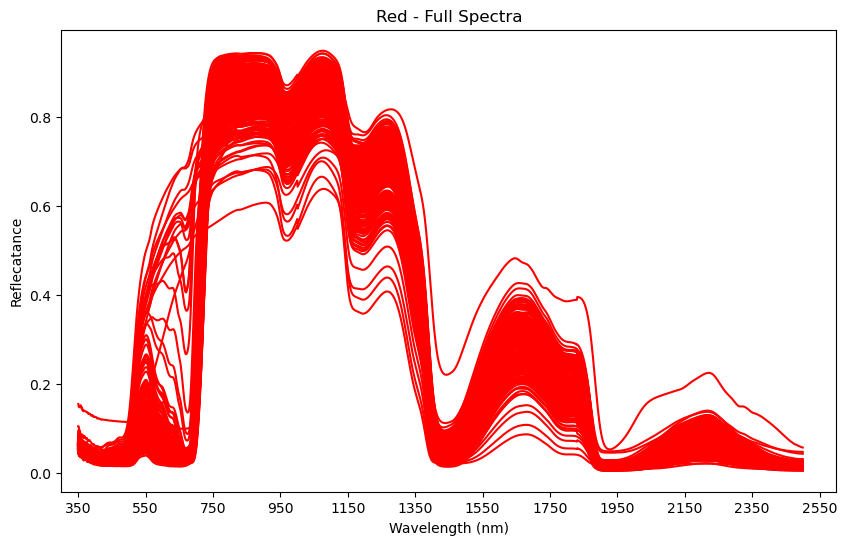

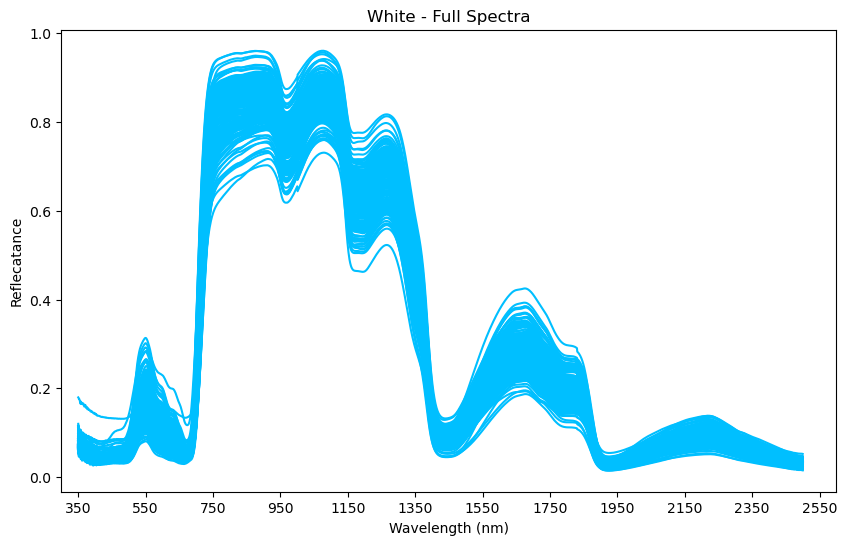

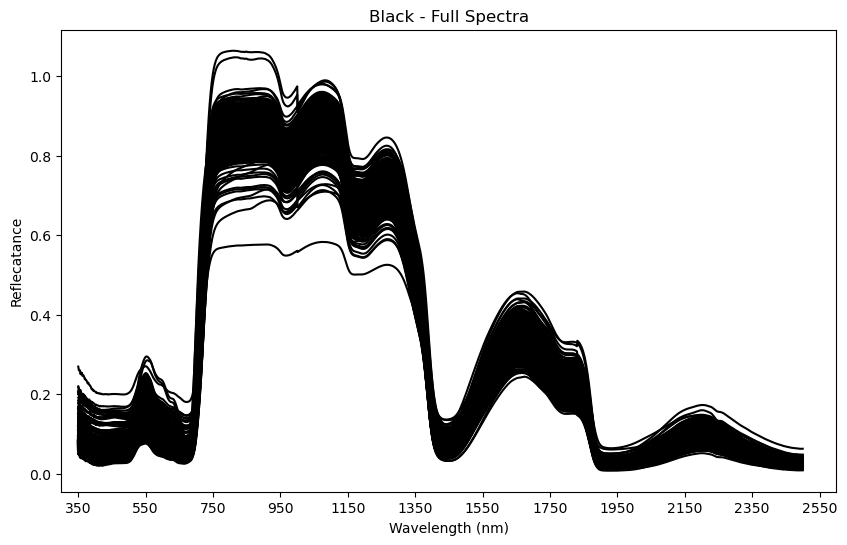

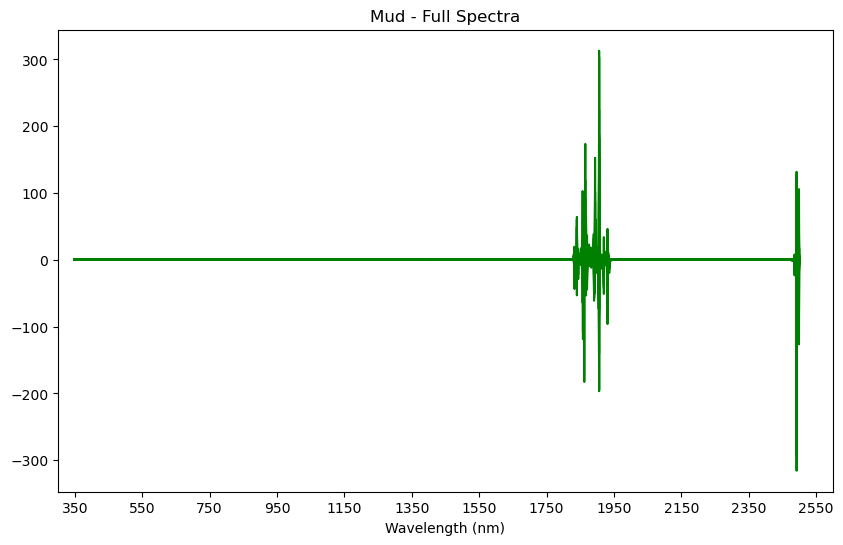

In [454]:
xticks = [350,550,750,950,1150,1350,1550,1750,1950,2150,2350,2550]


plt.figure(figsize=(10, 6))
for spectrum in red_ys:
    plt.plot(wavelengths, spectrum, color = 'red')
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.ylabel('Reflecatance')
plt.xlabel('Wavelength (nm)')
plt.title('Red - Full Spectra')
plt.savefig(f'Red_full_spectra.png', bbox_inches='tight', dpi=1000)
plt.show()

plt.figure(figsize=(10, 6))
for spectrum in white_ys:
    plt.plot(wavelengths, spectrum, color = 'deepskyblue')
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.ylabel('Reflecatance')
plt.xlabel('Wavelength (nm)')
plt.title('White - Full Spectra')
plt.savefig(f'White_full_spectra.png', bbox_inches='tight', dpi=1000)
plt.show()

plt.figure(figsize=(10, 6))
for spectrum in black_ys:
    plt.plot(wavelengths, spectrum, color = 'black')
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflecatance')
plt.title('Black - Full Spectra')
plt.savefig(f'Black_full_spectra.png', bbox_inches='tight', dpi=1000)
plt.show()

plt.figure(figsize=(10, 6))
for spectrum in mud_ys:
    plt.plot(wavelengths, spectrum, color = 'green')
plt.xlim(left=min(wavelengths) -50 , right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.xlabel('Wavelength (nm)')
plt.title('Mud - Full Spectra')
plt.savefig(f'Mud_full_spectra.png', bbox_inches='tight', dpi=1000)
plt.show()


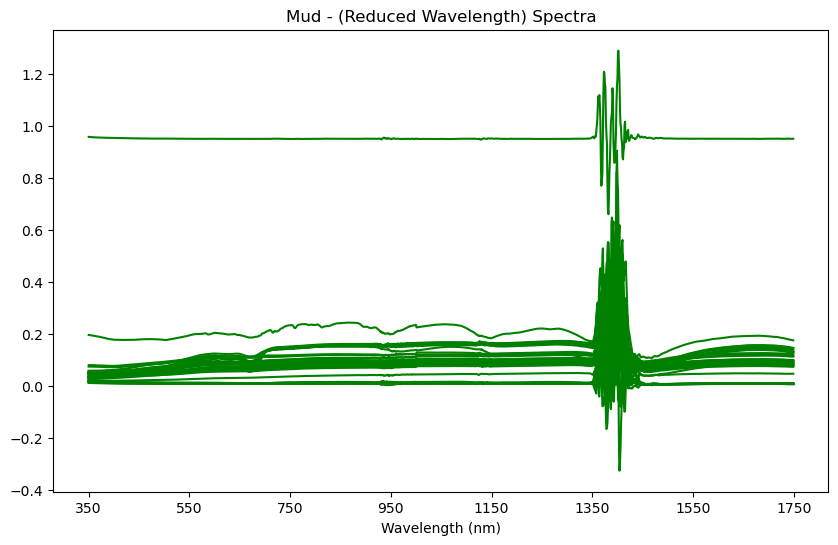

In [7]:
mud_ticks = [350,550,750,950,1150,1350,1550,1750]
plt.figure(figsize=(10, 6))
for spectrum in mud_ys:
    plt.plot(wavelengths[0:1400], spectrum[0:1400], color = 'green')
plt.xticks(mud_ticks)
plt.xlabel('Wavelength (nm)')
plt.title('Mud - (Reduced Wavelength) Spectra')
plt.savefig(f'Mud_reduced_wavelength_spectra.png', bbox_inches='tight', dpi=1000)
plt.show()

In [8]:
red_t1,red_p1 = stats.ttest_ind(red_ys[0],red_ys[1])
print(len(red_ys[0]))
# get t value and p value
print(f'Tvalue = {red_t1}')
print(f'Pvalue = {red_p1}')
print(np.shape(red_t1))
print(np.shape(red_p1))


2151
Tvalue = 0.12968070265140813
Pvalue = 0.8968251161625932
()
()


In [9]:
# make them into one big array
w_b_combined = np.vstack((white_ys,black_ys))
print(np.shape(w_b_combined))

(548, 2151)


In [10]:
'''
red_t,red_p = stats.ttest_ind(red_ys,w_b_combined)
red_t1 = np.zeros((num_wavelengths))
red_p1 = np.zeros((num_wavelengths))
check that this gives what I want
for i in range(0,num_wavelengths):
    red_t1[i], red_p1[i] = stats.ttest_ind(red_ys[:,i], w_b_combined[:,i])

print(red_p1[0:10] == red_p[0:10])
print(np.shape(red_p))
print(red_p[0:10])
print(red_p1[0:10])
'''

'\nred_t,red_p = stats.ttest_ind(red_ys,w_b_combined)\nred_t1 = np.zeros((num_wavelengths))\nred_p1 = np.zeros((num_wavelengths))\ncheck that this gives what I want\nfor i in range(0,num_wavelengths):\n    red_t1[i], red_p1[i] = stats.ttest_ind(red_ys[:,i], w_b_combined[:,i])\n\nprint(red_p1[0:10] == red_p[0:10])\nprint(np.shape(red_p))\nprint(red_p[0:10])\nprint(red_p1[0:10])\n'

In [11]:
'''
red_t,red_p = stats.ttest_ind(red_ys[:,0],w_b_combined[:,0])
red_t,red_p = stats.ttest_ind(red_ys[0],w_b_combined[0])
print(red_p)
print(red_ys[:,0])
'''

'\nred_t,red_p = stats.ttest_ind(red_ys[:,0],w_b_combined[:,0])\nred_t,red_p = stats.ttest_ind(red_ys[0],w_b_combined[0])\nprint(red_p)\nprint(red_ys[:,0])\n'

2151 2151


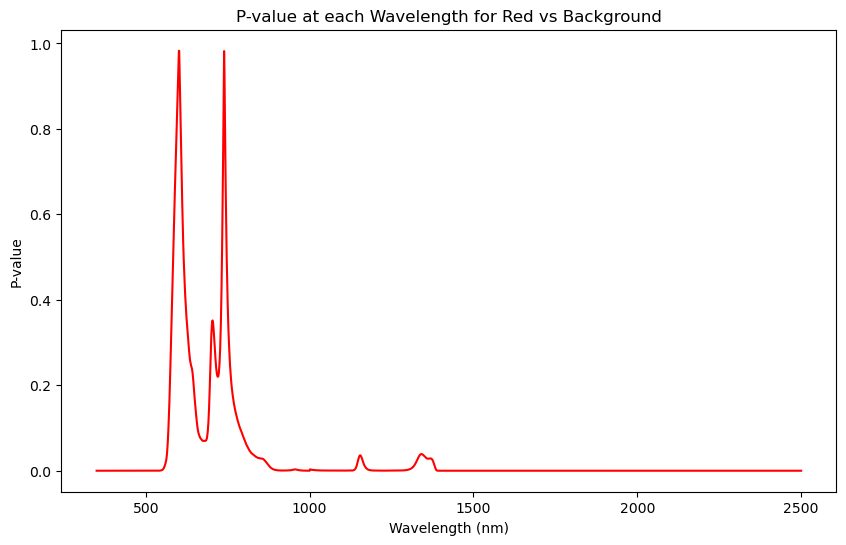

In [12]:
red_t,red_p = stats.ttest_ind(red_ys,w_b_combined)
print(np.size(red_t), np.size(red_p))

plt.figure(figsize=(10,6))
plt.plot(wavelengths, red_p, color = 'red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for Red vs Background')
plt.savefig('P-value_at_each_Wavelength_for_Red_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

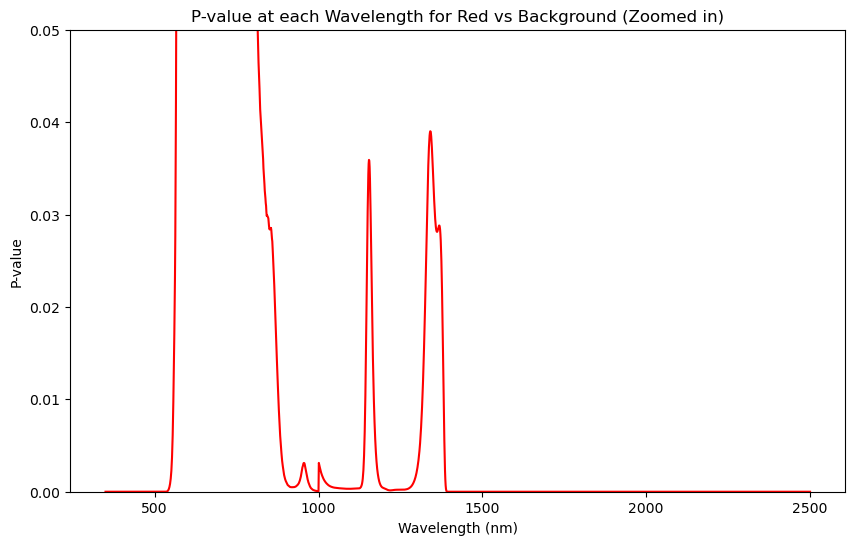

In [13]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, red_p, color = 'red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for Red vs Background (Zoomed in)')
plt.savefig('zoomed_in_P-value_at_each_Wavelength_for_Red_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [14]:
r_b_combined = np.vstack((red_ys,black_ys))
print(np.shape(r_b_combined))

(580, 2151)


2151 2151


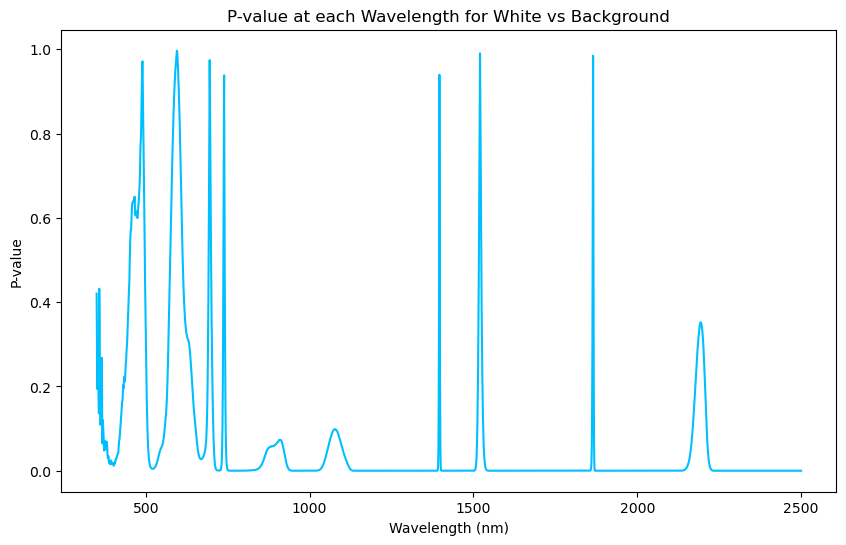

In [15]:
white_t,white_p = stats.ttest_ind(white_ys,r_b_combined)
print(np.size(white_t), np.size(white_p))

plt.figure(figsize=(10,6))
plt.plot(wavelengths, white_p, color = 'deepskyblue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for White vs Background')
plt.savefig('P-value_at_each_Wavelength_for_White_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

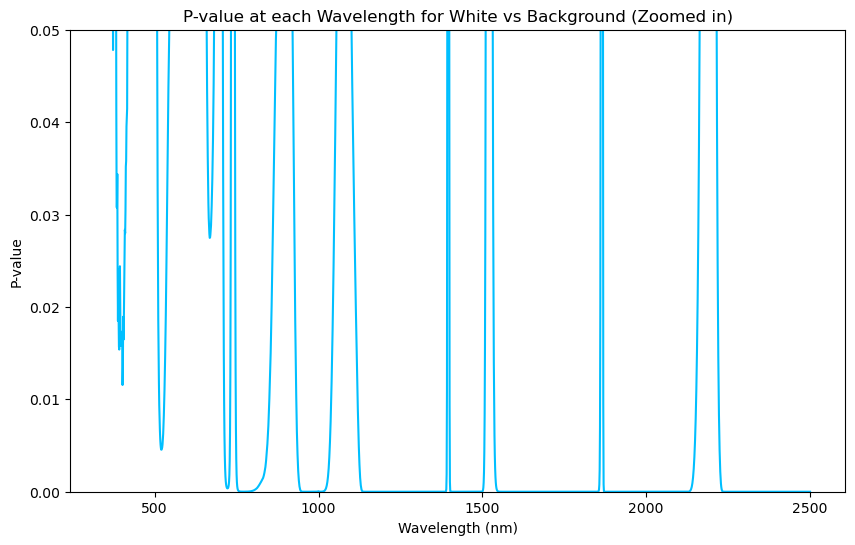

In [16]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, white_p, color = 'deepskyblue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for White vs Background (Zoomed in)')
plt.savefig('zoomed_in_P-value_at_each_Wavelength_for_White_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [17]:
r_w_combined = np.vstack((red_ys,white_ys))
print(np.shape(r_w_combined))

(468, 2151)


2151 2151


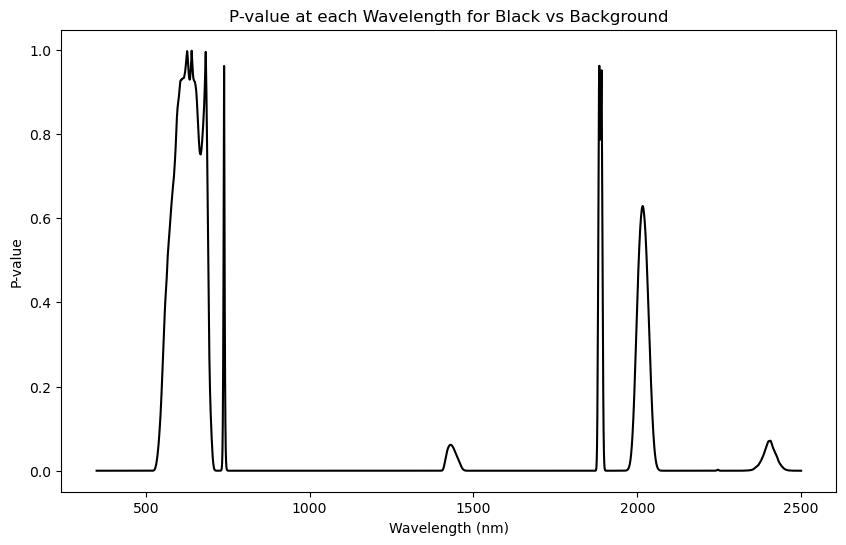

In [18]:
black_t,black_p = stats.ttest_ind(black_ys,r_w_combined)
print(np.size(black_t), np.size(black_p))

plt.figure(figsize=(10,6))
plt.plot(wavelengths, black_p, color = 'black')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for Black vs Background')
plt.savefig('P-value_at_each_Wavelength_for_Black_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

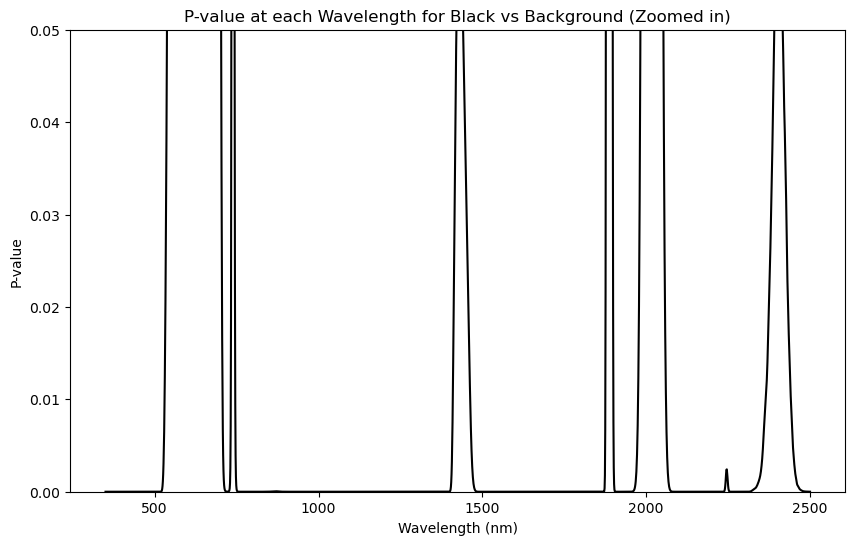

In [19]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, black_p, color = 'black')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for Black vs Background (Zoomed in)')
plt.savefig('zoomed_in_P-value_at_each_Wavelength_for_Black_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [20]:
def calculate_variance(x):
    variance = np.var(x, axis = 0)
    return variance

In [21]:
red_var = calculate_variance(red_ys)
print(len(red_var))

white_var = calculate_variance(white_ys)
print(len(white_var))

black_var = calculate_variance(black_ys)
print(len(black_var))

2151
2151
2151


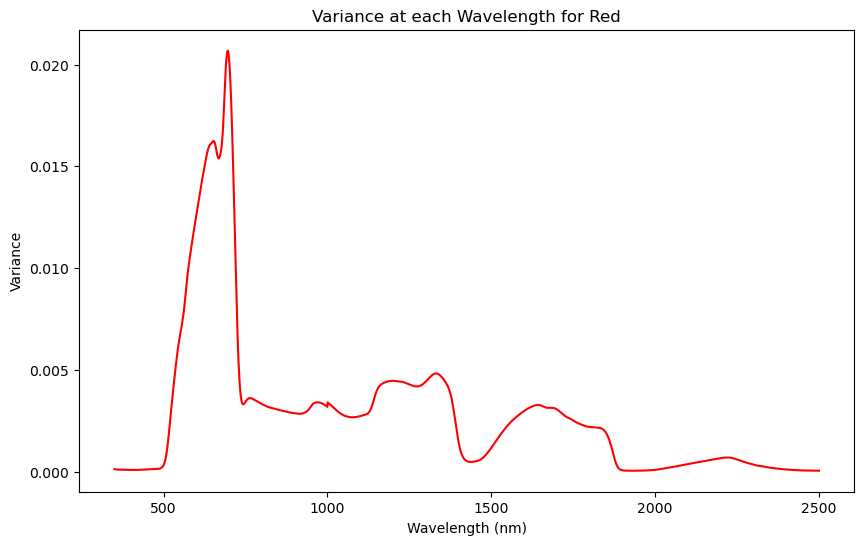

In [22]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, red_var, color = 'red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Variance')
plt.title('Variance at each Wavelength for Red')
plt.savefig('Variance_at_each_Wavelength_for_Red', bbox_inches = 'tight', dpi = 1000)
plt.show()

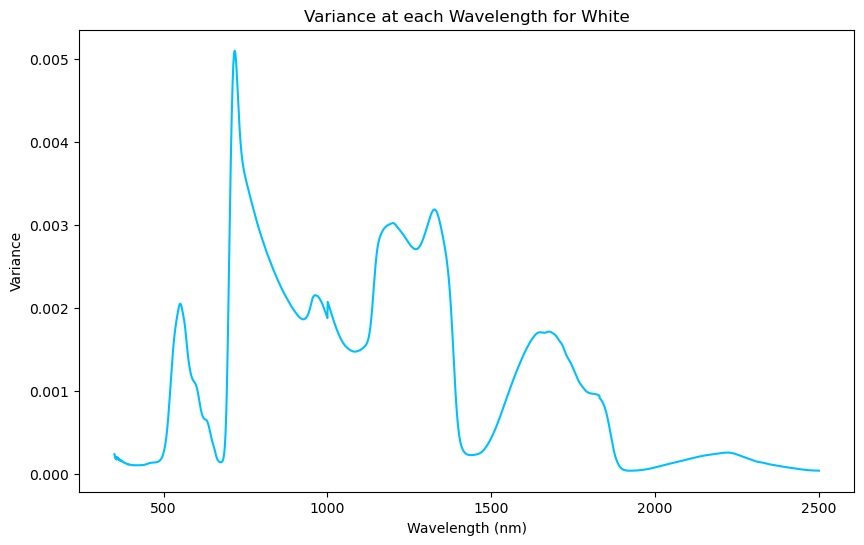

In [23]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, white_var, color = 'deepskyblue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Variance')
plt.title('Variance at each Wavelength for White')
plt.savefig('Variance_at_each_Wavelength_for_White', bbox_inches = 'tight', dpi = 1000)
plt.show()

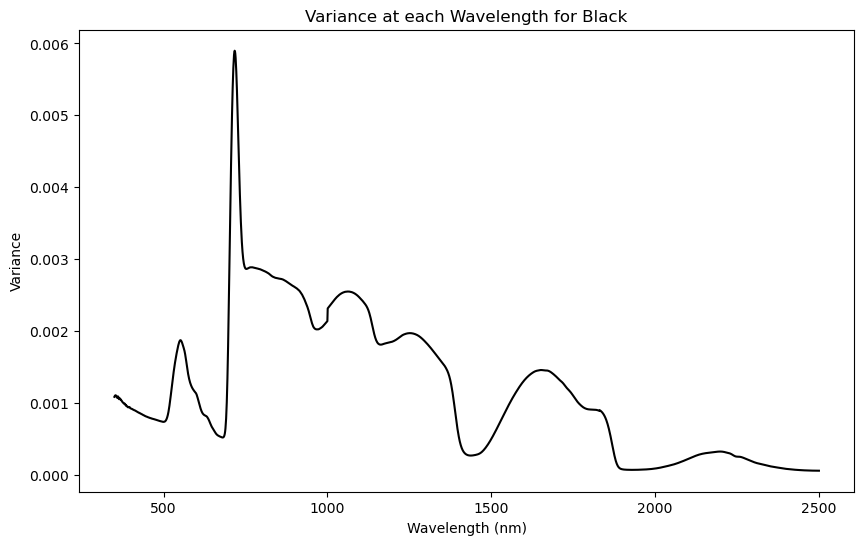

In [24]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, black_var, color = 'black')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Variance')
plt.title('Variance at each Wavelength for Black')
plt.savefig('Variance_at_each_Wavelength_for_Black', bbox_inches = 'tight', dpi = 1000)
plt.show()

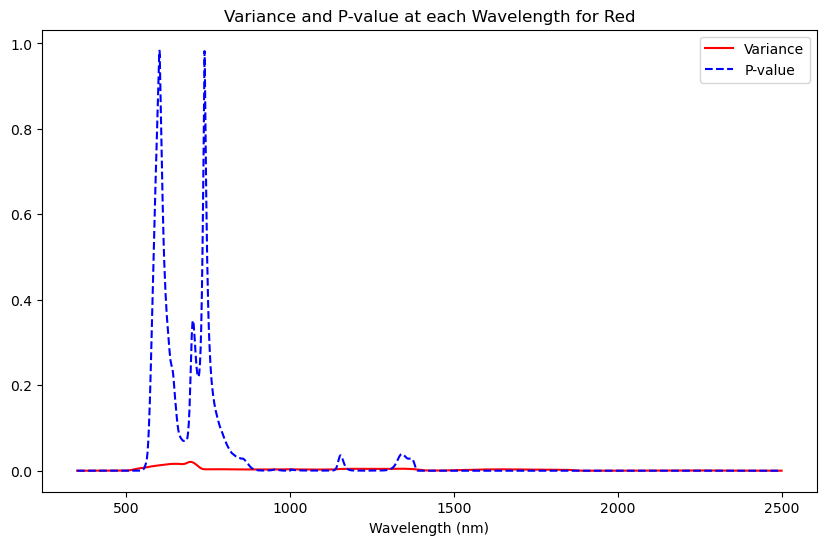

In [25]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, red_var, color = 'red', linestyle = '-', label = "Variance")
plt.plot(wavelengths, red_p, color = 'blue', linestyle = '--', label = "P-value")
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.title('Variance and P-value at each Wavelength for Red')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_Red', bbox_inches = 'tight', dpi = 1000)
plt.show()

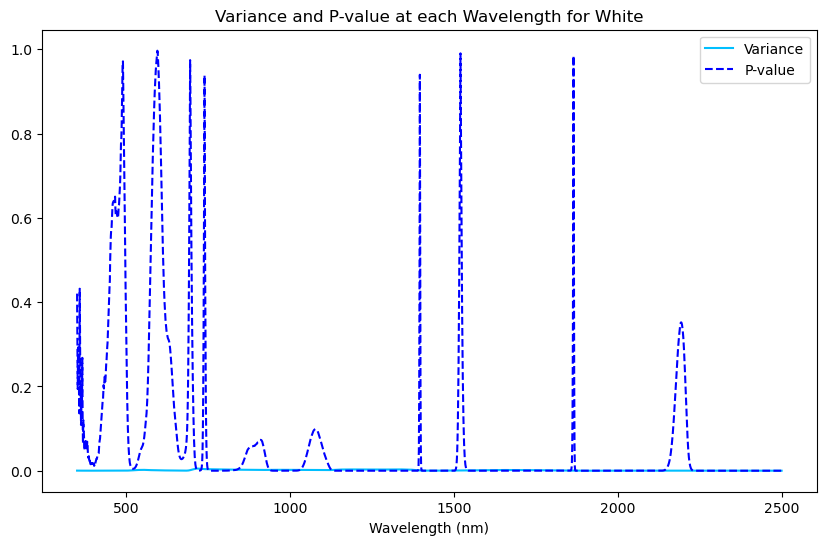

In [26]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, white_var, color = 'deepskyblue', linestyle = '-', label = "Variance")
plt.plot(wavelengths, white_p, color = 'blue', linestyle = '--', label = "P-value")
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.title('Variance and P-value at each Wavelength for White')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_White', bbox_inches = 'tight', dpi = 1000)
plt.show()

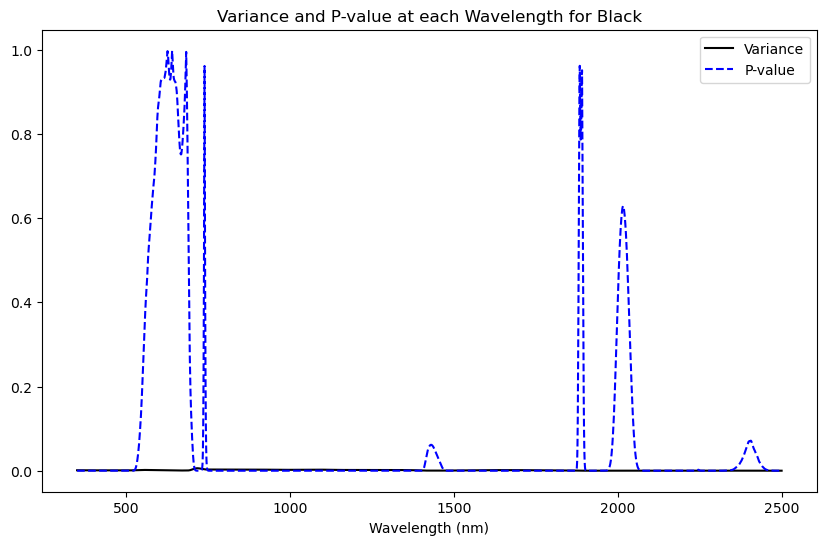

In [27]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, black_var, color = 'black', linestyle = '-', label = "Variance")
plt.plot(wavelengths, black_p, color = 'blue', linestyle = '--', label = "P-value")
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.title('Variance and P-value at each Wavelength for Black')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_Black', bbox_inches = 'tight', dpi = 1000)
plt.show()

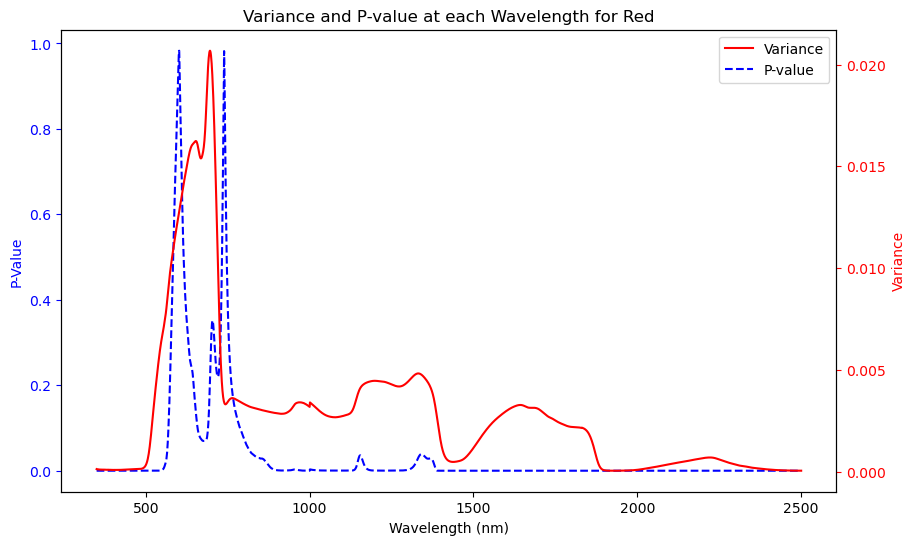

In [28]:
# Create the first plot
import matplotlib.lines as mlines
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelengths, red_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelengths, red_var, color = 'red', label = 'Variance', linestyle = '-')
ax2.set_ylabel('Variance', color='red')
ax2.tick_params('y', colors='red')

legend_var = mlines.Line2D([], [], color='r', label='Variance')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance and P-value at each Wavelength for Red')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_Red_diff_axis', bbox_inches = 'tight', dpi = 1000)
plt.show()

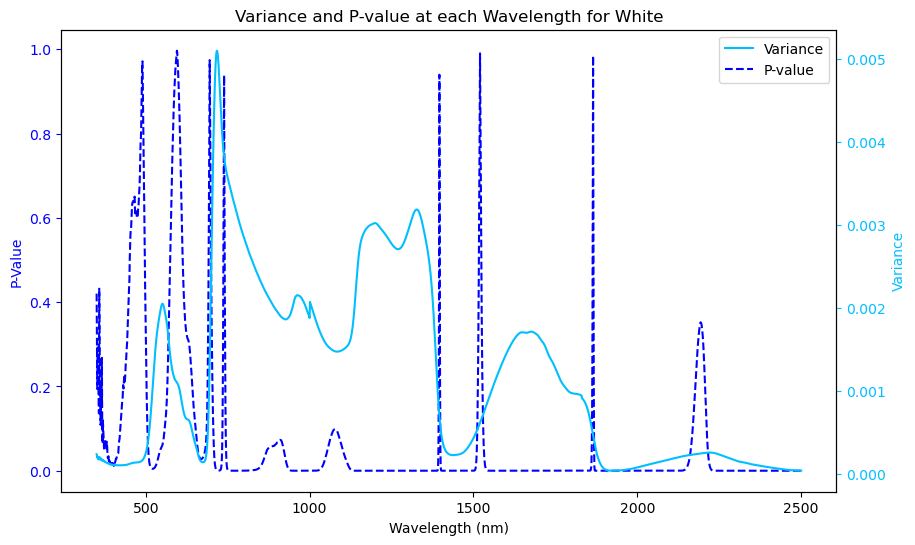

In [29]:
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelengths, white_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelengths, white_var, color = 'deepskyblue', label = 'Variance', linestyle = '-')
ax2.set_ylabel('Variance', color='deepskyblue')
ax2.tick_params('y', colors='deepskyblue')

legend_var = mlines.Line2D([], [], color='deepskyblue', label='Variance')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance and P-value at each Wavelength for White')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_White_diff_axis', bbox_inches = 'tight', dpi = 1000)
plt.show()

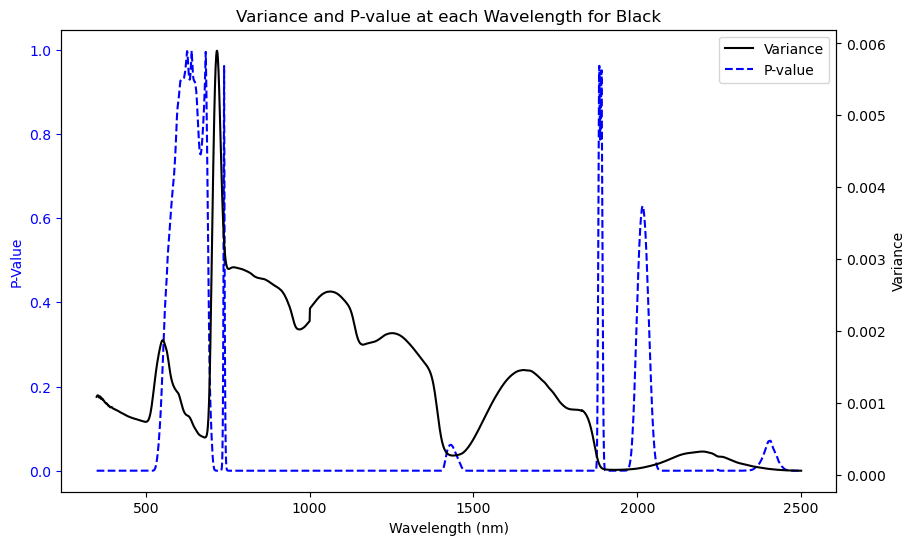

In [30]:
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelengths, black_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelengths, black_var, color = 'black', label = 'Variance', linestyle = '-')
ax2.set_ylabel('Variance', color='black')
ax2.tick_params('y', colors='black')

legend_var = mlines.Line2D([], [], color='black', label='Variance')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance and P-value at each Wavelength for Black')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_Black_diff_axis', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [31]:
red_var_div_reflectance = red_var/np.mean(red_ys, axis = 0)
white_var_div_reflectance = white_var/np.mean(white_ys, axis = 0)
black_var_div_reflectance = black_var/np.mean(black_ys, axis = 0)

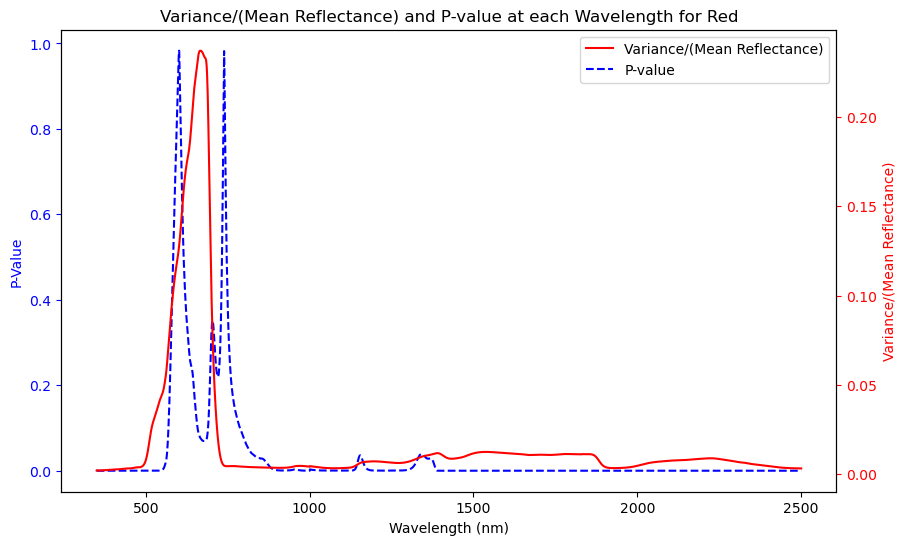

In [32]:
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelengths, red_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelengths, red_var_div_reflectance, color = 'red', label = 'Variance/(Mean Reflectance)', linestyle = '-')
ax2.set_ylabel('Variance/(Mean Reflectance)', color='red')
ax2.tick_params('y', colors='red')

legend_var = mlines.Line2D([], [], color='r', label='Variance/(Mean Reflectance)')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance/(Mean Reflectance) and P-value at each Wavelength for Red')
plt.savefig('Variance_div_mean_reflectance_and_p_value_at_each_Wavelength_for_Red_diff_axis', bbox_inches = 'tight', dpi = 1000)
plt.show()

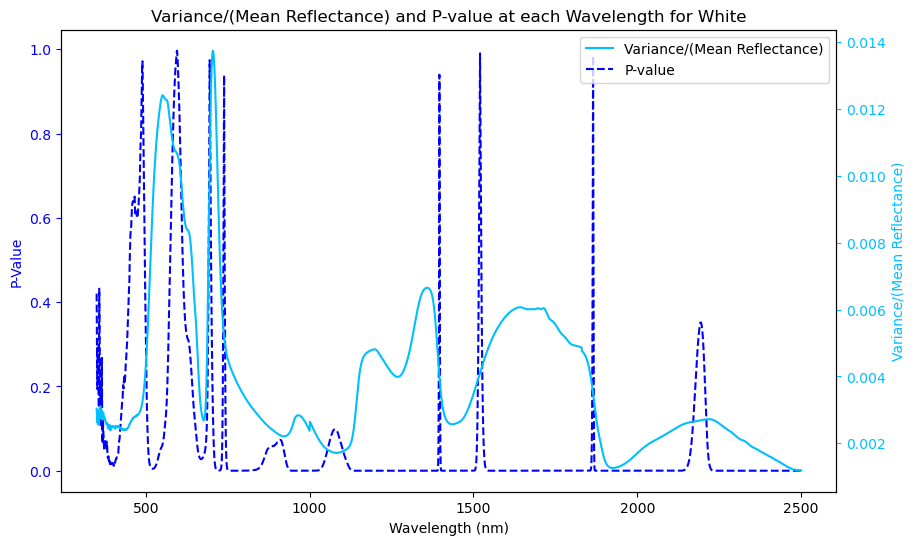

In [33]:
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelengths, white_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelengths, white_var_div_reflectance, color = 'deepskyblue', label = 'Variance/(Mean Reflectance)', linestyle = '-')
ax2.set_ylabel('Variance/(Mean Reflectance)', color='deepskyblue')
ax2.tick_params('y', colors='deepskyblue')

legend_var = mlines.Line2D([], [], color='deepskyblue', label='Variance/(Mean Reflectance)')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance/(Mean Reflectance) and P-value at each Wavelength for White')
plt.savefig('Variance_div_mean_reflectanc_and_p_value_at_each_Wavelength_for_White_diff_axis', bbox_inches = 'tight', dpi = 1000)
plt.show()

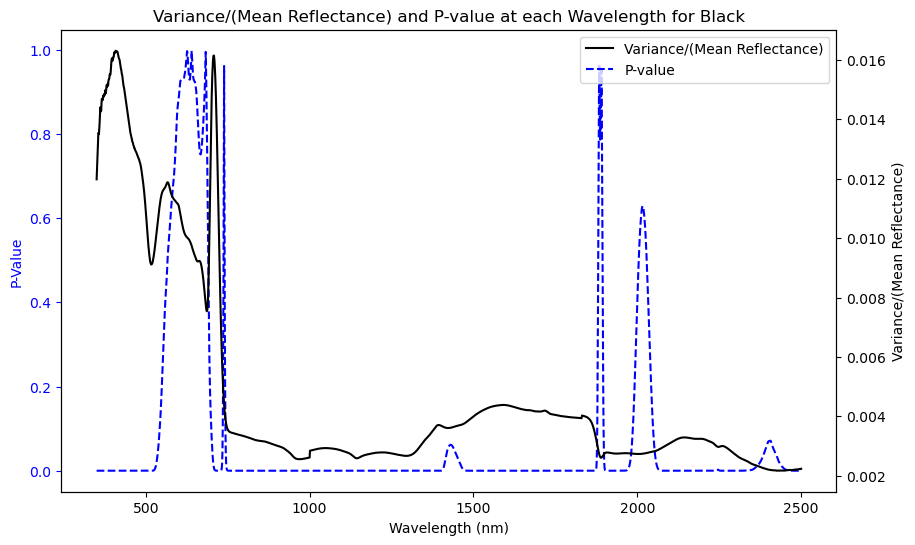

In [34]:
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelengths, black_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelengths, black_var_div_reflectance, color = 'black', label = 'Variance/(Mean Reflectance)', linestyle = '-')
ax2.set_ylabel('Variance/(Mean Reflectance)', color='black')
ax2.tick_params('y', colors='black')

legend_var = mlines.Line2D([], [], color='black', label='Variance/(Mean Reflectance)')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance/(Mean Reflectance) and P-value at each Wavelength for Black')
plt.savefig('Variance_div_mean_reflectanc_and_p_value_at_each_Wavelength_for_Black_diff_axis', bbox_inches = 'tight', dpi = 1000)
plt.show()

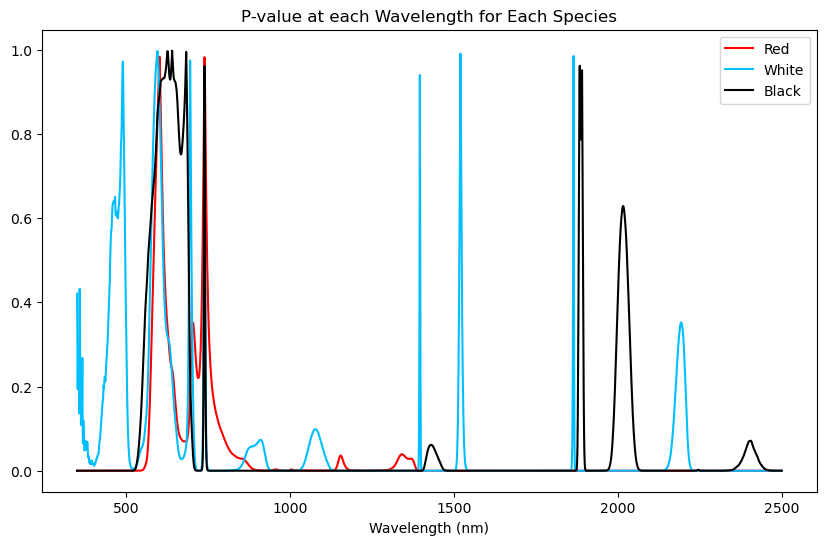

In [35]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, red_p, color = 'red', linestyle = '-', label = "Red")
plt.plot(wavelengths, white_p, color = 'deepskyblue', linestyle = '-', label = "White")
plt.plot(wavelengths, black_p, color = 'black', linestyle = '-', label = "Black")
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.title('P-value at each Wavelength for Each Species')
plt.savefig('P_value_at_each_Wavelength_for_each_species', bbox_inches = 'tight', dpi = 1000)
plt.show()

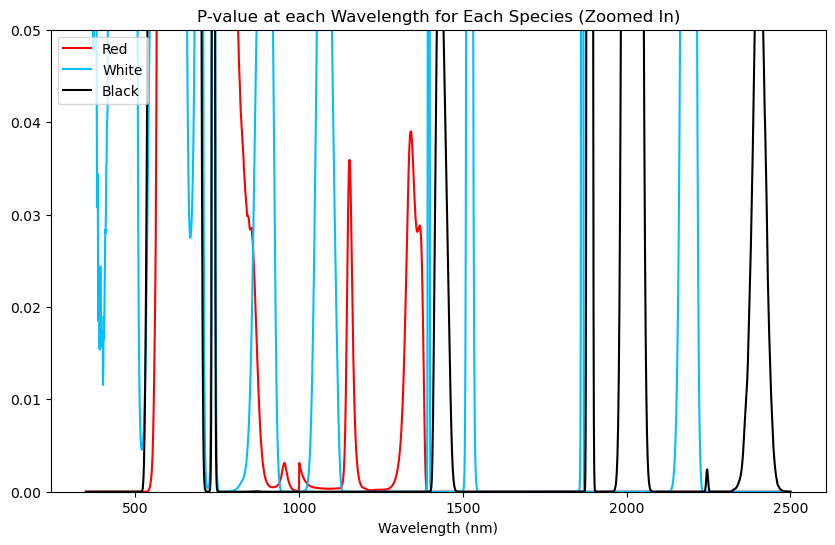

In [36]:
plt.figure(figsize=(10,6))
plt.plot(wavelengths, red_p, color = 'red', linestyle = '-', label = "Red")
plt.plot(wavelengths, white_p, color = 'deepskyblue', linestyle = '-', label = "White")
plt.plot(wavelengths, black_p, color = 'black', linestyle = '-', label = "Black")
plt.legend()
plt.ylim([0,0.05])
plt.xlabel('Wavelength (nm)')
plt.title('P-value at each Wavelength for Each Species (Zoomed In)')
plt.savefig('Zoomed_In_P_value_at_each_Wavelength_for_each_species', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [37]:
# now lets try and bin the wavelengths
wavelengths_bin_middle_values_350_to_700 = wavelengths[1:351:3]
print(wavelengths_bin_middle_values_350_to_700)
wavelengths_bin_middle_values_700_to_1050 = wavelengths[352:702:3]
print(wavelengths_bin_middle_values_700_to_1050)
wavelengths_bin_middle_values_1050_to_1400_unshifted = wavelengths[706:1053:10]
# need to shift by 0.5 to get midpoint
wavelengths_bin_middle_values_1050_to_1400 = wavelengths_bin_middle_values_1050_to_1400_unshifted + 0.5
print(wavelengths_bin_middle_values_1050_to_1400)
wavelengths_bin_middle_values_1400_to_2100_unshifted = wavelengths[1056:1756:10]
# need to shift by 0.5 to get midpoint
wavelengths_bin_middle_values_1400_to_2100 = wavelengths_bin_middle_values_1400_to_2100_unshifted + 0.5
print(wavelengths_bin_middle_values_1400_to_2100)
wavelengths_bin_middle_values_2100_to_2500_unshifted = wavelengths[1757:2136:12]
# need to shift by 0.5 to get midpoint
wavelengths_bin_middle_values_2100_to_2500 = wavelengths_bin_middle_values_2100_to_2500_unshifted + 0.5
print(wavelengths_bin_middle_values_2100_to_2500)
# 86,87,88,89,90,91,92,93,94,95,96,97,98,99,2500
wavelength_last_bin = wavelengths[2143]
print(wavelength_last_bin)

[351. 354. 357. 360. 363. 366. 369. 372. 375. 378. 381. 384. 387. 390.
 393. 396. 399. 402. 405. 408. 411. 414. 417. 420. 423. 426. 429. 432.
 435. 438. 441. 444. 447. 450. 453. 456. 459. 462. 465. 468. 471. 474.
 477. 480. 483. 486. 489. 492. 495. 498. 501. 504. 507. 510. 513. 516.
 519. 522. 525. 528. 531. 534. 537. 540. 543. 546. 549. 552. 555. 558.
 561. 564. 567. 570. 573. 576. 579. 582. 585. 588. 591. 594. 597. 600.
 603. 606. 609. 612. 615. 618. 621. 624. 627. 630. 633. 636. 639. 642.
 645. 648. 651. 654. 657. 660. 663. 666. 669. 672. 675. 678. 681. 684.
 687. 690. 693. 696. 699.]
[ 702.  705.  708.  711.  714.  717.  720.  723.  726.  729.  732.  735.
  738.  741.  744.  747.  750.  753.  756.  759.  762.  765.  768.  771.
  774.  777.  780.  783.  786.  789.  792.  795.  798.  801.  804.  807.
  810.  813.  816.  819.  822.  825.  828.  831.  834.  837.  840.  843.
  846.  849.  852.  855.  858.  861.  864.  867.  870.  873.  876.  879.
  882.  885.  888.  891.  894.  897.  90

In [38]:
wavelength_bins = np.hstack((wavelengths_bin_middle_values_350_to_700,
                            wavelengths_bin_middle_values_700_to_1050,
                            wavelengths_bin_middle_values_1050_to_1400,
                            wavelengths_bin_middle_values_1400_to_2100,
                            wavelengths_bin_middle_values_2100_to_2500,
                            wavelength_last_bin))
print(wavelength_bins)
print(len(wavelength_bins))

[ 351.   354.   357.   360.   363.   366.   369.   372.   375.   378.
  381.   384.   387.   390.   393.   396.   399.   402.   405.   408.
  411.   414.   417.   420.   423.   426.   429.   432.   435.   438.
  441.   444.   447.   450.   453.   456.   459.   462.   465.   468.
  471.   474.   477.   480.   483.   486.   489.   492.   495.   498.
  501.   504.   507.   510.   513.   516.   519.   522.   525.   528.
  531.   534.   537.   540.   543.   546.   549.   552.   555.   558.
  561.   564.   567.   570.   573.   576.   579.   582.   585.   588.
  591.   594.   597.   600.   603.   606.   609.   612.   615.   618.
  621.   624.   627.   630.   633.   636.   639.   642.   645.   648.
  651.   654.   657.   660.   663.   666.   669.   672.   675.   678.
  681.   684.   687.   690.   693.   696.   699.   702.   705.   708.
  711.   714.   717.   720.   723.   726.   729.   732.   735.   738.
  741.   744.   747.   750.   753.   756.   759.   762.   765.   768.
  771.   774.   777.

In [39]:
# now want to average reflectance for the wavelength bins
# from 350 - 1050 nm average over 3 nm
# from 1050 - 2100 nm average over 10 nm
# from 2100 - 2485 nm average over 12 nm
# from 2486 - 2500 nm average last bin over 15 nm

In [40]:
print(np.shape(red_ys))
print(np.shape(white_ys))
print(np.shape(black_ys))

(250, 2151)
(218, 2151)
(330, 2151)


In [41]:
# 350 - 1050 nm
# original array is red_ys[0:end_bin]
# want to reshape array and then mean across every 3 values
bin_size = int(3)

end_bin_3 = int(wavelengths_bin_middle_values_700_to_1050[-1] + 1)
print(end_bin_3)
red_350_to_1050 = red_ys[:,0:end_bin_3 - int(wavelengths[0])+1]

num_wavelengths = len(red_350_to_1050[0])
print(num_wavelengths)
print(np.shape(red_350_to_1050))
num_bins = num_wavelengths/bin_size
print(num_bins)

red_ys_reshaped_3 = red_350_to_1050.reshape(int(num_red), int(num_bins), bin_size)
#print(red_ys_reshaped_3)
print(np.shape(red_ys_reshaped_3))
mean_red_350_to_1050 = red_ys_reshaped_3.mean(axis = 2)

#print(red_350_to_1050)
print(red_ys_reshaped_3[0,0])
print(mean_red_350_to_1050[0,0])

1051
702
(250, 702)
234.0
(250, 234, 3)
[0.05807895 0.06028992 0.06116896]
0.05984594433333334


In [42]:
white_350_to_1050 = white_ys[:,0:end_bin_3 - int(wavelengths[0])+1]

num_wavelengths = len(white_350_to_1050[0])
print(num_wavelengths)
print(np.shape(white_350_to_1050))
num_bins = num_wavelengths/bin_size
print(num_bins)

white_ys_reshaped_3 = white_350_to_1050.reshape(int(num_white), int(num_bins), bin_size)
#print(white_ys_reshaped_3)
print(np.shape(white_ys_reshaped_3))
mean_white_350_to_1050 = white_ys_reshaped_3.mean(axis = 2)

#print(red_350_to_1050)
print(white_ys_reshaped_3[0,0])
print(mean_white_350_to_1050[0,0])


702
(218, 702)
234.0
(218, 234, 3)
[0.05822776 0.05622089 0.05362375]
0.05602413033333333


In [43]:
black_350_to_1050 = black_ys[:,0:end_bin_3 - int(wavelengths[0])+1]

num_wavelengths = len(black_350_to_1050[0])
print(num_wavelengths)
print(np.shape(black_350_to_1050))
num_bins = num_wavelengths/bin_size
print(num_bins)

black_ys_reshaped_3 = black_350_to_1050.reshape(int(num_black), int(num_bins), bin_size)
#print(white_ys_reshaped_3)
print(np.shape(black_ys_reshaped_3))
mean_black_350_to_1050 = black_ys_reshaped_3.mean(axis = 2)

#print(red_350_to_1050)
print(black_ys_reshaped_3[0,0])
print(mean_black_350_to_1050[0,0])

702
(330, 702)
234.0
(330, 234, 3)
[0.05834033 0.05811846 0.05921084]
0.058556544666666675


In [44]:
# 1050 - 2100 nm
# want to reshape array and then mean across every 10 values
bin_size = int(10)

end_bin_10 = int(wavelengths_bin_middle_values_1400_to_2100_unshifted[-1] + 5)
print(end_bin_10)
red_1050_to_2100 = red_ys[:,end_bin_3 - int(wavelengths[0]) + 1:end_bin_10 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(red_1050_to_2100[:,0] == red_350_to_1050[:,-1])
print(np.shape(red_1050_to_2100))
print(len(red_1050_to_2100[0]))

num_wavelengths = len(red_1050_to_2100[0])
print(num_wavelengths)

print(np.shape(red_1050_to_2100))
num_bins = num_wavelengths/bin_size
print(num_bins)

red_ys_reshaped_10 = red_1050_to_2100.reshape(int(num_red), int(num_bins), bin_size)
#print(red_ys_reshaped_3)
print(np.shape(red_ys_reshaped_10))
mean_red_1050_to_2100 = red_ys_reshaped_10.mean(axis = 2)

#print(red_350_to_1050)
print(red_ys_reshaped_10[0,0])
print(mean_red_1050_to_2100[0,0])

2101
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False Fal

In [45]:
white_1050_to_2100 = white_ys[:,end_bin_3 - int(wavelengths[0]) + 1:end_bin_10 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(white_1050_to_2100[:,0] == white_350_to_1050[:,-1])
print(np.shape(white_1050_to_2100))
print(len(white_1050_to_2100[0]))

num_wavelengths = len(white_1050_to_2100[0])
print(num_wavelengths)

print(np.shape(white_1050_to_2100))
num_bins = num_wavelengths/bin_size
print(num_bins)

white_ys_reshaped_10 = white_1050_to_2100.reshape(int(num_white), int(num_bins), bin_size)
#print(red_ys_reshaped_3)
print(np.shape(white_ys_reshaped_10))
mean_white_1050_to_2100 = white_ys_reshaped_10.mean(axis = 2)

#print(red_350_to_1050)
print(white_ys_reshaped_10[0,0])
print(mean_white_1050_to_2100[0,0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [46]:
black_1050_to_2100 = black_ys[:,end_bin_3 - int(wavelengths[0]) + 1:end_bin_10 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(black_1050_to_2100[:,0] == black_350_to_1050[:,-1])
print(np.shape(black_1050_to_2100))
print(len(black_1050_to_2100[0]))

num_wavelengths = len(black_1050_to_2100[0])
print(num_wavelengths)

print(np.shape(black_1050_to_2100))
num_bins = num_wavelengths/bin_size
print(num_bins)

black_ys_reshaped_10 = black_1050_to_2100.reshape(int(num_black), int(num_bins), bin_size)
#print(red_ys_reshaped_3)
print(np.shape(black_ys_reshaped_10))
mean_black_1050_to_2100 = black_ys_reshaped_10.mean(axis = 2)

#print(red_350_to_1050)
print(black_ys_reshaped_10[0,0])
print(mean_black_1050_to_2100[0,0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [47]:
# 2100 - 2485 nm
# want to reshape array and then mean across every 12 values
bin_size = int(12)

end_bin_12 = int(wavelengths_bin_middle_values_2100_to_2500_unshifted[-1] + 6)
print(end_bin_12)
red_2100_to_2485 = red_ys[:,end_bin_10 - int(wavelengths[0]) + 1:end_bin_12 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(red_2100_to_2485[:,0] == red_1050_to_2100[:,-1])
print(np.shape(red_2100_to_2485))
print(len(red_2100_to_2485[0]))

num_wavelengths = len(red_2100_to_2485[0])
print(num_wavelengths)

print(np.shape(red_2100_to_2485))
num_bins = num_wavelengths/bin_size
print(num_bins)

red_ys_reshaped_12 = red_2100_to_2485.reshape(int(num_red), int(num_bins), bin_size)
#print(red_ys_reshaped_12)
print(np.shape(red_ys_reshaped_12))
mean_red_2100_to_2485 = red_ys_reshaped_12.mean(axis = 2)

#print(red_350_to_1050)
print(red_ys_reshaped_12[0,0])
print(mean_red_2100_to_2485[0,0])

2485
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False Fal

In [48]:
white_2100_to_2485 = white_ys[:,end_bin_10 - int(wavelengths[0]) + 1:end_bin_12 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(white_2100_to_2485[:,0] == white_1050_to_2100[:,-1])
print(np.shape(white_2100_to_2485))
print(len(white_2100_to_2485[0]))

num_wavelengths = len(white_2100_to_2485[0])
print(num_wavelengths)

print(np.shape(white_2100_to_2485))
num_bins = num_wavelengths/bin_size
print(num_bins)

white_ys_reshaped_12 = white_2100_to_2485.reshape(int(num_white), int(num_bins), bin_size)
#print(red_ys_reshaped_12)
print(np.shape(white_ys_reshaped_12))
mean_white_2100_to_2485 = white_ys_reshaped_12.mean(axis = 2)

#print(red_350_to_1050)
print(white_ys_reshaped_12[0,0])
print(mean_white_2100_to_2485[0,0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [49]:
black_2100_to_2485 = black_ys[:,end_bin_10 - int(wavelengths[0]) + 1:end_bin_12 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(black_2100_to_2485[:,0] == black_1050_to_2100[:,-1])
print(np.shape(black_2100_to_2485))
print(len(black_2100_to_2485[0]))

num_wavelengths = len(black_2100_to_2485[0])
print(num_wavelengths)

print(np.shape(black_2100_to_2485))
num_bins = num_wavelengths/bin_size
print(num_bins)

black_ys_reshaped_12 = black_2100_to_2485.reshape(int(num_black), int(num_bins), bin_size)
#print(red_ys_reshaped_12)
print(np.shape(black_ys_reshaped_12))
mean_black_2100_to_2485 = black_ys_reshaped_12.mean(axis = 2)

#print(red_350_to_1050)
print(black_ys_reshaped_12[0,0])
print(mean_black_2100_to_2485[0,0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [50]:
# last bin
# want to reshape array and then mean across every 15 values
bin_size = int(15)

end_bin_15 = int(wavelength_last_bin + 7)
print(end_bin_15)
red_last_bin = red_ys[:,end_bin_12 - int(wavelengths[0]) + 1:end_bin_15 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(red_last_bin[:,0] == red_2100_to_2485[:,-1])
print(np.shape(red_last_bin))
print(len(red_last_bin[0]))

num_wavelengths = len(red_last_bin[0])
print(num_wavelengths)

print(np.shape(red_last_bin))
num_bins = num_wavelengths/bin_size
print(num_bins)

red_ys_reshaped_15 = red_last_bin.reshape(int(num_red), int(num_bins), bin_size)
#print(red_ys_reshaped_12)
print(np.shape(red_ys_reshaped_15))
mean_red_last_bin = red_ys_reshaped_15.mean(axis = 2)

#print(red_350_to_1050)
print(red_ys_reshaped_15[0,0])
print(mean_red_last_bin[0,0])

2500
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False Fal

In [51]:
white_last_bin = white_ys[:,end_bin_12 - int(wavelengths[0]) + 1:end_bin_15 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(white_last_bin[:,0] == white_2100_to_2485[:,-1])
print(np.shape(white_last_bin))
print(len(white_last_bin[0]))

num_wavelengths = len(white_last_bin[0])
print(num_wavelengths)

print(np.shape(white_last_bin))
num_bins = num_wavelengths/bin_size
print(num_bins)

white_ys_reshaped_15 = white_last_bin.reshape(int(num_white), int(num_bins), bin_size)
#print(red_ys_reshaped_12)
print(np.shape(white_ys_reshaped_15))
mean_white_last_bin = white_ys_reshaped_15.mean(axis = 2)

#print(red_350_to_1050)
print(white_ys_reshaped_15[0,0])
print(mean_white_last_bin[0,0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [52]:
black_last_bin = black_ys[:,end_bin_12 - int(wavelengths[0]) + 1:end_bin_15 - int(wavelengths[0]) + 1]
# check if first of this and last of previous is the same as want different
print(black_last_bin[:,0] == black_2100_to_2485[:,-1])
print(np.shape(black_last_bin))
print(len(black_last_bin[0]))

num_wavelengths = len(black_last_bin[0])
print(num_wavelengths)

print(np.shape(black_last_bin))
num_bins = num_wavelengths/bin_size
print(num_bins)

black_ys_reshaped_15 = black_last_bin.reshape(int(num_black), int(num_bins), bin_size)
#print(red_ys_reshaped_12)
print(np.shape(black_ys_reshaped_15))
mean_black_last_bin = black_ys_reshaped_15.mean(axis = 2)

#print(red_350_to_1050)
print(black_ys_reshaped_15[0,0])
print(mean_black_last_bin[0,0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [53]:
# joining the arrays so that have one big for each species

binned_red = np.hstack((mean_red_350_to_1050,
                       mean_red_1050_to_2100,
                       mean_red_2100_to_2485,
                       mean_red_last_bin))

print(np.shape(binned_red))

binned_white = np.hstack((mean_white_350_to_1050,
                       mean_white_1050_to_2100,
                       mean_white_2100_to_2485,
                       mean_white_last_bin))

print(np.shape(binned_white))

binned_black = np.hstack((mean_black_350_to_1050,
                       mean_black_1050_to_2100,
                       mean_black_2100_to_2485,
                       mean_black_last_bin))

print(np.shape(binned_black))

(250, 372)
(218, 372)
(330, 372)


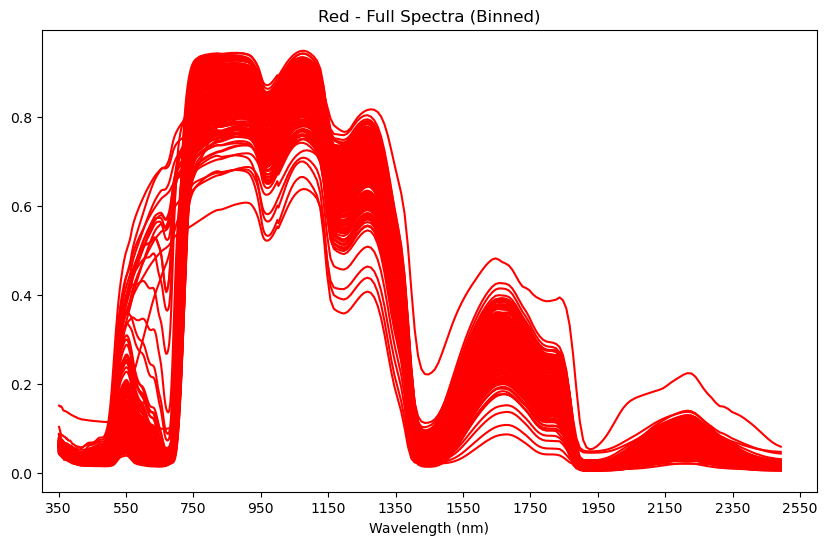

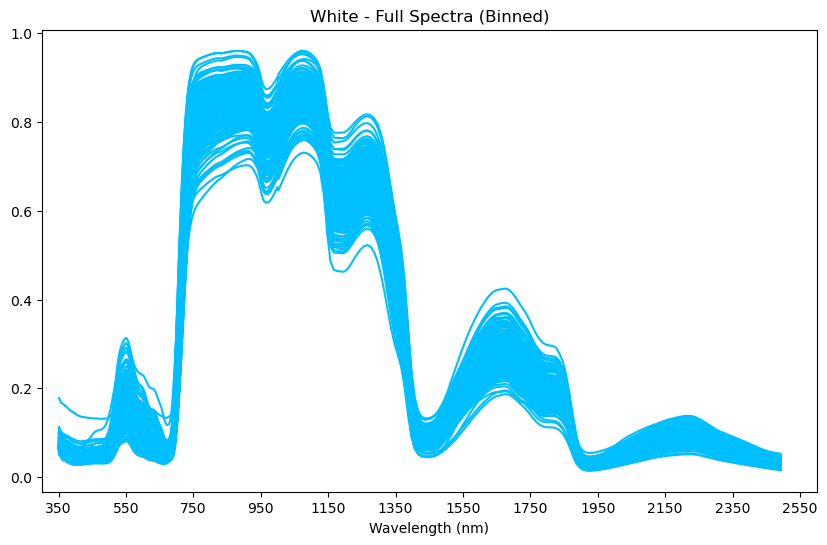

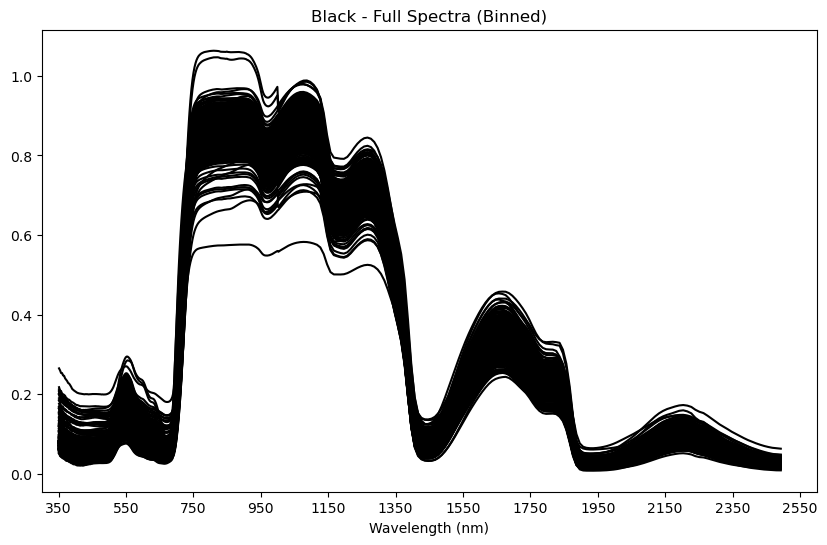

In [54]:
# plot the spectra for each wavelength

xticks = [350,550,750,950,1150,1350,1550,1750,1950,2150,2350,2550]


plt.figure(figsize=(10, 6))
for spectrum in binned_red:
    plt.plot(wavelength_bins, spectrum, color = 'red')
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.xlabel('Wavelength (nm)')
plt.title('Red - Full Spectra (Binned)')
plt.savefig(f'Red_full_spectra_binned.png', bbox_inches='tight', dpi=1000)
plt.show()

plt.figure(figsize=(10, 6))
for spectrum in binned_white:
    plt.plot(wavelength_bins, spectrum, color = 'deepskyblue')
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.xlabel('Wavelength (nm)')
plt.title('White - Full Spectra (Binned)')
plt.savefig(f'White_full_spectra_binned.png', bbox_inches='tight', dpi=1000)
plt.show()

plt.figure(figsize=(10, 6))
for spectrum in binned_black:
    plt.plot(wavelength_bins, spectrum, color = 'black')
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.xlabel('Wavelength (nm)')
plt.title('Black - Full Spectra (Binned)')
plt.savefig(f'Black_full_spectra_binned.png', bbox_inches='tight', dpi=1000)
plt.show()



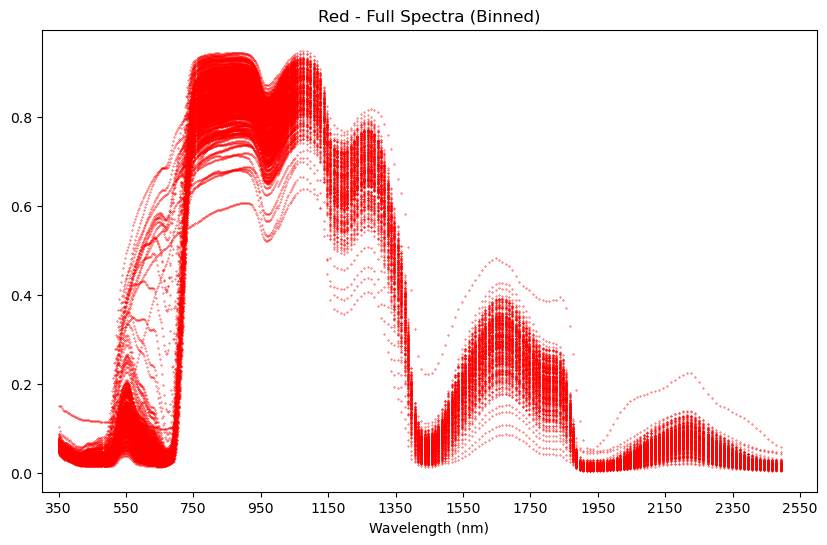

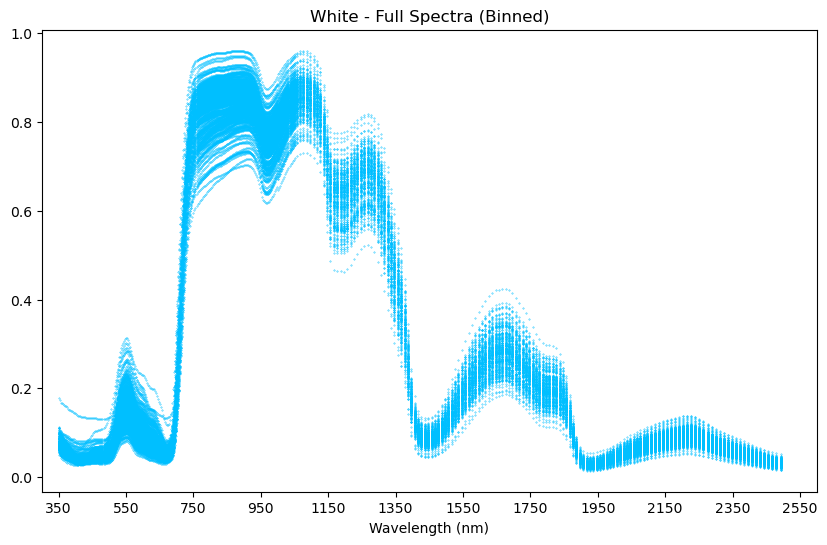

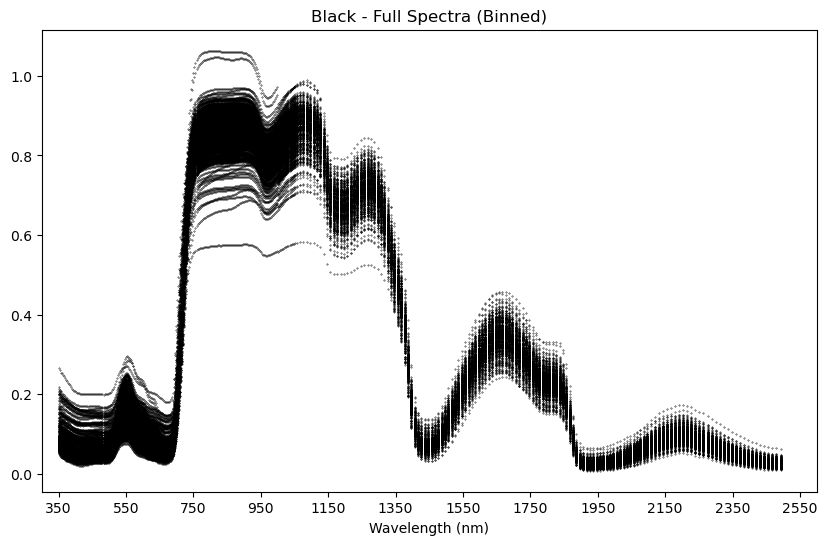

In [55]:
plt.figure(figsize=(10, 6))
for spectrum in binned_red:
    plt.scatter(wavelength_bins, spectrum, color = 'red', s = 0.1)
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.xlabel('Wavelength (nm)')
plt.title('Red - Full Spectra (Binned)')
plt.savefig(f'Red_full_spectra_binned_scatter.png', bbox_inches='tight', dpi=1000)
plt.show()

plt.figure(figsize=(10, 6))
for spectrum in binned_white:
    plt.scatter(wavelength_bins, spectrum, color = 'deepskyblue', s = 0.1)
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.xlabel('Wavelength (nm)')
plt.title('White - Full Spectra (Binned)')
plt.savefig(f'White_full_spectra_binned)_scatter.png', bbox_inches='tight', dpi=1000)
plt.show()

plt.figure(figsize=(10, 6))
for spectrum in binned_black:
    plt.scatter(wavelength_bins, spectrum, color = 'black', s = 0.1)
plt.xlim(left=min(wavelengths) - 50, right=max(wavelengths) + 100) 
plt.xticks(xticks)
plt.xlabel('Wavelength (nm)')
plt.title('Black - Full Spectra (Binned)')
plt.savefig(f'Black_full_spectra_binned_scatter.png', bbox_inches='tight', dpi=1000)
plt.show()

In [56]:
w_b_binned_combined = np.vstack((binned_white, binned_black))
print(np.shape(w_b_binned_combined))

r_b_binned_combined = np.vstack((binned_red, binned_black))
print(np.shape(r_b_binned_combined))

r_w_binned_combined = np.vstack((binned_red, binned_white))
print(np.shape(r_w_binned_combined))

(548, 372)
(580, 372)
(468, 372)


In [57]:
print(np.shape(w_b_combined))
print(np.shape(r_b_combined))
print(np.shape(r_w_combined))

(548, 2151)
(580, 2151)
(468, 2151)


372 372


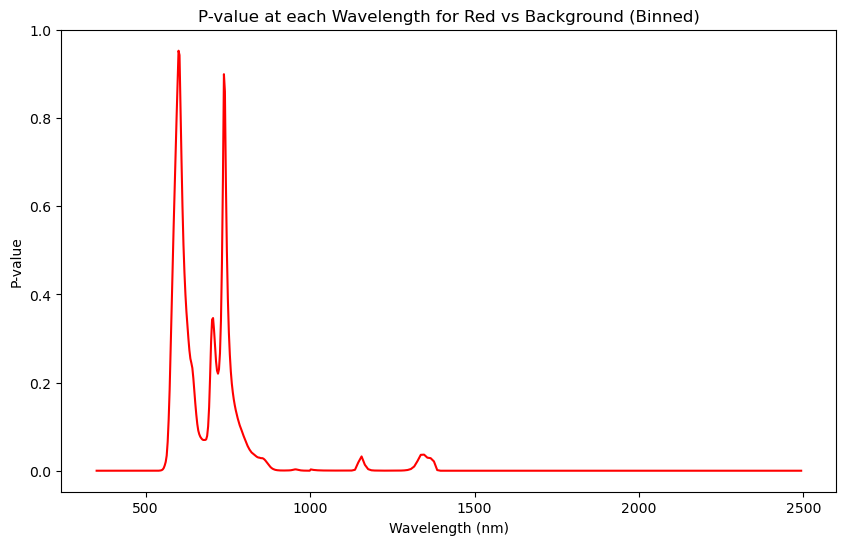

In [58]:
binned_red_t,binned_red_p = stats.ttest_ind(binned_red,w_b_binned_combined)
print(np.size(binned_red_t), np.size(binned_red_p))

plt.figure(figsize=(10,6))
plt.plot(wavelength_bins, binned_red_p, color = 'red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for Red vs Background (Binned)')
plt.savefig('(binned)_P-value_at_each_Wavelength_for_Red_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


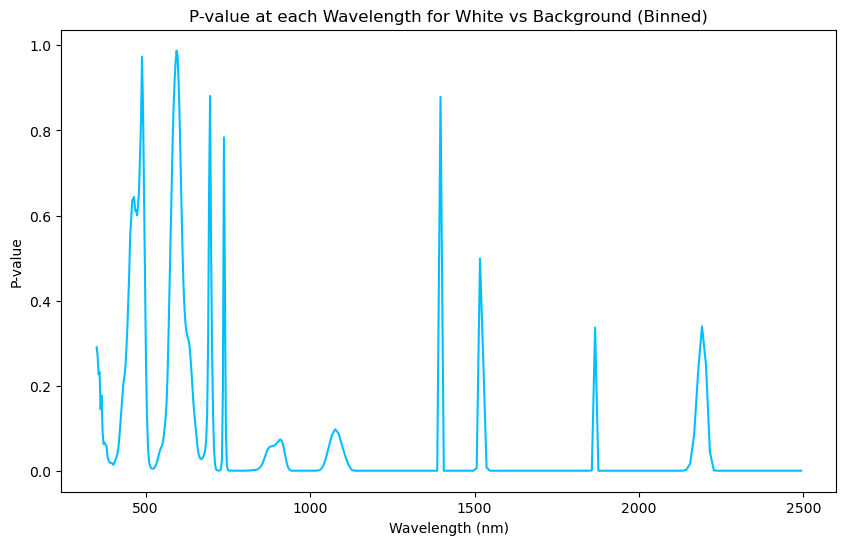

In [59]:
binned_white_t,binned_white_p = stats.ttest_ind(binned_white,r_b_binned_combined)
print(np.size(binned_white_t), np.size(binned_white_p))

plt.figure(figsize=(10,6))
plt.plot(wavelength_bins, binned_white_p, color = 'deepskyblue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for White vs Background (Binned)')
plt.savefig('(binned)_P-value_at_each_Wavelength_for_White_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


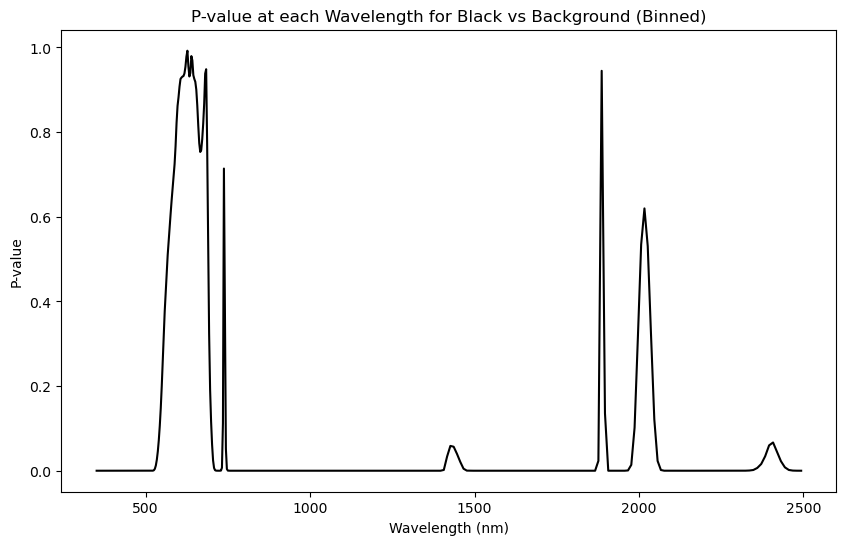

In [60]:
binned_black_t,binned_black_p = stats.ttest_ind(binned_black,r_w_binned_combined)
print(np.size(binned_black_t), np.size(binned_black_p))

plt.figure(figsize=(10,6))
plt.plot(wavelength_bins, binned_black_p, color = 'black')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for Black vs Background (Binned)')
plt.savefig('(binned)_P-value_at_each_Wavelength_for_Black_vs_Background', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


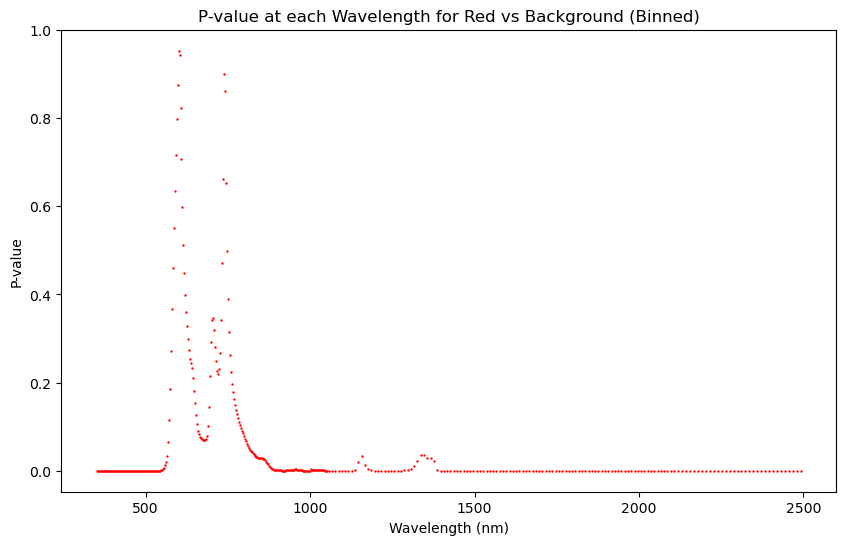

In [61]:
binned_red_t,binned_red_p = stats.ttest_ind(binned_red,w_b_binned_combined)
print(np.size(binned_red_t), np.size(binned_red_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_red_p, color = 'red',s=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for Red vs Background (Binned)')
plt.savefig('(binned)_P-value_at_each_Wavelength_for_Red_vs_Background_scatter', bbox_inches = 'tight', dpi = 1000)
plt.show()


372 372


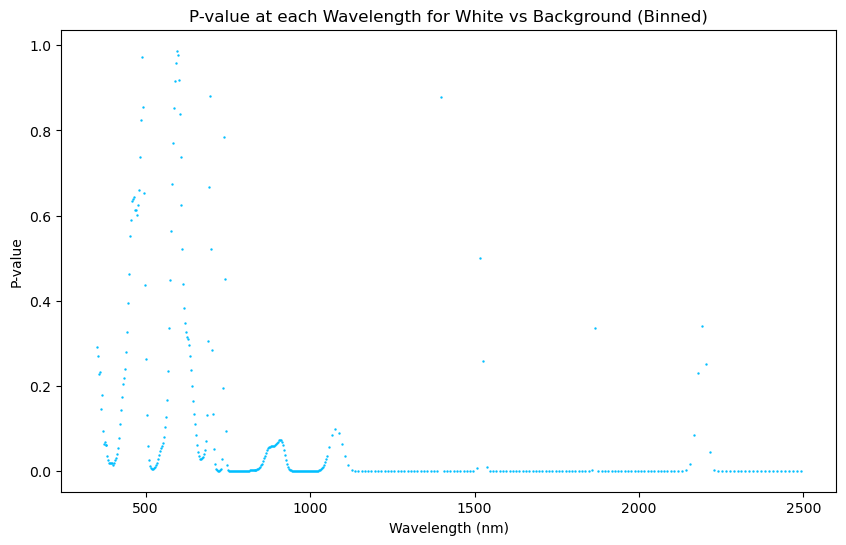

In [62]:
binned_white_t,binned_white_p = stats.ttest_ind(binned_white,r_b_binned_combined)
print(np.size(binned_white_t), np.size(binned_white_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_white_p, color = 'deepskyblue', s = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for White vs Background (Binned)')
plt.savefig('(binned)_P-value_at_each_Wavelength_for_White_vs_Background_scatter', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


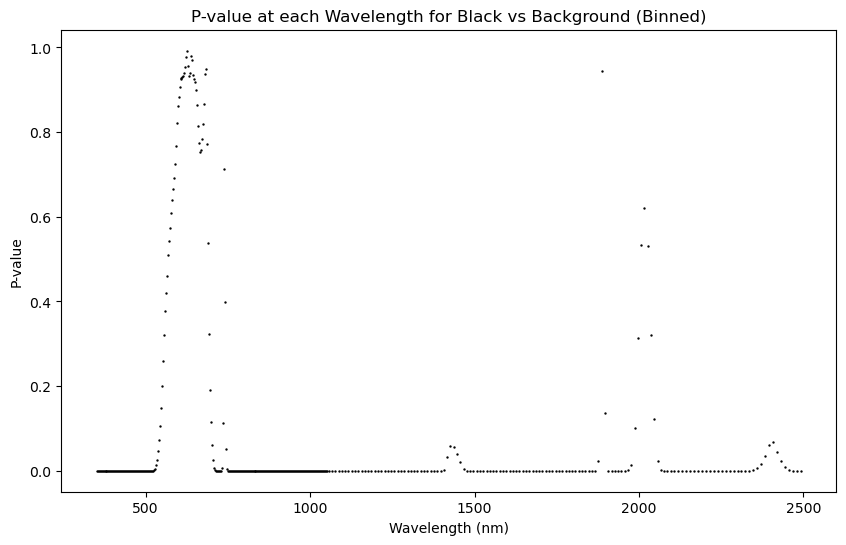

In [63]:
binned_black_t,binned_black_p = stats.ttest_ind(binned_black,r_w_binned_combined)
print(np.size(binned_black_t), np.size(binned_black_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_black_p, color = 'black', s = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for Black vs Background (Binned)')
plt.savefig('(binned)_P-value_at_each_Wavelength_for_Black_vs_Background_scatter', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


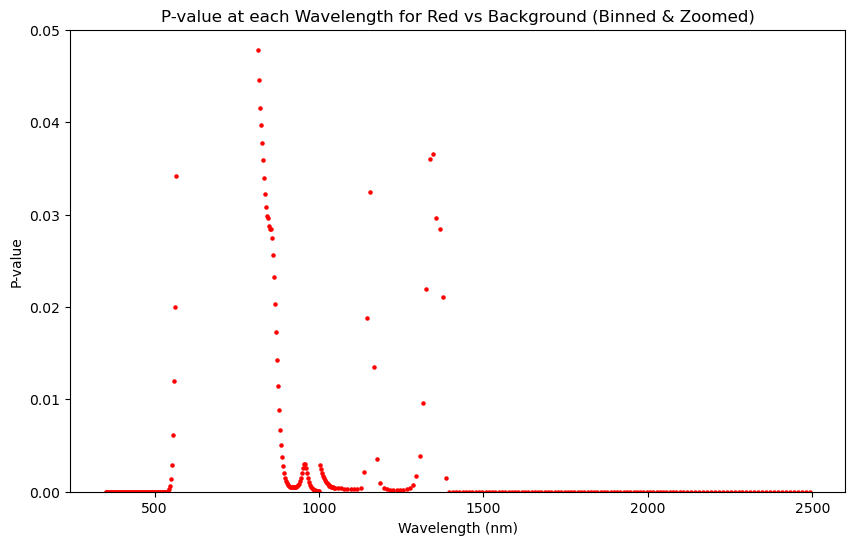

In [64]:
binned_red_t,binned_red_p = stats.ttest_ind(binned_red,w_b_binned_combined)
print(np.size(binned_red_t), np.size(binned_red_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_red_p, color = 'red',s=5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for Red vs Background (Binned & Zoomed)')
plt.savefig('Zoom_binned)_P-value_at_each_Wavelength_for_Red_vs_Background_scatter', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


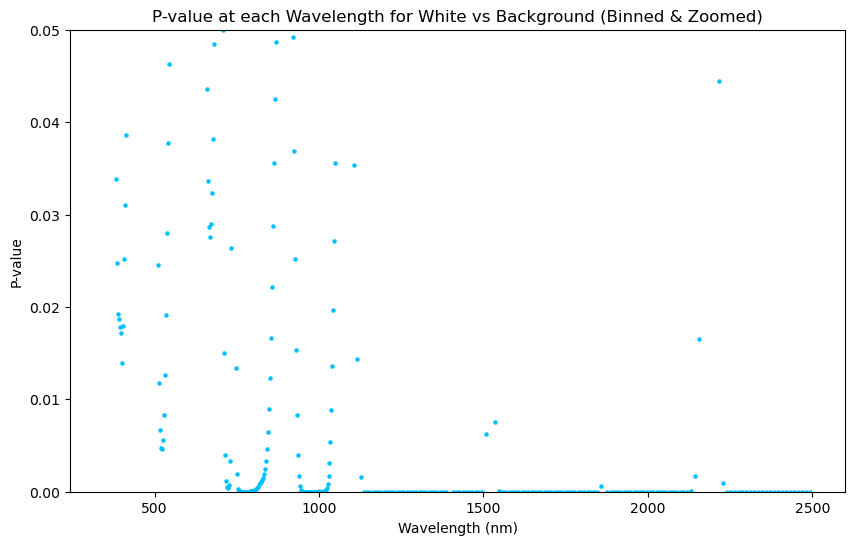

In [65]:
binned_white_t,binned_white_p = stats.ttest_ind(binned_white,r_b_binned_combined)
print(np.size(binned_white_t), np.size(binned_white_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_white_p, color = 'deepskyblue', s = 5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for White vs Background (Binned & Zoomed)')
plt.savefig('Zoom_binned)_P-value_at_each_Wavelength_for_White_vs_Background_scatter', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


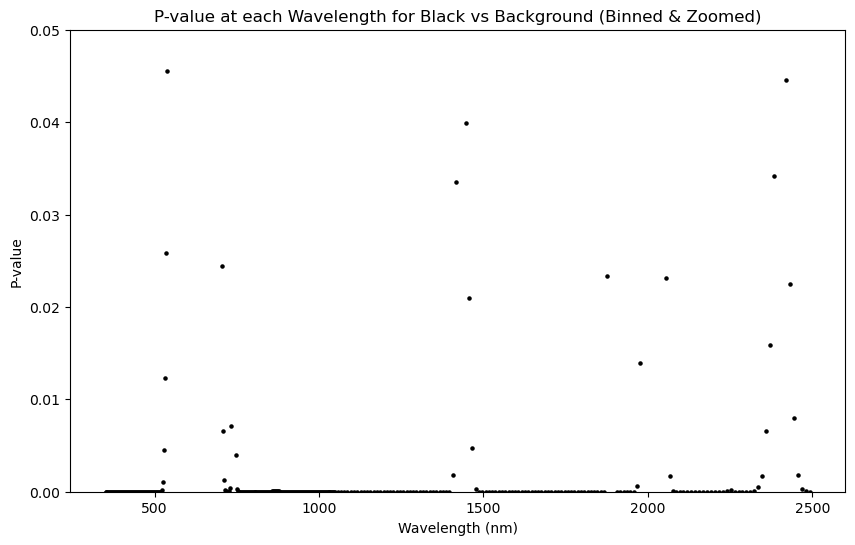

In [66]:
binned_black_t,binned_black_p = stats.ttest_ind(binned_black,r_w_binned_combined)
print(np.size(binned_black_t), np.size(binned_black_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_black_p, color = 'black', s = 5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for Black vs Background (Binned & Zoomed)')
plt.savefig('Zoom_binned)_P-value_at_each_Wavelength_for_Black_vs_Background_scatter', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


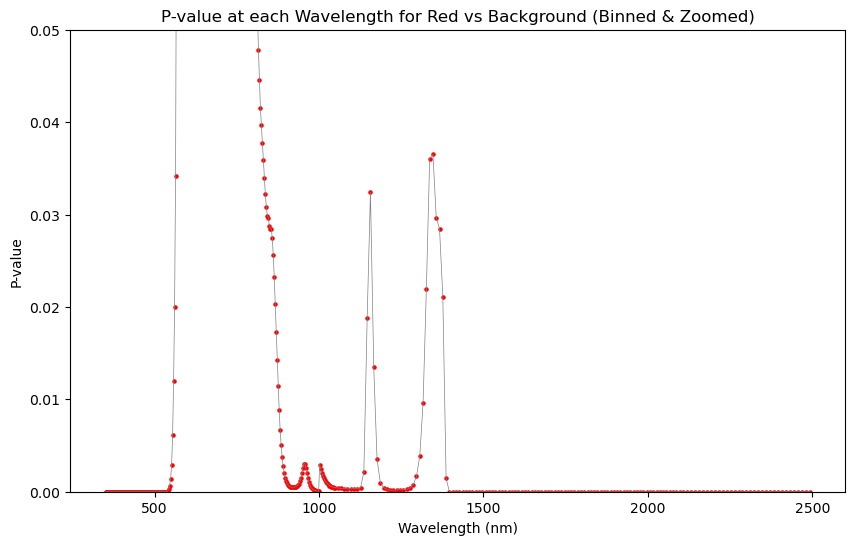

In [67]:
binned_red_t,binned_red_p = stats.ttest_ind(binned_red,w_b_binned_combined)
print(np.size(binned_red_t), np.size(binned_red_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_red_p, color = 'red',s=5)
plt.plot(wavelength_bins, binned_red_p, color = 'grey', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for Red vs Background (Binned & Zoomed)')
plt.savefig('Zoom_binned)_P-value_at_each_Wavelength_for_Red_vs_Background_scatter_and_line', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


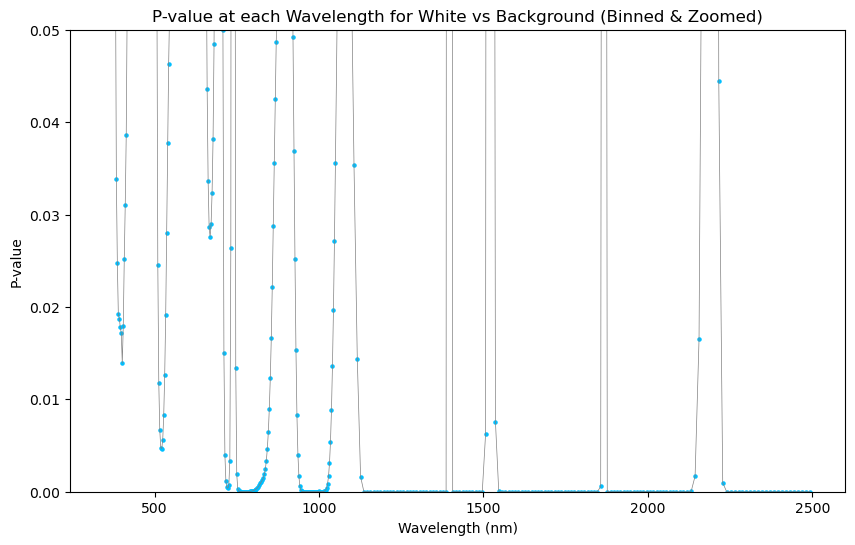

In [68]:
binned_white_t,binned_white_p = stats.ttest_ind(binned_white,r_b_binned_combined)
print(np.size(binned_white_t), np.size(binned_white_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_white_p, color = 'deepskyblue', s = 5)
plt.plot(wavelength_bins, binned_white_p, color = 'grey', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for White vs Background (Binned & Zoomed)')
plt.savefig('Zoom_binned)_P-value_at_each_Wavelength_for_White_vs_Background_scatter_and_line', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


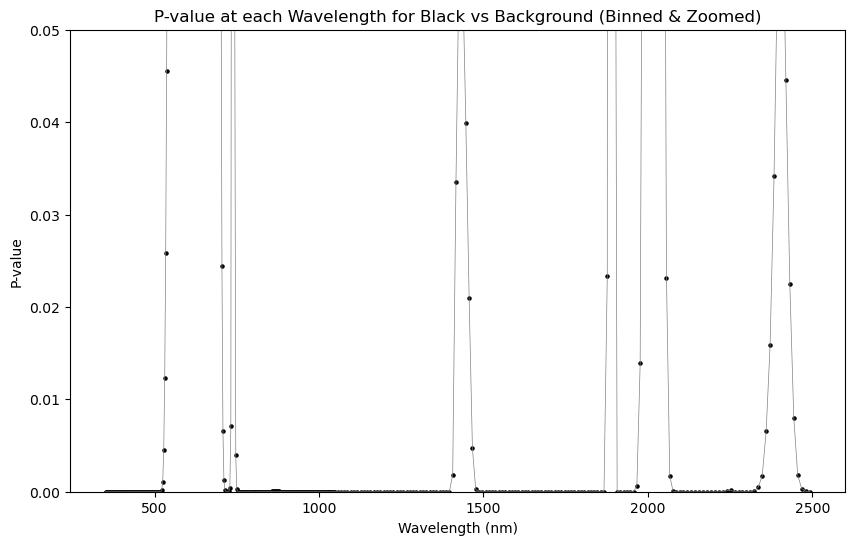

In [69]:
binned_black_t,binned_black_p = stats.ttest_ind(binned_black,r_w_binned_combined)
print(np.size(binned_black_t), np.size(binned_black_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_black_p, color = 'black', s = 5)
plt.plot(wavelength_bins, binned_black_p, color = 'grey', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for Black vs Background (Binned & Zoomed)')
plt.savefig('Zoom_binned)_P-value_at_each_Wavelength_for_Black_vs_Background_scatter_and_line', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [70]:
binned_red_var = calculate_variance(binned_red)
print(len(binned_red_var))
binned_white_var = calculate_variance(binned_white)
print(len(binned_white_var))
binned_black_var = calculate_variance(binned_black)
print(len(binned_black_var))

372
372
372


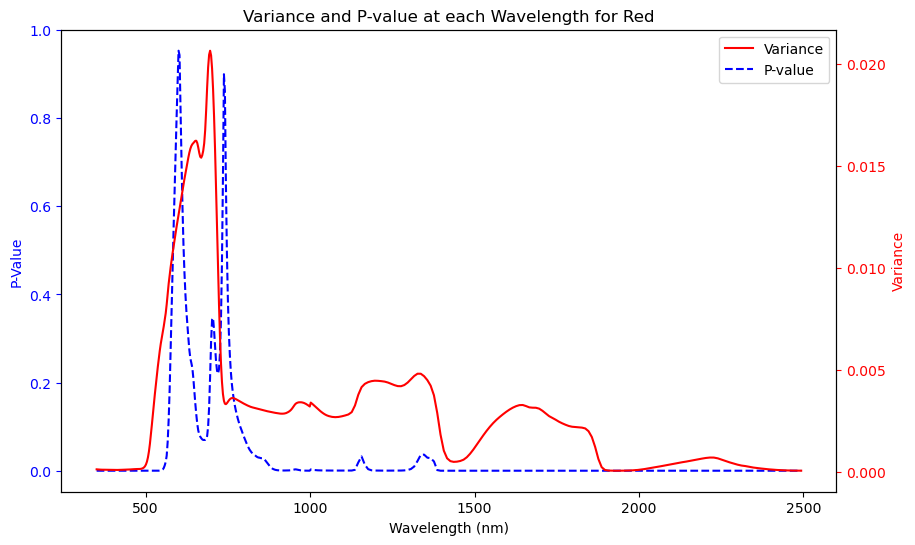

In [71]:
# Create the first plot
import matplotlib.lines as mlines
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelength_bins, binned_red_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelength_bins, binned_red_var, color = 'red', label = 'Variance', linestyle = '-')
ax2.set_ylabel('Variance', color='red')
ax2.tick_params('y', colors='red')

legend_var = mlines.Line2D([], [], color='r', label='Variance')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance and P-value at each Wavelength for Red')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_Red_diff_axis_binned', bbox_inches = 'tight', dpi = 1000)
plt.show()

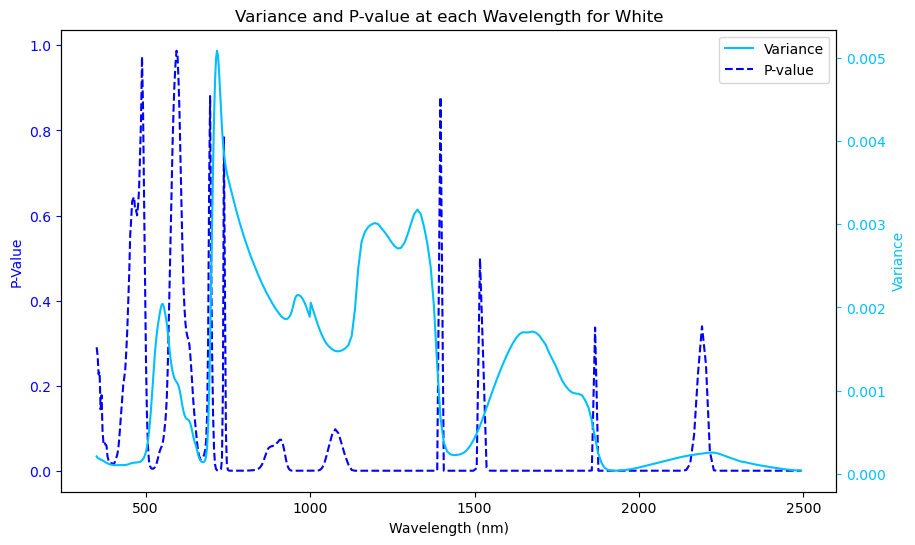

In [72]:
# Create the first plot
import matplotlib.lines as mlines
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelength_bins, binned_white_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelength_bins, binned_white_var, color = 'deepskyblue', label = 'Variance', linestyle = '-')
ax2.set_ylabel('Variance', color='deepskyblue')
ax2.tick_params('y', colors='deepskyblue')

legend_var = mlines.Line2D([], [], color='deepskyblue', label='Variance')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance and P-value at each Wavelength for White')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_white_diff_axis_binned', bbox_inches = 'tight', dpi = 1000)
plt.show()

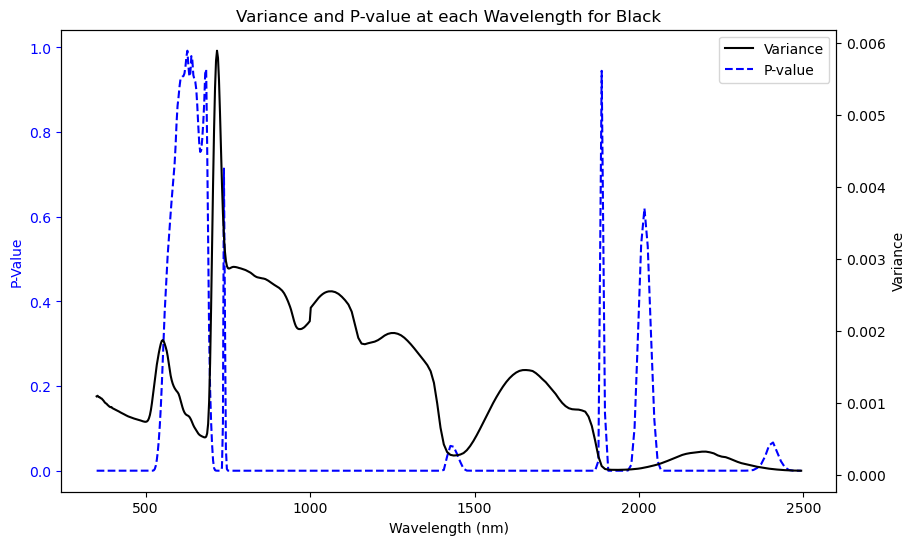

In [73]:
# Create the first plot
import matplotlib.lines as mlines
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelength_bins, binned_black_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelength_bins, binned_black_var, color = 'black', label = 'Variance', linestyle = '-')
ax2.set_ylabel('Variance', color='black')
ax2.tick_params('y', colors='black')

legend_var = mlines.Line2D([], [], color='black', label='Variance')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance and P-value at each Wavelength for Black')
plt.savefig('Variance_and_p_value_at_each_Wavelength_for_black_diff_axis_binned', bbox_inches = 'tight', dpi = 1000)
plt.show()

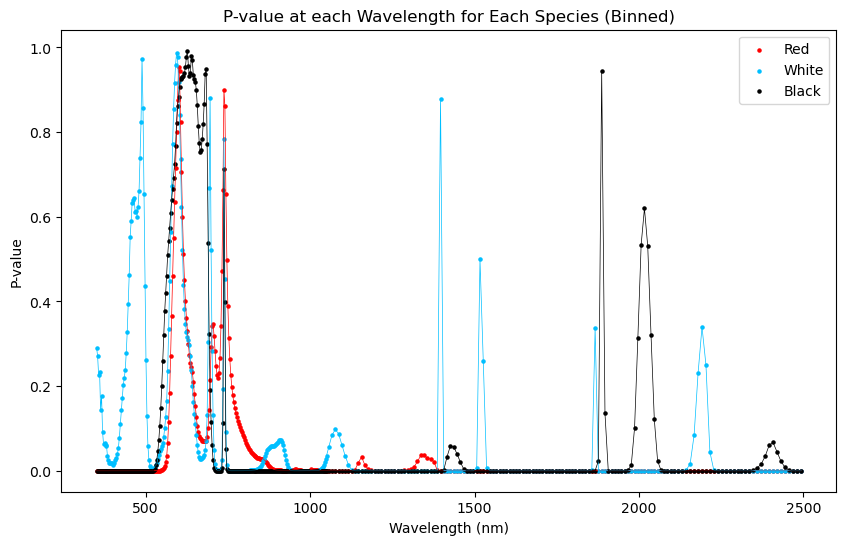

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_red_p, color = 'red',s=5, label = 'Red')
plt.plot(wavelength_bins, binned_red_p, color = 'red', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_white_p, color = 'deepskyblue', s = 5, label = 'White')
plt.plot(wavelength_bins, binned_white_p, color = 'deepskyblue', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_black_p, color = 'black', s = 5, label = 'Black')
plt.plot(wavelength_bins, binned_black_p, color = 'black', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
#plt.ylim([0,0.05])
plt.legend()
plt.title('P-value at each Wavelength for Each Species (Binned)')
plt.savefig('P_value_at_each_Wavelength_for_each_species_binned', bbox_inches = 'tight', dpi = 1000)
plt.show()

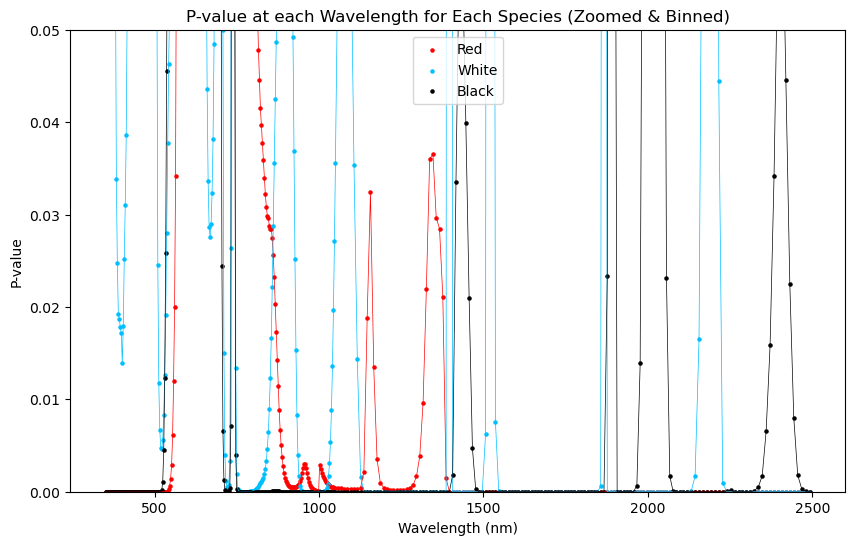

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_red_p, color = 'red',s=5, label = 'Red')
plt.plot(wavelength_bins, binned_red_p, color = 'red', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_white_p, color = 'deepskyblue', s = 5, label = 'White')
plt.plot(wavelength_bins, binned_white_p, color = 'deepskyblue', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_black_p, color = 'black', s = 5, label = 'Black')
plt.plot(wavelength_bins, binned_black_p, color = 'black', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.legend()
plt.title('P-value at each Wavelength for Each Species (Zoomed & Binned)')
plt.savefig('P_value_at_each_Wavelength_for_each_species_binned_zoomed', bbox_inches = 'tight', dpi = 1000)
plt.show()

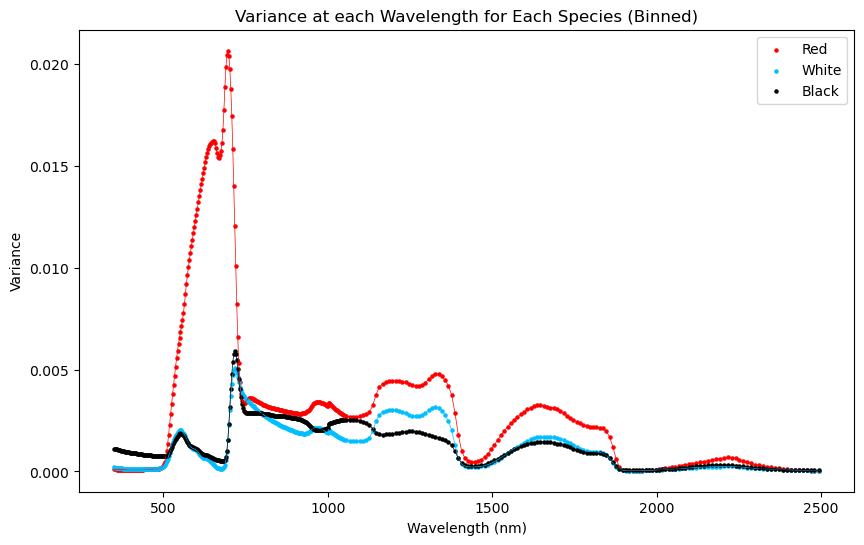

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_red_var, color = 'red',s=5, label = 'Red')
plt.plot(wavelength_bins, binned_red_var, color = 'red', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_white_var, color = 'deepskyblue', s = 5, label = 'White')
plt.plot(wavelength_bins, binned_white_var, color = 'deepskyblue', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_black_var, color = 'black', s = 5, label = 'Black')
plt.plot(wavelength_bins, binned_black_var, color = 'black', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Variance')
#plt.ylim([0,0.05])
plt.legend()
plt.title('Variance at each Wavelength for Each Species (Binned)')
plt.savefig('Variance_at_each_Wavelength_for_each_species_binned', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [77]:
binned_red_var_div_reflectance = binned_red_var/np.mean(binned_red, axis = 0)
binned_white_var_div_reflectance = binned_white_var/np.mean(binned_white, axis = 0)
binned_black_var_div_reflectance = binned_black_var/np.mean(binned_black, axis = 0)

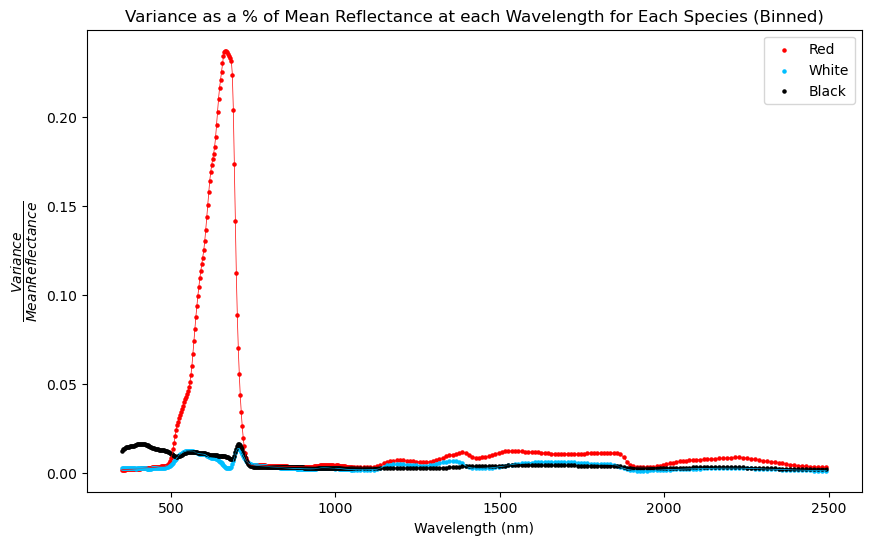

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, binned_red_var_div_reflectance, color = 'red',s=5, label = 'Red')
plt.plot(wavelength_bins, binned_red_var_div_reflectance, color = 'red', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_white_var_div_reflectance, color = 'deepskyblue', s = 5, label = 'White')
plt.plot(wavelength_bins, binned_white_var_div_reflectance, color = 'deepskyblue', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_black_var_div_reflectance, color = 'black', s = 5, label = 'Black')
plt.plot(wavelength_bins, binned_black_var_div_reflectance, color = 'black', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'$\dfrac{Variance}{Mean Reflectance}$')
#plt.ylim([0,0.05])
plt.legend()
plt.title('Variance as a % of Mean Reflectance at each Wavelength for Each Species (Binned)')
plt.savefig('Variance_div_mean_ref_at_each_Wavelength_for_each_species_binned', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [79]:
num_wave_bins = len(wavelength_bins)

In [80]:
red_selected_wavelength_bins = []
for i in range(0, num_wave_bins):
    if binned_red_p[i] < 0.05:
        if binned_red_var[i] < 0.005:
            red_selected_wavelength_bins += [wavelength_bins[i]]

white_selected_wavelength_bins = []
for i in range(0, num_wave_bins):
    if binned_white_p[i] < 0.05:
        if binned_white_var[i] < 0.005:
            white_selected_wavelength_bins += [wavelength_bins[i]]

black_selected_wavelength_bins = []
for i in range(0, num_wave_bins):
    if binned_black_p[i] < 0.05:
        if binned_black_var[i] < 0.005:
            black_selected_wavelength_bins += [wavelength_bins[i]]

In [81]:
print(red_selected_wavelength_bins)
print(len(red_selected_wavelength_bins))

[351.0, 354.0, 357.0, 360.0, 363.0, 366.0, 369.0, 372.0, 375.0, 378.0, 381.0, 384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 420.0, 423.0, 426.0, 429.0, 432.0, 435.0, 438.0, 441.0, 444.0, 447.0, 450.0, 453.0, 456.0, 459.0, 462.0, 465.0, 468.0, 471.0, 474.0, 477.0, 480.0, 483.0, 486.0, 489.0, 492.0, 495.0, 498.0, 501.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 873.0, 876.0, 879.0, 882.0, 885.0, 888.0, 891.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0, 993.0, 996.0, 999.0, 1002.0, 1005.0, 1008.0, 1011.0, 1014.0, 1017.0, 1020.0, 1023.0, 1026.0, 1029.0, 1032.0, 1035.0, 1038.0, 1041.0, 1044.0, 1047.0, 105

In [82]:
print(white_selected_wavelength_bins)
print(len(white_selected_wavelength_bins))

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 660.0, 663.0, 666.0, 669.0, 672.0, 675.0, 678.0, 681.0, 708.0, 711.0, 714.0, 723.0, 726.0, 729.0, 732.0, 747.0, 750.0, 753.0, 756.0, 759.0, 762.0, 765.0, 768.0, 771.0, 774.0, 777.0, 780.0, 783.0, 786.0, 789.0, 792.0, 795.0, 798.0, 801.0, 804.0, 807.0, 810.0, 813.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0, 993.0, 996.0, 999.0, 1002.0, 1005.0, 1008.0, 1011.0, 1014.0, 1017.0, 1020.0, 1023.0, 1026.0, 1029.0, 1032.0, 1035.0, 1038.0, 1041.0, 1044.0, 1047.0, 1050.0, 1106.5, 1116.5, 1126.5, 1136.5, 1146.5, 1156.5, 1166.5, 1176.5, 1186.5, 1196.5, 1206.5, 1216.5, 1226.5, 1236.5, 12

In [83]:
print(black_selected_wavelength_bins)
print(len(black_selected_wavelength_bins))

[351.0, 354.0, 357.0, 360.0, 363.0, 366.0, 369.0, 372.0, 375.0, 378.0, 381.0, 384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 420.0, 423.0, 426.0, 429.0, 432.0, 435.0, 438.0, 441.0, 444.0, 447.0, 450.0, 453.0, 456.0, 459.0, 462.0, 465.0, 468.0, 471.0, 474.0, 477.0, 480.0, 483.0, 486.0, 489.0, 492.0, 495.0, 498.0, 501.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 705.0, 708.0, 729.0, 732.0, 747.0, 750.0, 753.0, 756.0, 759.0, 762.0, 765.0, 768.0, 771.0, 774.0, 777.0, 780.0, 783.0, 786.0, 789.0, 792.0, 795.0, 798.0, 801.0, 804.0, 807.0, 810.0, 813.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 873.0, 876.0, 879.0, 882.0, 885.0, 888.0, 891.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0, 969.0, 972.0

In [84]:
# red, white,
# red, black
# black, white

red_white_overlap = []
for bin in red_selected_wavelength_bins:
    if bin in white_selected_wavelength_bins:
        red_white_overlap.append(bin)

red_black_overlap = []
for bin in red_selected_wavelength_bins:
    if bin in black_selected_wavelength_bins:
        red_black_overlap.append(bin)

white_black_overlap = []
for bin in white_selected_wavelength_bins:
    if bin in black_selected_wavelength_bins:
        white_black_overlap.append(bin)

In [85]:
print(red_white_overlap)
print(len(red_white_overlap))

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0, 993.0, 996.0, 999.0, 1002.0, 1005.0, 1008.0, 1011.0, 1014.0, 1017.0, 1020.0, 1023.0, 1026.0, 1029.0, 1032.0, 1035.0, 1038.0, 1041.0, 1044.0, 1047.0, 1050.0, 1106.5, 1116.5, 1126.5, 1136.5, 1146.5, 1156.5, 1166.5, 1176.5, 1186.5, 1196.5, 1206.5, 1216.5, 1226.5, 1236.5, 1246.5, 1256.5, 1266.5, 1276.5, 1286.5, 1296.5, 1306.5, 1316.5, 1326.5, 1336.5, 1346.5, 1356.5, 1366.5, 1376.5, 1386.5, 1406.5, 1416.5, 1426.5, 1436.5, 1446.5, 1456.5, 1466.5, 1476.5, 1486.5, 1496.5, 1506.5, 1536.5, 1546.5, 1556.5, 1566.5, 1576.5, 1586.5, 1596.5, 1606.5, 1616.5, 1626.5, 1

In [86]:
print(red_black_overlap)
print(len(red_black_overlap))

[351.0, 354.0, 357.0, 360.0, 363.0, 366.0, 369.0, 372.0, 375.0, 378.0, 381.0, 384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 420.0, 423.0, 426.0, 429.0, 432.0, 435.0, 438.0, 441.0, 444.0, 447.0, 450.0, 453.0, 456.0, 459.0, 462.0, 465.0, 468.0, 471.0, 474.0, 477.0, 480.0, 483.0, 486.0, 489.0, 492.0, 495.0, 498.0, 501.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 873.0, 876.0, 879.0, 882.0, 885.0, 888.0, 891.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0, 993.0, 996.0, 999.0, 1002.0, 1005.0, 1008.0, 1011.0, 1014.0, 1017.0, 1020.0, 1023.0, 1026.0, 1029.0, 1032.0, 1035.0, 1038.0, 1041.0, 1044.0, 1047.0, 105

In [87]:
print(white_black_overlap)
print(len(white_black_overlap))

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 708.0, 729.0, 732.0, 747.0, 750.0, 753.0, 756.0, 759.0, 762.0, 765.0, 768.0, 771.0, 774.0, 777.0, 780.0, 783.0, 786.0, 789.0, 792.0, 795.0, 798.0, 801.0, 804.0, 807.0, 810.0, 813.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0, 993.0, 996.0, 999.0, 1002.0, 1005.0, 1008.0, 1011.0, 1014.0, 1017.0, 1020.0, 1023.0, 1026.0, 1029.0, 1032.0, 1035.0, 1038.0, 1041.0, 1044.0, 1047.0, 1050.0, 1106.5, 1116.5, 1126.5, 1136.5, 1146.5, 1156.5, 1166.5, 1176.5, 1186.5, 1196.5, 1206.5, 1216.5, 1226.5, 1236.5, 1246.5, 1256.5, 1266.5, 1276.5, 1286.5, 1296.5, 1306.5, 1316.5, 1326.5, 1336.5, 1346.5, 1356.5, 1366

In [88]:
red_white_black_overlap = []
for bin in red_selected_wavelength_bins:
    if bin in white_selected_wavelength_bins:
        if bin in black_selected_wavelength_bins:
            red_white_black_overlap.append(bin)

In [89]:
print(red_white_black_overlap)
print(len(red_white_black_overlap))

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0, 993.0, 996.0, 999.0, 1002.0, 1005.0, 1008.0, 1011.0, 1014.0, 1017.0, 1020.0, 1023.0, 1026.0, 1029.0, 1032.0, 1035.0, 1038.0, 1041.0, 1044.0, 1047.0, 1050.0, 1106.5, 1116.5, 1126.5, 1136.5, 1146.5, 1156.5, 1166.5, 1176.5, 1186.5, 1196.5, 1206.5, 1216.5, 1226.5, 1236.5, 1246.5, 1256.5, 1266.5, 1276.5, 1286.5, 1296.5, 1306.5, 1316.5, 1326.5, 1336.5, 1346.5, 1356.5, 1366.5, 1376.5, 1386.5, 1406.5, 1416.5, 1446.5, 1456.5, 1466.5, 1476.5, 1486.5, 1496.5, 1506.5, 1536.5, 1546.5, 1556.5, 1566.5, 1576.5, 1586.5, 1596.5, 1606.5, 1616.5, 1626.5, 1636.5, 1646.5, 1

In [90]:
red_only_bin = []
for bin in red_selected_wavelength_bins:
    if bin not in white_selected_wavelength_bins:
        if bin not in black_selected_wavelength_bins:
            red_only_bin.append(bin)

white_only_bin = []
for bin in white_selected_wavelength_bins:
    if bin not in red_selected_wavelength_bins:
        if bin not in black_selected_wavelength_bins:
            white_only_bin.append(bin)

black_only_bin = []
for bin in black_selected_wavelength_bins:
    if bin not in red_selected_wavelength_bins:
        if bin not in white_selected_wavelength_bins:
            black_only_bin.append(bin)

In [91]:
print(red_only_bin)
print(len(red_only_bin))

[]
0


In [92]:
print(white_only_bin)
print(len(white_only_bin))

[540.0, 543.0, 660.0, 663.0, 666.0, 669.0, 672.0, 675.0, 678.0, 681.0, 711.0, 714.0, 723.0, 726.0]
14


In [93]:
print(black_only_bin)
print(len(black_only_bin))

[705.0]
1


In [94]:
# plot for black at 705 nm
black_spectra_id = []
for i in black_indices:
    black_spectra_id.append(data_array[i,0])
print(black_spectra_id)
print(len(black_spectra_id))

#705 nm reflectance
index_705 = np.where(wavelength_bins == 705)
print(index_705)
print(wavelength_bins[index_705])

['suriname00085', 'suriname00086', 'suriname00087', 'suriname00088', 'suriname00089', 'suriname00092', 'suriname00093', 'suriname00094', 'suriname00095', 'suriname00096', 'suriname00099', 'suriname00100', 'suriname00101', 'suriname00102', 'suriname00103', 'suriname00106', 'suriname00107', 'suriname00108', 'suriname00109', 'suriname00110', 'suriname00113', 'suriname00114', 'suriname00115', 'suriname00116', 'suriname00117', 'suriname00120', 'suriname00121', 'suriname00122', 'suriname00123', 'suriname00124', 'suriname00127', 'suriname00128', 'suriname00129', 'suriname00130', 'suriname00131', 'suriname00134', 'suriname00135', 'suriname00136', 'suriname00137', 'suriname00138', 'suriname00141', 'suriname00142', 'suriname00143', 'suriname00144', 'suriname00145', 'suriname00148', 'suriname00149', 'suriname00150', 'suriname00151', 'suriname00152', 'suriname00155', 'suriname00156', 'suriname00157', 'suriname00158', 'suriname00159', 'suriname00162', 'suriname00163', 'suriname00164', 'suriname0016

330


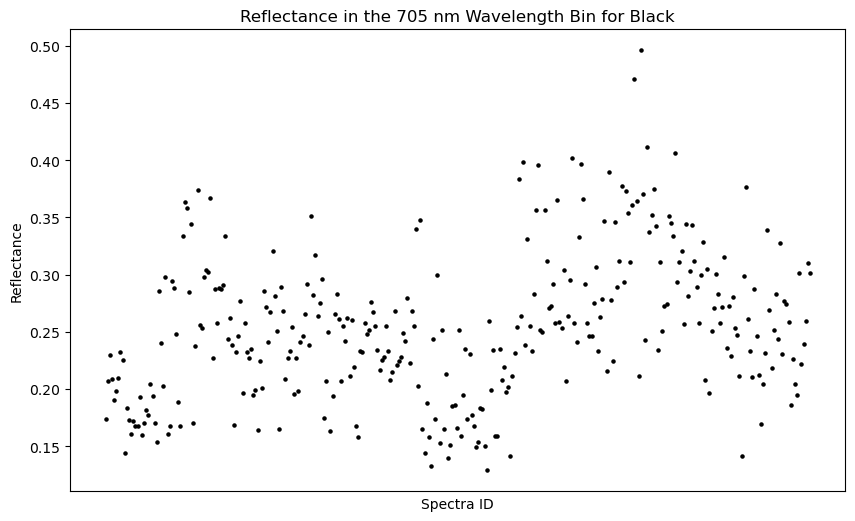

In [95]:
reflectance_at_705 = binned_black[:,index_705]
print(np.size(reflectance_at_705))

plt.figure(figsize = (10,6))
plt.scatter(black_spectra_id, reflectance_at_705, color = 'black', s = 5)
plt.ylabel('Reflectance')
plt.xlabel('Spectra ID')
plt.xticks([])
plt.title('Reflectance in the 705 nm Wavelength Bin for Black')
plt.savefig('Reflectance_in_the_705_nm_Wavelength_Bin_for_Black.png', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [96]:
print(np.shape(reflectance_at_705[:,0,0]))
reflectance_at_705 = reflectance_at_705[:,0,0]
print(np.shape(reflectance_at_705))

(330,)
(330,)


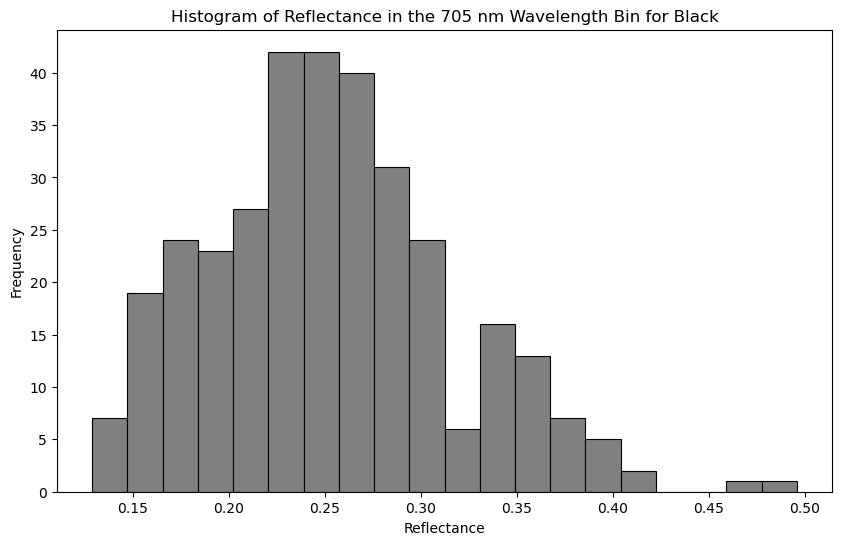

In [97]:
# try sorting so plots like a gaussian
plt.figure(figsize = (10,6))
plt.hist(reflectance_at_705, bins = 20, color = 'grey',edgecolor = 'black', linewidth = 0.8 )
plt.ylabel('Frequency')
plt.xlabel('Reflectance')
plt.title('Histogram of Reflectance in the 705 nm Wavelength Bin for Black')
plt.savefig('Reflectance_in_the_705_nm_Wavelength_Bin_for_Black_histogram.png', bbox_inches = 'tight', dpi = 1000)
plt.show()

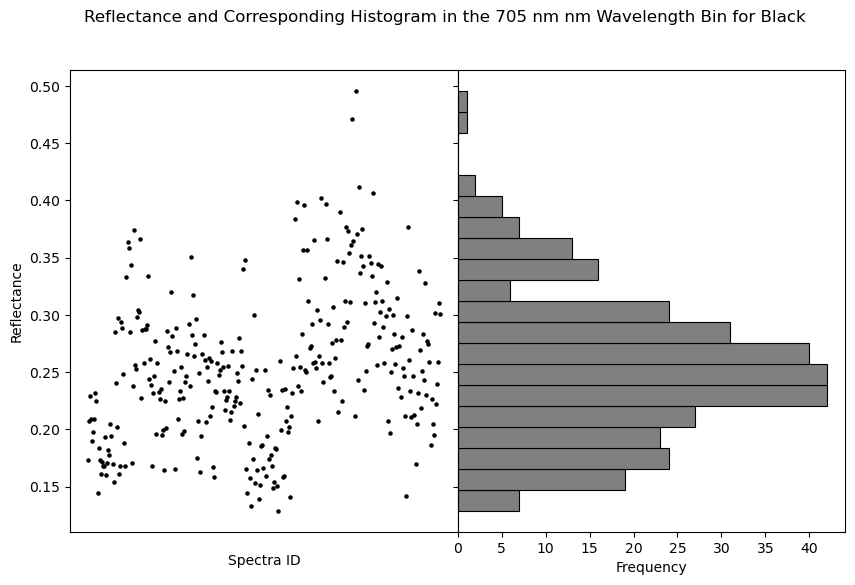

In [459]:
fig, axs = plt.subplots(1,2,sharey = True, figsize = (10,6))
    
axs[0].scatter(black_spectra_id, reflectance_at_705, color = 'black', s = 5)
axs[0].set_ylabel('Reflectance')
axs[0].set_xlabel('\nSpectra ID')
axs[0].set_xticks([])

axs[1].hist(reflectance_at_705, bins = 20, color = 'grey',edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal')
axs[1].set_xlabel('Frequency')


fig.suptitle(f'Reflectance and Corresponding Histogram in the 705 nm nm Wavelength Bin for Black')

plt.subplots_adjust(wspace = 0)

plt.savefig(f'Reflectance_and_histogram_for_705_nm_Wavelength_Bin_for_black.png', bbox_inches = 'tight', dpi = 1000)

plt.show()

In [98]:
mean_ref_at_705_black = np.mean(reflectance_at_705)
st_dev_ref_at_705_black = np.std(reflectance_at_705)

print(mean_ref_at_705_black)
print(st_dev_ref_at_705_black)

0.2533099889010101
0.06352730448091512


In [99]:
print(st_dev_ref_at_705_black*3)

0.19058191344274536


In [100]:
black_705_meet_criteria_1stdev = []
for ref in reflectance_at_705:
    if ref <= (mean_ref_at_705_black + st_dev_ref_at_705_black):
        if ref >= (mean_ref_at_705_black - st_dev_ref_at_705_black):
            black_705_meet_criteria_1stdev.append(ref)

print(black_705_meet_criteria_1stdev)
print(len(black_705_meet_criteria_1stdev))

black_705_meet_criteria_2stdev = []
for ref in reflectance_at_705:
    if ref <= (mean_ref_at_705_black + st_dev_ref_at_705_black * 2):
        if ref >= (mean_ref_at_705_black - st_dev_ref_at_705_black * 2):
            black_705_meet_criteria_2stdev.append(ref)

print(black_705_meet_criteria_2stdev)
print(len(black_705_meet_criteria_2stdev))

black_705_meet_criteria_3stdev = []
for ref in reflectance_at_705:
    if ref <= (mean_ref_at_705_black + st_dev_ref_at_705_black * 3):
        if ref >= (mean_ref_at_705_black - st_dev_ref_at_705_black * 3):
            black_705_meet_criteria_3stdev.append(ref)

print(black_705_meet_criteria_3stdev)
print(len(black_705_meet_criteria_3stdev))

[0.207038378, 0.22940882733333334, 0.208647975, 0.190132895, 0.19787331633333335, 0.209305092, 0.231964405, 0.2249927926666667, 0.19296132700000002, 0.20434710233333334, 0.19388836900000003, 0.285277316, 0.24034102000000002, 0.20225847200000002, 0.29772903266666667, 0.294049803, 0.28855052099999995, 0.24808720433333334, 0.2850239473333333, 0.23781032466666666, 0.25622279033333334, 0.25313946433333334, 0.29792652233333333, 0.3044582966666667, 0.30253540033333337, 0.22704498799999998, 0.28712300399999996, 0.25754374166666666, 0.288119446, 0.28783821233333334, 0.2911744583333333, 0.24400753266666664, 0.26168641100000006, 0.23860241699999998, 0.23200360866666667, 0.24665776366666667, 0.2767767053333334, 0.19634001199999998, 0.2576855276666667, 0.23263923233333336, 0.22682203899999998, 0.23494339733333333, 0.194626441, 0.199276102, 0.2247868546666667, 0.201095112, 0.286126906, 0.272127311, 0.24142867666666668, 0.26720509900000006, 0.28157703, 0.2506527973333333, 0.2888734966666666, 0.268036

In [101]:
print(num_black)
print(len(reflectance_at_705))

330
330


In [102]:
black_705_purity_1stdev = len(black_705_meet_criteria_1stdev)/num_black
print(black_705_purity_1stdev)

black_705_purity_2stdev = len(black_705_meet_criteria_2stdev)/num_black
print(black_705_purity_2stdev)

black_705_purity_3stdev = len(black_705_meet_criteria_3stdev)/num_black
print(black_705_purity_3stdev)

0.6818181818181818
0.9696969696969697
0.9939393939393939


In [103]:
# trying to quantify purity at this wavelength
red_reflectance_at_705 = binned_red[:,index_705]

mean_ref_at_705_red = np.mean(red_reflectance_at_705)
st_dev_ref_at_705_red = np.std(red_reflectance_at_705)

red_705_meet_black_crit = []
for ref in red_reflectance_at_705:
    if ref <= (mean_ref_at_705_black + st_dev_ref_at_705_black * 2):
        if ref >= (mean_ref_at_705_black - st_dev_ref_at_705_black * 2):
            red_705_meet_black_crit.append(ref)

white_reflectance_at_705 = binned_white[:,index_705]

mean_ref_at_705_white = np.mean(white_reflectance_at_705)
st_dev_ref_at_705_white = np.std(white_reflectance_at_705)

white_705_meet_black_crit = []
for ref in white_reflectance_at_705:
    if ref <= (mean_ref_at_705_black + st_dev_ref_at_705_black * 2):
        if ref >= (mean_ref_at_705_black - st_dev_ref_at_705_black * 2):
            white_705_meet_black_crit.append(ref)

In [104]:
print(red_705_meet_black_crit)
print(len(red_705_meet_black_crit))
print(len(binned_red[:,0]))
print(num_red)

print(white_705_meet_black_crit)
print(len(white_705_meet_black_crit))
print(len(binned_white[:,0]))
print(num_white)

[array([[0.19022551]]), array([[0.32482986]]), array([[0.2069948]]), array([[0.17281583]]), array([[0.27534338]]), array([[0.16155521]]), array([[0.19283721]]), array([[0.2007959]]), array([[0.12986489]]), array([[0.14220378]]), array([[0.13456565]]), array([[0.17329607]]), array([[0.18992259]]), array([[0.15784504]]), array([[0.20936095]]), array([[0.21631196]]), array([[0.24494212]]), array([[0.13766179]]), array([[0.13978186]]), array([[0.17323375]]), array([[0.14858416]]), array([[0.20577355]]), array([[0.19084382]]), array([[0.21043325]]), array([[0.19147633]]), array([[0.20021868]]), array([[0.16672594]]), array([[0.16732071]]), array([[0.20520552]]), array([[0.17208815]]), array([[0.18662804]]), array([[0.16181402]]), array([[0.21740967]]), array([[0.19058128]]), array([[0.22737706]]), array([[0.18820629]]), array([[0.17088861]]), array([[0.21657392]]), array([[0.16047916]]), array([[0.17734284]]), array([[0.21035338]]), array([[0.14840444]]), array([[0.18951382]]), array([[0.19

In [105]:
# % of background which match the criteria for black at 705 nm
total_w_r_fit_705_black_crit = len(red_705_meet_black_crit) + len(white_705_meet_black_crit)
bgd_fit_705_black_crit = total_w_r_fit_705_black_crit/(num_red + num_white)
print(bgd_fit_705_black_crit)

0.8867521367521367


In [106]:
total_plants_meet_black_705_crit = len(black_705_meet_criteria_2stdev) + total_w_r_fit_705_black_crit
total_purity_705 = len(black_705_meet_criteria_2stdev) / total_plants_meet_black_705_crit
print(total_purity_705)

0.43537414965986393


In [107]:
# define loop which repeats the entire process done for black for 14 whites

# first find indexs of the wavelength bins specific to white
specific_white_indices = []
for index in white_only_bin:
    white_index = np.where(wavelength_bins == index)
    specific_white_indices.append(white_index)
print(specific_white_indices)
print(wavelength_bins[specific_white_indices])
print(len(specific_white_indices))

# make list of white spectra
white_spectra_id = []
for i in white_indices:
    white_spectra_id.append(data_array[i,0])
print(white_spectra_id)
print(len(white_spectra_id))
print(num_white)



[(array([63]),), (array([64]),), (array([103]),), (array([104]),), (array([105]),), (array([106]),), (array([107]),), (array([108]),), (array([109]),), (array([110]),), (array([120]),), (array([121]),), (array([124]),), (array([125]),)]
[[[540.]]

 [[543.]]

 [[660.]]

 [[663.]]

 [[666.]]

 [[669.]]

 [[672.]]

 [[675.]]

 [[678.]]

 [[681.]]

 [[711.]]

 [[714.]]

 [[723.]]

 [[726.]]]
14
['suriname00000', 'suriname00001', 'suriname00002', 'suriname00003', 'suriname00004', 'suriname00007', 'suriname00008', 'suriname00009', 'suriname00010', 'suriname00011', 'suriname00014', 'suriname00015', 'suriname00017', 'suriname00018', 'suriname00019', 'suriname00022', 'suriname00023', 'suriname00024', 'suriname00025', 'suriname00026', 'suriname00029', 'suriname00030', 'suriname00031', 'suriname00032', 'suriname00033', 'suriname00036', 'suriname00037', 'suriname00038', 'suriname00039', 'suriname00040', 'suriname00431', 'suriname00432', 'suriname00433', 'suriname00434', 'suriname00435', 'suriname0

(array([63]),)
218
(218,)


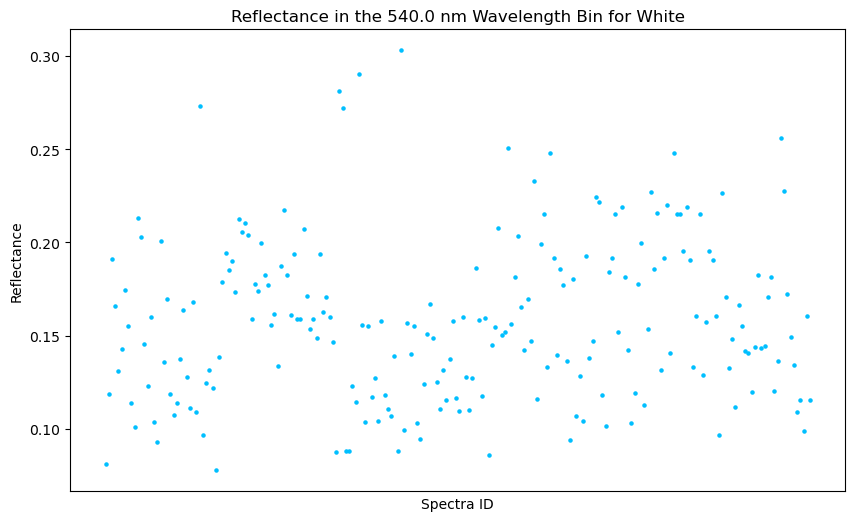

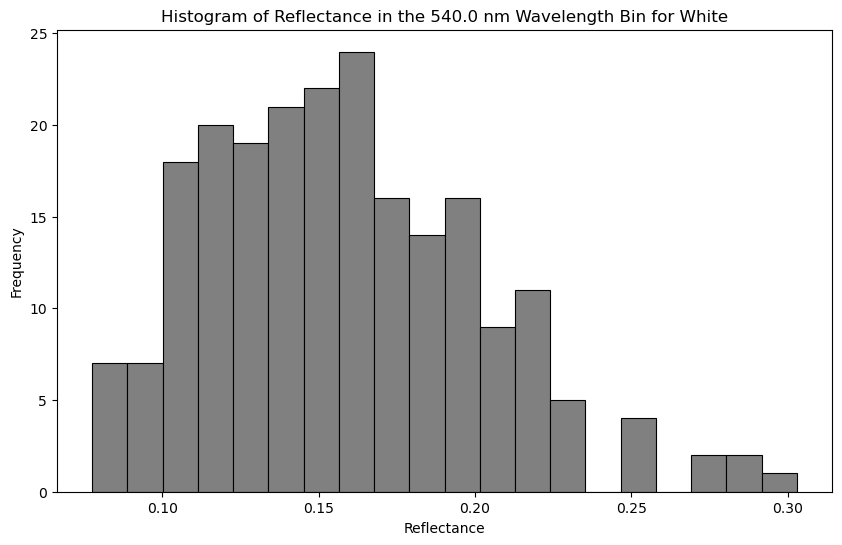

(array([64]),)
218
(218,)


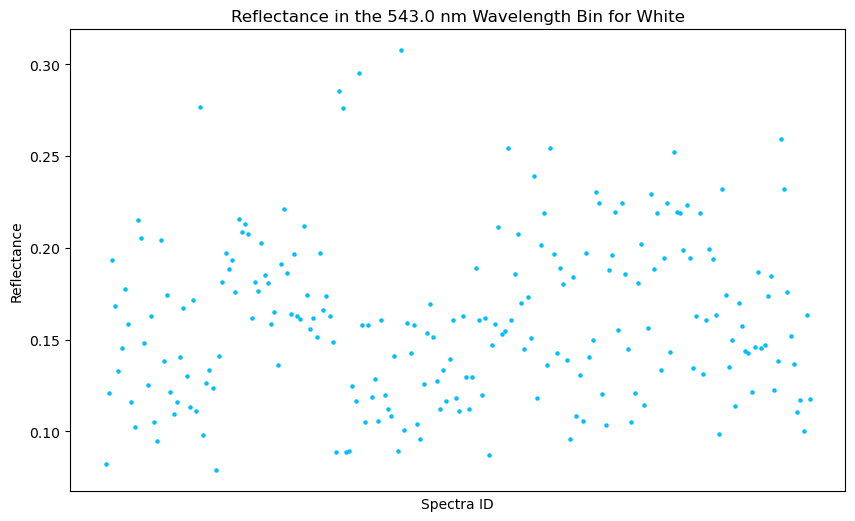

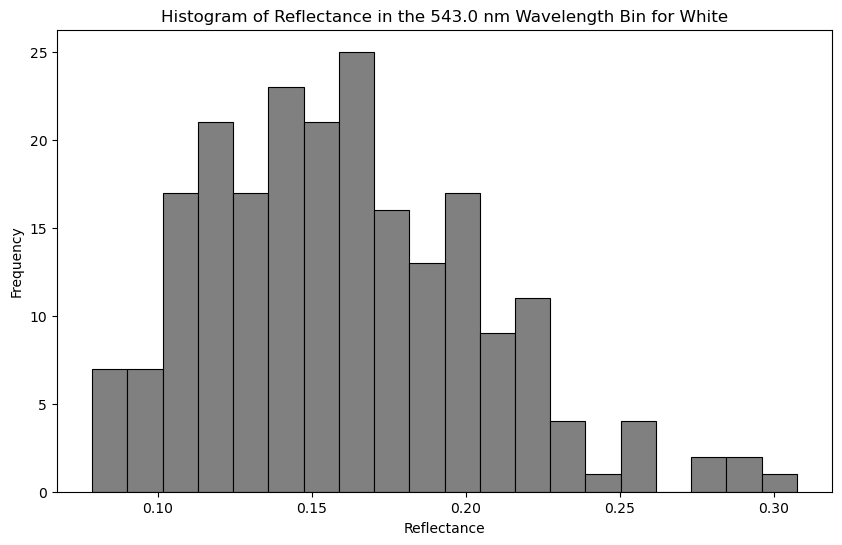

(array([103]),)
218
(218,)


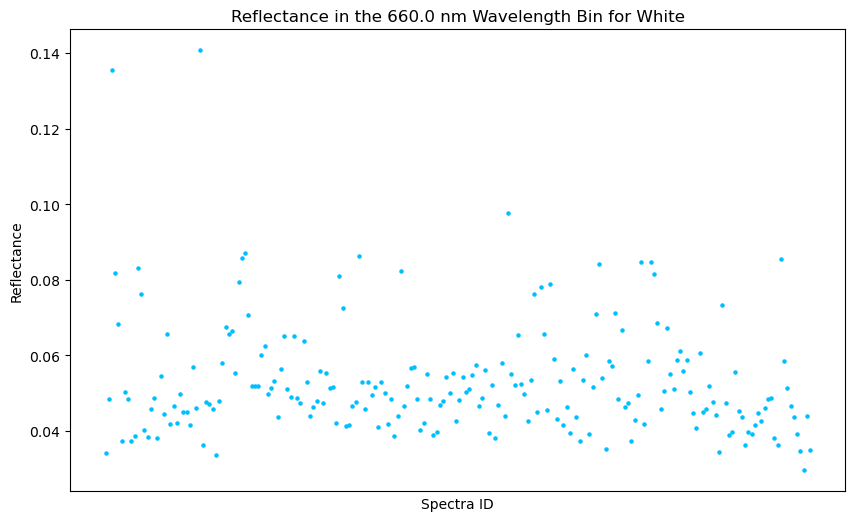

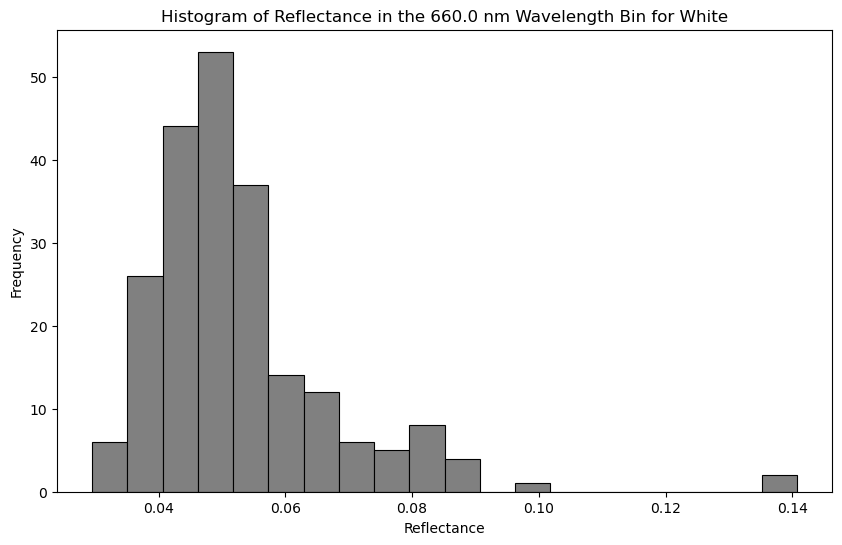

(array([104]),)
218
(218,)


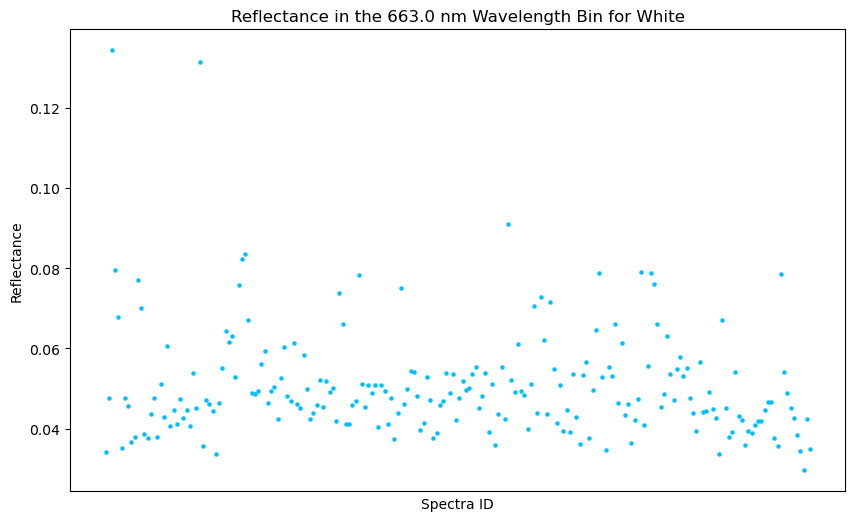

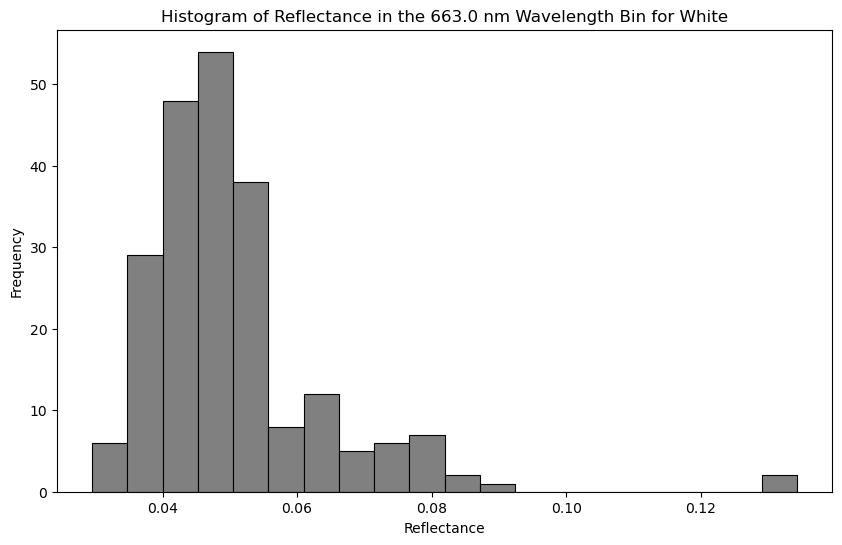

(array([105]),)
218
(218,)


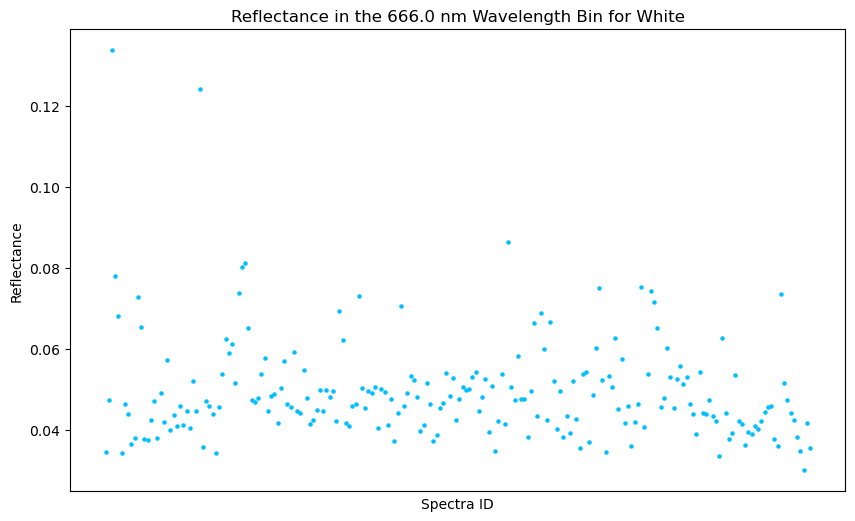

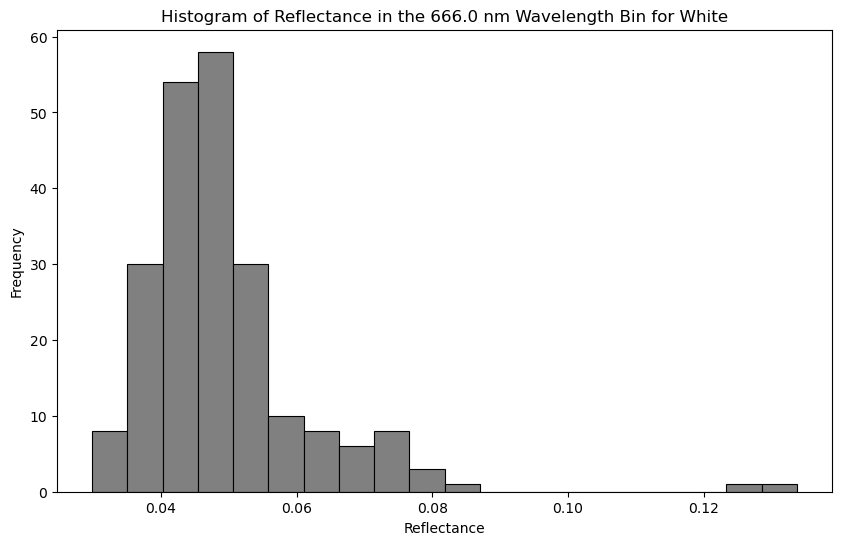

(array([106]),)
218
(218,)


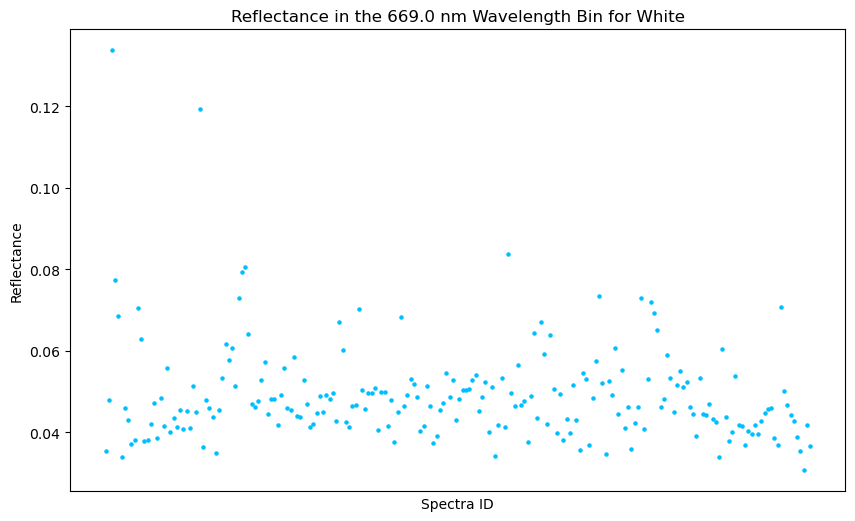

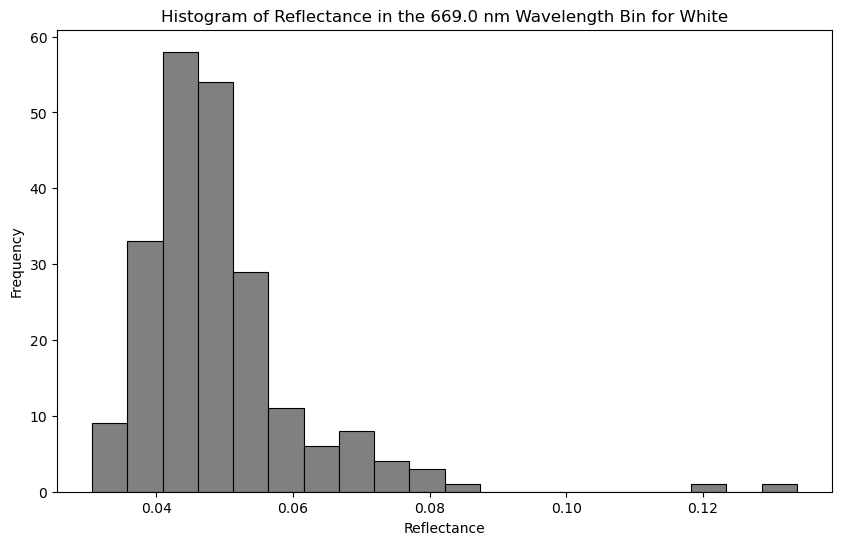

(array([107]),)
218
(218,)


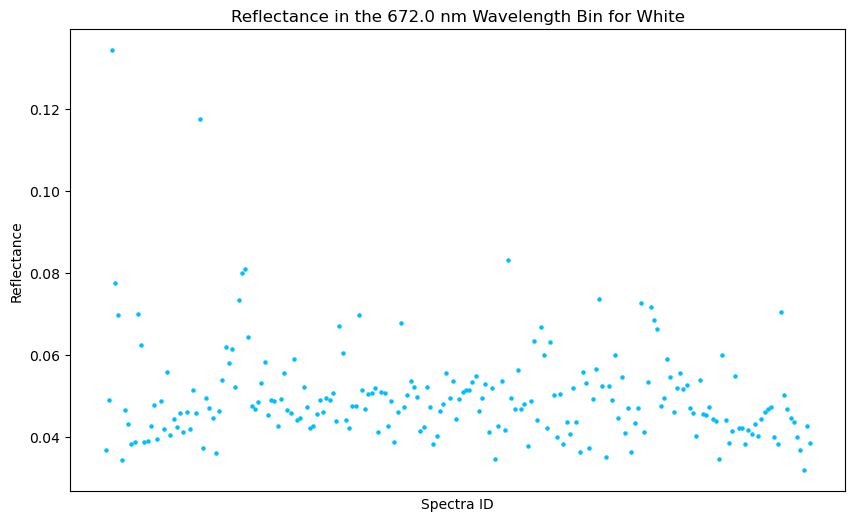

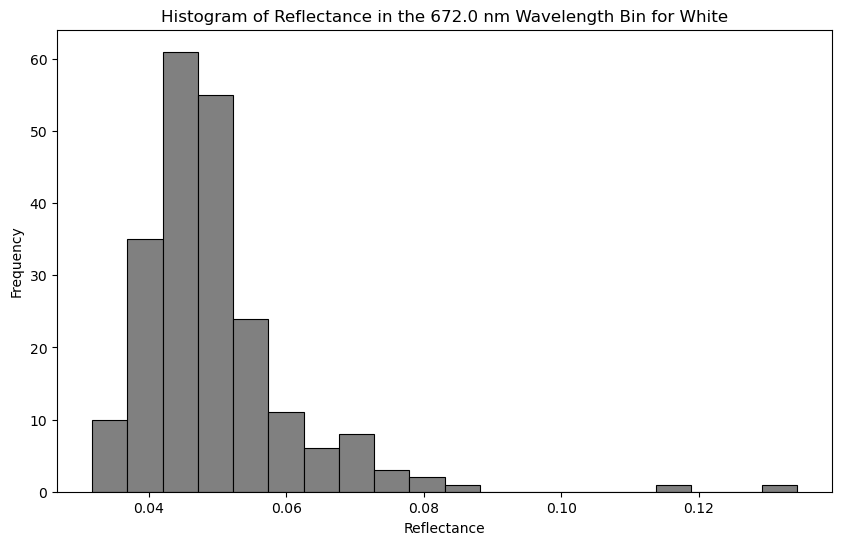

(array([108]),)
218
(218,)


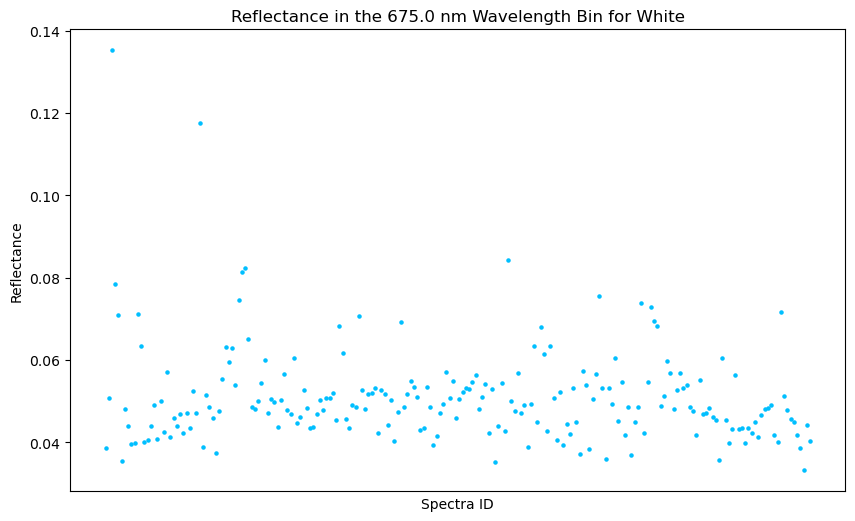

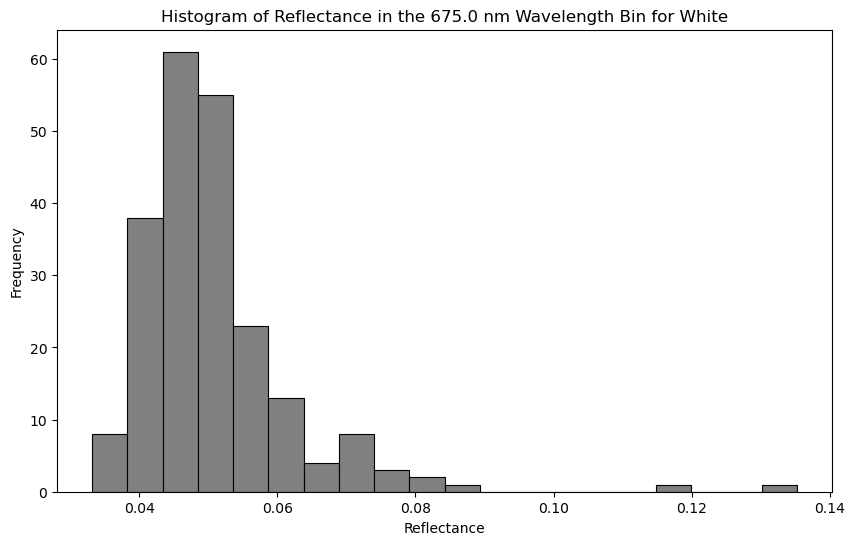

(array([109]),)
218
(218,)


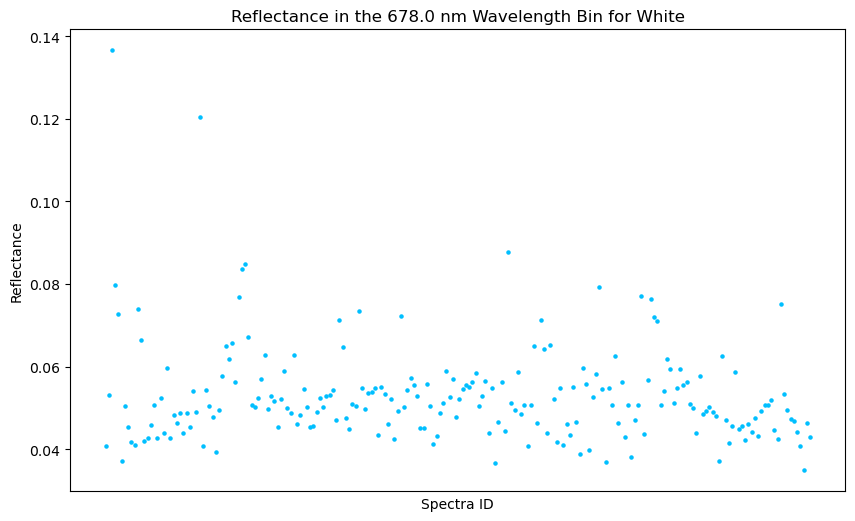

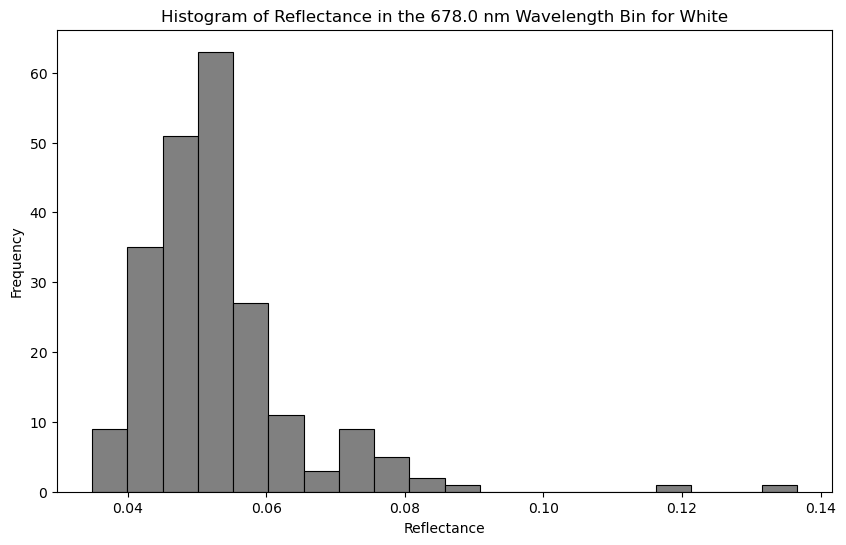

(array([110]),)
218
(218,)


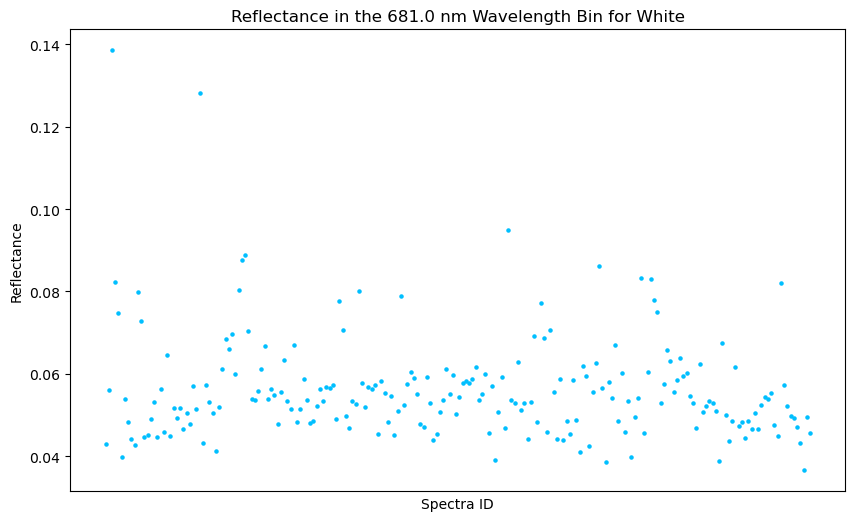

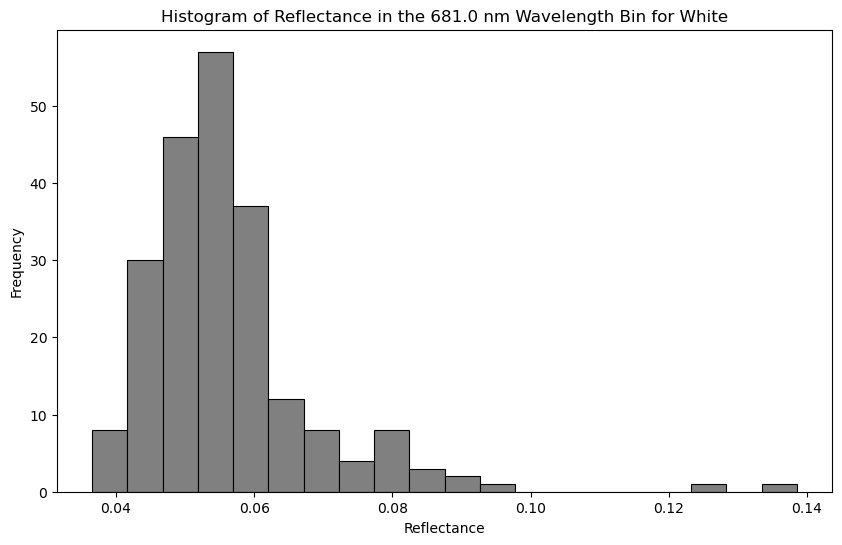

(array([120]),)
218
(218,)


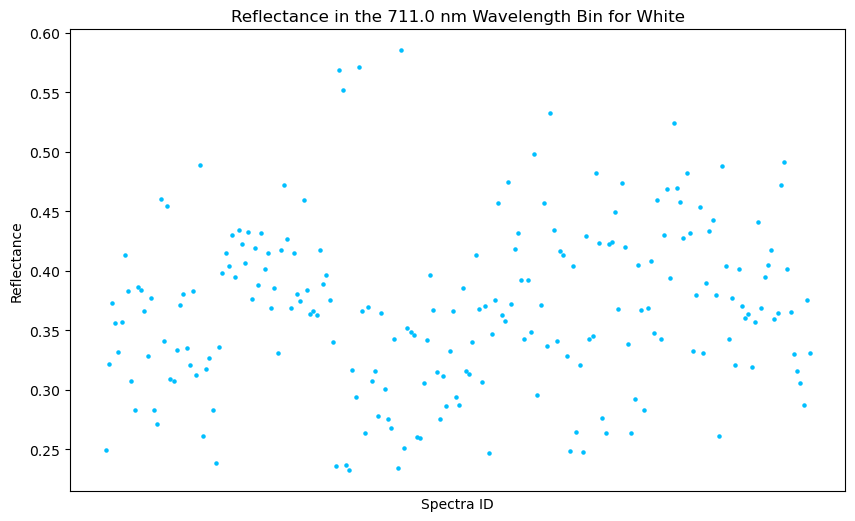

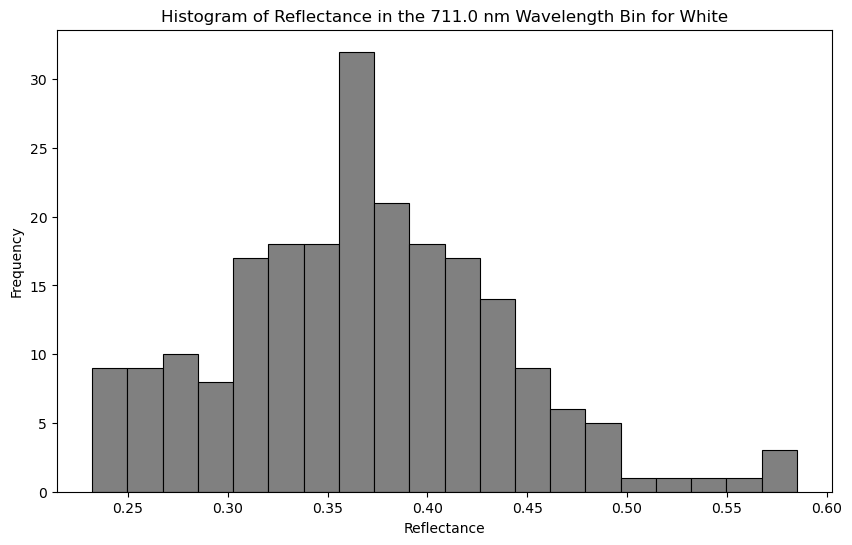

(array([121]),)
218
(218,)


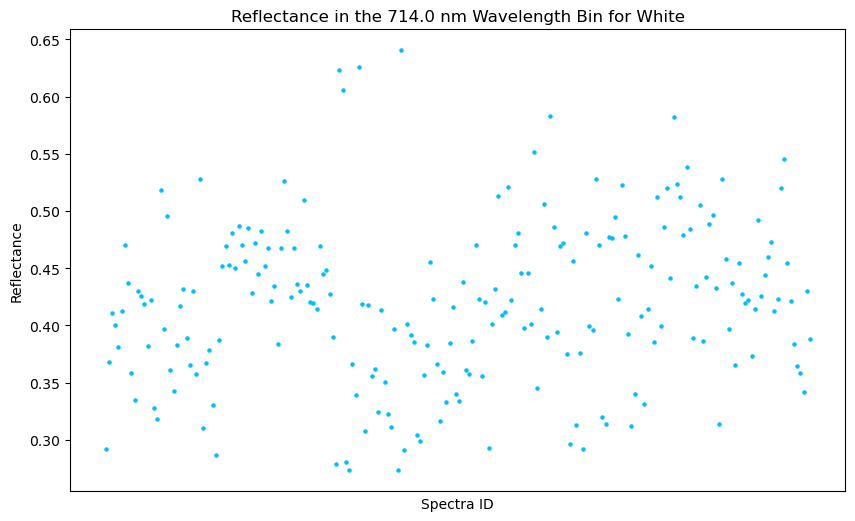

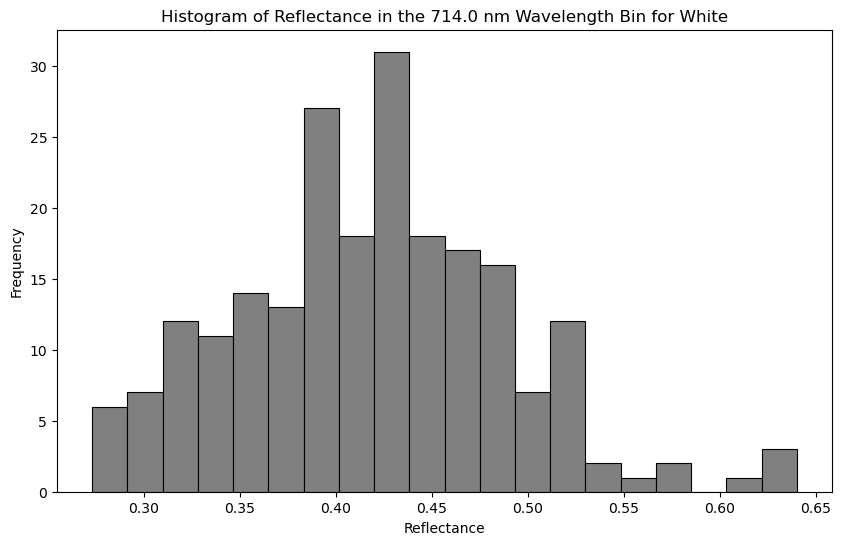

(array([124]),)
218
(218,)


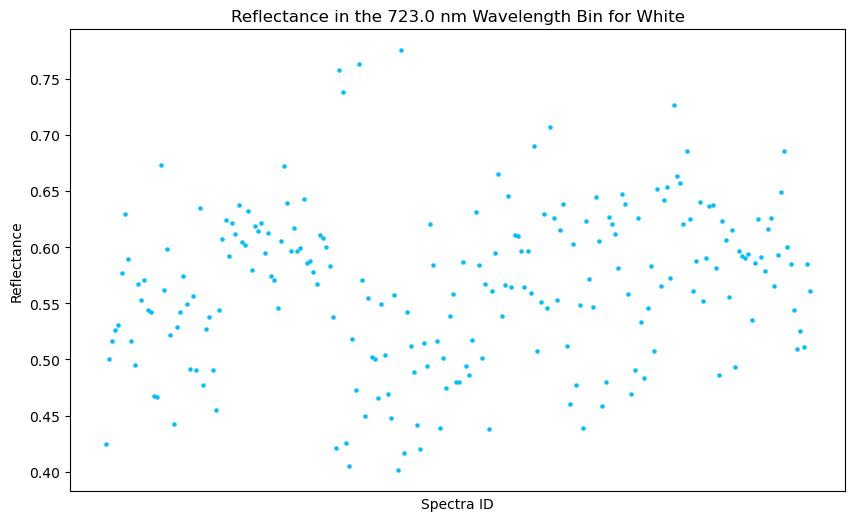

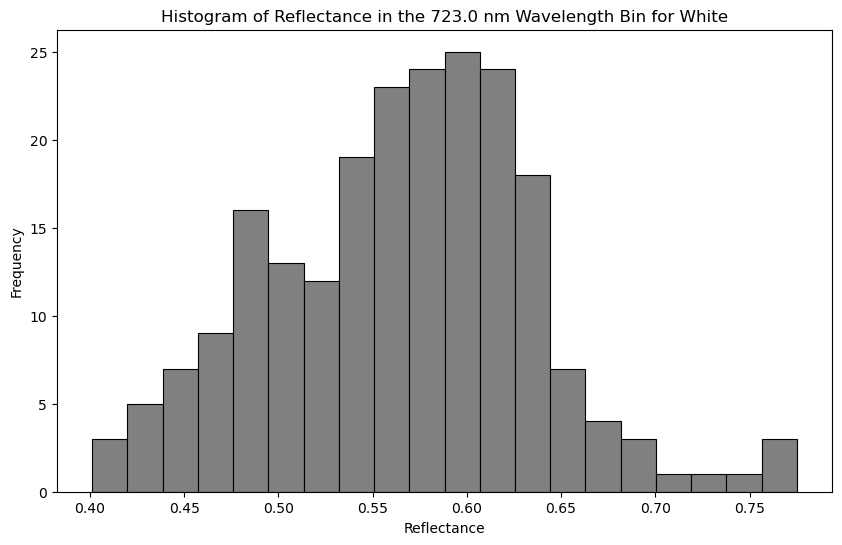

(array([125]),)
218
(218,)


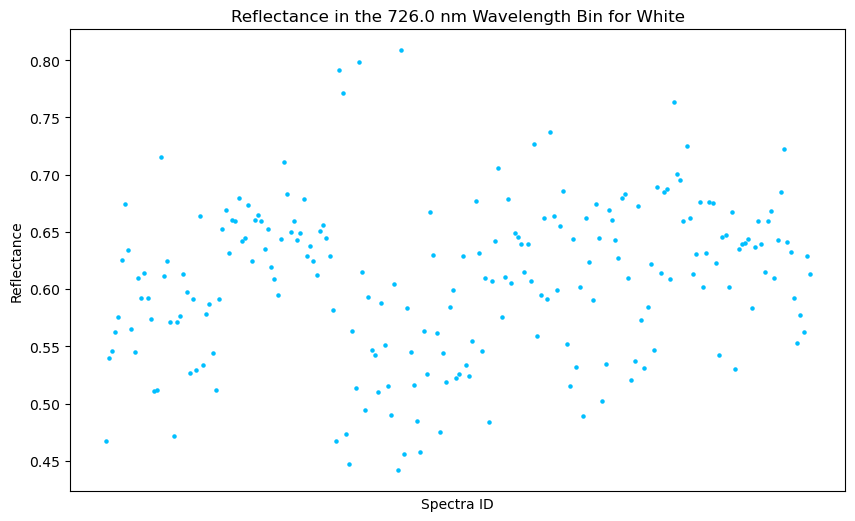

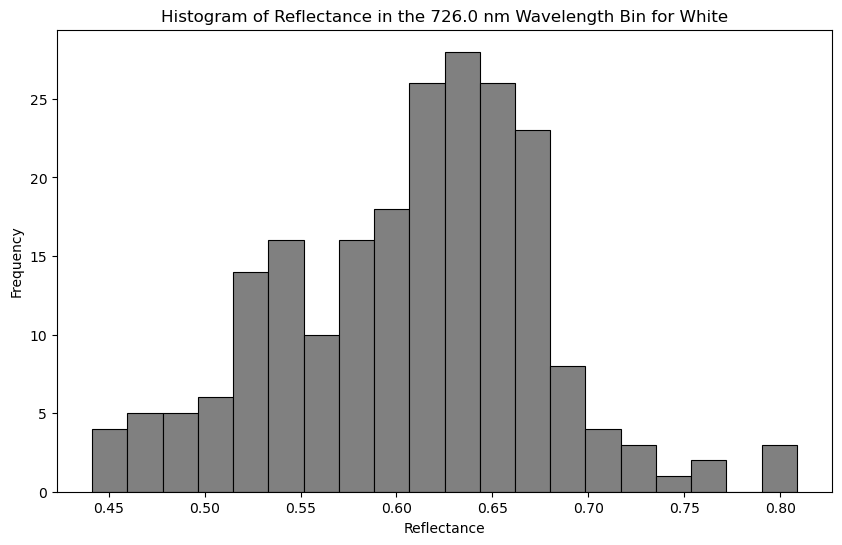

In [108]:
for index in specific_white_indices:
    print(index)
    reflectance = binned_white[:,index]
    current_bin = wavelength_bins[index]
    reflectance = reflectance[:,0,0]
    print(np.size(reflectance))
    print(np.shape(reflectance))

    plt.figure(figsize = (10,6))
    plt.scatter(white_spectra_id, reflectance, color = 'deepskyblue', s = 5)
    plt.ylabel('Reflectance')
    plt.xlabel('Spectra ID')
    plt.xticks([])
    plt.title(f'Reflectance in the {current_bin[0]} nm Wavelength Bin for White')
    plt.savefig(f'Reflectance_in_the_{current_bin[0]}_nm_Wavelength_Bin_for_white.png', bbox_inches = 'tight', dpi = 1000)

    plt.figure(figsize = (10,6))
    plt.hist(reflectance, bins = 20, color = 'grey',edgecolor = 'black', linewidth = 0.8 )
    plt.ylabel('Frequency')
    plt.xlabel('Reflectance')
    plt.title(f'Histogram of Reflectance in the {current_bin[0]} nm Wavelength Bin for White')
    plt.savefig(f'Reflectance_in_the_{current_bin[0]}_nm_Wavelength_Bin_for_white_histogram.png', bbox_inches = 'tight', dpi = 1000)

    plt.show()

(array([63]),)
218
(218,)
540.0 nm Mean Reflectance = 0.15766396450458714
540.0 nm Standard Dev = 0.04312675069021856
1 Sigma range = 0.15766396450458714 ± 0.04312675069021856
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 148 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 67.88990825688074


2 Sigma range = 0.15766396450458714 ± 0.08625350138043712
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 209 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 95.87155963302753


3 Sigma range = 0.15766396450458714 ± 0.12938025207065568
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 540.0 nm = 95.87155963302753

Percentage of background which also meet criteria = 91.37931034482759
Purity at 540.0 

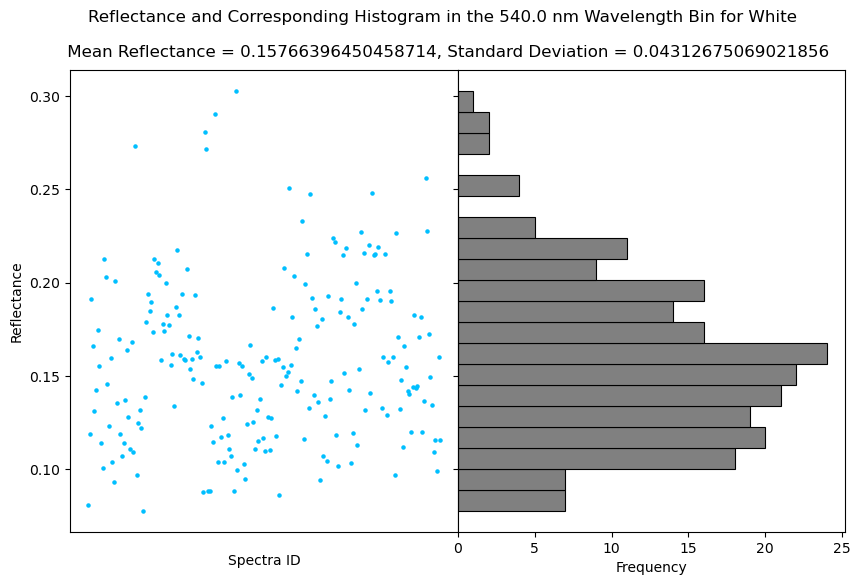

(array([64]),)
218
(218,)
543.0 nm Mean Reflectance = 0.16044056248470948
543.0 nm Standard Dev = 0.043934312272995185
1 Sigma range = 0.16044056248470948 ± 0.043934312272995185
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 147 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 67.43119266055045


2 Sigma range = 0.16044056248470948 ± 0.08786862454599037
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 209 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 95.87155963302753


3 Sigma range = 0.16044056248470948 ± 0.13180293681898556
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 543.0 nm = 95.87155963302753

Percentage of background which also meet criteria = 91.37931034482759
Purity at 543.

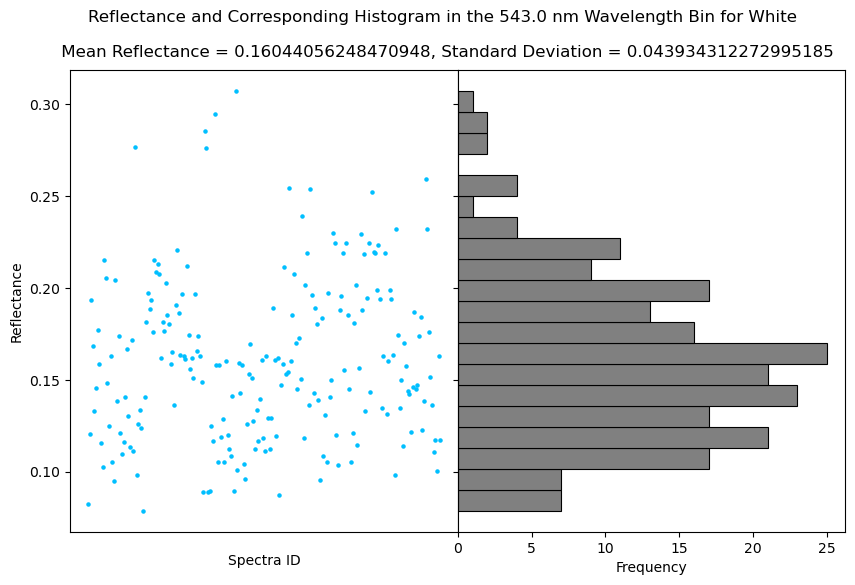

(array([103]),)
218
(218,)
660.0 nm Mean Reflectance = 0.05291885292813455
660.0 nm Standard Dev = 0.01497228156245295
1 Sigma range = 0.05291885292813455 ± 0.01497228156245295
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 177 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 81.19266055045871


2 Sigma range = 0.05291885292813455 ± 0.0299445631249059
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 207 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 94.95412844036697


3 Sigma range = 0.05291885292813455 ± 0.04491684468735885
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 660.0 nm = 94.95412844036697

Percentage of background which also meet criteria = 84.82758620689656
Purity at 660.0 

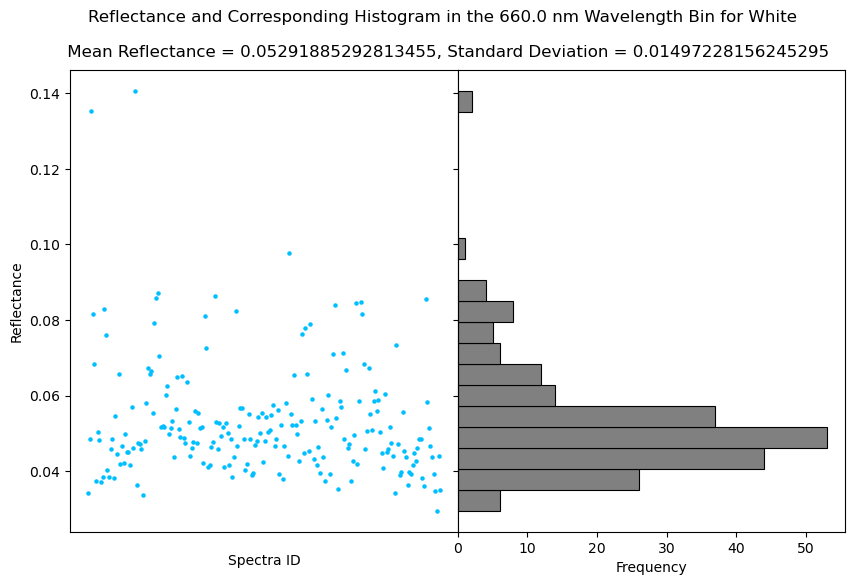

(array([104]),)
218
(218,)
663.0 nm Mean Reflectance = 0.05064795519877676
663.0 nm Standard Dev = 0.013662600515991573
1 Sigma range = 0.05064795519877676 ± 0.013662600515991573
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 176 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 80.73394495412845


2 Sigma range = 0.05064795519877676 ± 0.027325201031983146
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 207 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 94.95412844036697


3 Sigma range = 0.05064795519877676 ± 0.04098780154797472
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 663.0 nm = 94.95412844036697

Percentage of background which also meet criteria = 83.27586206896552
Purity at 66

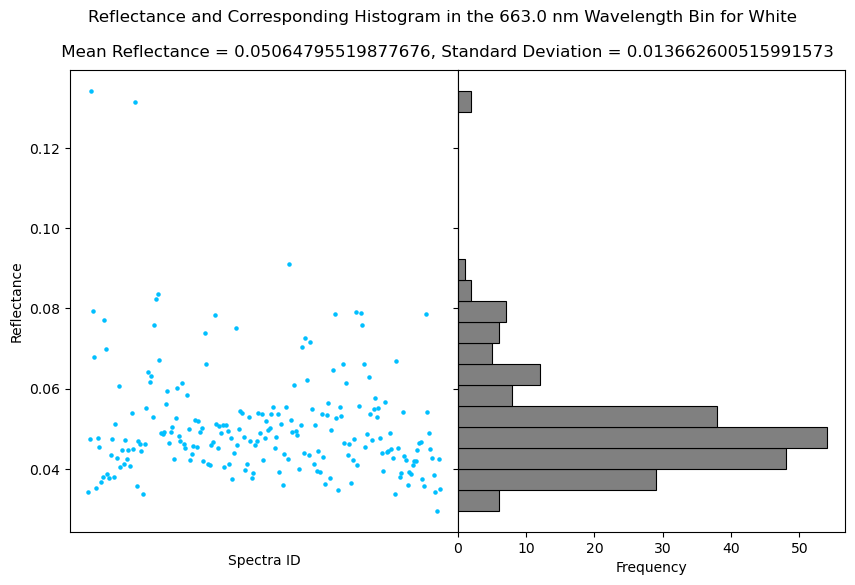

(array([105]),)
218
(218,)
666.0 nm Mean Reflectance = 0.0493798727293578
666.0 nm Standard Dev = 0.012711773343365316
1 Sigma range = 0.0493798727293578 ± 0.012711773343365316
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 177 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 81.19266055045871


2 Sigma range = 0.0493798727293578 ± 0.025423546686730632
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 210 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 96.3302752293578


3 Sigma range = 0.0493798727293578 ± 0.03813532003009595
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 666.0 nm = 96.3302752293578

Percentage of background which also meet criteria = 81.55172413793103
Purity at 666.0 nm

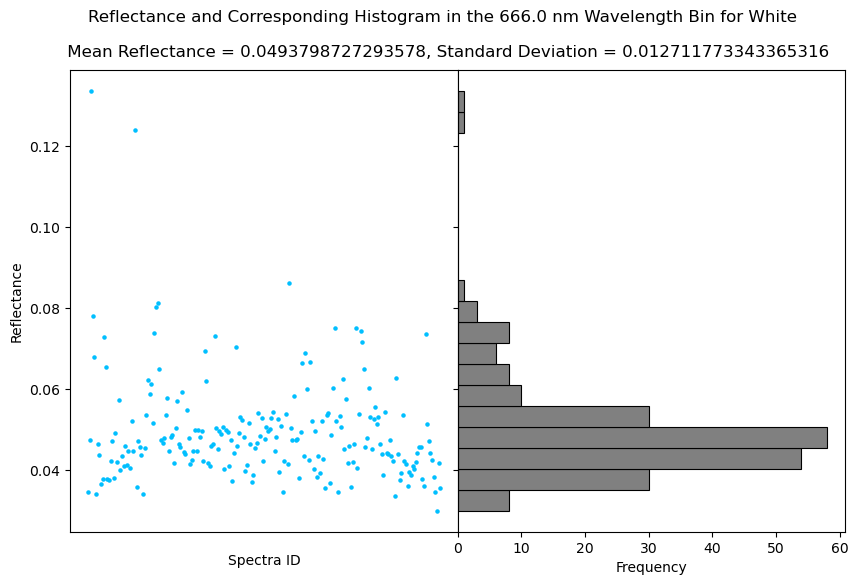

(array([106]),)
218
(218,)
669.0 nm Mean Reflectance = 0.04911976369571865
669.0 nm Standard Dev = 0.012135990144796705
1 Sigma range = 0.04911976369571865 ± 0.012135990144796705
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 179 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 82.11009174311926


2 Sigma range = 0.04911976369571865 ± 0.02427198028959341
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 212 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 97.24770642201835


3 Sigma range = 0.04911976369571865 ± 0.03640797043439012
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 669.0 nm = 97.24770642201835

Percentage of background which also meet criteria = 80.51724137931035
Purity at 669

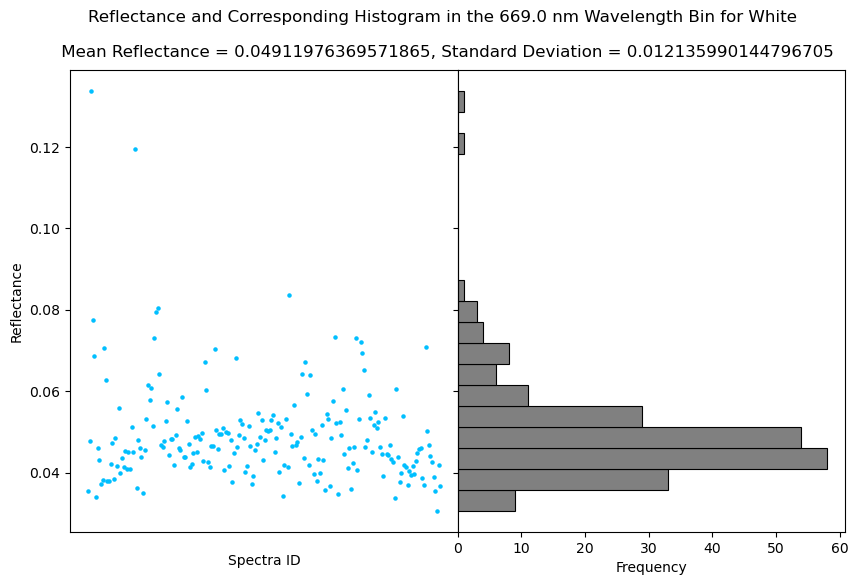

(array([107]),)
218
(218,)
672.0 nm Mean Reflectance = 0.04971396832721712
672.0 nm Standard Dev = 0.011847676015399676
1 Sigma range = 0.04971396832721712 ± 0.011847676015399676
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 181 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 83.02752293577981


2 Sigma range = 0.04971396832721712 ± 0.023695352030799352
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 210 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 96.3302752293578


3 Sigma range = 0.04971396832721712 ± 0.03554302804619903
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 672.0 nm = 96.3302752293578

Percentage of background which also meet criteria = 79.65517241379311
Purity at 672.

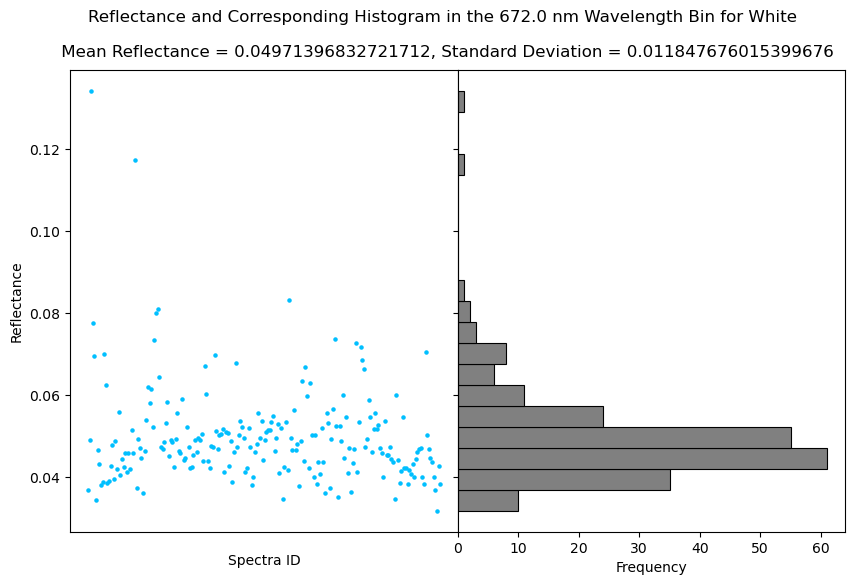

(array([108]),)
218
(218,)
675.0 nm Mean Reflectance = 0.051015573032110094
675.0 nm Standard Dev = 0.011775008898549655
1 Sigma range = 0.051015573032110094 ± 0.011775008898549655
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 180 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 82.56880733944955


2 Sigma range = 0.051015573032110094 ± 0.02355001779709931
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 210 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 96.3302752293578


3 Sigma range = 0.051015573032110094 ± 0.035325026695648964
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 675.0 nm = 96.3302752293578

Percentage of background which also meet criteria = 79.13793103448276
Purity at 

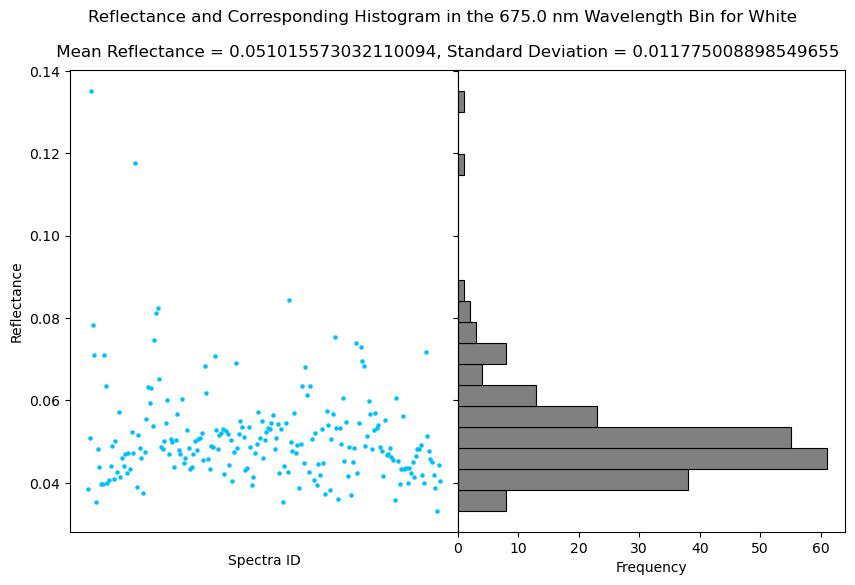

(array([109]),)
218
(218,)
678.0 nm Mean Reflectance = 0.053075480314984706
678.0 nm Standard Dev = 0.011972979479268925
1 Sigma range = 0.053075480314984706 ± 0.011972979479268925
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 179 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 82.11009174311926


2 Sigma range = 0.053075480314984706 ± 0.02394595895853785
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 210 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 96.3302752293578


3 Sigma range = 0.053075480314984706 ± 0.035918938437806774
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 678.0 nm = 96.3302752293578

Percentage of background which also meet criteria = 78.10344827586206
Purity at 

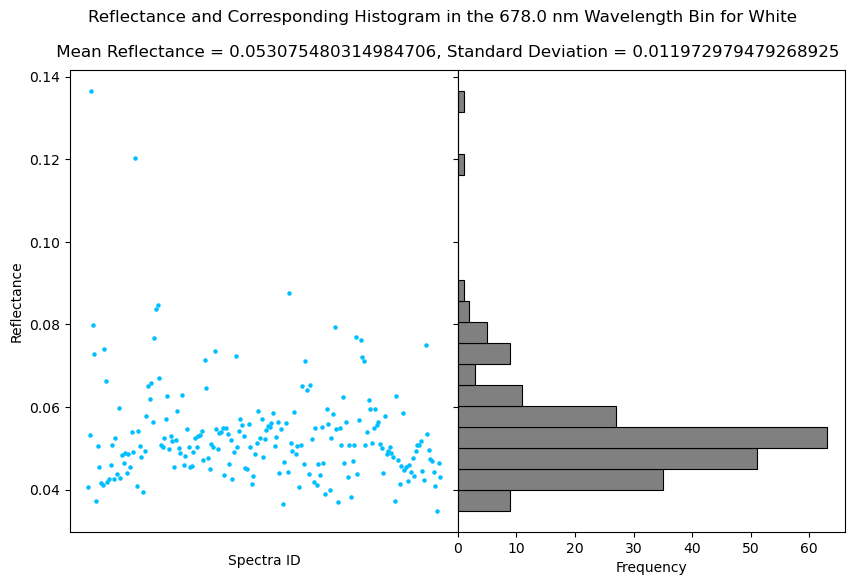

(array([110]),)
218
(218,)
681.0 nm Mean Reflectance = 0.056233709574923546
681.0 nm Standard Dev = 0.012733817037551281
1 Sigma range = 0.056233709574923546 ± 0.012733817037551281
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 180 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 82.56880733944955


2 Sigma range = 0.056233709574923546 ± 0.025467634075102562
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 208 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 95.41284403669725


3 Sigma range = 0.056233709574923546 ± 0.03820145111265384
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 215 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 98.62385321100918


Efficiency at 681.0 nm = 95.41284403669725

Percentage of background which also meet criteria = 78.62068965517241
Purity a

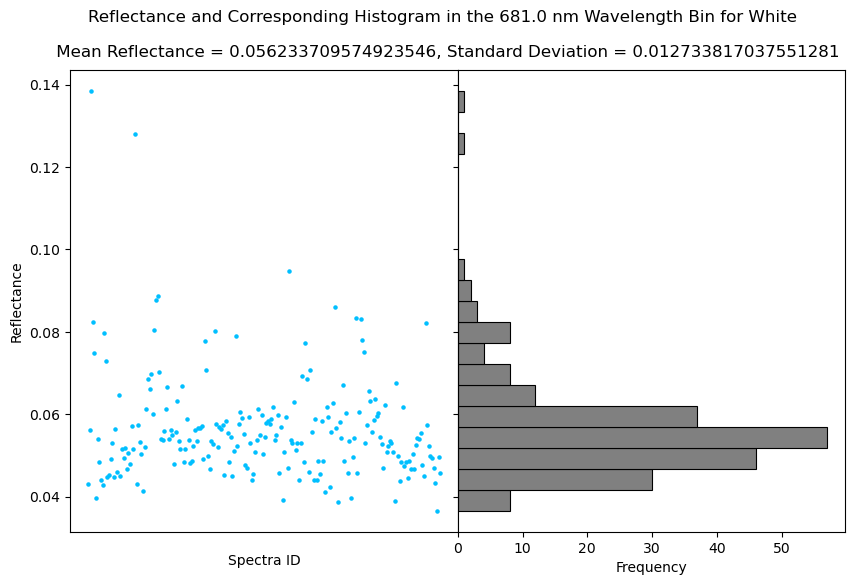

(array([120]),)
218
(218,)
711.0 nm Mean Reflectance = 0.36838107587614677
711.0 nm Standard Dev = 0.06873247455285836
1 Sigma range = 0.36838107587614677 ± 0.06873247455285836
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 154 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 70.64220183486239


2 Sigma range = 0.36838107587614677 ± 0.13746494910571672
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 212 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 97.24770642201835


3 Sigma range = 0.36838107587614677 ± 0.20619742365857507
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 217 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.54128440366972


Efficiency at 711.0 nm = 97.24770642201835

Percentage of background which also meet criteria = 87.06896551724138
Purity at 711.0

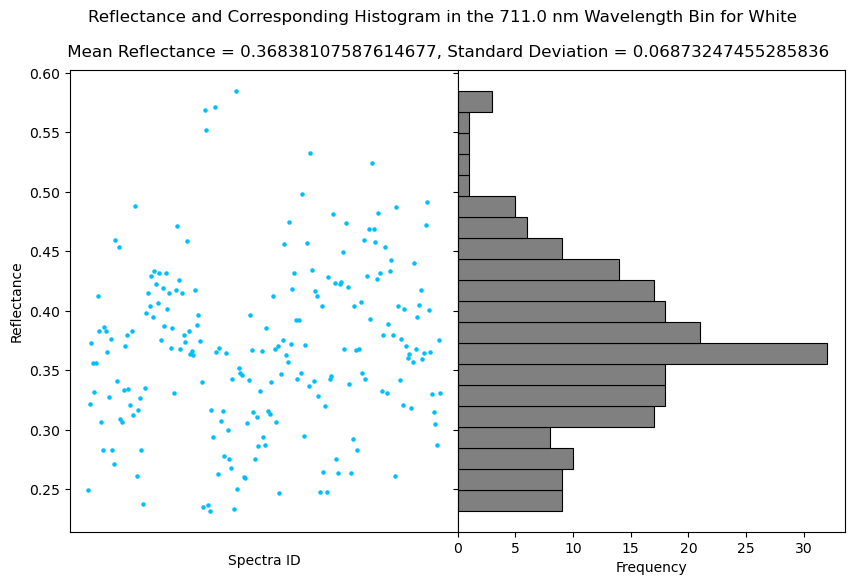

(array([121]),)
218
(218,)
714.0 nm Mean Reflectance = 0.4190863615076453
714.0 nm Standard Dev = 0.07066318635492458
1 Sigma range = 0.4190863615076453 ± 0.07066318635492458
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 153 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 70.18348623853211


2 Sigma range = 0.4190863615076453 ± 0.14132637270984916
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 210 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 96.3302752293578


3 Sigma range = 0.4190863615076453 ± 0.21198955906477374
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 217 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.54128440366972


Efficiency at 714.0 nm = 96.3302752293578

Percentage of background which also meet criteria = 87.06896551724138
Purity at 714.0 nm = 

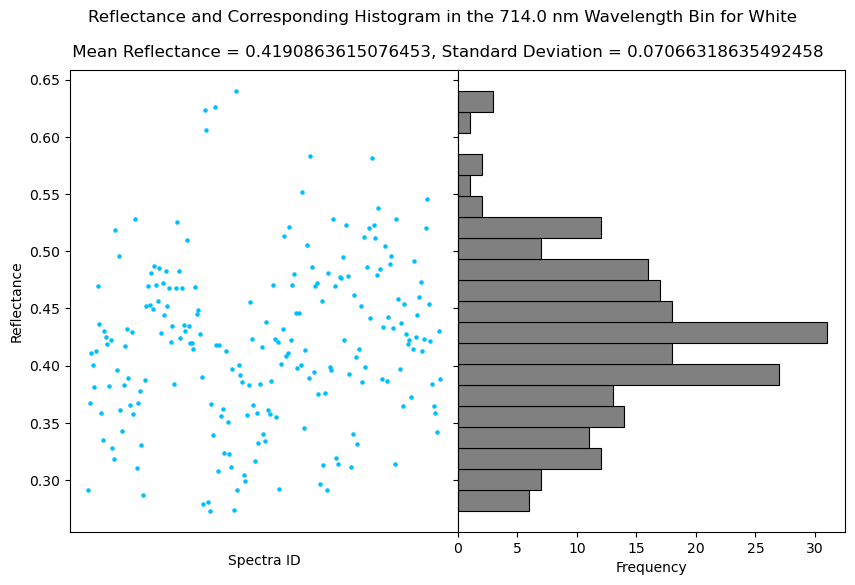

(array([124]),)
218
(218,)
723.0 nm Mean Reflectance = 0.5655733345932721
723.0 nm Standard Dev = 0.06966935413948029
1 Sigma range = 0.5655733345932721 ± 0.06966935413948029
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 148 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 67.88990825688074


2 Sigma range = 0.5655733345932721 ± 0.13933870827896058
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 205 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 94.03669724770643


3 Sigma range = 0.5655733345932721 ± 0.2090080624184409
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 217 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.54128440366972


Efficiency at 723.0 nm = 94.03669724770643

Percentage of background which also meet criteria = 90.86206896551724
Purity at 723.0 nm =

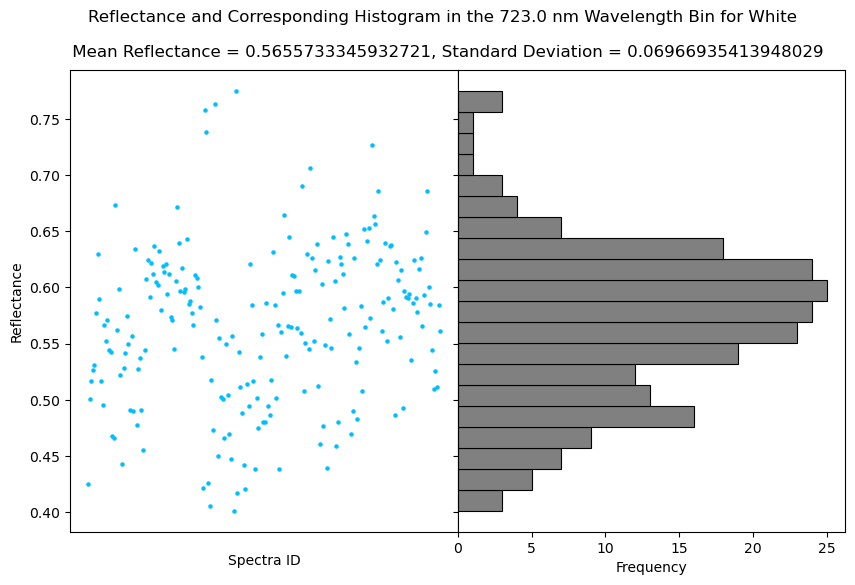

(array([125]),)
218
(218,)
726.0 nm Mean Reflectance = 0.6082598514709481
726.0 nm Standard Dev = 0.06798959924673353
1 Sigma range = 0.6082598514709481 ± 0.06798959924673353
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 152 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 69.72477064220183


2 Sigma range = 0.6082598514709481 ± 0.13597919849346707
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 206 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 94.4954128440367


3 Sigma range = 0.6082598514709481 ± 0.2039687977402006
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 218 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 100.0


Efficiency at 726.0 nm = 94.4954128440367

Percentage of background which also meet criteria = 93.44827586206897
Purity at 726.0 nm = 27.5401069518

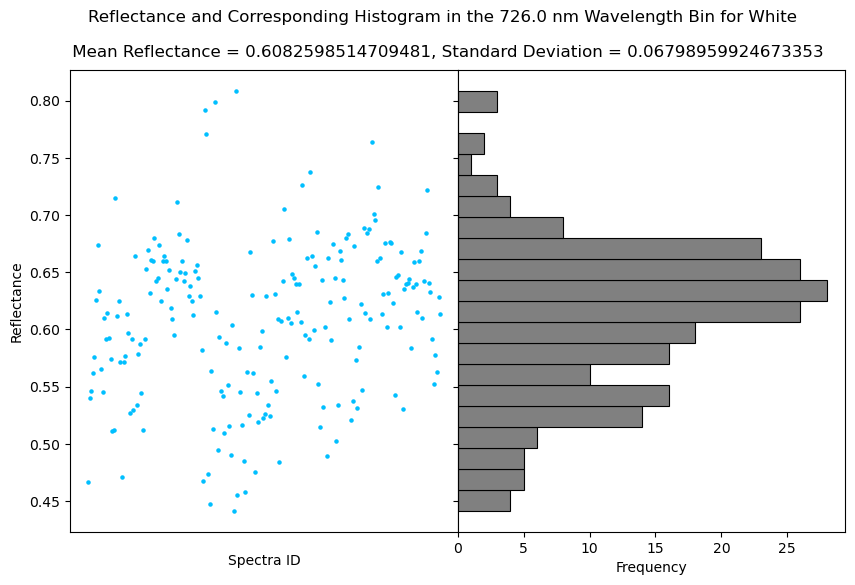

In [109]:
for index in specific_white_indices:
    print(index)
    reflectance = binned_white[:,index]
    current_bin = wavelength_bins[index]
    reflectance = reflectance[:,0,0]
    print(np.size(reflectance))
    print(np.shape(reflectance))

    mean_ref = np.mean(reflectance)
    stdev_ref = np.std(reflectance)

    print(f'{current_bin[0]} nm Mean Reflectance = {mean_ref}')
    print(f'{current_bin[0]} nm Standard Dev = {stdev_ref}')

    meet_crit_1stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref):
            if ref >= (mean_ref - stdev_ref):
                meet_crit_1stdev.append(ref)

    num_1_stdev = len(meet_crit_1stdev)
    percentage_1_stdev = num_1_stdev/num_white * 100

    meet_crit_2stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                meet_crit_2stdev.append(ref)

    num_2_stdev = len(meet_crit_2stdev)
    percentage_2_stdev = num_2_stdev/num_white * 100

    meet_crit_3stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref * 3):
            if ref >= (mean_ref - stdev_ref * 3):
                meet_crit_3stdev.append(ref)

    num_3_stdev = len(meet_crit_3stdev)
    percentage_3_stdev = num_3_stdev/num_white * 100
    
    efficiency = percentage_2_stdev

    red_ref = binned_red[:,index]

    mean_ref_red = np.mean(red_ref)
    st_dev_ref_red = np.std(red_ref)

    red_meet_crit = []
    for ref in red_ref:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                red_meet_crit.append(ref)

    black_ref = binned_black[:,index]

    mean_ref_black = np.mean(black_ref)
    stdev_ref_black = np.std(black_ref)

    black_meet_crit = []
    for ref in black_ref:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                black_meet_crit.append(ref)

    # % of background which match the criteria for black at 705 nm
    total_bgd = len(red_meet_crit) + len(black_meet_crit)
    bgd_percentage_meet_crit = total_bgd/(num_red + num_black) * 100
    
    total_meet_crit = num_2_stdev + total_bgd

    purity = num_2_stdev / total_meet_crit * 100

    print(f'1 Sigma range = {mean_ref} ± {stdev_ref}')
    print('Expected % of White Mangroves within 1 sigma = 68%')
    print(f'Number of White Mangroves within 1 sigma = {num_1_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 1 sigma = {percentage_1_stdev}')
    print('\n')
    print(f'2 Sigma range = {mean_ref} ± {stdev_ref*2}')
    print('Expected % of White Mangroves within 2 sigma = 95%')
    print(f'Number of White Mangroves within 2 sigma = {num_2_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 2 sigma = {percentage_2_stdev}')
    print('\n')
    print(f'3 Sigma range = {mean_ref} ± {stdev_ref*3}')
    print('Expected % of White Mangroves within 3 sigma = 99.7%')
    print(f'Number of White Mangroves within 3 sigma = {num_3_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 3 sigma = {percentage_3_stdev}')
    print('\n')
    print(f'Efficiency at {current_bin[0]} nm = {efficiency}\n')
    print(f'Percentage of background which also meet criteria = {bgd_percentage_meet_crit}')
    print(f'Purity at {current_bin[0]} nm = {purity}')

    fig, axs = plt.subplots(1,2,sharey = True, figsize = (10,6))
    
    axs[0].scatter(white_spectra_id, reflectance, color = 'deepskyblue', s = 5)
    axs[0].set_ylabel('Reflectance')
    axs[0].set_xlabel('\nSpectra ID')
    axs[0].set_xticks([])

    axs[1].hist(reflectance, bins = 20, color = 'grey',edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal')
    axs[1].set_xlabel('Frequency')


    fig.suptitle(f'Reflectance and Corresponding Histogram in the {current_bin[0]} nm Wavelength Bin for White \n\n Mean Reflectance = {mean_ref}, Standard Deviation = {stdev_ref}')
    
    plt.subplots_adjust(wspace = 0)

    plt.savefig(f'Reflectance_and_histogram_for_{current_bin[0]}_nm_Wavelength_Bin_for_white.png', bbox_inches = 'tight', dpi = 1000)

    plt.show()

In [110]:
print(binned_white[specific_white_indices[0:2]])
print(np.shape(binned_white[specific_white_indices[0:2]]))

[[[[0.07010275 0.0608352  0.05606076 0.05403388 0.0517055  0.04929537
    0.05064335 0.0492449  0.04814095 0.04621313 0.04507479 0.04370379
    0.04177146 0.04185394 0.03992341 0.03942819 0.03821537 0.03737883
    0.03631277 0.03598491 0.03564683 0.03593983 0.03603853 0.03614454
    0.03639234 0.0366961  0.03730299 0.0376187  0.03744728 0.03800901
    0.03834391 0.03869304 0.03918024 0.03969097 0.03993035 0.04053442
    0.04060531 0.04067539 0.04093725 0.04095029 0.04093928 0.04089139
    0.04056749 0.04065222 0.04095946 0.04146356 0.04223095 0.04351975
    0.04515721 0.04741942 0.05051126 0.05467925 0.06037208 0.06750595
    0.07672662 0.08751286 0.09948337 0.11193145 0.12349045 0.13334813
    0.14088563 0.14662472 0.15054318 0.15345904 0.15596905 0.15829776
    0.15989991 0.15968774 0.15710484 0.15254454 0.14700091 0.1404274
    0.13263878 0.12408483 0.11617455 0.10952994 0.10422532 0.09995392
    0.09666469 0.09422142 0.0924818  0.09113786 0.0900292  0.08834876
    0.08581288 0.0825

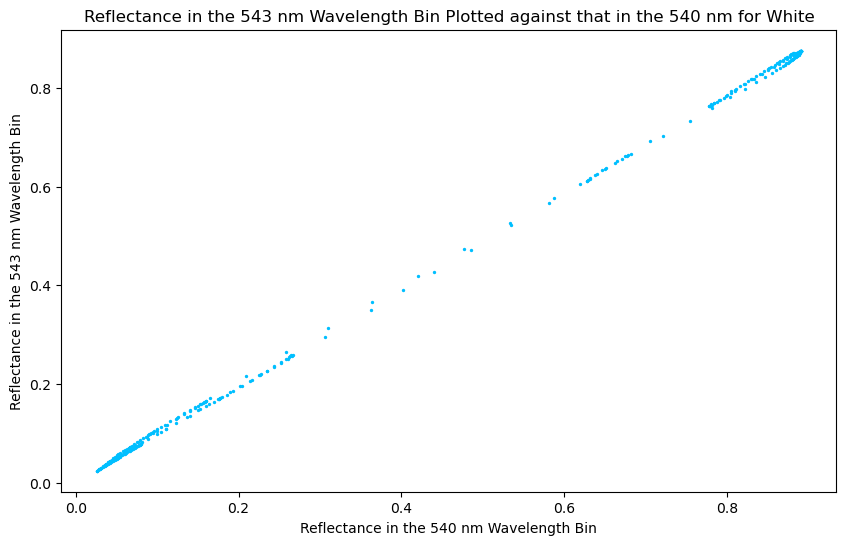

In [111]:
white_540 = binned_white[specific_white_indices[0]]
white_543 = binned_white[specific_white_indices[1]]

plt.figure(figsize=(10,6))
plt.scatter(white_540, white_543, s = 2, color = 'deepskyblue')
plt.xlabel("Reflectance in the 540 nm Wavelength Bin")
plt.ylabel("Reflectance in the 543 nm Wavelength Bin")
plt.title("Reflectance in the 543 nm Wavelength Bin Plotted against that in the 540 nm for White")
plt.savefig("Reflectance_543_vs_540_white.png", bbox_inches = 'tight', dpi = 1000)


plt.show()

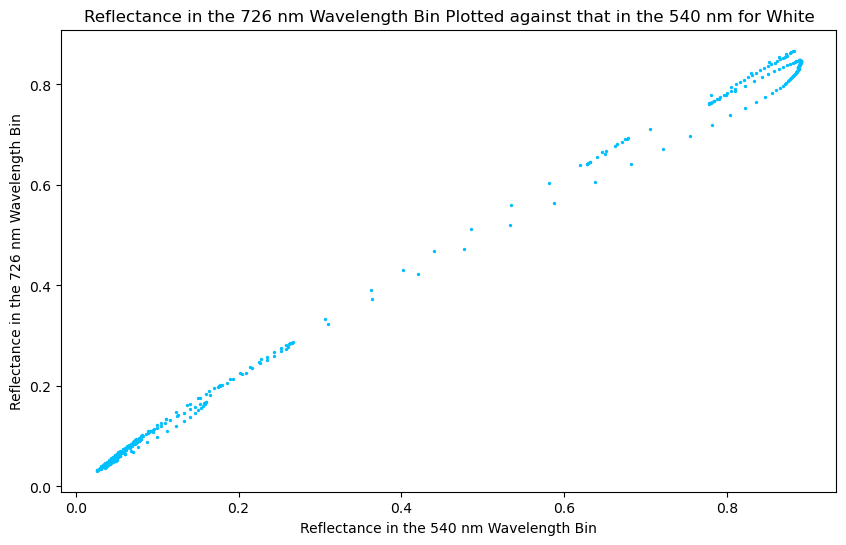

In [112]:
white_540 = binned_white[specific_white_indices[0]]
white_726 = binned_white[specific_white_indices[-1]]

plt.figure(figsize=(10,6))
plt.scatter(white_540, white_726, s = 2, color = 'deepskyblue')
plt.xlabel("Reflectance in the 540 nm Wavelength Bin")
plt.ylabel("Reflectance in the 726 nm Wavelength Bin")
plt.title("Reflectance in the 726 nm Wavelength Bin Plotted against that in the 540 nm for White")
plt.savefig("Reflectance_726_vs_540_white.png", bbox_inches = 'tight', dpi = 1000)


plt.show()

In [113]:
'''
refs = []
bins = []
means = []
stdevs = []

for index in specific_white_indices:
    print(index)
    reflectance = binned_white[:,index]
    current_bin = wavelength_bins[index]
    reflectance = reflectance[:,0,0]
    print(np.size(reflectance))
    print(np.shape(reflectance))

    refs.append(reflectance)
    bins.append(current_bin)

    mean_ref = np.mean(reflectance)
    stdev_ref = np.std(reflectance)

    means.append(mean_ref)
    stdevs.append(stdevs)
#print(np.shape(refs)) # (14,218) - therefore its bins x plants


meet_2_crit = []

for ref in refs:
    print(np.shape(ref))
    for i in range(0,len(bins)):
        if ref[i] <= (means[i] + stdevs[i] * 2):
            print(np.shape(ref[i]))
            if ref[i] >= (means[i] - stdevs[i] * 2):
                means.pop(means[i])
                stdevs.pop(stdevs[i])
                bins.pop(bins[i])
                for j in range(0,len(bins)):
                    if ref[j] <= (means[j] + stdevs[j] * 2):
                        if ref[j] >= (means[j] - stdevs[j] * 2):
                            meet_2_crit.append()
'''
'''
    print(f'{current_bin[0]} nm Mean Reflectance = {mean_ref}')
    print(f'{current_bin[0]} nm Standard Dev = {stdev_ref}')

    meet_crit_1stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref):
            if ref >= (mean_ref - stdev_ref):
                meet_crit_1stdev.append(ref)

    num_1_stdev = len(meet_crit_1stdev)
    percentage_1_stdev = num_1_stdev/num_white * 100

    meet_crit_2stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                meet_crit_2stdev.append(ref)

    num_2_stdev = len(meet_crit_2stdev)
    percentage_2_stdev = num_2_stdev/num_white * 100

    meet_crit_3stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref * 3):
            if ref >= (mean_ref - stdev_ref * 3):
                meet_crit_3stdev.append(ref)

    num_3_stdev = len(meet_crit_3stdev)
    percentage_3_stdev = num_3_stdev/num_white * 100
    
    efficiency = percentage_2_stdev

    red_ref = binned_red[:,index]

    mean_ref_red = np.mean(red_ref)
    st_dev_ref_red = np.std(red_ref)

    red_meet_crit = []
    for ref in red_ref:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                red_meet_crit.append(ref)

    black_ref = binned_black[:,index]

    mean_ref_black = np.mean(black_ref)
    stdev_ref_black = np.std(black_ref)

    black_meet_crit = []
    for ref in black_ref:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                black_meet_crit.append(ref)

    # % of background which match the criteria for black at 705 nm
    total_bgd = len(red_meet_crit) + len(black_meet_crit)
    bgd_percentage_meet_crit = total_bgd/(num_red + num_black) * 100
    
    total_meet_crit = num_2_stdev + total_bgd

    purity = num_2_stdev / total_meet_crit * 100

    print(f'1 Sigma range = {mean_ref} ± {stdev_ref}')
    print('Expected % of White Mangroves within 1 sigma = 68%')
    print(f'Number of White Mangroves within 1 sigma = {num_1_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 1 sigma = {percentage_1_stdev}')
    print('\n')
    print(f'2 Sigma range = {mean_ref} ± {stdev_ref*2}')
    print('Expected % of White Mangroves within 2 sigma = 95%')
    print(f'Number of White Mangroves within 2 sigma = {num_2_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 2 sigma = {percentage_2_stdev}')
    print('\n')
    print(f'3 Sigma range = {mean_ref} ± {stdev_ref*3}')
    print('Expected % of White Mangroves within 3 sigma = 99.7%')
    print(f'Number of White Mangroves within 3 sigma = {num_3_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 3 sigma = {percentage_3_stdev}')
    print('\n')
    print(f'Efficiency at {current_bin[0]} nm = {efficiency}\n')
    print(f'Percentage of background which also meet criteria = {bgd_percentage_meet_crit}')
    print(f'Purity at {current_bin[0]} nm = {purity}')

    fig, axs = plt.subplots(1,2,sharey = True, figsize = (10,6))
    
    axs[0].scatter(white_spectra_id, reflectance, color = 'deepskyblue', s = 5)
    axs[0].set_ylabel('Reflectance')
    axs[0].set_xlabel('\nSpectra ID')
    axs[0].set_xticks([])

    axs[1].hist(reflectance, bins = 20, color = 'grey',edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal')
    axs[1].set_xlabel('Frequency')


    fig.suptitle(f'Reflectance and Corresponding Histogram in the {current_bin[0]} nm Wavelength Bin for White \n\n Mean Reflectance = {mean_ref}, Standard Deviation = {stdev_ref}')
    
    plt.subplots_adjust(wspace = 0)

    plt.savefig(f'Reflectance_and_histogram_for_{current_bin[0]}_nm_Wavelength_Bin_for_white.png', bbox_inches = 'tight', dpi = 1000)

    plt.show()
'''

"\n    print(f'{current_bin[0]} nm Mean Reflectance = {mean_ref}')\n    print(f'{current_bin[0]} nm Standard Dev = {stdev_ref}')\n\n    meet_crit_1stdev = []\n    for ref in reflectance:\n        if ref <= (mean_ref + stdev_ref):\n            if ref >= (mean_ref - stdev_ref):\n                meet_crit_1stdev.append(ref)\n\n    num_1_stdev = len(meet_crit_1stdev)\n    percentage_1_stdev = num_1_stdev/num_white * 100\n\n    meet_crit_2stdev = []\n    for ref in reflectance:\n        if ref <= (mean_ref + stdev_ref * 2):\n            if ref >= (mean_ref - stdev_ref * 2):\n                meet_crit_2stdev.append(ref)\n\n    num_2_stdev = len(meet_crit_2stdev)\n    percentage_2_stdev = num_2_stdev/num_white * 100\n\n    meet_crit_3stdev = []\n    for ref in reflectance:\n        if ref <= (mean_ref + stdev_ref * 3):\n            if ref >= (mean_ref - stdev_ref * 3):\n                meet_crit_3stdev.append(ref)\n\n    num_3_stdev = len(meet_crit_3stdev)\n    percentage_3_stdev = num_3_stde

In [114]:
refs = []
bins = []
means = []
stdevs = []

refs = binned_white[:,specific_white_indices]
bins = wavelength_bins[specific_white_indices]

print(np.size(refs))
print(np.shape(refs))

print(np.size(bins))
print(np.shape(bins))

refs = refs[:,:,0,0]
bins = bins[:,0,0]

means = np.mean(refs, axis = 0)
stdevs = np.std(refs, axis = 0)

print(np.shape(refs))
print(np.shape(bins))

print(np.shape(means))
print(np.shape(stdevs))

#print(np.shape(refs)) # (218, 14) - therefore its plants x bins

num = len(refs[:,0])
num_bins_white = len(bins)

bins_met = np.zeros((num_white,14*13,2))
#print(bins_met != 0)
for i in range(0,num):
    f = 0
    #print(np.shape(refs[i]))
    for j in range(0,num_bins_white):
        if refs[i,j] <= (means[j] + stdevs[j] * 2):
            if refs[i,j] >= (means[j] - stdevs[j] * 2):
                #means.pop(means[j])
                #stdevs.pop(stdevs[j])
                #bins.pop(bins[j])
                for k in range(0,num_bins_white): 
                    if k != j:
                        if refs[i,k] <= (means[k] + stdevs[k] * 2):
                            if refs[i,k] >= (means[k] - stdevs[k] * 2):
                                #meet_2_crit.append(refs[i])
                                bins_met[i,f] = ((bins[j], bins[k]))
                                f+=1
#print(meet_2_crit)
#print(len(meet_2_crit))
#print(np.shape(meet_2_crit))

print(len(bins_met))
#print(bins_met)
print(np.shape(bins_met))


3052
(218, 14, 1, 1)
14
(14, 1, 1)
(218, 14)
(14,)
(14,)
(14,)
218
(218, 182, 2)


In [115]:
print(np.count_nonzero(bins_met[0]))
print(len(bins_met[0]))
print(np.shape(bins_met[0]))

264
182
(182, 2)


In [116]:
meet_2_crit = []

for i in range(0, num_white):
    x = np.count_nonzero(bins_met[i]) / 2
    #print(x)
    if x != 0:
        meet_2_crit.append(refs[i])

num_meet_crit = len(meet_2_crit)
efficiency_2crit = num_meet_crit/num_white *100
print(f'Efficiency = {efficiency_2crit}%')

Efficiency = 100.0%


In [117]:
refs = binned_black[:,specific_white_indices]
bins = wavelength_bins[specific_white_indices]

print(np.size(refs))
print(np.shape(refs))

print(np.size(bins))
print(np.shape(bins))

refs = refs[:,:,0,0]
bins = bins[:,0,0]

#print(np.shape(refs)) # (218, 14) - therefore its plants x bins

num = len(refs[:,0])
num_bins_white = len(bins)

bins_met = np.zeros((num_black,14*13,2))
#print(bins_met != 0)
for i in range(0,num):
    f = 0
    #print(np.shape(refs[i]))
    for j in range(0,num_bins_white):
        if refs[i,j] <= (means[j] + stdevs[j] * 2):
            if refs[i,j] >= (means[j] - stdevs[j] * 2):
                #means.pop(means[j])
                #stdevs.pop(stdevs[j])
                #bins.pop(bins[j])
                for k in range(0,num_bins_white): 
                    if k != j:
                        if refs[i,k] <= (means[k] + stdevs[k] * 2):
                            if refs[i,k] >= (means[k] - stdevs[k] * 2):
                                #meet_2_crit.append(refs[i])
                                bins_met[i,f] = ((bins[j], bins[k]))
                                f+=1
#print(meet_2_crit)
#print(len(meet_2_crit))
#print(np.shape(meet_2_crit))

print(len(bins_met))
#print(bins_met)
print(np.shape(bins_met))

bins_met_b_for_w = bins_met

4620
(330, 14, 1, 1)
14
(14, 1, 1)
330
(330, 182, 2)


In [118]:
meet_2_crit_black = []
xs_black = []
for i in range(0, num_black):
    x_black = np.count_nonzero(bins_met_b_for_w[i]) / 2
    #print(x)
    xs_black.append(x_black)
    if x_black != 0:
        meet_2_crit_black.append(refs[i])

num_meet_crit_b_for_w = len(meet_2_crit_black)
#print(num_meet_crit_b_for_w)
min_xs_black_index = np.where(np.min(xs_black) == xs_black)
print(min_xs_black_index)
print(np.min(xs_black))

(array([250]),)
0.0


In [119]:
refs = binned_red[:,specific_white_indices]
bins = wavelength_bins[specific_white_indices]

print(np.size(refs))
print(np.shape(refs))

print(np.size(bins))
print(np.shape(bins))

refs = refs[:,:,0,0]
bins = bins[:,0,0]

#print(np.shape(refs)) # (218, 14) - therefore its plants x bins

num = len(refs[:,0])
num_bins_white = len(bins)

bins_met = np.zeros((num_red,14*13,2))
#print(bins_met != 0)
for i in range(0,num):
    f = 0
    #print(np.shape(refs[i]))
    for j in range(0,num_bins_white):
        if refs[i,j] <= (means[j] + stdevs[j] * 2):
            if refs[i,j] >= (means[j] - stdevs[j] * 2):
                #means.pop(means[j])
                #stdevs.pop(stdevs[j])
                #bins.pop(bins[j])
                for k in range(0,num_bins_white): 
                    if k != j:
                        if refs[i,k] <= (means[k] + stdevs[k] * 2):
                            if refs[i,k] >= (means[k] - stdevs[k] * 2):
                                #meet_2_crit.append(refs[i])
                                bins_met[i,f] = ((bins[j], bins[k]))
                                f+=1
#print(meet_2_crit)
#print(len(meet_2_crit))
#print(np.shape(meet_2_crit))

print(len(bins_met))
#print(bins_met)
print(np.shape(bins_met))

bins_met_r_for_w = bins_met

3500
(250, 14, 1, 1)
14
(14, 1, 1)
250
(250, 182, 2)


In [120]:
meet_2_crit_red = []
xs_red = []
for i in range(0, num_red):
    x_red = np.count_nonzero(bins_met_r_for_w[i]) / 2
    xs_red.append(x_red)
    #print(x)
    if x_red != 0:
        meet_2_crit_red.append(refs[i])

num_meet_crit_r_for_w = len(meet_2_crit_red)
print(num_meet_crit_r_for_w)
print(num_red)
min_xs_red_index = np.where(np.min(xs_red) == xs_red)
print(min_xs_red_index)
print(np.min(xs_red))

235
250
(array([ 12,  22,  25,  27,  29,  96, 109, 153, 170, 176, 177, 181, 183,
       185, 186]),)
0.0


In [121]:
total_r_b_meet2crit = num_meet_crit_b_for_w + num_meet_crit_r_for_w + num_meet_crit
purity = num_meet_crit/total_r_b_meet2crit * 100
print(f'Purity = {purity}%')

Purity = 27.877237851662407%


In [122]:
# make list of red spectra
red_spectra_id = []
for i in red_indices:
    red_spectra_id.append(data_array[i,0])
print(red_spectra_id)
print(len(red_spectra_id))
print(num_red)

['suriname00043', 'suriname00044', 'suriname00045', 'suriname00046', 'suriname00047', 'suriname00050', 'suriname00051', 'suriname00052', 'suriname00053', 'suriname00054', 'suriname00057', 'suriname00058', 'suriname00059', 'suriname00060', 'suriname00061', 'suriname00064', 'suriname00065', 'suriname00066', 'suriname00067', 'suriname00068', 'suriname00071', 'suriname00072', 'suriname00073', 'suriname00074', 'suriname00075', 'suriname00078', 'suriname00079', 'suriname00080', 'suriname00081', 'suriname00082', 'suriname00291', 'suriname00292', 'suriname00293', 'suriname00294', 'suriname00295', 'suriname00298', 'suriname00299', 'suriname00300', 'suriname00301', 'suriname00302', 'suriname00305', 'suriname00306', 'suriname00307', 'suriname00308', 'suriname00309', 'suriname00312', 'suriname00313', 'suriname00314', 'suriname00315', 'suriname00316', 'suriname00319', 'suriname00320', 'suriname00321', 'suriname00322', 'suriname00323', 'suriname00326', 'suriname00327', 'suriname00328', 'suriname0032

(250, 14, 1, 1)
(330, 14, 1, 1)
(218, 14, 1, 1)
(14, 1, 1)
(250, 14)
(14,)
shape is (14,)


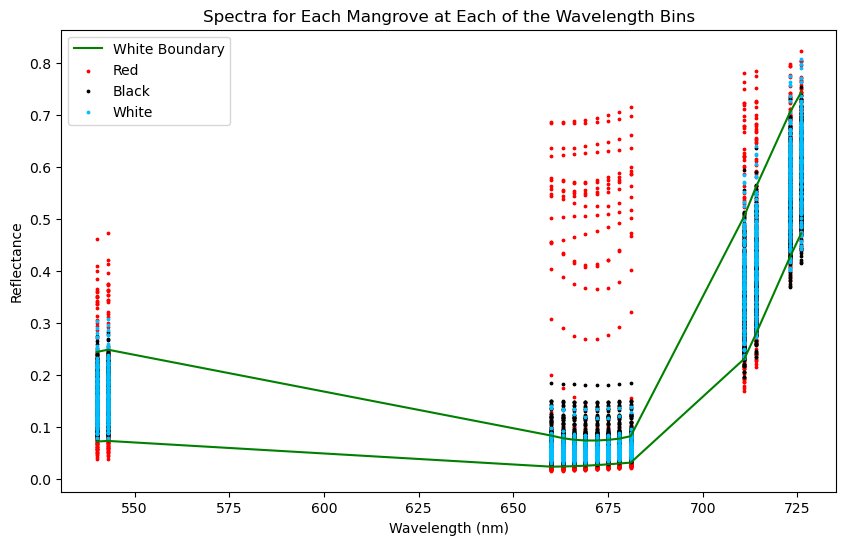

In [123]:
red_14_white = binned_red[:,specific_white_indices]
black_14_white = binned_black[:,specific_white_indices]
white_14_white = binned_white[:,specific_white_indices]
specific_white_bins = wavelength_bins[specific_white_indices]

print(np.shape(red_14_white))
print(np.shape(black_14_white))
print(np.shape(white_14_white))
print(np.shape(specific_white_bins))

red_14_white = red_14_white[:,:,0,0]
black_14_white = black_14_white[:,:,0,0]
white_14_white = white_14_white[:,:,0,0]
specific_white_bins = specific_white_bins[:,0,0]

print(np.shape(red_14_white))
print(np.shape(specific_white_bins))

upper_boundary_white_specific = means + 2*stdevs
lower_boundary_white_specific = means - 2*stdevs

print(f'shape is {np.shape(upper_boundary_white_specific)}')

plt.figure(figsize=(10,6))

plt.plot(specific_white_bins, upper_boundary_white_specific, color = 'green')
plt.plot(specific_white_bins, lower_boundary_white_specific, color = 'green', label = 'White Boundary')

plt.scatter(specific_white_bins, red_14_white[0], color = 'red', label = 'Red', s = 3)
plt.scatter(specific_white_bins, black_14_white[0], color = 'black', label = 'Black', s = 3)
plt.scatter(specific_white_bins, white_14_white[0], color = 'deepskyblue', label = 'White', s = 3)

for i in range(1,num_red):
    plt.scatter(specific_white_bins, red_14_white[i], color = 'red', s = 3)
for i in range(1,num_black):
    plt.scatter(specific_white_bins, black_14_white[i], color = 'black', s = 3)
for i in range(1,num_white):
    plt.scatter(specific_white_bins, white_14_white[i], color = 'deepskyblue', s = 3)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend()
plt.title("Spectra for Each Mangrove at Each of the Wavelength Bins")
plt.savefig("All_plant_spec_wavelength_bins.png", bbox_inches = 'tight', dpi=1000)
plt.show()

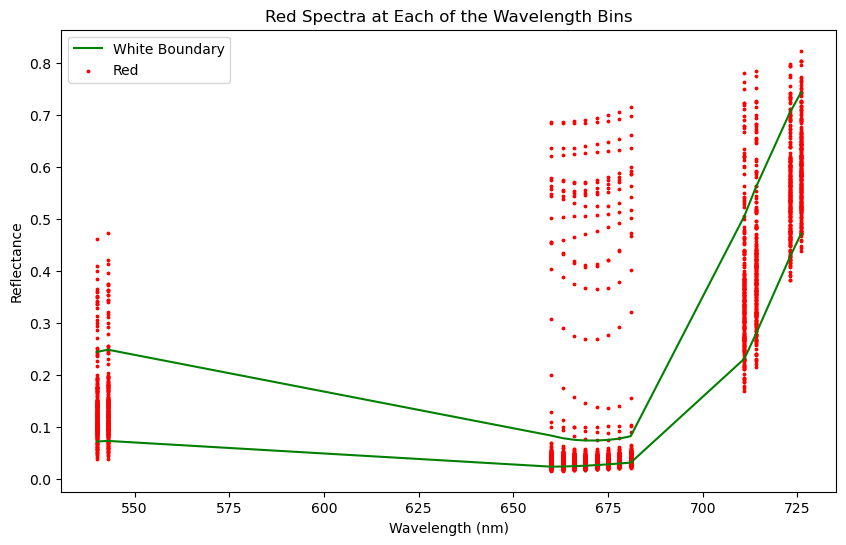

In [124]:

plt.figure(figsize=(10,6))

plt.plot(specific_white_bins, upper_boundary_white_specific, color = 'green')
plt.plot(specific_white_bins, lower_boundary_white_specific, color = 'green', label = 'White Boundary')

plt.scatter(specific_white_bins, red_14_white[0], color = 'red', label = 'Red', s = 3)


for i in range(1,num_red):
    plt.scatter(specific_white_bins, red_14_white[i], color = 'red', s = 3)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend()
plt.title("Red Spectra at Each of the Wavelength Bins")
plt.savefig("Red_spec_wavelength_bins.png", bbox_inches = 'tight', dpi=1000)
plt.show()

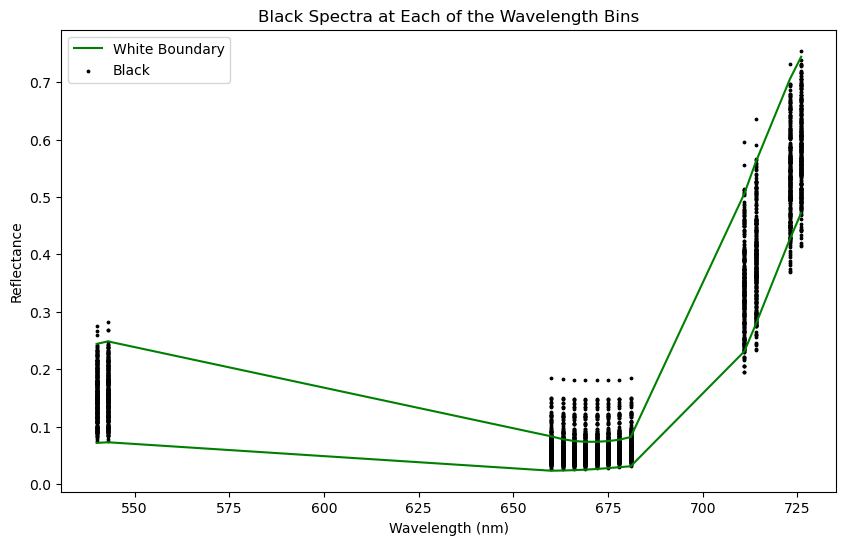

In [125]:

plt.figure(figsize=(10,6))

plt.plot(specific_white_bins, upper_boundary_white_specific, color = 'green')
plt.plot(specific_white_bins, lower_boundary_white_specific, color = 'green', label = 'White Boundary')

plt.scatter(specific_white_bins, black_14_white[0], color = 'black', label = 'Black', s = 3)


for i in range(1,num_black):
    plt.scatter(specific_white_bins, black_14_white[i], color = 'Black', s = 3)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend()
plt.title("Black Spectra at Each of the Wavelength Bins")
plt.savefig("black_spec_wavelength_bins.png", bbox_inches = 'tight', dpi=1000)
plt.show()

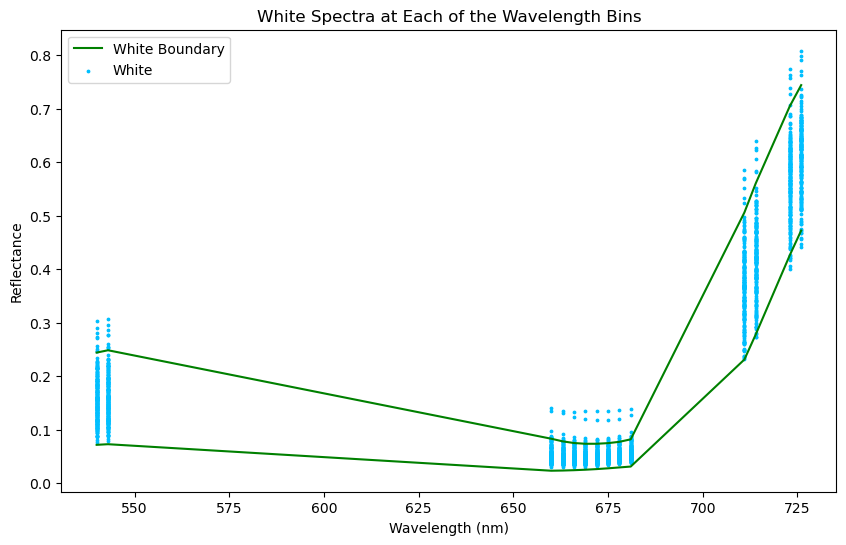

In [126]:
plt.figure(figsize=(10,6))

plt.plot(specific_white_bins, upper_boundary_white_specific, color = 'green')
plt.plot(specific_white_bins, lower_boundary_white_specific, color = 'green', label = 'White Boundary')

plt.scatter(specific_white_bins, white_14_white[0], color = 'deepskyblue', label = 'White', s = 3)


for i in range(1,num_white):
    plt.scatter(specific_white_bins, white_14_white[i], color = 'deepskyblue', s = 3)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend()
plt.title("White Spectra at Each of the Wavelength Bins")
plt.savefig("white_spec_wavelength_bins.png", bbox_inches = 'tight', dpi=1000)
plt.show()

In [127]:
index_675 = np.where(675 == specific_white_bins)
index_678 = np.where(678 == specific_white_bins)

red_meet_675_678 = 0
white_meet_675_678 = 0
black_meet_675_678 = 0

red_675 = red_14_white[:,index_675]
red_678 = red_14_white[:,index_678]

white_675 = white_14_white[:,index_675]
white_678 = white_14_white[:,index_678]

black_675 = black_14_white[:,index_675]
black_678 = black_14_white[:,index_678]

upper_675 = upper_boundary_white_specific[index_675]
upper_678 = upper_boundary_white_specific[index_678]

lower_675 = lower_boundary_white_specific[index_675]
lower_678 = lower_boundary_white_specific[index_678]

for i in range(0, num_red):
    if red_675[i] <= upper_675:
        if red_675[i] >= lower_675:
            if red_678[i] <= upper_675:
                if red_678[i] >= lower_675:
                    red_meet_675_678 += 1

for i in range(0, num_white):
    if white_675[i] <= upper_675:
        if white_675[i] >= lower_675:
            if white_678[i] <= upper_675:
                if white_678[i] >= lower_675:
                    white_meet_675_678 += 1

for i in range(0, num_black):
    if black_675[i] <= upper_675:
        if black_675[i] >= lower_675:
            if black_678[i] <= upper_675:
                if black_678[i] >= lower_675:
                    black_meet_675_678 += 1

In [128]:
total_met_675_678 = red_meet_675_678 + white_meet_675_678 + black_meet_675_678

efficiency = white_meet_675_678/num_white * 100

purity = white_meet_675_678/total_plants_meet_black_705_crit * 100

print(f'Efficiency of 675 nm and 678 nm combination = {efficiency}')
print(f'Purity of 675 nm and 678 nm combination = {purity}')

Efficiency of 675 nm and 678 nm combination = 94.95412844036697
Purity of 675 nm and 678 nm combination = 28.163265306122447


In [129]:
# now setting up script to filter through the 195 wavebands which have suitable
# p-values and variances for each species
# these wavelength bins are in red_white_black_overlap

num_overlapping = len(red_white_black_overlap)
print(num_overlapping)

195


In [130]:
overlap_indices = []
for bin in red_white_black_overlap:
    index = np.where(wavelength_bins == bin)
    overlap_indices.append(index)

In [131]:
red_overlap = binned_red[:,overlap_indices]
black_overlap = binned_black[:,overlap_indices]
white_overlap = binned_white[:,overlap_indices]

print(np.shape(red_overlap), np.shape(black_overlap), np.shape(white_overlap))


(250, 195, 1, 1) (330, 195, 1, 1) (218, 195, 1, 1)


In [132]:
red_overlap = red_overlap[:,:,0,0]
black_overlap = black_overlap[:,:,0,0]
white_overlap = white_overlap[:,:,0,0]

print(np.shape(red_overlap), np.shape(black_overlap), np.shape(white_overlap))

(250, 195) (330, 195) (218, 195)


In [133]:
red_means_overlap = np.mean(red_overlap, axis = 0)
red_stdevs_overlap = np.std(red_overlap, axis = 0)

print(np.shape(red_means_overlap), np.shape(red_stdevs_overlap))

black_means_overlap = np.mean(black_overlap, axis = 0)
black_stdevs_overlap = np.std(black_overlap, axis = 0)

print(np.shape(black_means_overlap), np.shape(black_stdevs_overlap))

white_means_overlap = np.mean(white_overlap, axis = 0)
white_stdevs_overlap = np.std(white_overlap, axis = 0)

print(np.shape(white_means_overlap), np.shape(white_stdevs_overlap))

(195,) (195,)
(195,) (195,)
(195,) (195,)


In [134]:
red_upper_overlap = red_means_overlap + 2 * red_stdevs_overlap
red_lower_overlap = red_means_overlap - 2 * red_stdevs_overlap

black_upper_overlap = black_means_overlap + 2 * black_stdevs_overlap
black_lower_overlap = black_means_overlap - 2 * black_stdevs_overlap

white_upper_overlap = white_means_overlap + 2 * white_stdevs_overlap
white_lower_overlap = white_means_overlap - 2 * white_stdevs_overlap

In [135]:
def ranges_do_not_overlap(start1, end1, start2, end2, start3, end3):

    # Check if range1 is outside range2 and range3
    if end1 < start2 and end1 < start3:
        # Check if range2 is outside range3
        if end2 < start3:
            return True
        # Check if range3 is outside range2
        elif end3 < start2:
            return True

    # Check if range2 is outside range1 and range3
    elif end2 < start1 and end2 < start3:
        # Check if range1 is outside range3
        if end1 < start3:
            return True
        # Check if range3 is outside range1
        elif end3 < start1:
            return True

    # Check if range3 is outside range1 and range2
    elif end3 < start1 and end3 < start2:
        # Check if range1 is outside range2
        if end1 < start2:
            return True
        # Check if range2 is outside range1
        elif end2 < start1:
            return True

    # If none of the conditions are met, ranges overlap
    return False

In [136]:
no_overlap_bin = []

for i in range(0, num_overlapping):

    if ranges_do_not_overlap(red_lower_overlap[i], red_upper_overlap[i], black_lower_overlap[i], black_upper_overlap[i], white_lower_overlap[i], white_upper_overlap[i]):
        no_overlap_bin.append(red_white_black_overlap[i])


In [137]:
print(len(no_overlap_bin))

0


In [138]:
index_650 = np.where(wavelength_bins == 651)
print(index_650)
red_650 = binned_red[:,index_650]
red_650 = red_650[:,0,0]
print(np.shape(red_650))
print(num_red)

(array([100]),)
(250,)
250


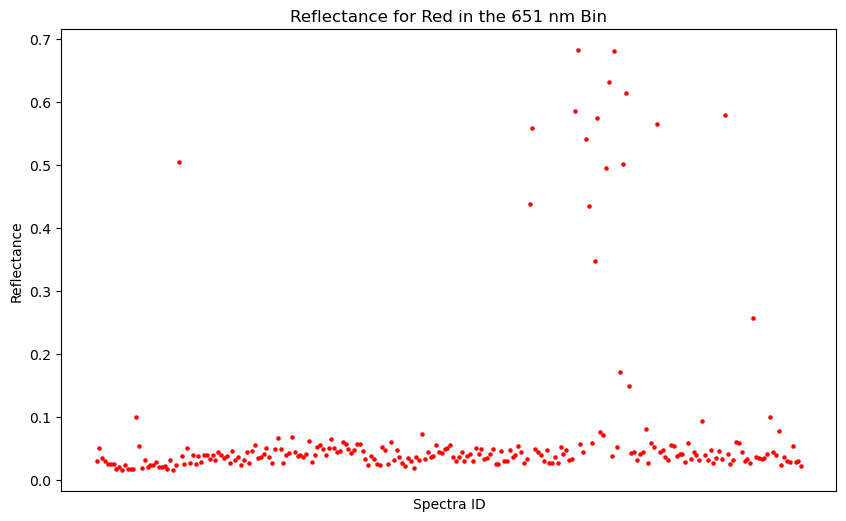

In [139]:
plt.figure(figsize=(10,6))
plt.scatter(red_spectra_id, red_650, color = 'red', s = 5)
plt.xlabel("Spectra ID")
plt.xticks([])
plt.ylabel("Reflectance")
plt.title("Reflectance for Red in the 651 nm Bin")
plt.savefig("red_651.png", bbox_inches = 'tight', dpi = 1000)
plt.show()


In [140]:
index_600 = np.where(wavelength_bins == 600)
print(index_600)
red_600 = binned_red[:,index_600]
red_600 = red_600[:,0,0]

(array([83]),)


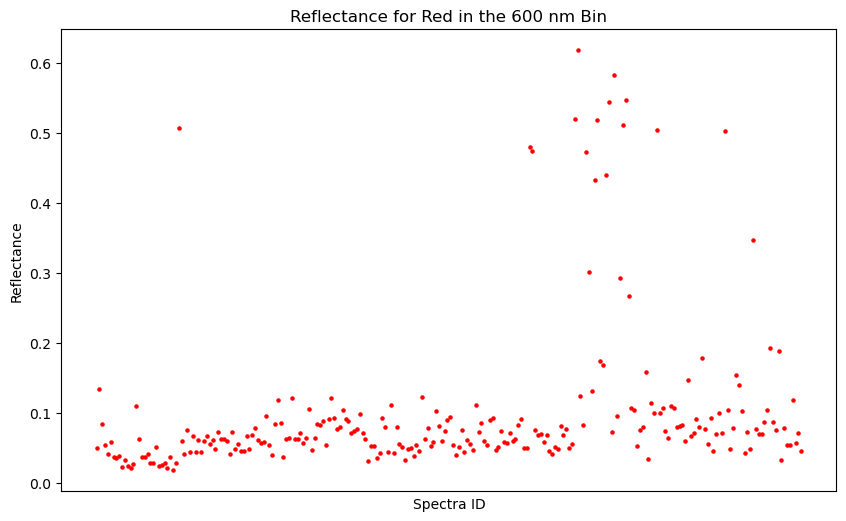

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(red_spectra_id, red_600, color = 'red', s = 5)
plt.xlabel("Spectra ID")
plt.xticks([])
plt.ylabel("Reflectance")
plt.title("Reflectance for Red in the 600 nm Bin")
plt.savefig("red_600.png", bbox_inches = 'tight', dpi = 1000)
plt.show()

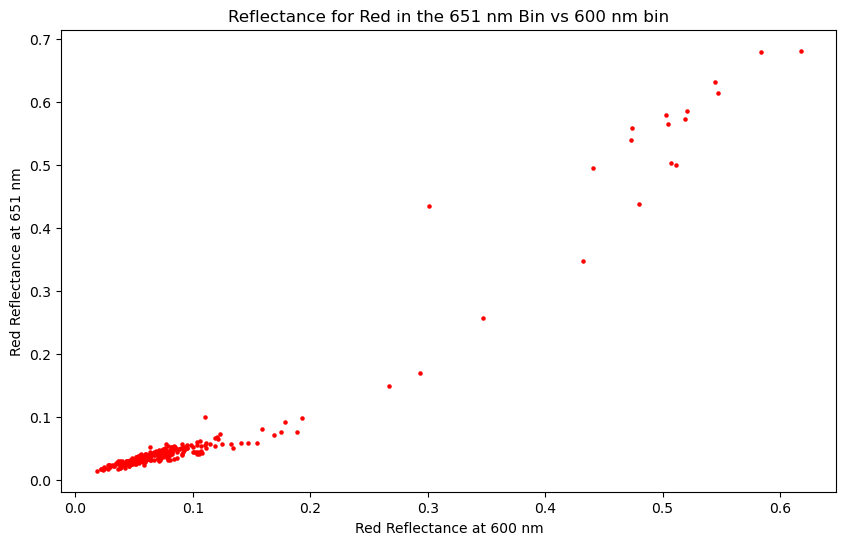

In [142]:
plt.figure(figsize=(10,6))
plt.scatter(red_600, red_650, color = 'red', s = 5)
plt.xlabel("Red Reflectance at 600 nm")
plt.ylabel("Red Reflectance at 651 nm")
plt.title("Reflectance for Red in the 651 nm Bin vs 600 nm bin")
plt.savefig("red_600_vs_650.png", bbox_inches = 'tight', dpi = 1000)
plt.show()

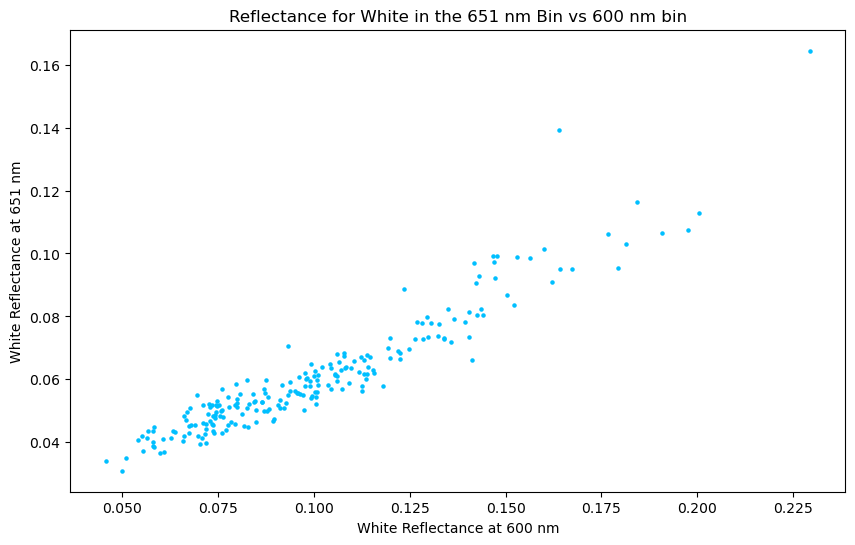

In [143]:
white_600 = binned_white[:,index_600]
white_600 = white_600[:,0,0]

white_651 = binned_white[:,index_650]
white_651 = white_651[:,0,0]

plt.figure(figsize=(10,6))
plt.scatter(white_600, white_651, color = 'deepskyblue', s = 5)
plt.xlabel("White Reflectance at 600 nm")
plt.ylabel("White Reflectance at 651 nm")
plt.title("Reflectance for White in the 651 nm Bin vs 600 nm bin")
plt.savefig("white_600_vs_650.png", bbox_inches = 'tight', dpi = 1000)
plt.show()

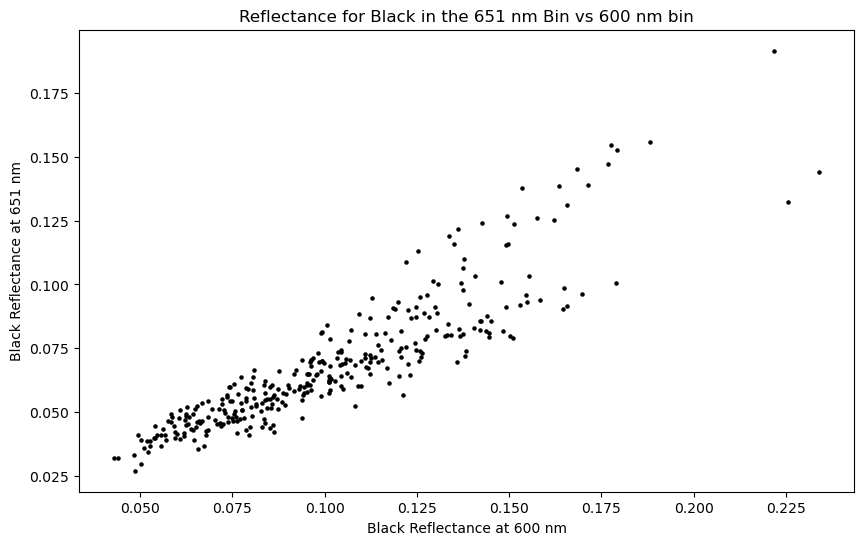

In [144]:
black_600 = binned_black[:,index_600]
black_600 = black_600[:,0,0]

black_651 = binned_black[:,index_650]
black_651 = black_651[:,0,0]

plt.figure(figsize=(10,6))
plt.scatter(black_600, black_651, color = 'black', s = 5)
plt.xlabel("Black Reflectance at 600 nm")
plt.ylabel("Black Reflectance at 651 nm")
plt.title("Reflectance for Black in the 651 nm Bin vs 600 nm bin")
plt.savefig("black_600_vs_650.png", bbox_inches = 'tight', dpi = 1000)
plt.show()

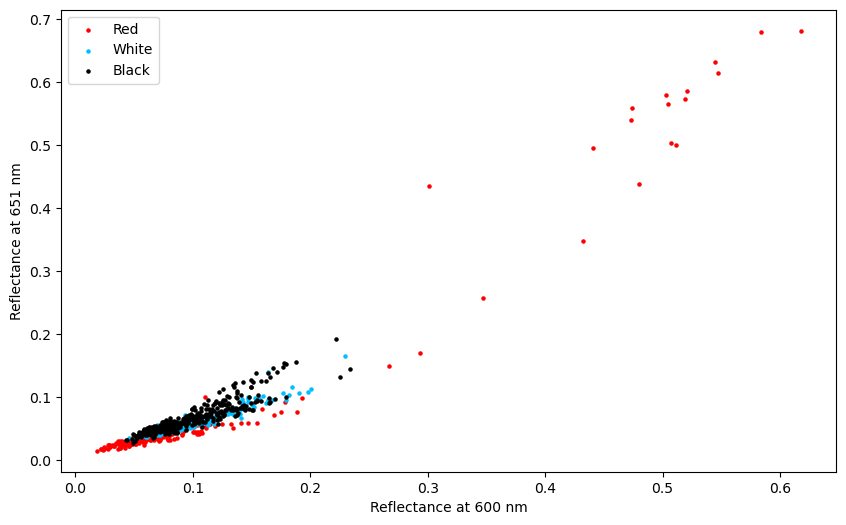

In [462]:
plt.figure(figsize=(10,6))
plt.scatter(red_600, red_650, color = 'red', s = 5, label = 'Red')
plt.scatter(white_600, white_651, color = 'deepskyblue', s = 5, label = 'White')
plt.scatter(black_600, black_651, color = 'black', s = 5, label = 'Black')
plt.xlabel("Reflectance at 600 nm")
plt.ylabel("Reflectance at 651 nm")

plt.legend()


plt.savefig("all_600_vs_650.png", bbox_inches = 'tight', dpi = 1000)
plt.show()

In [145]:
red_altered_indices = []
for i in range(0,num_red):
    if red_600[i] < 0.3:
        if red_650[i] < 0.3:
            red_altered_indices.append(i)

print(len(red_altered_indices))

233


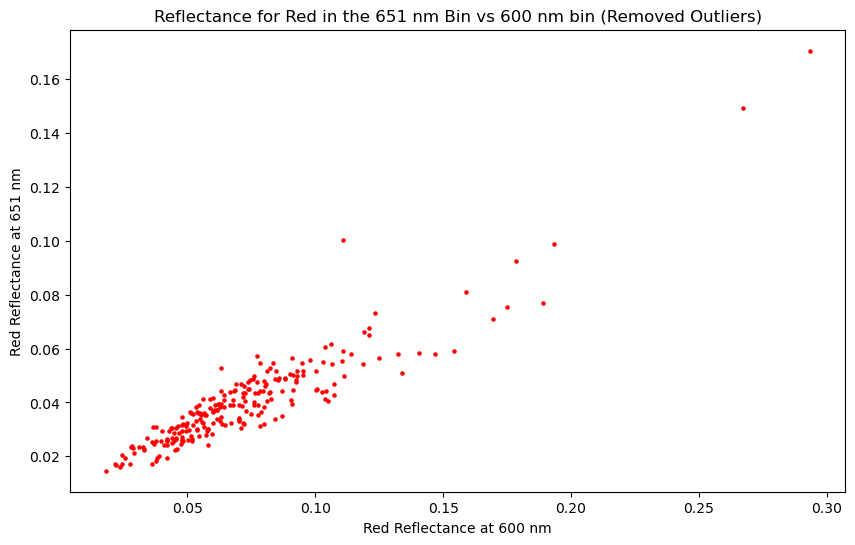

In [146]:
plt.figure(figsize=(10,6))
plt.scatter(red_600[red_altered_indices], red_650[red_altered_indices], color = 'red', s = 5)
plt.xlabel("Red Reflectance at 600 nm")
plt.ylabel("Red Reflectance at 651 nm")
plt.title("Reflectance for Red in the 651 nm Bin vs 600 nm bin (Removed Outliers)")
plt.savefig("red_altered_600_vs_650.png", bbox_inches = 'tight', dpi = 1000)
plt.show()

In [147]:
altered_red = binned_red[red_altered_indices]
print(np.shape(altered_red))
num_red_alt = len(red_altered_indices)
print(num_red_alt)

(233, 372)
233


In [148]:
alt_binned_red_t,alt_binned_red_p = stats.ttest_ind(altered_red,w_b_binned_combined)
print(np.size(binned_red_t), np.size(binned_red_p))
alt_binned_red_var = calculate_variance(altered_red)

print(len(alt_binned_red_var))

372 372
372


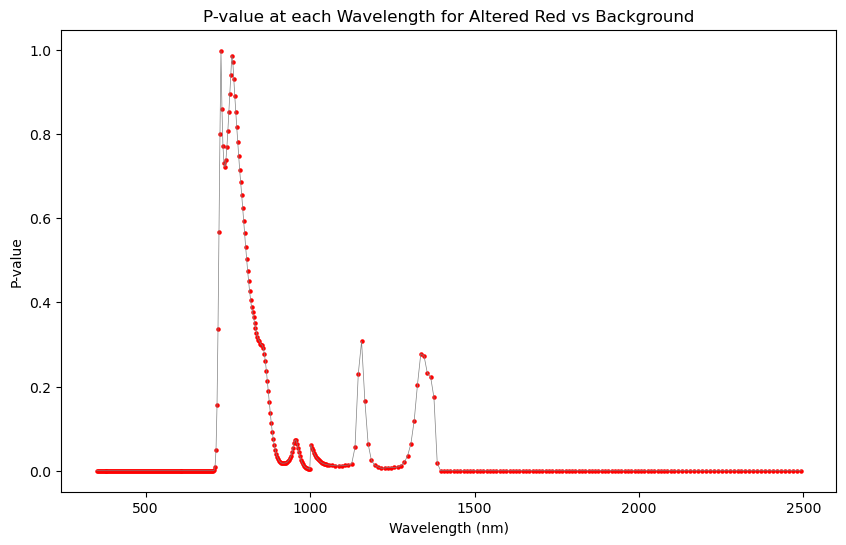

In [149]:
plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, alt_binned_red_p, color = 'red',s=5)
plt.plot(wavelength_bins, alt_binned_red_p, color = 'grey', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for Altered Red vs Background')
plt.savefig('altered_red_P-value_at_each_Wavelength_for_Red_vs_Background_scatter_and_line', bbox_inches = 'tight', dpi = 1000)
plt.show()

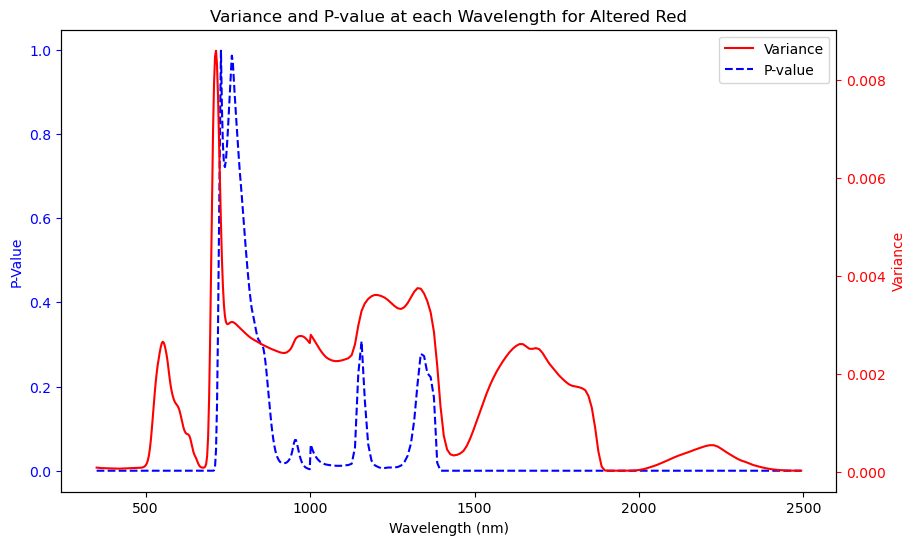

In [150]:
import matplotlib.lines as mlines
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.plot(wavelength_bins, alt_binned_red_p, color = 'blue', label = 'P-Value', linestyle = '--')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('P-Value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelength_bins, alt_binned_red_var, color = 'red', label = 'Variance', linestyle = '-')
ax2.set_ylabel('Variance', color='red')
ax2.tick_params('y', colors='red')

legend_var = mlines.Line2D([], [], color='r', label='Variance')
legend_pvalue = mlines.Line2D([], [], color='b', label='P-value', linestyle ='--')

# Combine the legend for both lines
plt.legend(handles=[legend_var, legend_pvalue], loc='upper right')

plt.title('Variance and P-value at each Wavelength for Altered Red')
plt.savefig('altered_redVariance_and_p_value_at_each_Wavelength_for_Red_diff_axis_binned', bbox_inches = 'tight', dpi = 1000)
plt.show()

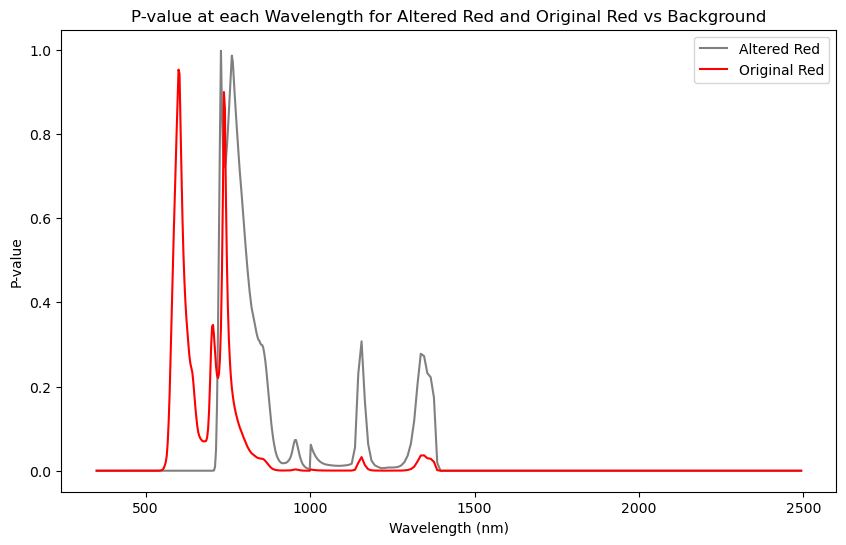

In [151]:
plt.figure(figsize=(10,6))
plt.plot(wavelength_bins, alt_binned_red_p, color = 'grey', label = 'Altered Red')
plt.plot(wavelength_bins, binned_red_p, color = 'red', label = 'Original Red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.title('P-value at each Wavelength for Altered Red and Original Red vs Background')
plt.savefig('altered_and_og_red_P-value.png', bbox_inches = 'tight', dpi = 1000)
plt.legend()
plt.show()

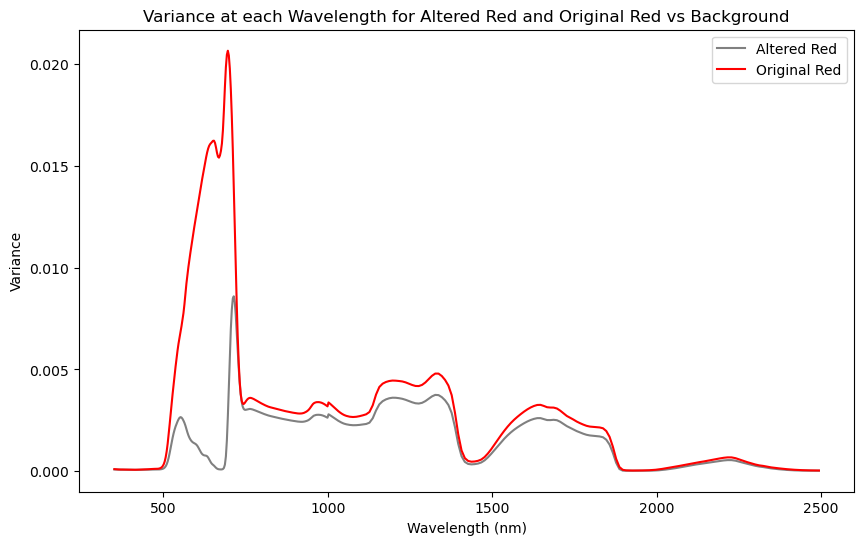

In [152]:
plt.figure(figsize=(10,6))
plt.plot(wavelength_bins, alt_binned_red_var, color = 'grey', label = 'Altered Red')
plt.plot(wavelength_bins, binned_red_var, color = 'red', label = 'Original Red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Variance')
plt.title('Variance at each Wavelength for Altered Red and Original Red vs Background')
plt.savefig('altered_and_og_red_variance.png', bbox_inches = 'tight', dpi = 1000)
plt.legend()
plt.show()

In [153]:
alt_r_b_binned_combined = np.vstack((altered_red, binned_black))
print(np.shape(alt_r_b_binned_combined))

w_b_binned_combined = np.vstack((binned_white, binned_black))
print(np.shape(w_b_binned_combined))

alt_r_w_binned_combined = np.vstack((altered_red, binned_white))
print(np.shape(alt_r_w_binned_combined))

(563, 372)
(548, 372)
(451, 372)


372 372


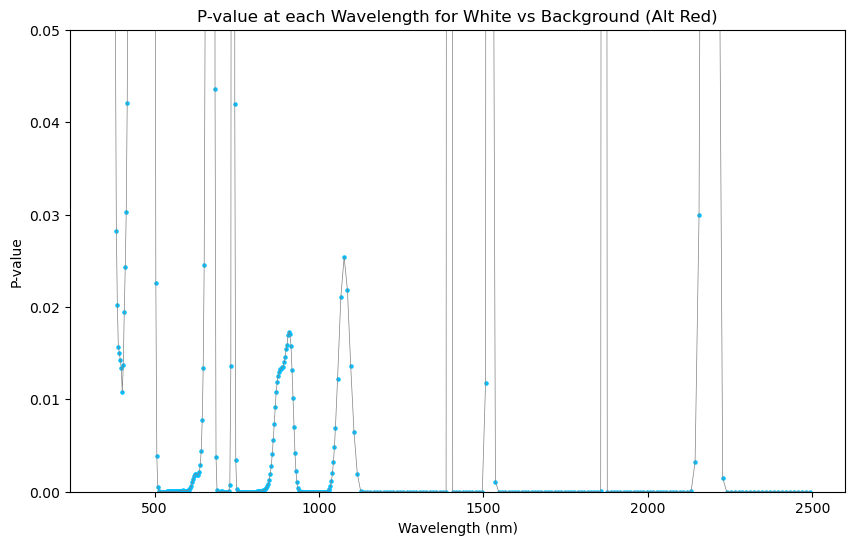

In [154]:
alt_binned_white_t,alt_binned_white_p = stats.ttest_ind(binned_white,alt_r_b_binned_combined)
print(np.size(alt_binned_white_t), np.size(alt_binned_white_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, alt_binned_white_p, color = 'deepskyblue', s = 5)
plt.plot(wavelength_bins, alt_binned_white_p, color = 'grey', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for White vs Background (Alt Red)')
plt.savefig('Alt_red_P-value_at_each_Wavelength_for_White_vs_Background_scatter_and_line', bbox_inches = 'tight', dpi = 1000)
plt.show()

372 372


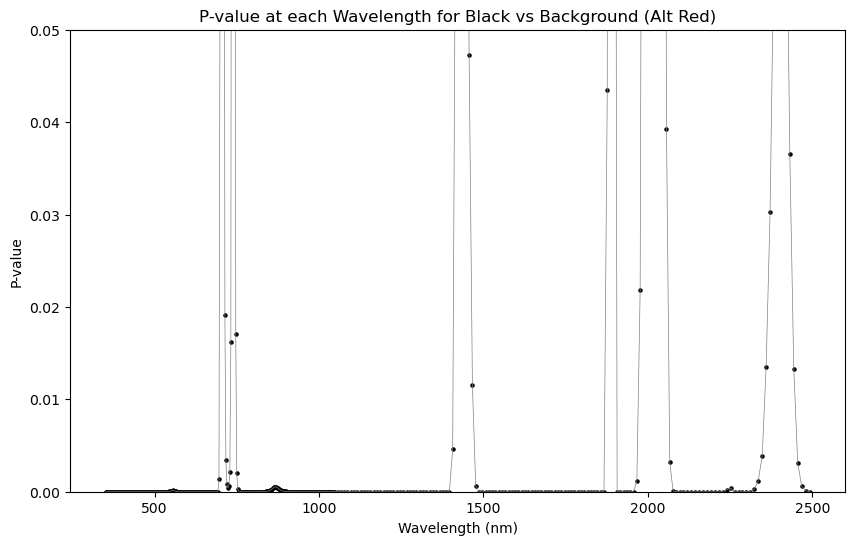

In [155]:
alt_binned_black_t,alt_binned_black_p = stats.ttest_ind(binned_black,alt_r_w_binned_combined)
print(np.size(alt_binned_black_t), np.size(alt_binned_black_p))

plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, alt_binned_black_p, color = 'black', s = 5)
plt.plot(wavelength_bins, alt_binned_black_p, color = 'grey', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('P-value')
plt.ylim([0,0.05])
plt.title('P-value at each Wavelength for Black vs Background (Alt Red)')
plt.savefig('alt_red_P-value_at_each_Wavelength_for_Black_vs_Background_scatter_and_line', bbox_inches = 'tight', dpi = 1000)

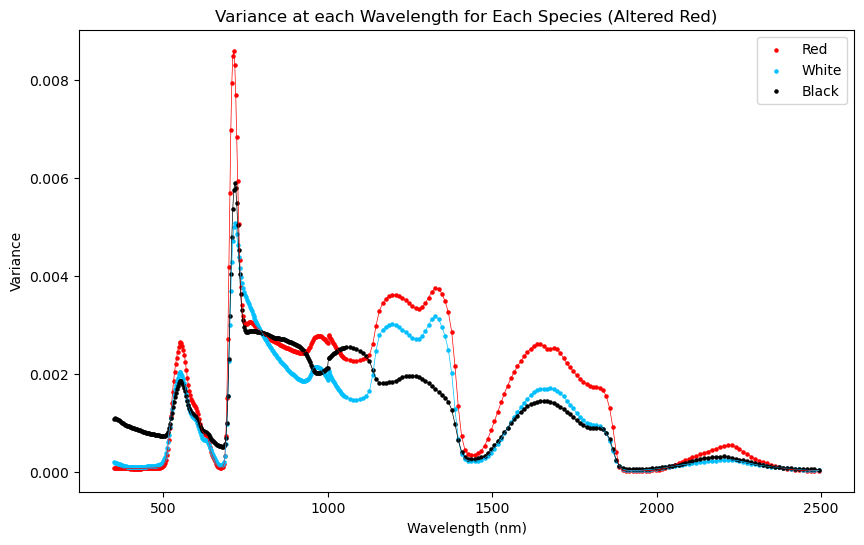

In [156]:
plt.figure(figsize=(10,6))
plt.scatter(wavelength_bins, alt_binned_red_var, color = 'red',s=5, label = 'Red')
plt.plot(wavelength_bins, alt_binned_red_var, color = 'red', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_white_var, color = 'deepskyblue', s = 5, label = 'White')
plt.plot(wavelength_bins, binned_white_var, color = 'deepskyblue', linewidth = 0.5)
plt.scatter(wavelength_bins, binned_black_var, color = 'black', s = 5, label = 'Black')
plt.plot(wavelength_bins, binned_black_var, color = 'black', linewidth = 0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Variance')
#plt.ylim([0,0.05])
plt.legend()
plt.title('Variance at each Wavelength for Each Species (Altered Red)')
plt.savefig('altered_red_Variance_for_each_species_binned', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [157]:
alt_red_selected_wavelength_bins = []
for i in range(0, num_wave_bins):
    if alt_binned_red_p[i] < 0.05:
        if alt_binned_red_var[i] < 0.005:
            alt_red_selected_wavelength_bins += [wavelength_bins[i]]

In [158]:
print(alt_red_selected_wavelength_bins)
print(len(alt_red_selected_wavelength_bins))

[351.0, 354.0, 357.0, 360.0, 363.0, 366.0, 369.0, 372.0, 375.0, 378.0, 381.0, 384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 420.0, 423.0, 426.0, 429.0, 432.0, 435.0, 438.0, 441.0, 444.0, 447.0, 450.0, 453.0, 456.0, 459.0, 462.0, 465.0, 468.0, 471.0, 474.0, 477.0, 480.0, 483.0, 486.0, 489.0, 492.0, 495.0, 498.0, 501.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 546.0, 549.0, 552.0, 555.0, 558.0, 561.0, 564.0, 567.0, 570.0, 573.0, 576.0, 579.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 654.0, 657.0, 660.0, 663.0, 666.0, 669.0, 672.0, 675.0, 678.0, 681.0, 684.0, 687.0, 690.0, 693.0, 696.0, 699.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0

In [159]:
alt_white_selected_wavelength_bins = []
for i in range(0, num_wave_bins):
    if alt_binned_white_p[i] < 0.05:
        if binned_white_var[i] < 0.005:
            alt_white_selected_wavelength_bins += [wavelength_bins[i]]

In [160]:
print(alt_white_selected_wavelength_bins)
print(len(alt_white_selected_wavelength_bins))

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 546.0, 549.0, 552.0, 555.0, 558.0, 561.0, 564.0, 567.0, 570.0, 573.0, 576.0, 579.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 684.0, 687.0, 690.0, 693.0, 696.0, 699.0, 702.0, 705.0, 708.0, 711.0, 714.0, 723.0, 726.0, 729.0, 732.0, 744.0, 747.0, 750.0, 753.0, 756.0, 759.0, 762.0, 765.0, 768.0, 771.0, 774.0, 777.0, 780.0, 783.0, 786.0, 789.0, 792.0, 795.0, 798.0, 801.0, 804.0, 807.0, 810.0, 813.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 873.0, 876.0, 879.0, 882.0, 885.0, 888.0, 891.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0

In [161]:
alt_black_selected_wavelength_bins = []
for i in range(0, num_wave_bins):
    if alt_binned_black_p[i] < 0.05:
        if binned_black_var[i] < 0.005:
            alt_black_selected_wavelength_bins += [wavelength_bins[i]]

In [162]:
print(alt_black_selected_wavelength_bins)
print(len(alt_black_selected_wavelength_bins))

[351.0, 354.0, 357.0, 360.0, 363.0, 366.0, 369.0, 372.0, 375.0, 378.0, 381.0, 384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 420.0, 423.0, 426.0, 429.0, 432.0, 435.0, 438.0, 441.0, 444.0, 447.0, 450.0, 453.0, 456.0, 459.0, 462.0, 465.0, 468.0, 471.0, 474.0, 477.0, 480.0, 483.0, 486.0, 489.0, 492.0, 495.0, 498.0, 501.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 546.0, 549.0, 552.0, 555.0, 558.0, 561.0, 564.0, 567.0, 570.0, 573.0, 576.0, 579.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 654.0, 657.0, 660.0, 663.0, 666.0, 669.0, 672.0, 675.0, 678.0, 681.0, 684.0, 687.0, 690.0, 693.0, 696.0, 729.0, 732.0, 747.0, 750.0, 753.0, 756.0, 759.0, 762.0, 765.0, 768.0, 771.0, 774.0, 777.0, 780.0, 783.0, 786.0, 789.0, 792.0, 795.0, 798.0, 801.0, 804.0, 807.0, 810.0, 813.0, 816.0, 819.0

In [163]:
alt_red_white_overlap = []
for bin in alt_red_selected_wavelength_bins:
    if bin in alt_white_selected_wavelength_bins:
        alt_red_white_overlap.append(bin)

alt_red_black_overlap = []
for bin in alt_red_selected_wavelength_bins:
    if bin in alt_black_selected_wavelength_bins:
        alt_red_black_overlap.append(bin)

alt_white_black_overlap = []
for bin in alt_white_selected_wavelength_bins:
    if bin in alt_black_selected_wavelength_bins:
        alt_white_black_overlap.append(bin)

In [164]:
print(alt_red_white_overlap)
print(len(alt_red_white_overlap))

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 546.0, 549.0, 552.0, 555.0, 558.0, 561.0, 564.0, 567.0, 570.0, 573.0, 576.0, 579.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 684.0, 687.0, 690.0, 693.0, 696.0, 699.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0, 993.0, 996.0, 999.0, 1008.0, 1011.0, 1014.0, 1017.0, 1020.0, 1023.0, 1026.0, 1029.0, 1032.0, 1035.0, 1038.0, 1041.0, 1044.0, 1047.0, 1050.0, 1056.5, 1066.5, 1076.5, 1086.5, 1096.5, 1106.5, 1116.5, 1126.5, 1186.5, 1196.5, 1206.5, 1216.5, 1226.5, 1236.5, 1246.5, 1256.5, 1266.5, 1276.5, 1286.5, 1296.5, 1386.5, 1406.5, 1416.5, 1426.5, 1

In [165]:
print(alt_red_black_overlap)
print(len(alt_red_black_overlap))

[351.0, 354.0, 357.0, 360.0, 363.0, 366.0, 369.0, 372.0, 375.0, 378.0, 381.0, 384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 420.0, 423.0, 426.0, 429.0, 432.0, 435.0, 438.0, 441.0, 444.0, 447.0, 450.0, 453.0, 456.0, 459.0, 462.0, 465.0, 468.0, 471.0, 474.0, 477.0, 480.0, 483.0, 486.0, 489.0, 492.0, 495.0, 498.0, 501.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 546.0, 549.0, 552.0, 555.0, 558.0, 561.0, 564.0, 567.0, 570.0, 573.0, 576.0, 579.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 654.0, 657.0, 660.0, 663.0, 666.0, 669.0, 672.0, 675.0, 678.0, 681.0, 684.0, 687.0, 690.0, 693.0, 696.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0

In [166]:
print(alt_white_black_overlap)
print(len(alt_white_black_overlap))

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 546.0, 549.0, 552.0, 555.0, 558.0, 561.0, 564.0, 567.0, 570.0, 573.0, 576.0, 579.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 684.0, 687.0, 690.0, 693.0, 696.0, 729.0, 732.0, 747.0, 750.0, 753.0, 756.0, 759.0, 762.0, 765.0, 768.0, 771.0, 774.0, 777.0, 780.0, 783.0, 786.0, 789.0, 792.0, 795.0, 798.0, 801.0, 804.0, 807.0, 810.0, 813.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 873.0, 876.0, 879.0, 882.0, 885.0, 888.0, 891.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0

In [167]:
alt_red_white_black_overlap = []
for bin in alt_red_selected_wavelength_bins:
    if bin in alt_white_selected_wavelength_bins:
        if bin in alt_black_selected_wavelength_bins:
            alt_red_white_black_overlap.append(bin)

In [168]:
print(alt_red_white_black_overlap)
print(len(alt_red_white_black_overlap))

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 546.0, 549.0, 552.0, 555.0, 558.0, 561.0, 564.0, 567.0, 570.0, 573.0, 576.0, 579.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 684.0, 687.0, 690.0, 693.0, 696.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 966.0, 969.0, 972.0, 975.0, 978.0, 981.0, 984.0, 987.0, 990.0, 993.0, 996.0, 999.0, 1008.0, 1011.0, 1014.0, 1017.0, 1020.0, 1023.0, 1026.0, 1029.0, 1032.0, 1035.0, 1038.0, 1041.0, 1044.0, 1047.0, 1050.0, 1056.5, 1066.5, 1076.5, 1086.5, 1096.5, 1106.5, 1116.5, 1126.5, 1186.5, 1196.5, 1206.5, 1216.5, 1226.5, 1236.5, 1246.5, 1256.5, 1266.5, 1276.5, 1286.5, 1296.5, 1386.5, 1406.5, 1456.5, 1466.5, 1476.5, 

In [169]:
alt_red_only_bin = []
for bin in alt_red_selected_wavelength_bins:
    if bin not in alt_white_selected_wavelength_bins:
        if bin not in alt_black_selected_wavelength_bins:
            alt_red_only_bin.append(bin)

alt_white_only_bin = []
for bin in alt_white_selected_wavelength_bins:
    if bin not in alt_red_selected_wavelength_bins:
        if bin not in alt_black_selected_wavelength_bins:
            alt_white_only_bin.append(bin)

alt_black_only_bin = []
for bin in alt_black_selected_wavelength_bins:
    if bin not in alt_red_selected_wavelength_bins:
        if bin not in alt_white_selected_wavelength_bins:
            alt_black_only_bin.append(bin)

In [170]:
print(alt_red_only_bin)
print(len(alt_red_only_bin))

[]
0


In [171]:
print(alt_white_only_bin)
print(len(alt_white_only_bin))

[702.0, 705.0, 708.0, 711.0, 714.0, 723.0, 726.0, 744.0]
8


In [172]:
alt_specific_white_indices = []
for index in alt_white_only_bin:
    alt_white_index = np.where(wavelength_bins == index)
    alt_specific_white_indices.append(alt_white_index)
print(alt_specific_white_indices)
print(wavelength_bins[alt_specific_white_indices])
print(len(alt_specific_white_indices))

[(array([117]),), (array([118]),), (array([119]),), (array([120]),), (array([121]),), (array([124]),), (array([125]),), (array([131]),)]
[[[702.]]

 [[705.]]

 [[708.]]

 [[711.]]

 [[714.]]

 [[723.]]

 [[726.]]

 [[744.]]]
8


In [173]:
for index in alt_specific_white_indices:
    print(index)
    reflectance = binned_white[:,index]
    current_bin = wavelength_bins[index]
    reflectance = reflectance[:,0,0]
    print(np.size(reflectance))
    print(np.shape(reflectance))

    mean_ref = np.mean(reflectance)
    stdev_ref = np.std(reflectance)

    print(f'{current_bin[0]} nm Mean Reflectance = {mean_ref}')
    print(f'{current_bin[0]} nm Standard Dev = {stdev_ref}')

    meet_crit_1stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref):
            if ref >= (mean_ref - stdev_ref):
                meet_crit_1stdev.append(ref)

    num_1_stdev = len(meet_crit_1stdev)
    percentage_1_stdev = num_1_stdev/num_white * 100

    meet_crit_2stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                meet_crit_2stdev.append(ref)

    num_2_stdev = len(meet_crit_2stdev)
    percentage_2_stdev = num_2_stdev/num_white * 100

    meet_crit_3stdev = []
    for ref in reflectance:
        if ref <= (mean_ref + stdev_ref * 3):
            if ref >= (mean_ref - stdev_ref * 3):
                meet_crit_3stdev.append(ref)

    num_3_stdev = len(meet_crit_3stdev)
    percentage_3_stdev = num_3_stdev/num_white * 100
    
    efficiency = percentage_2_stdev

    alt_red_ref = altered_red[:,index]

    mean_ref_red = np.mean(alt_red_ref)
    st_dev_ref_red = np.std(alt_red_ref)

    alt_red_meet_crit = []
    for ref in alt_red_ref:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                alt_red_meet_crit.append(ref)

    black_ref = binned_black[:,index]

    mean_ref_black = np.mean(black_ref)
    stdev_ref_black = np.std(black_ref)

    alt_black_meet_crit = []
    for ref in black_ref:
        if ref <= (mean_ref + stdev_ref * 2):
            if ref >= (mean_ref - stdev_ref * 2):
                alt_black_meet_crit.append(ref)

    # % of background which match the criteria for black at 705 nm
    total_bgd = len(alt_red_meet_crit) + len(alt_black_meet_crit)
    bgd_percentage_meet_crit = total_bgd/(num_red + num_black) * 100
    
    total_meet_crit = num_2_stdev + total_bgd

    purity = num_2_stdev / total_meet_crit * 100

    print(f'1 Sigma range = {mean_ref} ± {stdev_ref}')
    print('Expected % of White Mangroves within 1 sigma = 68%')
    print(f'Number of White Mangroves within 1 sigma = {num_1_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 1 sigma = {percentage_1_stdev}')
    print('\n')
    print(f'2 Sigma range = {mean_ref} ± {stdev_ref*2}')
    print('Expected % of White Mangroves within 2 sigma = 95%')
    print(f'Number of White Mangroves within 2 sigma = {num_2_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 2 sigma = {percentage_2_stdev}')
    print('\n')
    print(f'3 Sigma range = {mean_ref} ± {stdev_ref*3}')
    print('Expected % of White Mangroves within 3 sigma = 99.7%')
    print(f'Number of White Mangroves within 3 sigma = {num_3_stdev} out of {num_white} White Mangroves')
    print(f'Percentage of White Mangroves within 3 sigma = {percentage_3_stdev}')
    print('\n')
    print(f'Efficiency at {current_bin[0]} nm = {efficiency}\n')
    print(f'Percentage of background which also meet criteria = {bgd_percentage_meet_crit}')
    print(f'Purity at {current_bin[0]} nm = {purity}')
'''
    fig, axs = plt.subplots(1,2,sharey = True, figsize = (10,6))
    
    axs[0].scatter(white_spectra_id, reflectance, color = 'deepskyblue', s = 5)
    axs[0].set_ylabel('Reflectance')
    axs[0].set_xlabel('\nSpectra ID')
    axs[0].set_xticks([])

    axs[1].hist(reflectance, bins = 20, color = 'grey',edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal')
    axs[1].set_xlabel('Frequency')


    fig.suptitle(f'Reflectance and Corresponding Histogram in the {current_bin[0]} nm Wavelength Bin for White \n\n Mean Reflectance = {mean_ref}, Standard Deviation = {stdev_ref}')
    
    plt.subplots_adjust(wspace = 0)

    plt.savefig(f'Reflectance_and_histogram_for_{current_bin[0]}_nm_Wavelength_Bin_for_white.png', bbox_inches = 'tight', dpi = 1000)

    plt.show()
'''

(array([117]),)
218
(218,)
702.0 nm Mean Reflectance = 0.22378350433180427
702.0 nm Standard Dev = 0.05486792440396758
1 Sigma range = 0.22378350433180427 ± 0.05486792440396758
Expected % of White Mangroves within 1 sigma = 68%
Number of White Mangroves within 1 sigma = 151 out of 218 White Mangroves
Percentage of White Mangroves within 1 sigma = 69.26605504587155


2 Sigma range = 0.22378350433180427 ± 0.10973584880793516
Expected % of White Mangroves within 2 sigma = 95%
Number of White Mangroves within 2 sigma = 210 out of 218 White Mangroves
Percentage of White Mangroves within 2 sigma = 96.3302752293578


3 Sigma range = 0.22378350433180427 ± 0.16460377321190273
Expected % of White Mangroves within 3 sigma = 99.7%
Number of White Mangroves within 3 sigma = 216 out of 218 White Mangroves
Percentage of White Mangroves within 3 sigma = 99.08256880733946


Efficiency at 702.0 nm = 96.3302752293578

Percentage of background which also meet criteria = 88.96551724137932
Purity at 702.0 n

"\n    fig, axs = plt.subplots(1,2,sharey = True, figsize = (10,6))\n    \n    axs[0].scatter(white_spectra_id, reflectance, color = 'deepskyblue', s = 5)\n    axs[0].set_ylabel('Reflectance')\n    axs[0].set_xlabel('\nSpectra ID')\n    axs[0].set_xticks([])\n\n    axs[1].hist(reflectance, bins = 20, color = 'grey',edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal')\n    axs[1].set_xlabel('Frequency')\n\n\n    fig.suptitle(f'Reflectance and Corresponding Histogram in the {current_bin[0]} nm Wavelength Bin for White \n\n Mean Reflectance = {mean_ref}, Standard Deviation = {stdev_ref}')\n    \n    plt.subplots_adjust(wspace = 0)\n\n    plt.savefig(f'Reflectance_and_histogram_for_{current_bin[0]}_nm_Wavelength_Bin_for_white.png', bbox_inches = 'tight', dpi = 1000)\n\n    plt.show()\n"

In [174]:
print(alt_black_only_bin)
print(len(alt_black_only_bin))

[]
0


In [175]:
alt_num_overlapping = len(alt_red_white_black_overlap)
print(alt_num_overlapping)

211


In [176]:
alt_overlap_indices = []
for bin in alt_red_white_black_overlap:
    index = np.where(wavelength_bins == bin)
    alt_overlap_indices.append(index)

In [177]:
alt_red_overlap = altered_red[:,alt_overlap_indices]
alt_black_overlap = binned_black[:,alt_overlap_indices]
alt_white_overlap = binned_white[:,alt_overlap_indices]

print(np.shape(alt_red_overlap), np.shape(alt_black_overlap), np.shape(alt_white_overlap))


(233, 211, 1, 1) (330, 211, 1, 1) (218, 211, 1, 1)


In [178]:
alt_red_overlap = alt_red_overlap[:,:,0,0]
alt_black_overlap = alt_black_overlap[:,:,0,0]
alt_white_overlap = alt_white_overlap[:,:,0,0]

print(np.shape(alt_red_overlap), np.shape(alt_black_overlap), np.shape(alt_white_overlap))

(233, 211) (330, 211) (218, 211)


In [179]:
alt_red_means_overlap = np.mean(alt_red_overlap, axis = 0)
alt_red_stdevs_overlap = np.std(alt_red_overlap, axis = 0)

print(np.shape(alt_red_means_overlap), np.shape(alt_red_stdevs_overlap))

alt_black_means_overlap = np.mean(alt_black_overlap, axis = 0)
alt_black_stdevs_overlap = np.std(alt_black_overlap, axis = 0)

print(np.shape(alt_black_means_overlap), np.shape(alt_black_stdevs_overlap))

alt_white_means_overlap = np.mean(alt_white_overlap, axis = 0)
alt_white_stdevs_overlap = np.std(alt_white_overlap, axis = 0)

print(np.shape(alt_white_means_overlap), np.shape(alt_white_stdevs_overlap))

(211,) (211,)
(211,) (211,)
(211,) (211,)


In [180]:
alt_red_upper_overlap = alt_red_means_overlap + 2 * alt_red_stdevs_overlap
alt_red_lower_overlap = alt_red_means_overlap - 2 * alt_red_stdevs_overlap

alt_black_upper_overlap = alt_black_means_overlap + 2 * alt_black_stdevs_overlap
alt_black_lower_overlap = alt_black_means_overlap - 2 * alt_black_stdevs_overlap

alt_white_upper_overlap = alt_white_means_overlap + 2 * alt_white_stdevs_overlap
alt_white_lower_overlap = alt_white_means_overlap - 2 * alt_white_stdevs_overlap

In [181]:
alt_no_overlap_bin = []

for i in range(0, alt_num_overlapping):

    if ranges_do_not_overlap(alt_red_lower_overlap[i], alt_red_upper_overlap[i], alt_black_lower_overlap[i], alt_black_upper_overlap[i], alt_white_lower_overlap[i], alt_white_upper_overlap[i]):
        alt_no_overlap_bin.append(alt_red_white_black_overlap[i])

In [182]:
print(len(alt_no_overlap_bin))

0


In [183]:
def index_finder(bin_array):
    indices = []
    for bin in bin_array:
        index = np.where(wavelength_bins == bin)
        indices.append(index)

    return indices

In [184]:
def mean_finder(array):
    means = np.mean(array, axis = 0)
    return means

def stdev_finder(array):
    stdevs = np.std(array, axis = 0)
    return stdevs

In [185]:
def range_finder(means, stdevs):
    upper = means + 2 * stdevs
    lower = means - 2 * stdevs
    return upper, lower

In [186]:
# single species only
#red
alt_red_only_indices = index_finder(alt_red_only_bin)
alt_red_only = altered_red[:, alt_red_only_indices]
#alt_red_only = alt_red_only[:,:,0,0]

alt_red_only_means = mean_finder(alt_red_only)
alt_red_only_stdevs = stdev_finder(alt_red_only)

print(np.shape(alt_red_only))
print(len(alt_red_only_means))
print(len(alt_red_only_stdevs))

alt_red_only_upper, alt_red_only_lower = range_finder(alt_red_only_means, alt_red_only_stdevs)

alt_red_only_white = binned_white[:, alt_red_only_indices]
#alt_red_only_white = alt_red_only_white[:,:,0,0]

alt_red_only_means_white = mean_finder(alt_red_only_white)
alt_red_only_stdevs_white = stdev_finder(alt_red_only_white)

alt_red_only_upper_white, alt_red_only_lower_white = range_finder(alt_red_only_means_white, alt_red_only_stdevs_white)

alt_red_only_black = binned_black[:, alt_red_only_indices]
#alt_red_only_black = alt_red_only_black[:,:,0,0]

alt_red_only_means_black = mean_finder(alt_red_only_black)
alt_red_only_stdevs_black = stdev_finder(alt_red_only_black)

alt_red_only_upper_black, alt_red_only_lower_black = range_finder(alt_red_only_means_black, alt_red_only_stdevs_black)

#########################################################
#white
alt_white_only_indices = index_finder(alt_white_only_bin)
alt_white_only = binned_white[:, alt_white_only_indices]
alt_white_only = alt_white_only[:,:,0,0]

print(np.shape(alt_white_only))

alt_white_only_means = mean_finder(alt_white_only)
alt_white_only_stdevs = stdev_finder(alt_white_only)

print(len(alt_white_only_means))
print(len(alt_white_only_stdevs))

alt_white_only_upper, alt_white_only_lower = range_finder(alt_white_only_means, alt_white_only_stdevs)

alt_white_only_red = altered_red[:, alt_white_only_indices]
alt_white_only_red = alt_white_only_red[:,:,0,0]

alt_white_only_means_red = mean_finder(alt_white_only_red)
alt_white_only_stdevs_red = stdev_finder(alt_white_only_red)

alt_white_only_upper_red, alt_white_only_lower_red = range_finder(alt_white_only_means_red, alt_white_only_stdevs_red)

alt_white_only_black = binned_black[:, alt_white_only_indices]
alt_white_only_black = alt_white_only_black[:,:,0,0]

alt_white_only_means_black = mean_finder(alt_white_only_black)
alt_white_only_stdevs_black = stdev_finder(alt_white_only_black)

alt_white_only_upper_black, alt_white_only_lower_black = range_finder(alt_white_only_means_black, alt_white_only_stdevs_black)

#########################################################
#black
alt_black_only_indices = index_finder(alt_black_only_bin)
alt_black_only = binned_black[:, alt_black_only_indices]
#alt_black_only = alt_black_only[:,:,0,0]

alt_black_only_means = mean_finder(alt_black_only)
alt_black_only_stdevs = stdev_finder(alt_black_only)

alt_black_only_upper, alt_black_only_lower = range_finder(alt_black_only_means, alt_black_only_stdevs)

alt_black_only_red = altered_red[:, alt_black_only_indices]
#alt_black_only_red = alt_black_only_red[:,:,0,0]

alt_black_only_means_red = mean_finder(alt_black_only_red)
alt_black_only_stdevs_red = stdev_finder(alt_black_only_red)

alt_black_only_upper_red, alt_black_only_lower_red = range_finder(alt_black_only_means_red, alt_black_only_stdevs_red)

alt_black_only_white = binned_white[:, alt_black_only_indices]
#alt_black_only_white = alt_black_only_white[:,:,0,0]

alt_black_only_means_white = mean_finder(alt_black_only_white)
alt_black_only_stdevs_white = stdev_finder(alt_black_only_white)

alt_black_only_upper_white, alt_black_only_lower_white = range_finder(alt_black_only_means_white, alt_black_only_stdevs_white)


#########################################################
#red white
alt_rw_indices = index_finder(alt_red_white_overlap)

alt_rw_red = altered_red[:, alt_rw_indices]
alt_rw_red = alt_rw_red[:,:,0,0]

alt_rw_red_means = mean_finder(alt_rw_red)
alt_rw_red_stdevs = stdev_finder(alt_rw_red)

alt_rw_red_upper, alt_rw_red_lower = range_finder(alt_rw_red_means, alt_rw_red_stdevs)

alt_rw_white = binned_white[:, alt_rw_indices]
alt_rw_white = alt_rw_white[:,:,0,0]

alt_rw_white_means = mean_finder(alt_rw_white)
alt_rw_white_stdevs = stdev_finder(alt_rw_white)

alt_rw_white_upper, alt_rw_white_lower = range_finder(alt_rw_white_means, alt_rw_white_stdevs)

alt_rw_black = binned_black[:, alt_rw_indices]
alt_rw_black = alt_rw_black[:,:,0,0]

alt_rw_black_means = mean_finder(alt_rw_black)
alt_rw_black_stdevs = stdev_finder(alt_rw_black)

alt_rw_black_upper, alt_rw_black_lower = range_finder(alt_rw_black_means, alt_rw_black_stdevs)

#########################################################
#red black
alt_rb_indices = index_finder(alt_red_black_overlap)

alt_rb_red = altered_red[:, alt_rb_indices]
alt_rb_red = alt_rb_red[:,:,0,0]

alt_rb_red_means = mean_finder(alt_rb_red)
alt_rb_red_stdevs = stdev_finder(alt_rb_red)

alt_rb_red_upper, alt_rb_red_lower = range_finder(alt_rb_red_means, alt_rb_red_stdevs)

alt_rb_black = binned_black[:, alt_rb_indices]
alt_rb_black = alt_rb_black[:,:,0,0]

alt_rb_black_means = mean_finder(alt_rb_black)
alt_rb_black_stdevs = stdev_finder(alt_rb_black)

alt_rb_black_upper, alt_rb_black_lower = range_finder(alt_rb_black_means, alt_rb_black_stdevs)

alt_rb_white = binned_white[:, alt_rb_indices]
alt_rb_white = alt_rb_white[:,:,0,0]

alt_rb_white_means = mean_finder(alt_rb_white)
alt_rb_white_stdevs = stdev_finder(alt_rb_white)

alt_rb_white_upper, alt_rb_white_lower = range_finder(alt_rb_white_means, alt_rb_white_stdevs)

#########################################################
# all 3
alt_rbw_indices = index_finder(alt_red_white_black_overlap)

alt_rbw_red = altered_red[:, alt_rbw_indices]
alt_rbw_red = alt_rbw_red[:,:,0,0]

alt_rbw_red_means = mean_finder(alt_rbw_red)
alt_rbw_red_stdevs = stdev_finder(alt_rbw_red)

alt_rbw_red_upper, alt_rbw_red_lower = range_finder(alt_rbw_red_means, alt_rbw_red_stdevs)

alt_rbw_white = binned_white[:, alt_rbw_indices]
alt_rbw_white = alt_rbw_white[:,:,0,0]

alt_rbw_white_means = mean_finder(alt_rbw_white)
alt_rbw_white_stdevs = stdev_finder(alt_rbw_white)

alt_rbw_white_upper, alt_rbw_white_lower = range_finder(alt_rbw_white_means, alt_rbw_white_stdevs)

alt_rbw_black = binned_black[:, alt_rbw_indices]
alt_rbw_black = alt_rbw_black[:,:,0,0]

alt_rbw_black_means = mean_finder(alt_rbw_black)
alt_rbw_black_stdevs = stdev_finder(alt_rbw_black)

alt_rbw_black_upper, alt_rbw_black_lower = range_finder(alt_rbw_black_means, alt_rbw_black_stdevs)

#########################################################
#white black
alt_wb_indices = index_finder(alt_white_black_overlap)

alt_wb_white = binned_white[:, alt_wb_indices]
alt_wb_white = alt_wb_white[:,:,0,0]

alt_wb_white_means = mean_finder(alt_wb_white)
alt_wb_white_stdevs = stdev_finder(alt_wb_white)

alt_wb_white_upper, alt_wb_white_lower = range_finder(alt_wb_white_means, alt_wb_white_stdevs)

alt_wb_black = binned_black[:, alt_wb_indices]
alt_wb_black = alt_wb_black[:,:,0,0]

alt_wb_black_means = mean_finder(alt_wb_black)
alt_wb_black_stdevs = stdev_finder(alt_wb_black)

alt_wb_black_upper, alt_wb_black_lower = range_finder(alt_wb_black_means, alt_wb_black_stdevs)

alt_wb_red = altered_red[:, alt_wb_indices]
alt_wb_red = alt_wb_red[:,:,0,0]

alt_wb_red_means = mean_finder(alt_wb_red)
alt_wb_red_stdevs = stdev_finder(alt_wb_red)

alt_wb_red_upper, alt_wb_red_lower = range_finder(alt_wb_red_means, alt_wb_red_stdevs)

(233, 0)
0
0
(218, 8)
8
8


In [187]:
def range_no_overlap_with_2(start1, end1, start2, end2, start3, end3):
    # Check if range1 is outside range2 and range3
    if end1 < start2 and end1 < start3:
        
        return True
    
    if end2 < start1 and end3 < start1:

        return True
    
    if end1 < start2 and end3 < start1:

        return True
    
    if end1 < start3 and end2 < start1:

        return True
    
    return False

In [188]:

alt_red_sep_red_only = []
alt_red_sep_rw = []
alt_red_sep_rb = []
alt_red_sep_rbw  = []

alt_white_sep_white_only = []
alt_white_sep_rw = []
alt_white_sep_wb = []
alt_white_sep_rbw  = []

alt_black_sep_black_only = []
alt_black_sep_wb = []
alt_black_sep_rb = []
alt_black_sep_rbw  = []

for i in range(0, len(alt_red_only_bin)):
    if range_no_overlap_with_2(alt_red_only_lower[i], alt_red_only_upper[i], alt_red_only_lower_white[i],
                                alt_red_only_upper_white[i], alt_red_only_lower_black[i], alt_red_only_upper_black[i]):
        alt_red_sep_red_only.append(alt_red_only_bin[i])

for i in range(0, len(alt_white_only_bin)):
    if range_no_overlap_with_2(alt_white_only_lower[i], alt_white_only_upper[i], alt_white_only_lower_red[i],
                                alt_white_only_upper_red[i], alt_white_only_lower_black[i], alt_white_only_upper_black[i]):
        alt_white_sep_white_only.append(alt_white_only_bin[i])

for i in range(0, len(alt_black_only_bin)):
    if range_no_overlap_with_2(alt_black_only_lower[i], alt_black_only_upper[i], alt_black_only_lower_red[i],
                                alt_black_only_upper_red[i], alt_black_only_lower_white[i], alt_black_only_upper_red[i]):
        alt_black_sep_black_only.append(alt_black_only_bin[i])

for i in range(0, len(alt_red_white_overlap)):
    if range_no_overlap_with_2(alt_rw_red_lower[i], alt_rw_red_upper[i], alt_rw_white_lower[i],
                               alt_rw_white_upper[i], alt_rw_black_lower[i], alt_rw_black_upper[i]):
        alt_red_sep_rw.append(red_white_overlap[i])

    if range_no_overlap_with_2(alt_rw_white_lower[i], alt_rw_white_upper[i], alt_rw_red_lower[i], 
                               alt_rw_red_upper[i], alt_rw_black_lower[i], alt_rw_black_upper[i]):    
        alt_white_sep_rw.append(red_white_overlap[i])

for i in range(0, len(alt_red_black_overlap)):
    if range_no_overlap_with_2(alt_rb_red_lower[i], alt_rb_red_upper[i], alt_rb_white_lower[i],
                               alt_rb_white_upper[i], alt_rb_black_lower[i], alt_rb_black_upper[i]):
        alt_red_sep_rb.append(alt_red_black_overlap[i])

    if range_no_overlap_with_2(alt_rb_black_lower[i], alt_rb_black_upper[i], alt_rb_red_lower[i],
                            alt_rb_red_upper[i], alt_rb_white_lower[i], alt_rb_white_upper[i]):
        alt_black_sep_rb.append(alt_red_black_overlap[i])

for i in range(0, len(alt_white_black_overlap)):
    if range_no_overlap_with_2(alt_wb_white_lower[i], alt_wb_white_upper[i], alt_wb_red_lower[i], 
                                alt_wb_red_upper[i], alt_wb_black_lower[i], alt_wb_black_upper[i]):
        alt_white_sep_wb.append(alt_white_sep_wb[i])

    if range_no_overlap_with_2(alt_wb_black_lower[i], alt_wb_black_upper[i], alt_wb_red_lower[i],
                               alt_wb_red_upper[i], alt_wb_white_lower[i], alt_wb_white_upper[i]):
        alt_black_sep_wb.append(alt_black_sep_wb[i])

for i in range(0, len(alt_red_white_black_overlap)):
    if range_no_overlap_with_2(alt_rbw_red_lower[i], alt_rbw_red_upper[i], alt_rbw_white_lower[i],
                               alt_rbw_white_upper[i], alt_rbw_black_lower[i], alt_rbw_black_upper[i]):
        alt_red_sep_rbw.append(alt_red_sep_rbw[i])

    if range_no_overlap_with_2(alt_rbw_white_lower[i], alt_rbw_white_upper[i], alt_rbw_red_lower[i],
                               alt_rbw_red_upper[i], alt_rbw_black_lower[i], alt_rbw_black_upper[i]):
        alt_white_sep_rbw.append(alt_white_sep_rbw[i])

    if range_no_overlap_with_2(alt_rbw_black_lower[i], alt_rbw_black_upper[i], alt_rbw_red_lower[i],
                               alt_rbw_red_upper[i], alt_rbw_white_lower[i], alt_rbw_white_upper[i]):
        alt_black_sep_rbw.append(alt_black_sep_rbw[i])


In [189]:
print(alt_red_sep_red_only)

[]


In [190]:
print(alt_white_sep_white_only)

[]


In [191]:
print(alt_black_sep_black_only)

[]


In [192]:
print(alt_red_sep_rw)

[]


In [193]:
print(alt_white_sep_rw)

[]


In [194]:
print(alt_red_sep_rb)

[]


In [195]:
print(alt_black_sep_rb)

[]


In [196]:
print(alt_white_sep_wb)

[]


In [197]:
print(alt_black_sep_wb)

[]


In [198]:
print(alt_red_sep_rbw)

[]


In [199]:
print(alt_white_sep_rbw)

[]


In [200]:
print(alt_black_sep_rbw)

[]


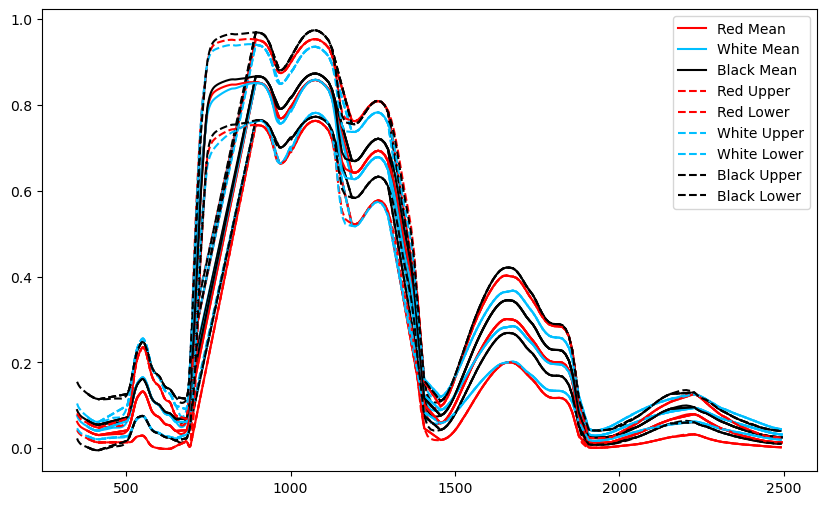

In [201]:
plt.figure(figsize=(10,6))

############################################

plt.plot(alt_red_only_bin, alt_red_only_means, color = 'red', label = "Red Mean")
plt.plot(alt_red_only_bin, alt_red_only_means_white, color = 'deepskyblue', label = "White Mean")
plt.plot(alt_red_only_bin, alt_red_only_means_black, color = 'black', label = "Black Mean")

plt.plot(alt_red_only_bin, alt_red_only_upper, color = 'red', label = "Red Upper", linestyle = '--')
plt.plot(alt_red_only_bin, alt_red_only_lower, color = 'red', label = "Red Lower", linestyle = '--')

plt.plot(alt_red_only_bin, alt_red_only_upper_white, color = 'deepskyblue', label = "White Upper", linestyle = '--')
plt.plot(alt_red_only_bin, alt_red_only_lower_white, color = 'deepskyblue', label = "White Lower", linestyle = '--')

plt.plot(alt_red_only_bin, alt_red_only_upper_black, color = 'black', label = "Black Upper", linestyle = '--')
plt.plot(alt_red_only_bin, alt_red_only_lower_black, color = 'black', label = "Black Lower", linestyle = '--')

#############################################

plt.plot(alt_red_white_overlap, alt_rw_red_means, color = 'red')
plt.plot(alt_red_white_overlap, alt_rw_white_means, color = 'deepskyblue')
plt.plot(alt_red_white_overlap, alt_rw_black_means, color = 'black')

plt.plot(alt_red_white_overlap, alt_rw_red_upper, color = 'red', linestyle = '--')
plt.plot(alt_red_white_overlap, alt_rw_red_lower, color = 'red', linestyle = '--')

plt.plot(alt_red_white_overlap, alt_rw_white_upper, color = 'deepskyblue', linestyle = '--')
plt.plot(alt_red_white_overlap, alt_rw_white_lower, color = 'deepskyblue', linestyle = '--')

plt.plot(alt_red_white_overlap, alt_rw_black_upper, color = 'black', linestyle = '--')
plt.plot(alt_red_white_overlap, alt_rw_black_lower, color = 'black', linestyle = '--')

##############################################

plt.plot(alt_red_black_overlap, alt_rb_red_means, color = 'red')
plt.plot(alt_red_black_overlap, alt_rb_white_means, color = 'deepskyblue')
plt.plot(alt_red_black_overlap, alt_rb_black_means, color = 'black')

plt.plot(alt_red_black_overlap, alt_rb_red_upper, color = 'red', linestyle = '--')
plt.plot(alt_red_black_overlap, alt_rb_red_lower, color = 'red', linestyle = '--')

plt.plot(alt_red_black_overlap, alt_rb_white_upper, color = 'deepskyblue', linestyle = '--')
plt.plot(alt_red_black_overlap, alt_rb_white_lower, color = 'deepskyblue', linestyle = '--')

plt.plot(alt_red_black_overlap, alt_rb_black_upper, color = 'black', linestyle = '--')
plt.plot(alt_red_black_overlap, alt_rb_black_lower, color = 'black', linestyle = '--')

##############################################

plt.plot(alt_red_white_black_overlap, alt_rbw_red_means, color = 'red')
plt.plot(alt_red_white_black_overlap, alt_rbw_white_means, color = 'deepskyblue')
plt.plot(alt_red_white_black_overlap, alt_rbw_black_means, color = 'black')

plt.plot(alt_red_white_black_overlap, alt_rbw_red_upper, color = 'red', linestyle = '--')
plt.plot(alt_red_white_black_overlap, alt_rbw_red_lower, color = 'red', linestyle = '--')

plt.plot(alt_red_white_black_overlap, alt_rbw_white_upper, color = 'deepskyblue', linestyle = '--')
plt.plot(alt_red_white_black_overlap, alt_rbw_white_lower, color = 'deepskyblue', linestyle = '--')

plt.plot(alt_red_white_black_overlap, alt_rbw_black_upper, color = 'black', linestyle = '--')
plt.plot(alt_red_white_black_overlap, alt_rbw_black_lower, color = 'black', linestyle = '--')

##############################################

plt.plot(alt_white_black_overlap, alt_wb_red_means, color = 'red')
plt.plot(alt_white_black_overlap, alt_wb_white_means, color = 'deepskyblue')
plt.plot(alt_white_black_overlap, alt_wb_black_means, color = 'black')

plt.plot(alt_white_black_overlap, alt_wb_red_upper, color = 'red', linestyle = '--')
plt.plot(alt_white_black_overlap, alt_wb_red_lower, color = 'red', linestyle = '--')

plt.plot(alt_white_black_overlap, alt_wb_white_upper, color = 'deepskyblue', linestyle = '--')
plt.plot(alt_white_black_overlap, alt_wb_white_lower, color = 'deepskyblue', linestyle = '--')

plt.plot(alt_white_black_overlap, alt_wb_black_upper, color = 'black', linestyle = '--')
plt.plot(alt_white_black_overlap, alt_wb_black_lower, color = 'black', linestyle = '--')

##############################################

plt.plot(alt_white_only_bin, alt_white_only_means_red, color = 'red')
plt.plot(alt_white_only_bin, alt_white_only_means, color = 'deepskyblue')
plt.plot(alt_white_only_bin, alt_white_only_means_black, color = 'black')

plt.plot(alt_white_only_bin, alt_white_only_upper_red, color = 'red', linestyle = '--')
plt.plot(alt_white_only_bin, alt_white_only_lower_red, color = 'red', linestyle = '--')

plt.plot(alt_white_only_bin, alt_white_only_upper, color = 'deepskyblue', linestyle = '--')
plt.plot(alt_white_only_bin, alt_white_only_lower, color = 'deepskyblue', linestyle = '--')

plt.plot(alt_white_only_bin, alt_white_only_upper_black, color = 'black', linestyle = '--')
plt.plot(alt_white_only_bin, alt_white_only_lower_black, color = 'black', linestyle = '--')

##############################################

plt.plot(alt_black_only_bin, alt_black_only_means_red, color = 'red')
plt.plot(alt_black_only_bin, alt_black_only_means_white, color = 'deepskyblue')
plt.plot(alt_black_only_bin, alt_black_only_means, color = 'black')

plt.plot(alt_black_only_bin, alt_black_only_upper_red, color = 'red', linestyle = '--')
plt.plot(alt_black_only_bin, alt_black_only_lower_red, color = 'red', linestyle = '--')

plt.plot(alt_black_only_bin, alt_black_only_upper_white, color = 'deepskyblue', linestyle = '--')
plt.plot(alt_black_only_bin, alt_black_only_lower_white, color = 'deepskyblue', linestyle = '--')

plt.plot(alt_black_only_bin, alt_black_only_upper, color = 'black', linestyle = '--')
plt.plot(alt_black_only_bin, alt_black_only_lower, color = 'black', linestyle = '--')

##############################################

plt.legend()
plt.show()


In [202]:
# this is not a good way of doing it - too many lines so will instead need to append all the lists into one bin list 
# before doing this I need to see how many wavelength bins belong to more than one category

In [203]:
# actually, a better idea is to just plot all of the means for all of the wavelength bins

alt_red_means = np.mean(altered_red, axis = 0)
white_means = np.mean(binned_white, axis = 0)
black_means = np.mean(binned_black, axis = 0)

alt_red_stdevs = np.std(altered_red, axis = 0)
white_stdevs = np.std(binned_white, axis = 0)
black_stdevs = np.std(binned_black, axis = 0)

alt_red_upper, alt_red_lower = range_finder(alt_red_means, alt_red_stdevs)
white_upper, white_lower = range_finder(white_means, white_stdevs)
black_upper, black_lower = range_finder(black_means, black_stdevs)


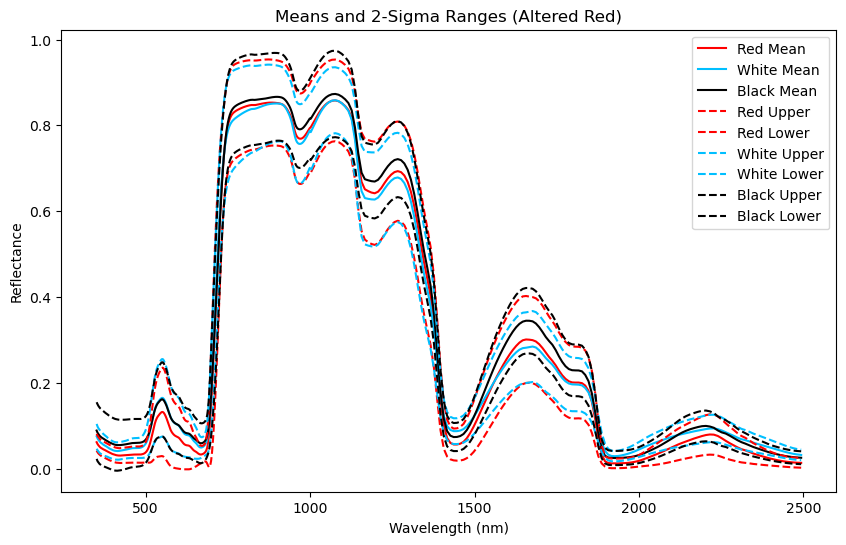

In [204]:
plt.figure(figsize = (10,6))

plt.plot(wavelength_bins, alt_red_means, color = 'red', label = "Red Mean")
plt.plot(wavelength_bins, white_means, color = 'deepskyblue', label = "White Mean")
plt.plot(wavelength_bins, black_means, color = 'black', label = "Black Mean")

plt.plot(wavelength_bins, alt_red_upper, color = 'red', label = "Red Upper", linestyle = '--')
plt.plot(wavelength_bins, alt_red_lower, color = 'red', label = "Red Lower", linestyle = '--')

plt.plot(wavelength_bins, white_upper, color = 'deepskyblue', label = "White Upper", linestyle = '--')
plt.plot(wavelength_bins, white_lower, color = 'deepskyblue', label = "White Lower", linestyle = '--')

plt.plot(wavelength_bins, black_upper, color = 'black', label = "Black Upper", linestyle = '--')
plt.plot(wavelength_bins, black_lower, color = 'black', label = "Black Lower", linestyle = '--')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend()
plt.title("Means and 2-Sigma Ranges (Altered Red)")
plt.savefig("means_and_stdevs.png", bbox_inches = 'tight', dpi = 1000)

plt.show()

In [205]:
original_red_means = np.mean(binned_red, axis = 0)
original_red_stdevs = np.std(binned_red, axis = 0)

original_red_upper, original_red_lower = range_finder(original_red_means, original_red_stdevs)

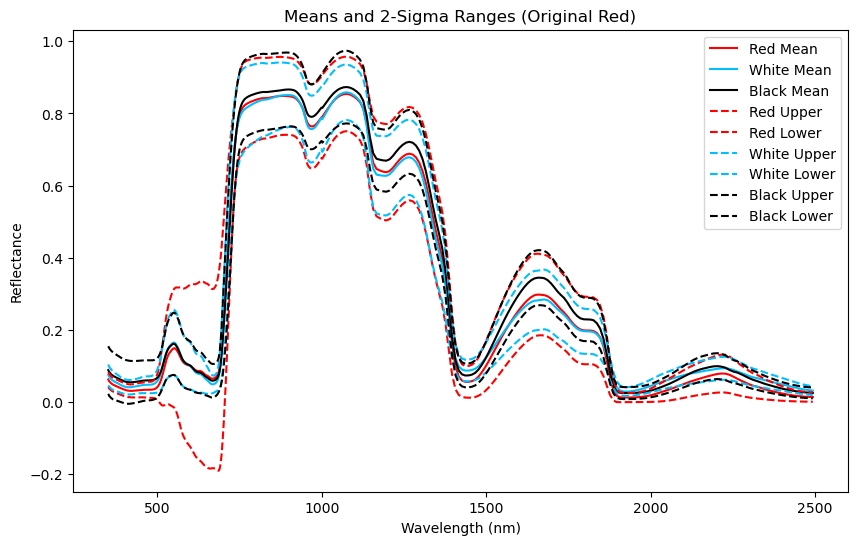

In [206]:
plt.figure(figsize = (10,6))

plt.plot(wavelength_bins, original_red_means, color = 'red', label = "Red Mean")
plt.plot(wavelength_bins, white_means, color = 'deepskyblue', label = "White Mean")
plt.plot(wavelength_bins, black_means, color = 'black', label = "Black Mean")

plt.plot(wavelength_bins, original_red_upper, color = 'red', label = "Red Upper", linestyle = '--')
plt.plot(wavelength_bins, original_red_lower, color = 'red', label = "Red Lower", linestyle = '--')

plt.plot(wavelength_bins, white_upper, color = 'deepskyblue', label = "White Upper", linestyle = '--')
plt.plot(wavelength_bins, white_lower, color = 'deepskyblue', label = "White Lower", linestyle = '--')

plt.plot(wavelength_bins, black_upper, color = 'black', label = "Black Upper", linestyle = '--')
plt.plot(wavelength_bins, black_lower, color = 'black', label = "Black Lower", linestyle = '--')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")

plt.legend()
plt.title("Means and 2-Sigma Ranges (Original Red)")
plt.savefig("og_red_means_and_stdevs.png", bbox_inches = 'tight', dpi = 1000)

plt.show()

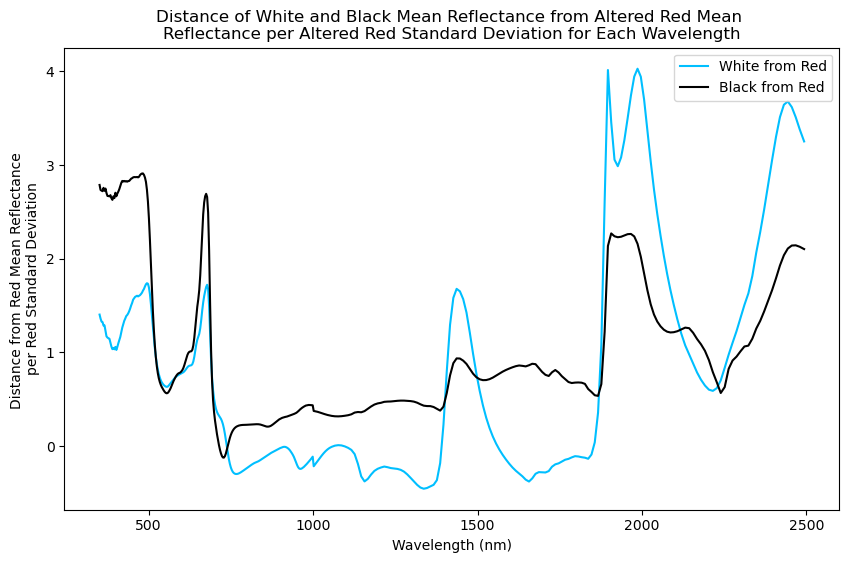

In [207]:
# distances from red
white_from_alt_red = (white_means - alt_red_means) / alt_red_stdevs
black_from_alt_red = (black_means - alt_red_means) / alt_red_stdevs

plt.figure(figsize = (10,6))

plt.plot(wavelength_bins, white_from_alt_red, color = 'deepskyblue', label = "White from Red")
plt.plot(wavelength_bins, black_from_alt_red, color = 'black', label = "Black from Red")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Distance from Red Mean Reflectance \nper Red Standard Deviation")

plt.title("Distance of White and Black Mean Reflectance from Altered Red Mean \nReflectance per Altered Red Standard Deviation for Each Wavelength")
plt.savefig("Fractional_dist_from_alt_red.png", bbox_inches = 'tight', dpi = 1000)

plt.legend()
plt.show()

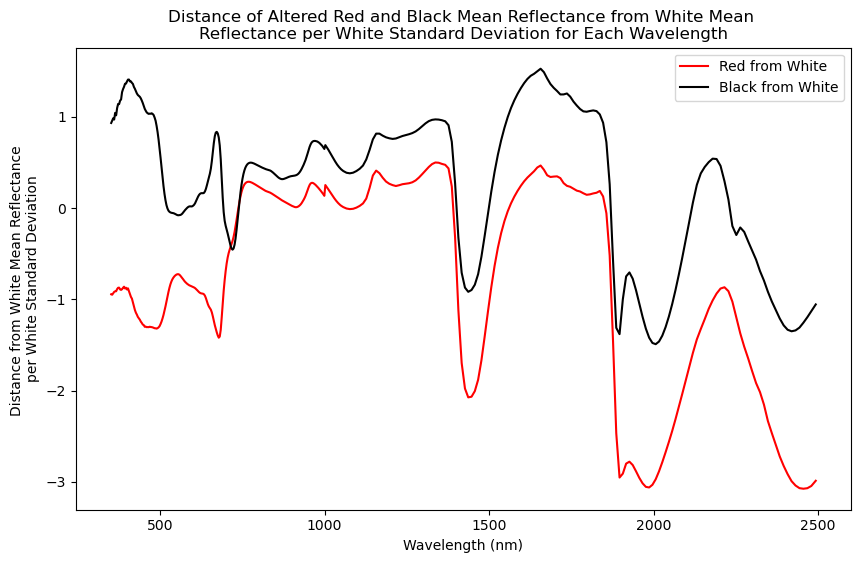

In [208]:
# distances from white
alt_red_from_white = (alt_red_means - white_means) / white_stdevs
black_from_white = (black_means - white_means) / white_stdevs

plt.figure(figsize = (10,6))

plt.plot(wavelength_bins, alt_red_from_white, color = 'red', label = "Red from White")
plt.plot(wavelength_bins, black_from_white, color = 'black', label = "Black from White")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Distance from White Mean Reflectance \nper White Standard Deviation")

plt.title("Distance of Altered Red and Black Mean Reflectance from White Mean \nReflectance per White Standard Deviation for Each Wavelength")
plt.savefig("Fractional_dist_from_white.png", bbox_inches = 'tight', dpi = 1000)

plt.legend()
plt.show()

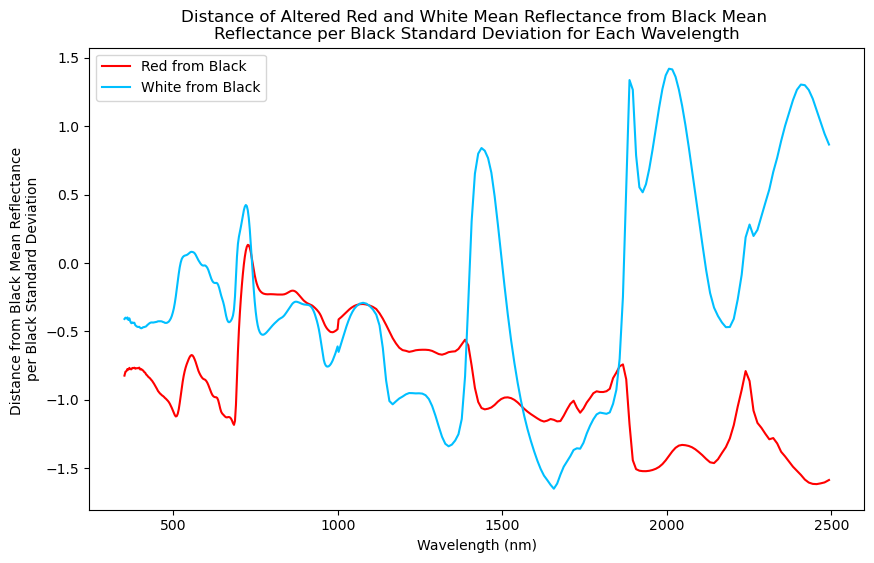

In [209]:
# distances from white
alt_red_from_black = (alt_red_means - black_means) / black_stdevs
white_from_black = (white_means - black_means) / black_stdevs

plt.figure(figsize = (10,6))

plt.plot(wavelength_bins, alt_red_from_black, color = 'red', label = "Red from Black")
plt.plot(wavelength_bins, white_from_black, color = 'deepskyblue', label = "White from Black")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Distance from Black Mean Reflectance \nper Black Standard Deviation")

plt.title("Distance of Altered Red and White Mean Reflectance from Black Mean \nReflectance per Black Standard Deviation for Each Wavelength")
plt.savefig("Fractional_dist_from_black.png", bbox_inches = 'tight', dpi = 1000)

plt.legend()
plt.show()

In [210]:
print(alt_white_black_overlap)

[384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 522.0, 525.0, 528.0, 531.0, 534.0, 537.0, 540.0, 543.0, 546.0, 549.0, 552.0, 555.0, 558.0, 561.0, 564.0, 567.0, 570.0, 573.0, 576.0, 579.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 684.0, 687.0, 690.0, 693.0, 696.0, 729.0, 732.0, 747.0, 750.0, 753.0, 756.0, 759.0, 762.0, 765.0, 768.0, 771.0, 774.0, 777.0, 780.0, 783.0, 786.0, 789.0, 792.0, 795.0, 798.0, 801.0, 804.0, 807.0, 810.0, 813.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.0, 864.0, 867.0, 870.0, 873.0, 876.0, 879.0, 882.0, 885.0, 888.0, 891.0, 894.0, 897.0, 900.0, 903.0, 906.0, 909.0, 912.0, 915.0, 918.0, 921.0, 924.0, 927.0, 930.0, 933.0, 936.0, 939.0, 942.0, 945.0, 948.0, 951.0, 954.0, 957.0, 960.0, 963.0, 966.0

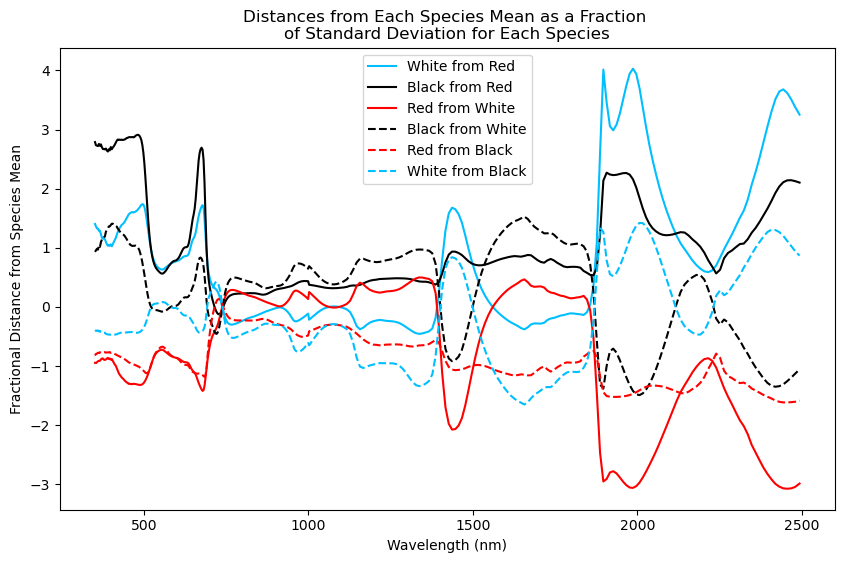

In [211]:
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, white_from_alt_red, color = 'deepskyblue', label = "White from Red")
plt.plot(wavelength_bins, black_from_alt_red, color = 'black', label = "Black from Red")

plt.plot(wavelength_bins, alt_red_from_white, color = 'red', label = "Red from White")
plt.plot(wavelength_bins, black_from_white, color = 'black', linestyle = '--', label = "Black from White")

plt.plot(wavelength_bins, alt_red_from_black, color = 'red', linestyle = '--', label = "Red from Black")
plt.plot(wavelength_bins, white_from_black, color = 'deepskyblue', linestyle = '--', label = "White from Black")


plt.ylabel("Fractional Distance from Species Mean")
plt.xlabel("Wavelength (nm)")

plt.legend()

plt.title("Distances from Each Species Mean as a Fraction \nof Standard Deviation for Each Species")
plt.savefig("all_alt_fractional_dist.png")
plt.show()

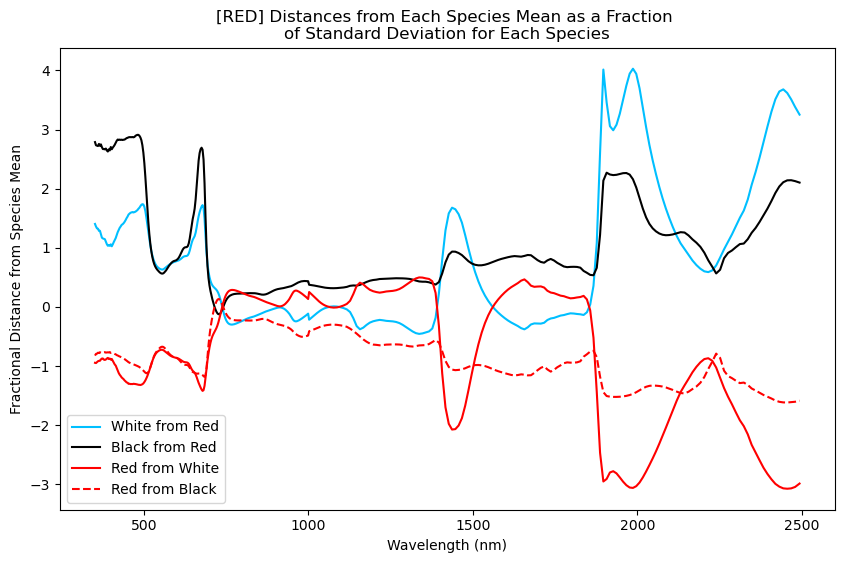

In [212]:
# decide best red areas from white and black
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, white_from_alt_red, color = 'deepskyblue', label = "White from Red")
plt.plot(wavelength_bins, black_from_alt_red, color = 'black', label = "Black from Red")

plt.plot(wavelength_bins, alt_red_from_white, color = 'red', label = "Red from White")

plt.plot(wavelength_bins, alt_red_from_black, color = 'red', linestyle = '--', label = "Red from Black")

plt.ylabel("Fractional Distance from Species Mean")
plt.xlabel("Wavelength (nm)")

plt.legend()

plt.title("[RED] Distances from Each Species Mean as a Fraction \nof Standard Deviation for Each Species")
plt.savefig("all_alt_fractional_dist_red.png")
plt.show()

In [213]:
all_alt_red_dist = [abs(white_from_alt_red), abs(black_from_alt_red), abs(alt_red_from_white), abs(alt_red_from_black)]

In [214]:
av_alt_red_dist = np.mean(all_alt_red_dist, axis = 0)
np.shape(av_alt_red_dist)

(372,)

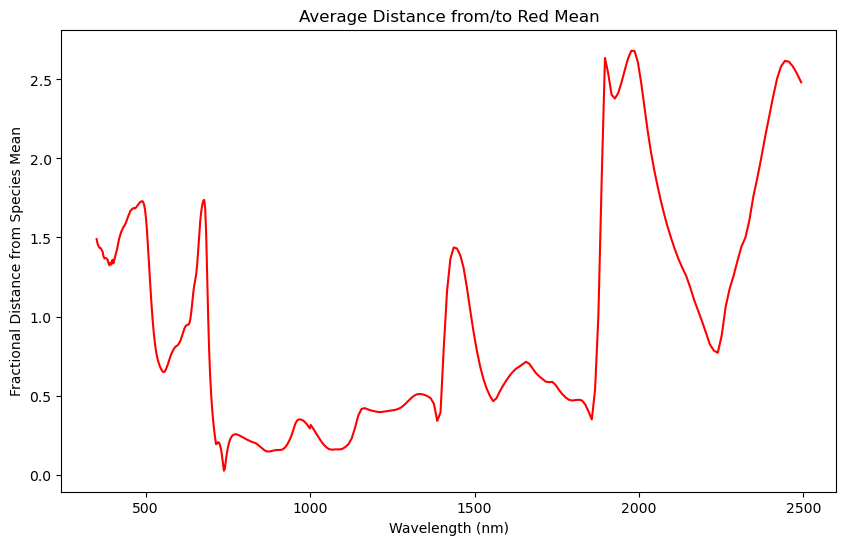

In [215]:
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, av_alt_red_dist, color = 'red')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Fractional Distance from Species Mean")

plt.title("Average Distance from/to Red Mean")
plt.savefig("av_dist_fromto_red.png", bbox_inches = 'tight', dpi = 1000)

plt.show()

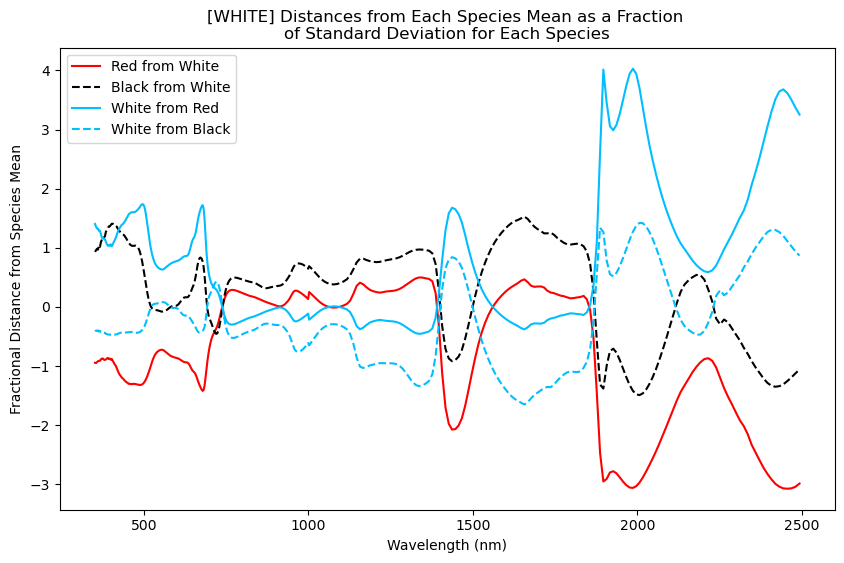

In [216]:
# decide best white areas from red and black
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, alt_red_from_white, color = 'red', label = "Red from White")
plt.plot(wavelength_bins, black_from_white, color = 'black', linestyle = '--', label = "Black from White")

plt.plot(wavelength_bins, white_from_alt_red, color = 'deepskyblue', label = "White from Red")

plt.plot(wavelength_bins, white_from_black, color = 'deepskyblue', linestyle = '--', label = "White from Black")

plt.ylabel("Fractional Distance from Species Mean")
plt.xlabel("Wavelength (nm)")

plt.legend()

plt.title("[WHITE] Distances from Each Species Mean as a Fraction \nof Standard Deviation for Each Species")
plt.savefig("all_alt_fractional_dist_white.png")
plt.show()

In [217]:
all_alt_white_dist = [abs(alt_red_from_white), abs(black_from_white), abs(white_from_alt_red), abs(white_from_black)]

In [218]:
av_alt_white_dist = np.mean(all_alt_white_dist, axis = 0)
np.shape(av_alt_white_dist)

(372,)

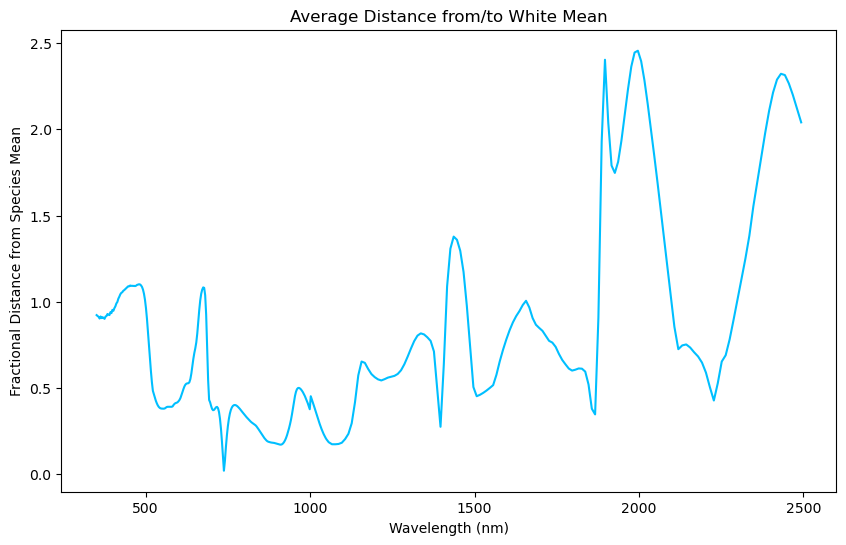

In [219]:
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, av_alt_white_dist, color = 'deepskyblue')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Fractional Distance from Species Mean")

plt.title("Average Distance from/to White Mean")
plt.savefig("av_dist_fromto_white.png", bbox_inches = 'tight', dpi = 1000)

plt.show()

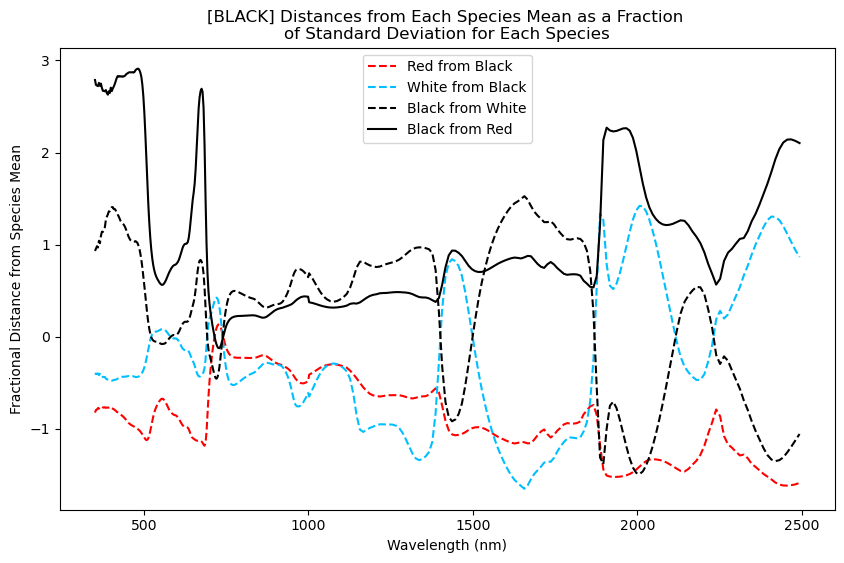

In [220]:
# decide best white areas from red and black
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, alt_red_from_black, color = 'red', linestyle = '--', label = "Red from Black")
plt.plot(wavelength_bins, white_from_black, color = 'deepskyblue', linestyle = '--', label = "White from Black")

plt.plot(wavelength_bins, black_from_white, color = 'black', linestyle = '--', label = "Black from White")

plt.plot(wavelength_bins, black_from_alt_red, color = 'black', label = "Black from Red")

plt.ylabel("Fractional Distance from Species Mean")
plt.xlabel("Wavelength (nm)")

plt.legend()

plt.title("[BLACK] Distances from Each Species Mean as a Fraction \nof Standard Deviation for Each Species")
plt.savefig("all_alt_fractional_dist_black.png")
plt.show()

In [221]:
all_alt_black_dist = [abs(alt_red_from_black), abs(white_from_black), abs(black_from_white), abs(black_from_alt_red)]

In [222]:
av_alt_black_dist = np.mean(all_alt_black_dist, axis = 0)
np.shape(av_alt_black_dist)

(372,)

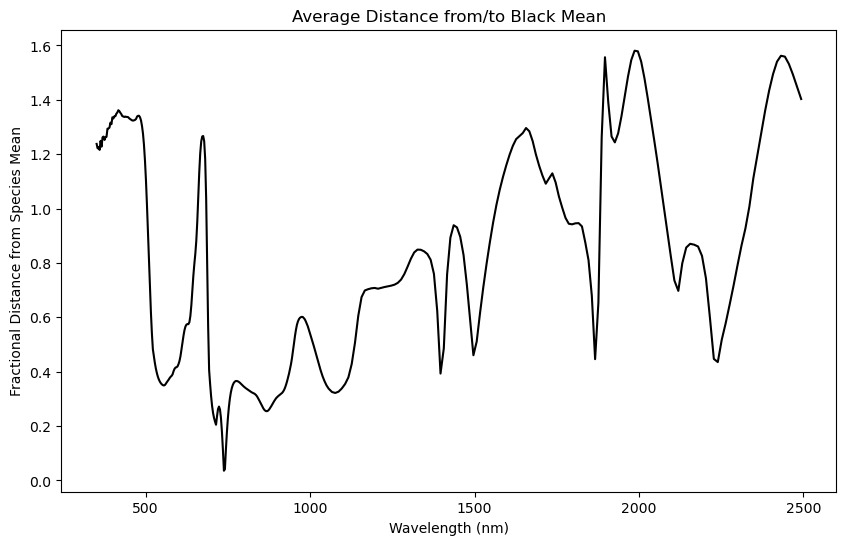

In [223]:
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, av_alt_black_dist, color = 'black')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Fractional Distance from Species Mean")

plt.title("Average Distance from/to Black Mean")
plt.savefig("av_dist_fromto_black.png", bbox_inches = 'tight', dpi = 1000)

plt.show()

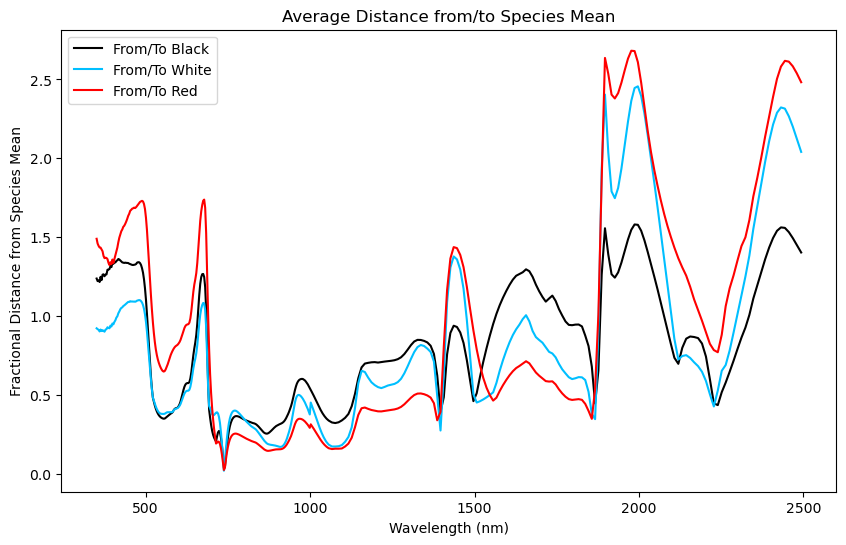

In [224]:
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, av_alt_black_dist, color = 'black', label = 'From/To Black')
plt.plot(wavelength_bins, av_alt_white_dist, color = 'deepskyblue', label = 'From/To White')
plt.plot(wavelength_bins, av_alt_red_dist, color = 'red', label = 'From/To Red')


plt.xlabel("Wavelength (nm)")
plt.ylabel("Fractional Distance from Species Mean")
plt.legend()
plt.title("Average Distance from/to Species Mean")
plt.savefig("av_dist_fromto_all.png", bbox_inches = 'tight', dpi = 1000)

plt.show()

In [225]:
max_white_from_bg = np.max(av_alt_white_dist)
max_red_from_bg = np.max(av_alt_red_dist)

print(max_red_from_bg)
print(max_white_from_bg)

2.6819650199139917
2.4562256180424193


In [226]:
index_max_red = np.where(av_alt_red_dist == max_red_from_bg)
index_max_white = np.where(av_alt_white_dist == max_white_from_bg)

In [227]:
wavelength_where_red_max = wavelength_bins[index_max_red]
wavelength_where_white_max = wavelength_bins[index_max_white]

print(wavelength_where_red_max)
print(wavelength_where_white_max)

[1976.5]
[1996.5]


In [228]:
print(alt_binned_red_p[index_max_red])
print(alt_binned_red_var[index_max_red])

print(alt_binned_black_p[index_max_red])
print(binned_black_var[index_max_red])

print(alt_binned_white_p[index_max_red])
print(binned_white_var[index_max_red])

[3.22626849e-102]
[3.33898333e-05]
[0.02188232]
[7.53080195e-05]
[7.57970297e-75]
[5.56993751e-05]


In [229]:
print(alt_binned_red_p[index_max_white])
print(alt_binned_red_var[index_max_white])

print(alt_binned_black_p[index_max_white])
print(binned_black_var[index_max_white])

print(alt_binned_white_p[index_max_white])
print(binned_white_var[index_max_white])

[6.26142372e-95]
[4.28923563e-05]
[0.41987189]
[8.4175175e-05]
[5.47201089e-88]
[7.25711149e-05]


In [230]:
alt_red_spec_id = []
for i in red_altered_indices:
    alt_red_spec_id.append(data_array[i,0])

In [231]:
#split the spectra
alt_red_spec = np.linspace(0,1000,num_red_alt)
white_spec = np.linspace(0,1000,num_white)
black_spec = np.linspace(0,1000,num_black)

In [232]:
print(len(alt_red_spec))
print(num_red_alt)

233
233


In [233]:
#alt_red = altered_red[:, index]
#alt_red=alt_red[:,0,0]
#print(np.shape(alt_red))

In [234]:
alt_red_std_err = alt_red_stdevs / np.sqrt(num_red_alt)
og_red_std_err = original_red_stdevs / np.sqrt(num_red)
white_std_err = white_stdevs / np.sqrt(num_white)
black_std_err = black_stdevs / np.sqrt(num_black)

print(np.size(alt_red_std_err))

372


In [235]:
def is_closest(array1, array2):
    diff = []
    index1 = []
    index2 = []

    for i in range(0, len(array1)):
            for j in range(0,len(array2)):
                diff.append(abs(array1 - array2))
                index1.append(i)
                index2.append(j)
        
    closest = np.min(diff)
    cl_ind = np.where(diff == closest)

    arr1_val = array1[cl_ind]
    arr2_val = array2[cl_ind]

    av_val = np.average([arr1_val, arr2_val])

    return av_val

In [236]:
def is_closest_upg(array1,array2):
    len1 = len(array1)
    len2 = len(array2)
    abs_diff = np.zeros((len1, len2))
    for i in range(0,len1):
        abs_diff[i] = abs(array1[i] - array2.T)
    # take abs so that can order appropriately
    
    closest = np.min(abs_diff)

    cl_ind = np.where(abs_diff == closest)

    arr1_val = array1[cl_ind[0][0]]
    arr2_val = array2[cl_ind[1][0]]

    av_val = np.average([arr1_val, arr2_val])
    print(arr1_val,arr2_val, closest)
    return av_val


In [342]:
def is_closest_new(array1,array2):
    len1 = len(array1)
    len2 = len(array2)
    abs_diff = abs(np.subtract.outer(array1, array2))
    # take abs so that can order appropriately
    closest = np.min(abs_diff)

    cl_ind = np.where(abs_diff == closest)

    arr1_val = array1[cl_ind[0][0]]
    arr2_val = array2[cl_ind[1][0]]

    av_val = np.average([arr1_val, arr2_val])
    print(arr1_val,arr2_val, closest)
    return av_val

In [238]:
def dist_plotter(wavelength):
    index = np.where(wavelength_bins == wavelength)
    alt_red = altered_red[:, index]
    alt_red = alt_red[:,0,0]
    alt_red_err = alt_red_std_err[index]

    white = binned_white[:, index]
    white = white[:,0,0]
    white_err = white_std_err[index]

    black = binned_black[:, index]
    black = black[:,0,0]
    black_err = black_std_err[index]

    mean_red = mean_finder(alt_red)
    mean_white = mean_finder(white)
    mean_black = mean_finder(black)

    stdev_red = stdev_finder(alt_red)
    stdev_white = stdev_finder(white)
    stdev_black = stdev_finder(black)

    x_red = np.linspace(mean_red - 3*stdev_red, mean_red + 3*stdev_red, 10000)
    x_white = np.linspace(mean_white - 3*stdev_white, mean_white + 3*stdev_white, 10000)
    x_black = np.linspace(mean_black - 3*stdev_black, mean_black + 3*stdev_black, 10000)

    norm_red = stats.norm.pdf(x_red, mean_red, stdev_red) / num_red_alt
    norm_white = stats.norm.pdf(x_white, mean_white, stdev_white) / num_white
    norm_black = stats.norm.pdf(x_black, mean_black, stdev_black) / num_black

    if wavelength < 1050:
        wavelength_err = 1.5
    if 1050 < wavelength <= 2100:
        wavelength_err = 5
    if 2100 < wavelength <= 2485:
        wavelength_err = 6
    if 2485 < wavelength <= 2500:
        wavelength_err = 7.5

    fig, axs = plt.subplots(1,2,sharey = True, figsize = (10,6))
    
    axs[0].errorbar(alt_red_spec, alt_red, yerr = alt_red_err, color = 'red', label = "Red", fmt='o', markersize = 2)
    axs[0].errorbar(white_spec, white, yerr = white_err, color = 'deepskyblue', label = "White", fmt = 'o', markersize = 2)
    axs[0].errorbar(black_spec, black, yerr = black_err, color = 'Black', label = "Black", fmt = 'o', markersize = 2)
    axs[0].set_ylabel('Reflectance')
    axs[0].set_xlabel('\nSpectra ID')
    axs[0].set_xticks([])

    redy, redx, _ = axs[1].hist(alt_red, bins = 20, color = 'red',edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal', alpha = 0.5)

    ax3 = axs[1].twiny()

    maxs = [np.max(norm_red), np.max(norm_white), np.max(norm_black)]

    ax3.set_xlim([0,0.05 + np.max(maxs)])
    ax3.set_xlabel('Probability Density')
    ax3.plot(norm_red, x_red, color = 'red', label = "Red Normal Distribution")

    whitey, whitex, _ = axs[1].hist(white, bins = 20, color = 'deepskyblue', edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal', alpha = 0.5)

    ax3.plot(norm_white, x_white, color = 'deepskyblue', label = "White Normal Distribution")



    blacky, blackx, _ = axs[1].hist(black, bins = 20, color = 'black', edgecolor = 'grey', linewidth = 0.8, orientation = 'horizontal', alpha = 0.5)

    ax3.plot(norm_black, x_black, color = 'Black', label = "Black Normal Distribution")

    max_x = [np.max(redy), np.max(whitey), np.max(blacky)]

    axs[1].set_xlabel('Frequency')
    axs[1].set_xlim(0, (0.05+np.max(maxs))/np.max(maxs) * np.max(max_x))

    axs[0].legend(loc = "lower right")
    ax3.legend()
    
    fig.suptitle(f'{wavelength} ± {wavelength_err} nm Bin Spectrum')
    
    plt.subplots_adjust(wspace = 0)

    plt.savefig(f'{wavelength}_nm_bin_spectrum.png', bbox_inches = 'tight', dpi = 1000)
    #print(np.max(max_x), np.maxs)

    plt.show()
    
    print(f"Red = White at {is_closest_new(x_red,x_white)}")
    print(f'Red = Black at {is_closest_new(x_red, x_black)}')
    print(f'White = Black at {is_closest_new(x_white, x_black)}')


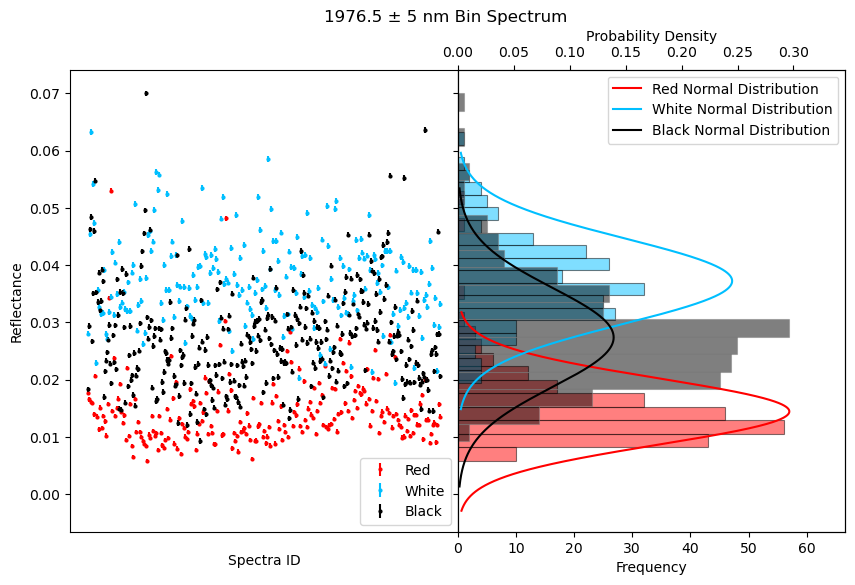

0.02314889270228681 0.02314889285741337 1.5512656090233001e-10
Red = White at 0.02314889277985009
0.014352142196617053 0.014352142287238188 9.062113559554774e-11
Red = Black at 0.01435214224192762
0.030260542312887093 0.030260542554771563 2.4188447078632436e-10
White = Black at 0.030260542433829328


In [239]:
dist_plotter(1976.5)

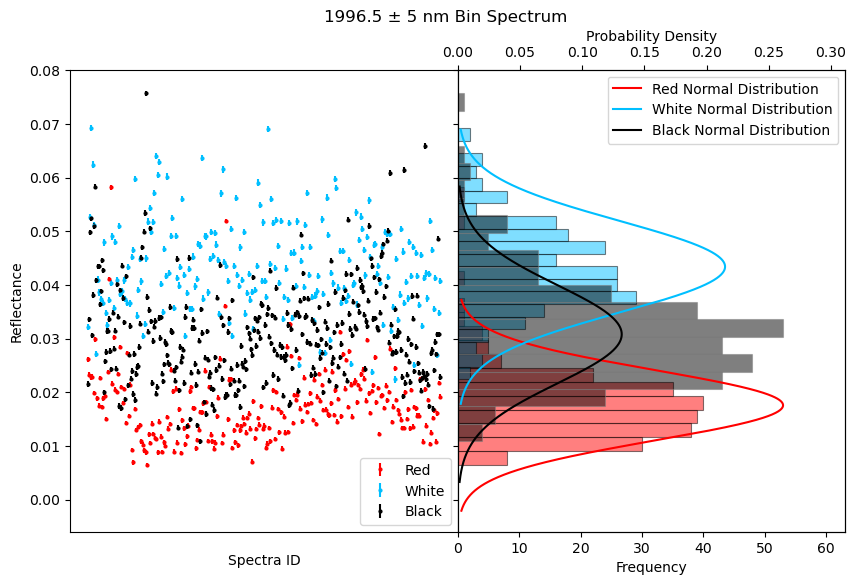

0.029878431465657804 0.029878431269205537 1.9645226764786194e-10
Red = White at 0.029878431367431672
0.0033867843311037775 0.003386784343699918 1.259614027665501e-11
Red = Black at 0.0033867843374018477
0.03309377365021077 0.033093773442691946 2.0751882157110657e-10
White = Black at 0.033093773546451356


In [240]:
dist_plotter(1996.5)

In [241]:
white_1976 = binned_white[:, index_max_red]
white_1976 = white_1976[:,0,0]
correct_white = []
wrong_white = []
for i in range(0, num_white):
    if white_1976[i] > 0.023:
        correct_white.append(i)

    if white_1976[i] < 0.023:
        wrong_white.append(i)

print(num_white)
print(len(correct_white))
print(len(wrong_white))
print(len(wrong_white)/num_white * 100)

218
210
8
3.669724770642202


In [242]:
alt_red_1976 = altered_red[:, index_max_red]
alt_red_1976 = alt_red_1976[:,0,0]
correct_alt_red = []
wrong_alt_red = []
for i in range(0, num_red_alt):
    if alt_red_1976[i] < 0.023:
        correct_alt_red.append(i)

    if alt_red_1976[i] > 0.023:
        wrong_alt_red.append(i)

print(num_red_alt)
print(len(correct_alt_red))
print(len(wrong_alt_red))
print(len(wrong_alt_red)/num_red_alt * 100)

233
218
15
6.437768240343347


In [243]:
black_lt_w_and_ar = []
black_gt_w_and_ar = []

for i in range(0, len(wavelength_bins)):
    if black_means[i] < white_means[i]:
        if black_means[i] < alt_red_means[i]:
            black_lt_w_and_ar.append(wavelength_bins[i])

    if black_means[i] > white_means[i]:
        if black_means[i] > alt_red_means[i]:
            black_gt_w_and_ar.append(wavelength_bins[i])

In [244]:
print(black_lt_w_and_ar)
print(black_gt_w_and_ar)

print(len(black_lt_w_and_ar))
print(len(black_gt_w_and_ar))

[717.0, 720.0, 723.0, 726.0, 729.0, 732.0, 735.0, 738.0]
[351.0, 354.0, 357.0, 360.0, 363.0, 366.0, 369.0, 372.0, 375.0, 378.0, 381.0, 384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 420.0, 423.0, 426.0, 429.0, 432.0, 435.0, 438.0, 441.0, 444.0, 447.0, 450.0, 453.0, 456.0, 459.0, 462.0, 465.0, 468.0, 471.0, 474.0, 477.0, 480.0, 483.0, 486.0, 489.0, 492.0, 495.0, 498.0, 501.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 654.0, 657.0, 660.0, 663.0, 666.0, 669.0, 672.0, 675.0, 678.0, 681.0, 684.0, 687.0, 690.0, 741.0, 744.0, 747.0, 750.0, 753.0, 756.0, 759.0, 762.0, 765.0, 768.0, 771.0, 774.0, 777.0, 780.0, 783.0, 786.0, 789.0, 792.0, 795.0, 798.0, 801.0, 804.0, 807.0, 810.0, 813.0, 816.0, 819.0, 822.0, 825.0, 828.0, 831.0, 834.0, 837.0, 840.0, 843.0, 846.0, 849.0, 852.0, 855.0, 858.0, 861.

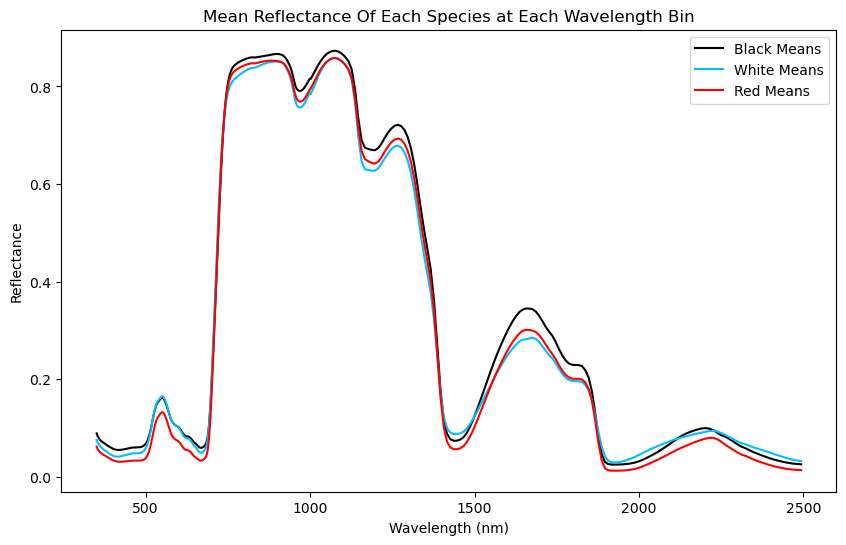

In [245]:
plt.figure(figsize=(10,6))

plt.plot(wavelength_bins, black_means, color = 'black', label = 'Black Means')
plt.plot(wavelength_bins, white_means, color = 'deepskyblue', label = 'White Means')
plt.plot(wavelength_bins, alt_red_means, color = 'red', label = 'Red Means')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")

plt.legend()

plt.title("Mean Reflectance Of Each Species at Each Wavelength Bin")
plt.savefig("means_each_species.png", bbox_inches = 'tight', dpi = 1000)

plt.show()

In [246]:
b_outside = np.hstack((black_lt_w_and_ar, black_gt_w_and_ar))
len(b_outside)

288

In [247]:
ind_b_out = []
for i in range(0, len(b_outside)):
    ind_b_out.append(np.where(wavelength_bins == b_outside[i]))

print(len(ind_b_out))

288


In [248]:
b_out_av_d_black = av_alt_black_dist[ind_b_out]
print(len(b_out_av_d_black))

288


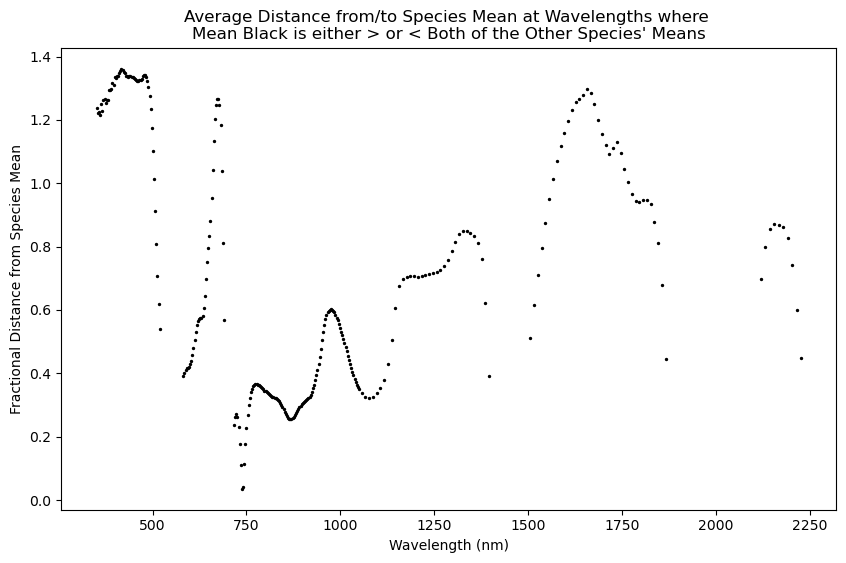

In [249]:
plt.figure(figsize=(10,6))

plt.scatter(wavelength_bins[ind_b_out], b_out_av_d_black, color = 'black', s = 2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Fractional Distance from Species Mean")
plt.title("Average Distance from/to Species Mean at Wavelengths where \nMean Black is either > or < Both of the Other Species' Means")
plt.savefig("av_dist_black_gt_lt.png", bbox_inches = 'tight', dpi =1000)
plt.show()

In [250]:
max_b_out_av_d_black = np.max(b_out_av_d_black)
print(max_b_out_av_d_black)

ind_max_b_out_av_d = np.where(b_out_av_d_black == max_b_out_av_d_black)
print(ind_max_b_out_av_d)
bin_max_b_out_av_d = b_outside[ind_max_b_out_av_d[0]]
print(bin_max_b_out_av_d)

1.3616253486645393
(array([30]), array([0]), array([0]))
[417.]


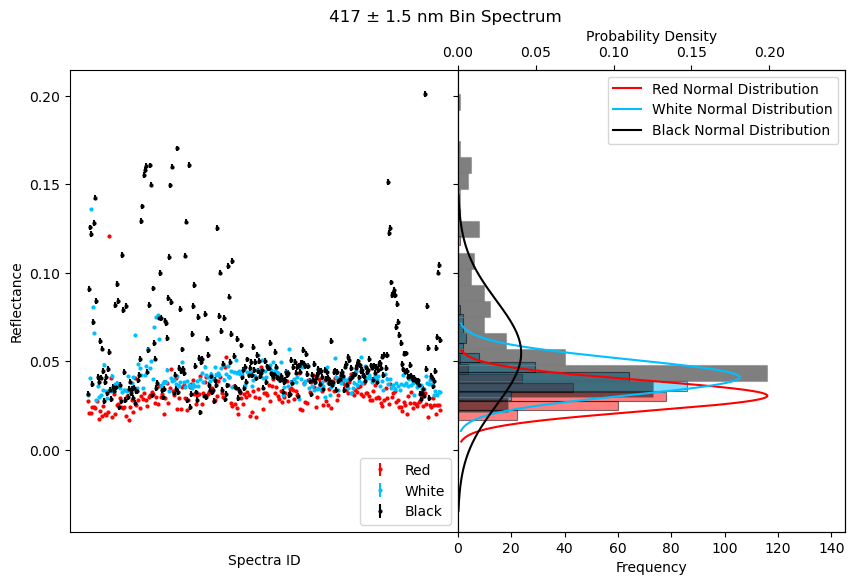

0.02937230259823748 0.029372302263944997 3.3429248258443067e-10
Red = White at 0.02937230243109124
0.02413795645106217 0.024137956473194597 2.213242783488667e-11
Red = Black at 0.024137956462128383
0.012625574763977071 0.012625574689502907 7.44741646824254e-11
White = Black at 0.012625574726739988


In [251]:
dist_plotter(417)

In [252]:
print(alt_binned_red_p[ind_max_b_out_av_d[0]])
print(alt_binned_red_var[ind_max_b_out_av_d[0]])

print(alt_binned_black_p[ind_max_b_out_av_d[0]])
print(binned_black_var[ind_max_b_out_av_d[0]])

print(alt_binned_white_p[ind_max_b_out_av_d[0]])
print(binned_white_var[ind_max_b_out_av_d[0]])

[3.48685034e-33]
[8.01543571e-05]
[5.05459613e-34]
[0.00082397]
[0.27852448]
[0.00010736]


In [253]:
above_1_sig = 0
below_1_sig = 0
for ref in binned_black[:,ind_max_b_out_av_d[0]]:
    if ref > black_means[ind_max_b_out_av_d[0]] + black_stdevs[ind_max_b_out_av_d[0]]:
        above_1_sig += 1
    if ref < black_means[ind_max_b_out_av_d[0]] - black_stdevs[ind_max_b_out_av_d[0]]:
        below_1_sig += 1

print(num_black)
print(above_1_sig)
print(above_1_sig/num_black)

print(below_1_sig)
print(below_1_sig/num_black)

330
42
0.12727272727272726
3
0.00909090909090909


In [254]:
perc_1_sig_b = []

for i in range(0, len(wavelength_bins)):
    above_1_sig = 0
    below_1_sig = 0
    for ref in binned_black[:,i]:
        if ref > black_means[i] + black_stdevs[i]:
            above_1_sig += 1
        if ref < black_means[i] - black_stdevs[i]:
            below_1_sig += 1

    total_in_1_sig = num_black - above_1_sig - below_1_sig
    perc = total_in_1_sig / num_black * 100
    perc_1_sig_b.append(perc)

print(len(perc_1_sig_b))

372


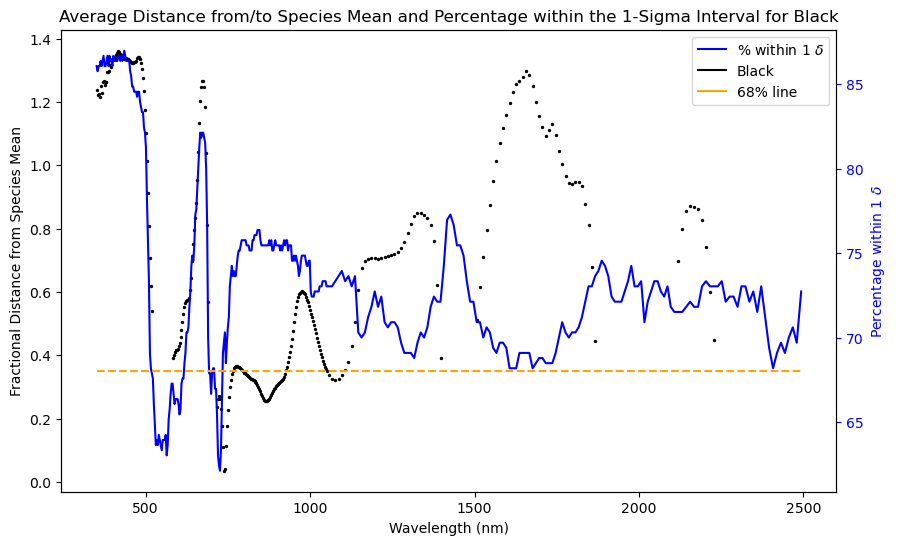

In [255]:
fig, ax1 = plt.subplots(figsize=(10,6))

line1 = ax1.scatter(wavelength_bins[ind_b_out], b_out_av_d_black, color = 'black', s = 2, label = 'Black')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel("Fractional Distance from Species Mean", color = 'black')
ax1.tick_params('y', colors='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelength_bins, perc_1_sig_b, color = 'blue', label = r'% within 1 $ \delta $')
ax2.plot(wavelength_bins, [68] * len(wavelength_bins), color = 'orange', label = "68% line", linestyle = 'dashed')
ax2.set_ylabel(r'Percentage within 1 $ \delta $', color='blue')
ax2.tick_params('y', colors='blue')

legend_perc = mlines.Line2D([], [], color='blue', label=r'% within 1 $ \delta $')
legend_data = mlines.Line2D([], [], color='black', label='Black')
legend_68 = mlines.Line2D([], [], color='orange', label='68% line')

# Combine the legend for both lines
plt.legend(handles=[legend_perc, legend_data, legend_68], loc='upper right')

plt.title("Average Distance from/to Species Mean and Percentage within the 1-Sigma Interval for Black")
plt.savefig("av_dist_black_gt_lt_with_perc1sig.png", bbox_inches = 'tight', dpi = 1000)
plt.show()

In [256]:
av_dist_1500_2000 = []
bins_1500_2000 = []
for i in range(0,len(b_outside)):
    if 1500 < b_outside[i] < 2000:
        bins_1500_2000.append(b_outside[i])
        av_dist_1500_2000.append(b_out_av_d_black[i])
        
print(np.shape(b_outside))
print(len(av_dist_1500_2000))
print(np.shape(av_dist_1500_2000))
print(av_dist_1500_2000)
print(len(bins_1500_2000))

(288,)
37
(37, 1, 1)
[array([[0.51086093]]), array([[0.61433707]]), array([[0.7099429]]), array([[0.79656531]]), array([[0.87603896]]), array([[0.94911204]]), array([[1.01362904]]), array([[1.06891363]]), array([[1.11689216]]), array([[1.15941067]]), array([[1.19796842]]), array([[1.23099265]]), array([[1.25548687]]), array([[1.26642262]]), array([[1.27754077]]), array([[1.29625661]]), array([[1.28428196]]), array([[1.24871682]]), array([[1.19907361]]), array([[1.15696977]]), array([[1.12105924]]), array([[1.09140793]]), array([[1.1110348]]), array([[1.1294838]]), array([[1.0960265]]), array([[1.04430301]]), array([[1.00341852]]), array([[0.96569021]]), array([[0.94405275]]), array([[0.94197225]]), array([[0.94563818]]), array([[0.94633894]]), array([[0.93429653]]), array([[0.87623016]]), array([[0.80990437]]), array([[0.67948235]]), array([[0.44598359]])]
37


In [257]:
print(len(b_out_av_d_black))
print(len(b_outside))
print(b_outside)

288
288
[ 717.   720.   723.   726.   729.   732.   735.   738.   351.   354.
  357.   360.   363.   366.   369.   372.   375.   378.   381.   384.
  387.   390.   393.   396.   399.   402.   405.   408.   411.   414.
  417.   420.   423.   426.   429.   432.   435.   438.   441.   444.
  447.   450.   453.   456.   459.   462.   465.   468.   471.   474.
  477.   480.   483.   486.   489.   492.   495.   498.   501.   504.
  507.   510.   513.   516.   519.   582.   585.   588.   591.   594.
  597.   600.   603.   606.   609.   612.   615.   618.   621.   624.
  627.   630.   633.   636.   639.   642.   645.   648.   651.   654.
  657.   660.   663.   666.   669.   672.   675.   678.   681.   684.
  687.   690.   741.   744.   747.   750.   753.   756.   759.   762.
  765.   768.   771.   774.   777.   780.   783.   786.   789.   792.
  795.   798.   801.   804.   807.   810.   813.   816.   819.   822.
  825.   828.   831.   834.   837.   840.   843.   846.   849.   852.
  855.   858

In [258]:
max_b_out_1500_2000 = np.max(av_dist_1500_2000)
print(max_b_out_1500_2000)

ind_max_1500_2000 = np.where(av_dist_1500_2000 == max_b_out_1500_2000)
print(ind_max_1500_2000[0][0])

wave_1500_2000_max = bins_1500_2000[ind_max_1500_2000[0][0]]
print(wave_1500_2000_max)

1.2962566110773017
15
1656.5


In [368]:
def dist_plotter(wavelength):
    index = np.where(wavelength_bins == wavelength)
    alt_red = altered_red[:, index]
    alt_red = alt_red[:,0,0]
    alt_red_err = alt_red_std_err[index]

    white = binned_white[:, index]
    white = white[:,0,0]
    white_err = white_std_err[index]

    black = binned_black[:, index]
    black = black[:,0,0]
    black_err = black_std_err[index]

    mean_red = mean_finder(alt_red)
    mean_white = mean_finder(white)
    mean_black = mean_finder(black)

    stdev_red = stdev_finder(alt_red)
    stdev_white = stdev_finder(white)
    stdev_black = stdev_finder(black)

    x_red = np.linspace(mean_red - 3*stdev_red, mean_red + 3*stdev_red, 10000)
    x_white = np.linspace(mean_white - 3*stdev_white, mean_white + 3*stdev_white, 10000)
    x_black = np.linspace(mean_black - 3*stdev_black, mean_black + 3*stdev_black, 10000)

    norm_red = stats.norm.pdf(x_red, mean_red, stdev_red) / num_red_alt
    norm_white = stats.norm.pdf(x_white, mean_white, stdev_white) / num_white
    norm_black = stats.norm.pdf(x_black, mean_black, stdev_black) / num_black

    if wavelength <= 1050:
        wavelength_err = 1.5
    if 1050 < wavelength <= 2100:
        wavelength_err = 5
    if 2100 < wavelength <= 2485:
        wavelength_err = 6
    if 2485 < wavelength <= 2500:
        wavelength_err = 7.5

    fig, axs = plt.subplots(1,2,sharey = True, figsize = (10,6))
    
    axs[0].errorbar(alt_red_spec, alt_red, yerr = alt_red_err, color = 'red', label = "Red", fmt='o', markersize = 2)
    axs[0].errorbar(white_spec, white, yerr = white_err, color = 'deepskyblue', label = "White", fmt = 'o', markersize = 2)
    axs[0].errorbar(black_spec, black, yerr = black_err, color = 'Black', label = "Black", fmt = 'o', markersize = 2)
    axs[0].set_ylabel('Reflectance')
    axs[0].set_xlabel('\nSpectra ID')
    axs[0].set_xticks([])

    redy, redx, _ = axs[1].hist(alt_red, bins = 20, color = 'red',edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal')

    ax3 = axs[1].twiny()

    maxs = [np.max(norm_red), np.max(norm_white), np.max(norm_black)]

    ax3.set_xlim([0,0.05 + np.max(maxs)])
    ax3.set_xlabel('Probability Density')
    ax3.plot(norm_red, x_red, color = 'red', label = "Red Normal Distribution")

    whitey, whitex, _ = axs[1].hist(white, bins = 20, color = 'deepskyblue', edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal', alpha = 0.7)

    ax3.plot(norm_white, x_white, color = 'deepskyblue', label = "White Normal Distribution")



    blacky, blackx, _ = axs[1].hist(black, bins = 20, color = 'black', edgecolor = 'grey', linewidth = 0.8, orientation = 'horizontal', alpha = 0.5)

    ax3.plot(norm_black, x_black, color = 'Black', label = "Black Normal Distribution")

    max_x = [np.max(redy), np.max(whitey), np.max(blacky)]

    axs[1].set_xlabel('Frequency')
    axs[1].set_xlim(0, (0.01+np.max(maxs))/np.max(maxs) * np.max(max_x))

    axs[0].legend(loc = "lower right")
    ax3.legend()
    
    fig.suptitle(f'{wavelength} ± {wavelength_err} nm Bin Spectrum')
    
    plt.subplots_adjust(wspace = 0)

    plt.savefig(f'{wavelength}_nm_bin_spectrum.png', bbox_inches = 'tight', dpi = 1000)
    #print(np.max(max_x), np.maxs)

    plt.show()
    
    print(f"Red = White at {is_closest_new(x_red,x_white)}")
    print(f'Red = Black at {is_closest_new(x_red, x_black)}')
    print(f'White = Black at {is_closest_new(x_white, x_black)}')

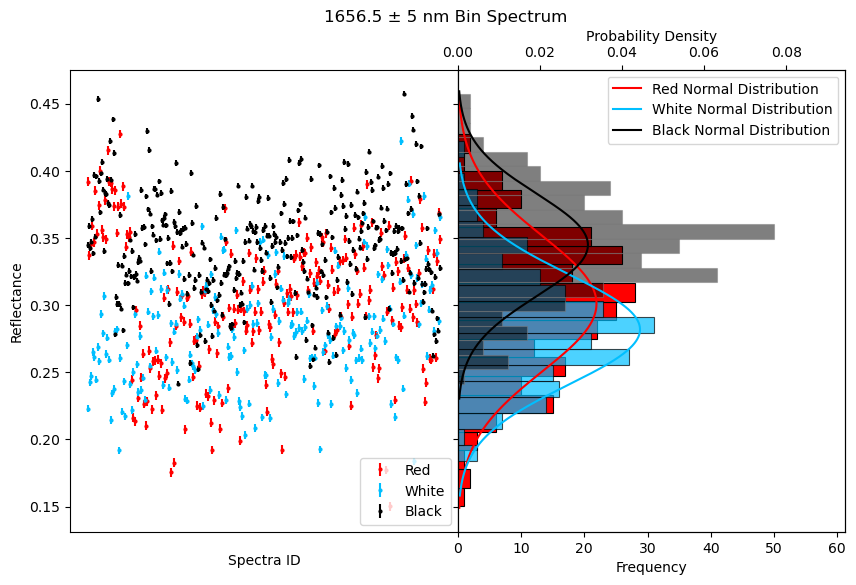

0.16692968661565336 0.1669296870804818 4.648284535058167e-10
Red = White at 0.16692968684806758
0.34035299193765367 0.3403529930555919 1.117938241979033e-09
Red = Black at 0.34035299249662276
0.33911727897772415 0.33911727701243105 1.9652930949298764e-09
White = Black at 0.3391172779950776


In [369]:
dist_plotter(1656.5)

In [261]:
ind_1656 = np.where(wavelength_bins == 1656.5)

white_1656 = binned_white[:, ind_1656]
white_1656 = white_1656[:,0,0]
correct_white = []
wrong_white = []
for i in range(0, num_white):
    if white_1656[i] < 0.34:
        correct_white.append(i)

    if white_1656[i] > 0.34:
        wrong_white.append(i)

print(num_white)
print(len(correct_white))
print(len(wrong_white))
print(len(wrong_white)/num_white * 100)

218
197
21
9.63302752293578


In [262]:
black_1656 = binned_black[:, ind_1656]
black_1656 = black_1656[:,0,0]
correct_black = []
wrong_black = []
for i in range(0, num_black):
    if black_1656[i] > 0.34:
        correct_black.append(i)

    if black_1656[i] < 0.34:
        wrong_black.append(i)

print(num_black)
print(len(correct_black))
print(len(wrong_black))
print(len(wrong_black)/num_black * 100)

330
187
143
43.333333333333336


In [263]:
ind_white = []
for i in range(0,num_white):
    if binned_white[i,index_max_red] > 0.023:
        if binned_white[i,ind_1656] < 0.34:
            ind_white.append(i)

print(len(ind_white))
total_right = len(ind_white)
efficiency = total_right / num_white * 100

print(efficiency)

189
86.69724770642202


In [264]:
ind_alt_red_as_white = []
for i in range(0,num_red_alt):
    if altered_red[i,index_max_red] > 0.023:
        if altered_red[i,ind_1656] < 0.34:
            ind_alt_red_as_white.append(i)

ind_black_as_white = []
for i in range(0,num_black):
    if binned_black[i,index_max_red] > 0.023:
        if binned_black[i,ind_1656] < 0.34:
            ind_black_as_white.append(i)

total_wrong = len(ind_alt_red_as_white) + len(ind_black_as_white)
total_labelled_white = total_wrong + total_right
purity = total_right / total_labelled_white * 100

print(purity)
print(total_wrong)

68.47826086956522
87


In [265]:
#for bin in wavelength_bins:
    #dist_plotter(bin)

In [266]:
white_central = []

for i in range(0, len(wavelength_bins)):
    if white_means[i] > alt_red_means[i]:
        if white_means[i] < black_means[i]:
            white_central.append(wavelength_bins[i])

    if white_means[i] < alt_red_means[i]:
        if white_means[i] > black_means[i]:
            white_central.append(wavelength_bins[i])

print(white_central)

print(len(white_central))

[351.0, 354.0, 357.0, 360.0, 363.0, 366.0, 369.0, 372.0, 375.0, 378.0, 381.0, 384.0, 387.0, 390.0, 393.0, 396.0, 399.0, 402.0, 405.0, 408.0, 411.0, 414.0, 417.0, 420.0, 423.0, 426.0, 429.0, 432.0, 435.0, 438.0, 441.0, 444.0, 447.0, 450.0, 453.0, 456.0, 459.0, 462.0, 465.0, 468.0, 471.0, 474.0, 477.0, 480.0, 483.0, 486.0, 489.0, 492.0, 495.0, 498.0, 501.0, 504.0, 507.0, 510.0, 513.0, 516.0, 519.0, 582.0, 585.0, 588.0, 591.0, 594.0, 597.0, 600.0, 603.0, 606.0, 609.0, 612.0, 615.0, 618.0, 621.0, 624.0, 627.0, 630.0, 633.0, 636.0, 639.0, 642.0, 645.0, 648.0, 651.0, 654.0, 657.0, 660.0, 663.0, 666.0, 669.0, 672.0, 675.0, 678.0, 681.0, 684.0, 687.0, 690.0, 738.0, 1066.5, 1076.5, 1086.5, 1396.5, 1506.5, 1516.5, 1526.5, 1536.5, 1546.5, 1556.5, 1856.5, 1866.5, 2119.5, 2131.5, 2143.5, 2155.5, 2167.5, 2179.5, 2191.5, 2203.5, 2215.5, 2227.5]
117


In [269]:
ind_white_cen = []

for i in range(0, len(wavelength_bins)):
    for bin in white_central:
        if wavelength_bins[i] == bin:
            ind = np.where(wavelength_bins == bin)
            ind_white_cen.append(ind)

print(len(ind_white_cen))
print(ind_white_cen)

117
[(array([0]),), (array([1]),), (array([2]),), (array([3]),), (array([4]),), (array([5]),), (array([6]),), (array([7]),), (array([8]),), (array([9]),), (array([10]),), (array([11]),), (array([12]),), (array([13]),), (array([14]),), (array([15]),), (array([16]),), (array([17]),), (array([18]),), (array([19]),), (array([20]),), (array([21]),), (array([22]),), (array([23]),), (array([24]),), (array([25]),), (array([26]),), (array([27]),), (array([28]),), (array([29]),), (array([30]),), (array([31]),), (array([32]),), (array([33]),), (array([34]),), (array([35]),), (array([36]),), (array([37]),), (array([38]),), (array([39]),), (array([40]),), (array([41]),), (array([42]),), (array([43]),), (array([44]),), (array([45]),), (array([46]),), (array([47]),), (array([48]),), (array([49]),), (array([50]),), (array([51]),), (array([52]),), (array([53]),), (array([54]),), (array([55]),), (array([56]),), (array([77]),), (array([78]),), (array([79]),), (array([80]),), (array([81]),), (array([82]),

In [271]:
white_cen_alt_red_from_black = alt_red_from_black[ind_white_cen]
print(len(white_cen_alt_red_from_black))
white_cen_black_from_alt_red = black_from_alt_red[ind_white_cen]
print(len(white_cen_black_from_alt_red))

117
117


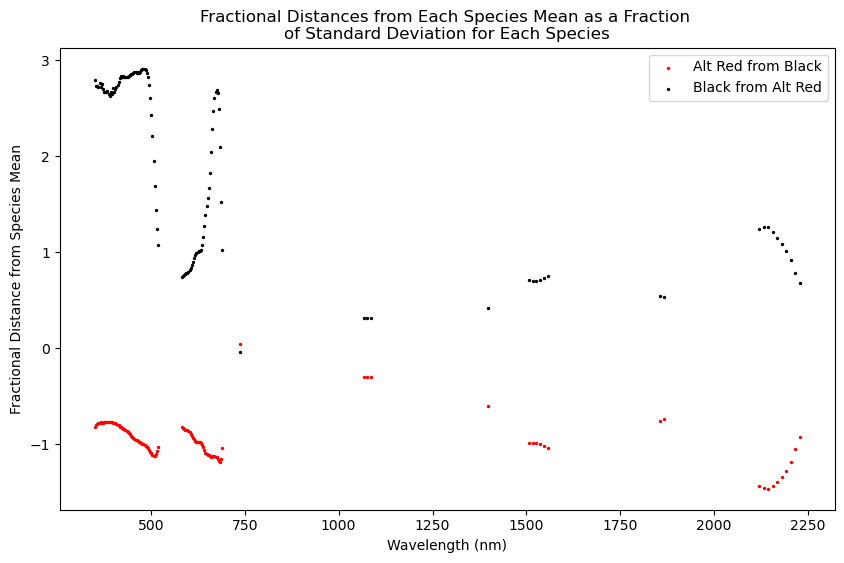

In [273]:
plt.figure(figsize = (10,6))

plt.scatter(white_central, white_cen_alt_red_from_black, color = "red", label = "Alt Red from Black", s = 2)
plt.scatter(white_central, white_cen_black_from_alt_red, color = "Black", label = "Black from Alt Red", s =2)

plt.ylabel("Fractional Distance from Species Mean")
plt.xlabel("Wavelength (nm)")

plt.legend()

plt.title("Fractional Distances from Each Species Mean as a Fraction \nof Standard Deviation for Each Species")
plt.savefig("black_vs_red_for_white_middle.png")
plt.show()

In [275]:
perc_1_sig_r = []

for i in range(0, len(wavelength_bins)):
    above_1_sig = 0
    below_1_sig = 0
    for ref in altered_red[:,i]:
        if ref > alt_red_means[i] + alt_red_stdevs[i]:
            above_1_sig += 1
        if ref < alt_red_means[i] - alt_red_stdevs[i]:
            below_1_sig += 1

    total_in_1_sig = num_red_alt - above_1_sig - below_1_sig
    perc = total_in_1_sig / num_red_alt * 100
    perc_1_sig_r.append(perc)

print(len(perc_1_sig_r))

372


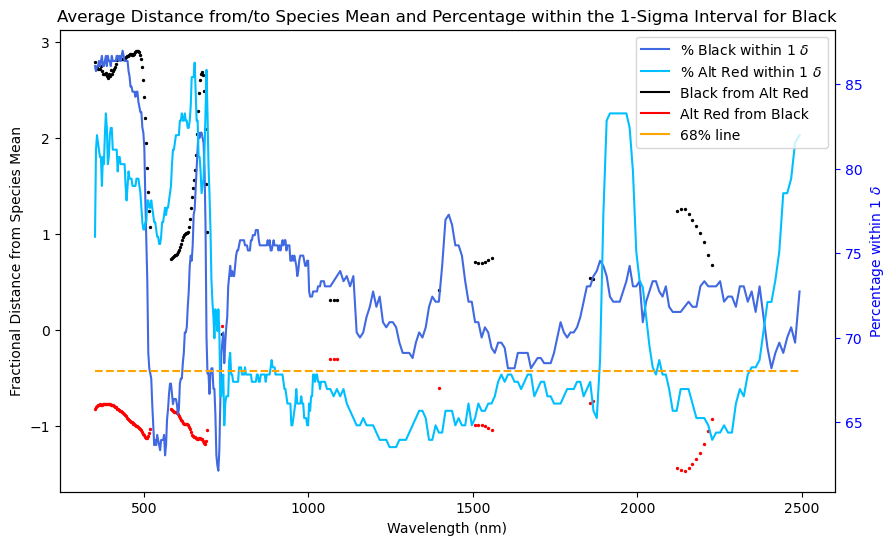

In [278]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.scatter(white_central, white_cen_alt_red_from_black, color = "red", label = "Alt Red from Black", s = 2)
ax1.scatter(white_central, white_cen_black_from_alt_red, color = "Black", label = "Black from Alt Red", s =2)


ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel("Fractional Distance from Species Mean", color = 'black')
ax1.tick_params('y', colors='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(wavelength_bins, perc_1_sig_b, color = 'royalblue', label = r'% Black within 1 $ \delta $')
line2 = ax2.plot(wavelength_bins, perc_1_sig_r, color = 'deepskyblue', label = r'% Alt Red within 1 $ \delta $')
ax2.plot(wavelength_bins, [68] * len(wavelength_bins), color = 'orange', label = "68% line", linestyle = 'dashed')
ax2.set_ylabel(r'Percentage within 1 $ \delta $', color='blue')
ax2.tick_params('y', colors='blue')

legend_perc = mlines.Line2D([], [], color='royalblue', label=r'% Black within 1 $ \delta $')
legend_perc_r = mlines.Line2D([], [], color='deepskyblue', label=r'% Alt Red within 1 $ \delta $')
legend_68 = mlines.Line2D([], [], color='orange', label='68% line')
legend_data_black = mlines.Line2D([], [], color='black', label='Black from Alt Red')
legend_data_red = mlines.Line2D([], [], color='red', label='Alt Red from Black')


# Combine the legend for both lines
plt.legend(handles=[legend_perc, legend_perc_r, legend_data_black, legend_data_red, legend_68], loc='upper right')

plt.title("Average Distance from/to Species Mean and Percentage within the 1-Sigma Interval for Black")
plt.savefig("white_cen_black_vs_red.png", bbox_inches = 'tight', dpi = 1000)
plt.show()

In [279]:
avdist_white_cen = (abs(white_cen_alt_red_from_black) + abs(white_cen_black_from_alt_red))/2

In [289]:
max_av_dist_white_cen = np.max(avdist_white_cen)
print(max_av_dist_white_cen)

ind_max_avdist_white_cen = np.where(avdist_white_cen == max_av_dist_white_cen)[0][0]
print(ind_max_avdist_white_cen)

1.9589171540670487
44


In [290]:
print(white_central[ind_max_avdist_white_cen])

483.0


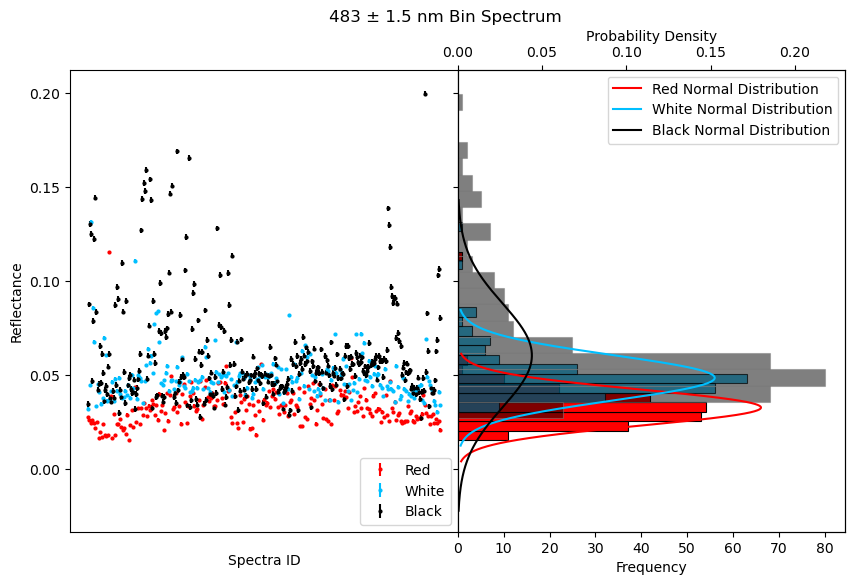

0.020241069571885803 0.020241069150272385 4.21613417789235e-10
Red = White at 0.020241069361079094
0.018584342877434292 0.01858434358929771 7.118634189062778e-10
Red = Black at 0.018584343233366003
0.07119939090915134 0.07119939096792166 5.877032194234744e-11
White = Black at 0.0711993909385365


In [291]:
dist_plotter(483)

In [319]:
np.shape(altered_red)

(233, 372)

In [364]:
def dist_plotter(wavelength):
    index = np.where(wavelength_bins == wavelength)
    alt_red = altered_red[:, index]
    alt_red = alt_red[:,0,0]
    alt_red_err = alt_red_std_err[index]

    white = binned_white[:, index]
    white = white[:,0,0]
    white_err = white_std_err[index]

    black = binned_black[:, index]
    black = black[:,0,0]
    black_err = black_std_err[index]

    mean_red = mean_finder(alt_red)
    mean_white = mean_finder(white)
    mean_black = mean_finder(black)

    stdev_red = stdev_finder(alt_red)
    stdev_white = stdev_finder(white)
    stdev_black = stdev_finder(black)

    x_red = np.linspace(mean_red - 3*stdev_red, mean_red + 3*stdev_red, num_red_alt)
    x_white = np.linspace(mean_white - 3*stdev_white, mean_white + 3*stdev_white, num_white)
    x_black = np.linspace(mean_black - 3*stdev_black, mean_black + 3*stdev_black, num_black)

    norm_red = stats.norm.pdf(x_red, mean_red, stdev_red) / num_red_alt
    norm_white = stats.norm.pdf(x_white, mean_white, stdev_white) / num_white
    norm_black = stats.norm.pdf(x_black, mean_black, stdev_black) / num_black

    if wavelength < 1050:
        wavelength_err = 1.5
    if 1050 < wavelength <= 2100:
        wavelength_err = 5
    if 2100 < wavelength <= 2485:
        wavelength_err = 6
    if 2485 < wavelength <= 2500:
        wavelength_err = 7.5

    fig, axs = plt.subplots(1,2,sharey = True, figsize = (10,6))
    
    axs[0].errorbar(alt_red_spec, alt_red, yerr = alt_red_err, color = 'red', label = "Red", fmt='o', markersize = 2)
    axs[0].errorbar(white_spec, white, yerr = white_err, color = 'deepskyblue', label = "White", fmt = 'o', markersize = 2)
    axs[0].errorbar(black_spec, black, yerr = black_err, color = 'Black', label = "Black", fmt = 'o', markersize = 2)
    axs[0].set_ylabel('Reflectance')
    axs[0].set_xlabel('\nSpectra ID')
    axs[0].set_xticks([])

    redy, redx, _ = axs[1].hist(alt_red, bins = 20, color = 'red',edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal', alpha = 0.5)

    ax3 = axs[1].twiny()

    maxs = [np.max(norm_red), np.max(norm_white), np.max(norm_black)]

    ax3.set_xlim([0,0.05 + np.max(maxs)])
    ax3.set_xlabel('Probability Density')
    ax3.plot(norm_red, x_red, color = 'red', label = "Red Normal Distribution")

    whitey, whitex, _ = axs[1].hist(white, bins = 20, color = 'deepskyblue', edgecolor = 'black', linewidth = 0.8, orientation = 'horizontal', alpha = 0.5)

    ax3.plot(norm_white, x_white, color = 'deepskyblue', label = "White Normal Distribution")



    blacky, blackx, _ = axs[1].hist(black, bins = 20, color = 'black', edgecolor = 'grey', linewidth = 0.8, orientation = 'horizontal', alpha = 0.5)

    ax3.plot(norm_black, x_black, color = 'Black', label = "Black Normal Distribution")

    max_x = [np.max(redy), np.max(whitey), np.max(blacky)]

    axs[1].set_xlabel('Frequency')
    axs[1].set_xlim(0, (0.05+np.max(maxs))/np.max(maxs) * np.max(max_x))

    axs[0].legend(loc = "lower right")
    ax3.legend()
    
    fig.suptitle(f'{wavelength} ± {wavelength_err} nm Bin Spectrum')
    
    plt.subplots_adjust(wspace = 0)

    plt.savefig(f'{wavelength}_nm_bin_spectrum.png', bbox_inches = 'tight', dpi = 1000)
    #print(np.max(max_x), np.maxs)

    plt.show()
    
    print(f"Red = White at {is_closest_new(x_red,x_white)}")
    print(f'Red = Black at {is_closest_new(x_red, x_black)}')
    print(f'White = Black at {is_closest_new(x_white, x_black)}')


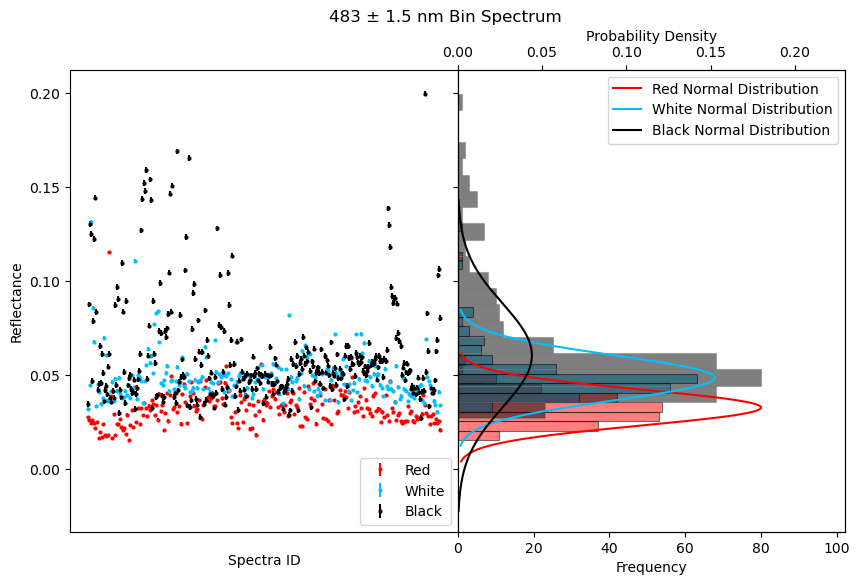

0.04408114016096473 0.04408053071023462 6.094507301115937e-07
Red = White at 0.04408083543559968
0.05319124090500998 0.05319036585386743 8.750511425459351e-07
Red = Black at 0.053190803379438704
0.07927509268913321 0.07927325329119964 1.8393979335784572e-06
White = Black at 0.07927417299016642


In [365]:
dist_plotter(483)

In [348]:
'''
def intersect(wavelength, bottom_array, top_array, middle_array):
    index = np.where(wavelength_bins == wavelength)
    top_above_bottom = []
    middle_above_bottom = []

    bottom_mean = mean_finder(altered_red[:,index])
    top = binned_black[:,index]
    middle = binned_white[:,index]
    ind_top = []
    ind_middle = []

    for i in range(0, len(top)):
        if top[i] > bottom_mean:
            top_above_bottom.append(top[i])
            ind_top.append(i)

    for i in range(0,len(middle)):
        if middle[i] > bottom_mean:
            middle_above_bottom.append(middle[i])
            ind_middle.append(i)
    
    alt_red = altered_red[:, index]
    alt_red = alt_red[:,0,0]
    alt_red_err = alt_red_std_err[index]

    white = binned_white[:, index]
    white = white[:,0,0]
    white_err = white_std_err[index]

    black = binned_black[:, index]
    black = black[:,0,0]
    black_err = black_std_err[index]

    x_red = np.linspace(mean_red - 3*stdev_red, mean_red + 3*stdev_red, 10000)
    x_white = np.linspace(mean_white - 3*stdev_white, mean_white + 3*stdev_white, 10000)
    x_black = np.linspace(mean_black - 3*stdev_black, mean_black + 3*stdev_black, 10000)

    mean_red = mean_finder(alt_red)
    mean_white = mean_finder(white)
    mean_black = mean_finder(black)

    stdev_red = stdev_finder(alt_red)
    stdev_white = stdev_finder(white)
    stdev_black = stdev_finder(black)
    
'''

'\ndef intersect(wavelength, bottom_array, top_array, middle_array):\n    index = np.where(wavelength_bins == wavelength)\n    top_above_bottom = []\n    middle_above_bottom = []\n\n    bottom_mean = mean_finder(altered_red[:,index])\n    top = binned_black[:,index]\n    middle = binned_white[:,index]\n    ind_top = []\n    ind_middle = []\n\n    for i in range(0, len(top)):\n        if top[i] > bottom_mean:\n            top_above_bottom.append(top[i])\n            ind_top.append(i)\n\n    for i in range(0,len(middle)):\n        if middle[i] > bottom_mean:\n            middle_above_bottom.append(middle[i])\n            ind_middle.append(i)\n    \n    alt_red = altered_red[:, index]\n    alt_red = alt_red[:,0,0]\n    alt_red_err = alt_red_std_err[index]\n\n    white = binned_white[:, index]\n    white = white[:,0,0]\n    white_err = white_std_err[index]\n\n    black = binned_black[:, index]\n    black = black[:,0,0]\n    black_err = black_std_err[index]\n\n    x_red = np.linspace(mean_r

In [349]:
np.shape(alt_red_means)

(372,)

In [416]:
new_x_red = []
new_x_white = []
new_x_black = []



def ind_wavelength(wavelength):
    ind = np.where(wavelength_bins == wavelength)
    return ind

index = ind_wavelength(483)

mean_red = alt_red_means[index]
mean_white = white_means[index]
mean_black = black_means[index]

stdev_red = alt_red_stdevs[index]
stdev_white = white_stdevs[index]
stdev_black = black_stdevs[index]

x_red = np.linspace(mean_red - 3*stdev_red, mean_red + 3*stdev_red, num_red_alt)
x_white = np.linspace(mean_white - 3*stdev_white, mean_white + 3*stdev_white, num_white)
x_black = np.linspace(mean_black - 3*stdev_black, mean_black + 3*stdev_black, num_black)

new_red_ind = []
new_white_ind = []
new_black_ind = []

for i in range(0,len(x_red)):
    if x_red[i] > 0.03:
        if x_red[i] < 0.05:
            new_x_red.append(x_red[i])
            new_red_ind.append(i)

for i in range(0,len(x_white)):
    if x_white[i] > 0.03:
        if x_white[i] < 0.05:
            new_x_white.append(x_white[i])
            new_white_ind.append(i)

for i in range(0,len(x_black)):
    if x_black[i] > 0.03:
        if x_black[i] < 0.05:
            new_x_black.append(x_black[i])
            new_black_ind.append(i)

In [417]:
print(len(new_black_ind))
print(len(new_white_ind))

40
60


In [418]:
len(altered_red[:,index])

233

In [419]:
abs_diff = []
reds = altered_red[:,index]
blacks = binned_black[:,index]

norm_red = stats.norm.pdf(x_red, mean_red, stdev_red) / num_red_alt
norm_white = stats.norm.pdf(x_white, mean_white, stdev_white) / num_white
norm_black = stats.norm.pdf(x_black, mean_black, stdev_black) / num_black

iss = []
jss = []


for i in new_red_ind:
    for j in new_black_ind:
        if abs(norm_red[i] - norm_black[j]) < 0.0001:
            abs_diff.append(abs(x_red[i] - x_black[j]))
            iss.append(i)
            jss.append(j)


closest = np.min(abs_diff)
cl_ind = np.where(abs_diff == closest)[0]
print(cl_ind)

index_red = iss[cl_ind[0]]
index_black = jss[cl_ind[0]]

print(index_red)
print(index_black)

[0]
183
141


In [420]:
print(x_red[index_red])
print(x_black[index_black])

av_val = np.average([x_red[index_red],x_black[index_black]])
print(av_val)

[0.04925174]
[0.04867602]
0.04896387891590512


In [421]:
black_483 = binned_black[:, index]
black_483 = black_483[:,0,0]
correct_black = []
wrong_black = []
for i in range(0, num_black):
    if black_483[i] > 0.049:
        correct_black.append(i)

    if black_483[i] < 0.049:
        wrong_black.append(i)

print(num_black)
print(len(correct_black))
print(len(wrong_black))
print(len(wrong_black)/num_black * 100)

330
201
129
39.09090909090909


In [422]:
red_483 = altered_red[:, index]
red_483 = red_483[:,0,0]
correct_red = []
wrong_red = []
for i in range(0, num_red_alt):
    if red_483[i] < 0.049:
        correct_red.append(i)

    if red_483[i] > 0.049:
        wrong_red.append(i)

print(num_red_alt)
print(len(correct_red))
print(len(wrong_red))
print(len(wrong_red)/num_red_alt * 100)

233
228
5
2.1459227467811157


In [425]:
abs_diff = []
reds = altered_red[:,index]
blacks = binned_black[:,index]

norm_red = stats.norm.pdf(x_red, mean_red, stdev_red) / num_red_alt
norm_white = stats.norm.pdf(x_white, mean_white, stdev_white) / num_white
norm_black = stats.norm.pdf(x_black, mean_black, stdev_black) / num_black

iss = []
jss = []


for i in new_red_ind:
    for j in new_white_ind:
        if abs(norm_red[i] - norm_white[j]) < 0.0001:
            abs_diff.append(abs(x_red[i] - x_white[j]))
            iss.append(i)
            jss.append(j)


closest = np.min(abs_diff)
cl_ind = np.where(abs_diff == closest)[0]
print(cl_ind)

index_red = iss[cl_ind[0]]
index_white = jss[cl_ind[0]]

print(index_red)
print(index_white)

[2]
148
87


In [426]:
print(x_white[index_white])
print(x_red[index_red])

av_val = np.average([x_red[index_red],x_white[index_white]])
print(av_val)

[0.04142434]
[0.04063408]
0.04102920618395292


In [427]:
black_483 = binned_black[:, index]
black_483 = black_483[:,0,0]
correct_black = []
wrong_black = []
for i in range(0, num_black):
    if black_483[i] > 0.041:
        correct_black.append(i)

    if black_483[i] < 0.041:
        wrong_black.append(i)

print(num_black)
print(len(correct_black))
print(len(wrong_black))
print(len(wrong_black)/num_black * 100)

330
273
57
17.272727272727273


In [428]:
red_483 = altered_red[:, index]
red_483 = red_483[:,0,0]
correct_red = []
wrong_red = []
for i in range(0, num_red_alt):
    if red_483[i] < 0.041:
        correct_red.append(i)

    if red_483[i] > 0.041:
        wrong_red.append(i)

print(num_red_alt)
print(len(correct_red))
print(len(wrong_red))
print(len(wrong_red)/num_red_alt * 100)

233
202
31
13.304721030042918


In [433]:
ind1976 = np.where(wavelength_bins == 1976.5)[0][0]
ind1656 = np.where(wavelength_bins == 1656.5)[0][0]
ind483 = np.where(wavelength_bins == 483)[0][0]

In [434]:
red1976 = altered_red[:,ind1976]
red1656 = altered_red[:,ind1656]
red483 = altered_red[:,ind483]

white1976 = binned_white[:,ind1976]
white1656 = binned_white[:,ind1656]
white483 = binned_white[:,ind483]

black1976 = binned_black[:,ind1976]
black1656 = binned_black[:,ind1656]
black483 = binned_black[:,ind483]

In [450]:
correct_red = []
wrong_red_on_black = []
wrong_red_on_white = []
none_red = []

correct_white = []
wrong_white_on_red = []
wrong_white_on_black = []
none_black = []

correct_black = []
wrong_black_on_red = []
wrong_black_on_white = []
none_white = []

for i in range(0, num_red_alt):
    if red1976[i] < 0.023:
        if red483[i] < 0.041:
            correct_red.append(i)

    if red1976[i] > 0.023:
        if red1656[i] < 0.34:
            wrong_red_on_white.append(i)

    if red1656[i] > 0.34:
        if red483[i] > 0.041:
            wrong_red_on_black.append(i)

none_red = num_red_alt - (len(correct_red) + len(wrong_red_on_black) + len(wrong_red_on_white))

print(f"There are {len(correct_red)} correct reds")
print(f"There are {len(wrong_red_on_white)} reds wrongly diagnosed as white")
print(f"There are {len(wrong_red_on_black)} reds wrongly diagnosed as black")
print(f"There are {none_red} reds which fit into none of the categories")

for i in range(0, num_white):
    if white1976[i] > 0.023:
        if white1656[i] < 0.34:
            correct_white.append(i)

    if white1976[i] < 0.023:
        if white483[i] < 0.041:
            wrong_white_on_red.append(i)

    if white1656[i] > 0.34:
        if white483[i] > 0.041:
            wrong_white_on_black.append(i)

none_white = num_white - (len(correct_white) + len(wrong_white_on_black) + len(wrong_white_on_red))

print(f"There are {len(correct_white)} correct whites")
print(f"There are {len(wrong_white_on_red)} whites wrongly diagnosed as red")
print(f"There are {len(wrong_white_on_black)} whites wrongly diagnosed as black")
print(f"There are {none_white} white which fit into none of the categories")

for i in range(0, num_black):
    if black1656[i] > 0.34:
        if black483[i] > 0.041:
            correct_black.append(i)

    if black1976[i] < 0.023:
        if black483[i] < 0.041:
            wrong_black_on_red.append(i)

    if black1976[i] > 0.023:
        if black1656[i] < 0.34:
            wrong_black_on_white.append(i)

none_black = num_black - (len(correct_black) + len(wrong_black_on_red) + len(wrong_black_on_white))

print(f"There are {len(correct_black)} correct black")
print(f"There are {len(wrong_black_on_red)} blacks wrongly diagnosed as red")
print(f"There are {len(wrong_black_on_white)} blacks wrongly diagnosed as white")
print(f"There are {none_black} blacks which fit into none of the categories")

There are 195 correct reds
There are 10 reds wrongly diagnosed as white
There are 5 reds wrongly diagnosed as black
There are 23 reds which fit into none of the categories
There are 189 correct whites
There are 7 whites wrongly diagnosed as red
There are 14 whites wrongly diagnosed as black
There are 8 white which fit into none of the categories
There are 150 correct black
There are 54 blacks wrongly diagnosed as red
There are 77 blacks wrongly diagnosed as white
There are 49 blacks which fit into none of the categories


In [451]:
efficiency_red = len(correct_red)/num_red_alt * 100
efficiency_white = len(correct_white)/num_white * 100
efficiency_black = len(correct_black)/num_black * 100

print(f"Red Efficiency is {efficiency_red}")
print(f"White Efficiency is {efficiency_white}")
print(f"Black Efficiency is {efficiency_black}")

Red Efficiency is 83.69098712446352
White Efficiency is 86.69724770642202
Black Efficiency is 45.45454545454545


In [452]:
undiagnosed_red = none_red/num_red_alt * 100
undiagnosed_white = none_white/num_white * 100
undiagnosed_black = none_black/num_black * 100

print(f"Number of undiagnosed red is {undiagnosed_red}")
print(f"Number of undiagnosed white is {undiagnosed_white}")
print(f"Number of undiagnosed black is {undiagnosed_black}")

Number of undiagnosed red is 9.871244635193133
Number of undiagnosed white is 3.669724770642202
Number of undiagnosed black is 14.84848484848485


In [453]:
purity_red = len(correct_red) / (len(correct_red) + len(wrong_black_on_red) + len(wrong_white_on_red)) * 100
purity_white = len(correct_white) / (len(correct_white) + len(wrong_red_on_white) + len(wrong_black_on_white)) * 100
purity_black = len(correct_black) / (len(correct_black) + len(wrong_red_on_black) + len(wrong_white_on_black)) * 100

print(f"Red Purity is {purity_red}")
print(f"White Purity is {purity_white}")
print(f"Black Purity is {purity_black}")

Red Purity is 76.171875
White Purity is 68.47826086956522
Black Purity is 88.75739644970415


In [457]:
print(len(wavelength_bins))

372
